In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import io
import shutil
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
whole = pd.read_csv('~/OneDrive/python3/aminomap/Amyloid_prediction/df04_n.csv', index_col=0)
whole.shape

(239, 38)

In [3]:
whole.head(10)

,Sequence,Amyloid,s1,p1,h1,i1,a1,b1,s2,p2,...,h5,i5,a5,b5,s6,p6,h6,i6,a6,b6
0,AAELRN,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.305489,0.121951,...,0.000000,1.000000,0.793103,0.294118,0.381862,0.317073,0.125767,0.458280,0.275862,0.205882
1,AARRFF,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.305489,0.121951,...,0.858896,0.349166,0.586207,0.676471,0.701671,0.707317,0.858896,0.349166,0.586207,0.676471
2,AEKLFD,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.365854,...,0.858896,0.349166,0.586207,0.676471,0.381862,0.268293,0.073620,0.000000,0.413793,0.147059
3,AEMEYL,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.365854,...,0.604294,0.347882,0.413793,0.764706,0.618138,0.463415,0.831288,0.396662,0.896552,0.470588
4,AENGKS,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.365854,...,0.006135,0.903723,0.655172,0.352941,0.312649,0.146341,0.297546,0.353017,0.241379,0.382353
5,AEVLAL,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.365854,...,0.404908,0.405648,1.000000,0.235294,0.618138,0.463415,0.831288,0.396662,0.896552,0.470588
6,AGVNYF,1,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.000000,0.000000,...,0.604294,0.347882,0.413793,0.764706,0.701671,0.707317,0.858896,0.349166,0.586207,0.676471
7,AINKIQ,0,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,1.000000,0.463415,...,0.861963,0.396662,0.586207,0.882353,0.372315,0.439024,0.242331,0.346598,0.793103,0.294118
8,ALEEYT,1,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.618138,0.463415,...,0.604294,0.347882,0.413793,0.764706,0.723150,0.268293,0.389571,0.340180,0.275862,0.617647
9,AQFIIS,1,0.305489,0.121951,0.404908,0.405648,1.0,0.235294,0.372315,0.439024,...,0.861963,0.396662,0.586207,0.882353,0.312649,0.146341,0.297546,0.353017,0.241379,0.382353


In [4]:
whole=whole.round(2)
whole_zero=whole[whole["Amyloid"]==0].reset_index()#.drop("index",axis=1)
whole_one=whole[whole["Amyloid"]==1].reset_index()

In [5]:
FIRST=[1,0,0,0,0,0]
SECOND=[0,1,0,0,0,0]
THIRD=[0,0,1,0,0,0]
FOURTH=[0,0,0,1,0,0]
FIFTH=[0,0,0,0,1,0]
SIXTH=[0,0,0,0,0,1]
FIRSTdf=pd.DataFrame(FIRST)
SECONDdf=pd.DataFrame(SECOND)
THIRDdf=pd.DataFrame(THIRD)
FOURTHdf=pd.DataFrame(FOURTH)
FIFTHdf=pd.DataFrame(FIFTH)
SIXTHdf=pd.DataFrame(SIXTH)

number=137
for i in range(number):
    
    #file_path="C:/Users/user/OneDrive/Jupyter" +str(i) +".csv"
    #with open(file_path, "w") as f:
    #    f.write("Xdf" + str(i))
    
    FIRSTp=whole_zero.loc[i,["s1","s2","s3","s4","s5","s6"]]
    SECONDp=whole_zero.loc[i,["s2","p2","h2","i2","a2","b2"]]
    THIRDp=whole_zero.loc[i,["s3","p3","h3","i3","a3","b3"]]
    FOURTHp=whole_zero.loc[i,["s4","p4","h4","i4","a4","b4"]]
    FIFTHp=whole_zero.loc[i,["s5","p5","h5","i5","a5","b5"]]
    SIXTHp=whole_zero.loc[i,["s6","p6","h6","i6","a6","b6"]]

    FIRSTp_df=pd.DataFrame(FIRSTp).T
    SECONDp_df=pd.DataFrame(SECONDp).T
    THIRDp_df=pd.DataFrame(THIRDp).T
    FOURTHp_df=pd.DataFrame(FOURTHp).T
    FIFTHp_df=pd.DataFrame(FIFTHp).T
    SIXTHp_df=pd.DataFrame(SIXTHp).T

    A=np.dot(FIRSTdf,FIRSTp_df)
    B=np.dot(SECONDdf,SECONDp_df)
    C=np.dot(THIRDdf,THIRDp_df)
    D=np.dot(FOURTHdf,FOURTHp_df)
    E=np.dot(FIFTHdf,FIFTHp_df)
    F=np.dot(SIXTHdf,SIXTHp_df)
    
    print(X)
    X=A+B+C+D+E+F
    #np.savetxt('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero/matrix_Zero_{}.csv'.format(i), X, delimiter=',', fmt='%.2f')

NameError: name 'X' is not defined

In [11]:
FIRST=[1,0,0,0,0,0]
SECOND=[0,1,0,0,0,0]
THIRD=[0,0,1,0,0,0]
FOURTH=[0,0,0,1,0,0]
FIFTH=[0,0,0,0,1,0]
SIXTH=[0,0,0,0,0,1]
FIRSTdf=pd.DataFrame(FIRST)
SECONDdf=pd.DataFrame(SECOND)
THIRDdf=pd.DataFrame(THIRD)
FOURTHdf=pd.DataFrame(FOURTH)
FIFTHdf=pd.DataFrame(FIFTH)
SIXTHdf=pd.DataFrame(SIXTH)

number=102
for i in range(number):
    
    #file_path="C:/Users/user/OneDrive/Jupyter" +str(i) +".csv"
    #with open(file_path, "w") as f:
    #    f.write("Xdf" + str(i))
    
    FIRSTp=whole_one.loc[i,["s1","p1","h1","i1","a1","b1"]]
    SECONDp=whole_one.loc[i,["s2","p2","h2","i2","a2","b2"]]
    THIRDp=whole_one.loc[i,["s3","p3","h3","i3","a3","b3"]]
    FOURTHp=whole_one.loc[i,["s4","p4","h4","i4","a4","b4"]]
    FIFTHp=whole_one.loc[i,["s5","p5","h5","i5","a5","b5"]]
    SIXTHp=whole_one.loc[i,["s6","p6","h6","i6","a6","b6"]]

    FIRSTp_df=pd.DataFrame(FIRSTp).T
    SECONDp_df=pd.DataFrame(SECONDp).T
    THIRDp_df=pd.DataFrame(THIRDp).T
    FOURTHp_df=pd.DataFrame(FOURTHp).T
    FIFTHp_df=pd.DataFrame(FIFTHp).T
    SIXTHp_df=pd.DataFrame(SIXTHp).T

    A=np.dot(FIRSTdf,FIRSTp_df)
    B=np.dot(SECONDdf,SECONDp_df)
    C=np.dot(THIRDdf,THIRDp_df)
    D=np.dot(FOURTHdf,FOURTHp_df)
    E=np.dot(FIFTHdf,FIFTHp_df)
    F=np.dot(SIXTHdf,SIXTHp_df)
    
    X=A+B+C+D+E+F
    #"{:.3f}".format(X)
    #Xdf=pd.DataFrame(X)
    print(X)
    #np.savetxt('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One/matrix_One_{}.csv'.format(i), X, delimiter=',', fmt='%.2f')
    

[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.0 0.0 0.31 0.4 0.0 0.0]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.7 0.71 0.86 0.35 0.59 0.68]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.62 0.46 0.83 0.4 0.9 0.47]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.7 0.73 0.6 0.35 0.41 0.76]
 [0.72 0.27 0.39 0.34 0.28 0.62]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.37 0.44 0.24 0.35 0.79 0.29]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.31 0.15 0.3 0.35 0.24 0.38]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.31 0.15 0.3 0.35 0.24 0.38]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [0.7 0.73 0.6 0.35 0.41 0.76]]
[[0.31 0.12 0.4 0.41 1.0 0.24]
 [0.72 0.27 0.39 0.34 0.28 0.62]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.38 0.27 0.07 0.0 0.41 0.15]
 [0.42 0.32 0.7

[[0.56 0.71 0.0 1.0 0.79 0.29]
 [0.56 0.71 0.0 1.0 0.79 0.29]
 [0.77 1.0 1.0 0.38 0.66 0.79]
 [0.37 0.44 0.24 0.35 0.79 0.29]
 [0.77 1.0 1.0 0.38 0.66 0.79]
 [0.56 0.71 0.0 1.0 0.79 0.29]]
[[0.56 0.71 0.0 1.0 0.79 0.29]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [0.7 0.71 0.86 0.35 0.59 0.68]
 [0.38 0.32 0.13 0.46 0.28 0.21]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.56 0.54 0.69 0.35 0.86 0.5]]
[[0.31 0.15 0.3 0.35 0.24 0.38]
 [0.31 0.12 0.4 0.41 1.0 0.24]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.31 0.15 0.3 0.35 0.24 0.38]
 [0.38 0.27 0.07 0.0 0.41 0.15]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.31 0.15 0.3 0.35 0.24 0.38]
 [0.37 0.37 0.11 0.02 1.0 0.18]
 [0.88 0.34 0.68 0.39 0.48 1.0]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [1.0 0.46 0.86 0.4 0.59 0.88]
 [0.37 0.37 0.11 0.02 1.0 0.18]]
[[0.31 0.15 0.3 0.35 0.24 0.38]
 [0.7 0.71 0.86

１と０のインデックスを作成する(df)

Amyloid0のデータにmatrix_Zero_1- Amyloid1のデータにmatrix_One_1- の名前を付けて。concatする

train_test_splitで df_train と df_val のリストに分ける

In [6]:
train_zero1=train_zero.loc[:,['Amyloid']]
train_zero1.head()

NameError: name 'train_zero' is not defined

In [7]:
number=137
for i in range (number):
    print("matrix_Zero_" + str(i))

matrix_Zero_0
matrix_Zero_1
matrix_Zero_2
matrix_Zero_3
matrix_Zero_4
matrix_Zero_5
matrix_Zero_6
matrix_Zero_7
matrix_Zero_8
matrix_Zero_9
matrix_Zero_10
matrix_Zero_11
matrix_Zero_12
matrix_Zero_13
matrix_Zero_14
matrix_Zero_15
matrix_Zero_16
matrix_Zero_17
matrix_Zero_18
matrix_Zero_19
matrix_Zero_20
matrix_Zero_21
matrix_Zero_22
matrix_Zero_23
matrix_Zero_24
matrix_Zero_25
matrix_Zero_26
matrix_Zero_27
matrix_Zero_28
matrix_Zero_29
matrix_Zero_30
matrix_Zero_31
matrix_Zero_32
matrix_Zero_33
matrix_Zero_34
matrix_Zero_35
matrix_Zero_36
matrix_Zero_37
matrix_Zero_38
matrix_Zero_39
matrix_Zero_40
matrix_Zero_41
matrix_Zero_42
matrix_Zero_43
matrix_Zero_44
matrix_Zero_45
matrix_Zero_46
matrix_Zero_47
matrix_Zero_48
matrix_Zero_49
matrix_Zero_50
matrix_Zero_51
matrix_Zero_52
matrix_Zero_53
matrix_Zero_54
matrix_Zero_55
matrix_Zero_56
matrix_Zero_57
matrix_Zero_58
matrix_Zero_59
matrix_Zero_60
matrix_Zero_61
matrix_Zero_62
matrix_Zero_63
matrix_Zero_64
matrix_Zero_65
matrix_Zero_66
matri

In [8]:
number=102
for i in range (number):
    print("matrix_One_" + str(i))

matrix_One_0
matrix_One_1
matrix_One_2
matrix_One_3
matrix_One_4
matrix_One_5
matrix_One_6
matrix_One_7
matrix_One_8
matrix_One_9
matrix_One_10
matrix_One_11
matrix_One_12
matrix_One_13
matrix_One_14
matrix_One_15
matrix_One_16
matrix_One_17
matrix_One_18
matrix_One_19
matrix_One_20
matrix_One_21
matrix_One_22
matrix_One_23
matrix_One_24
matrix_One_25
matrix_One_26
matrix_One_27
matrix_One_28
matrix_One_29
matrix_One_30
matrix_One_31
matrix_One_32
matrix_One_33
matrix_One_34
matrix_One_35
matrix_One_36
matrix_One_37
matrix_One_38
matrix_One_39
matrix_One_40
matrix_One_41
matrix_One_42
matrix_One_43
matrix_One_44
matrix_One_45
matrix_One_46
matrix_One_47
matrix_One_48
matrix_One_49
matrix_One_50
matrix_One_51
matrix_One_52
matrix_One_53
matrix_One_54
matrix_One_55
matrix_One_56
matrix_One_57
matrix_One_58
matrix_One_59
matrix_One_60
matrix_One_61
matrix_One_62
matrix_One_63
matrix_One_64
matrix_One_65
matrix_One_66
matrix_One_67
matrix_One_68
matrix_One_69
matrix_One_70
matrix_One_71
ma

for文で作成した名前のリストをコピーしてエクセルにてラベルを作成（Amyloid_zero_list.csv, Amyloid_one_list.csv）

In [9]:
list_zero=pd.read_csv('~/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/Amyloid_zero_list.csv')#, index_col=0)
list_one=pd.read_csv('~/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/Amyloid_one_list.csv')#, index_col=0)

# concat the dataframe and data-shuffled
df_data = pd.concat([list_zero, list_one], axis=0)#.reset_index(drop=True)
df_data

,id,Amyloid
0,matrix_Zero_0,0
1,matrix_Zero_1,0
2,matrix_Zero_2,0
3,matrix_Zero_3,0
4,matrix_Zero_4,0
5,matrix_Zero_5,0
6,matrix_Zero_6,0
7,matrix_Zero_7,0
8,matrix_Zero_8,0
9,matrix_Zero_9,0


In [10]:
y = df_data["Amyloid"]

df_train, df_val = train_test_split(df_data, test_size=0.30, random_state=101, stratify=y) #stratify=y creates a balanced validation set

print(df_train.shape)
print(df_val.shape)

(167, 2)
(72, 2)


In [11]:
#One, Zeroのフォルダは予め作成しておく必要がある
#フォルダの振り分けに関してtarget==0 or 1の認識に失敗している
#現状ではwholeからtrainとvalidationのファイルを仕分けすることにのみ成功している

train_list =(df_train["id"])
val_list =(df_val["id"])

for i in train_list:
    fname = i + ".csv"
    print(fname)
    target = df_train.loc[:,'Amyloid'].all()
    print(target)
    
    if target == 0:
        Folder = "Zero"
    if target == 1:
        Folder = "One"
    
    src=os.path.join('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/whole/', fname)
    dst=os.path.join('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/', Folder, fname)
    shutil.copyfile(src, dst)

for i in val_list:
    fname = i + ".csv"
    target = df_data.loc[:,'Amyloid'].all()
    
    if target == 0:
        Folder = 'Zero'
    if target == 1:
        Folder = 'One'
    
    src = os.path.join('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/whole/', fname)
    dst = os.path.join('C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation', Folder, fname)
    shutil.copyfile(src, dst)

matrix_Zero_118.csv
False
matrix_One_88.csv
False
matrix_One_75.csv
False
matrix_One_4.csv
False
matrix_One_71.csv
False
matrix_One_64.csv
False
matrix_One_35.csv
False
matrix_Zero_103.csv
False
matrix_Zero_119.csv
False
matrix_Zero_96.csv
False
matrix_Zero_47.csv
False
matrix_One_56.csv
False
matrix_Zero_13.csv
False
matrix_Zero_38.csv
False
matrix_Zero_66.csv
False
matrix_One_96.csv
False
matrix_One_13.csv
False
matrix_One_95.csv
False
matrix_One_26.csv
False
matrix_One_86.csv
False
matrix_Zero_74.csv
False
matrix_One_6.csv
False
matrix_One_73.csv
False
matrix_Zero_6.csv
False
matrix_Zero_133.csv
False
matrix_Zero_33.csv
False
matrix_One_84.csv
False
matrix_Zero_115.csv
False
matrix_Zero_125.csv
False
matrix_Zero_3.csv
False
matrix_Zero_65.csv
False
matrix_Zero_61.csv
False
matrix_Zero_7.csv
False
matrix_Zero_55.csv
False
matrix_One_41.csv
False
matrix_One_20.csv
False
matrix_Zero_15.csv
False
matrix_One_30.csv
False
matrix_Zero_80.csv
False
matrix_Zero_130.csv
False
matrix_Zero_122.

このとき現時点では

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero フォルダからmatrix_One_No.のデータをC:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One　フォルダに手動で移す必要がある。

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_0.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_10.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_12.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_13.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_15.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_19.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_2.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_20.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_21.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_One_22.csv
C:/Users/use

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_119.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_120.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_121.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_122.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_123.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_124.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_125.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_126.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero_13.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero\matrix_Zero

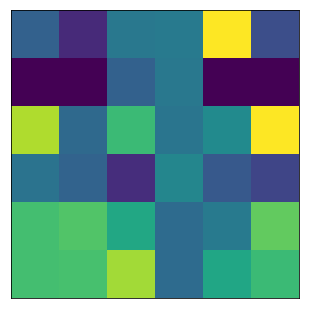

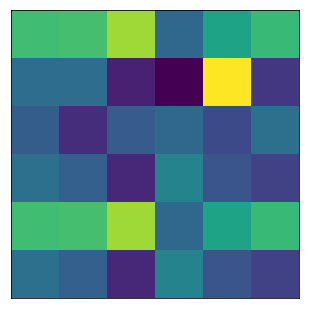

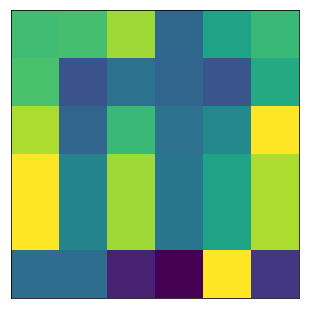

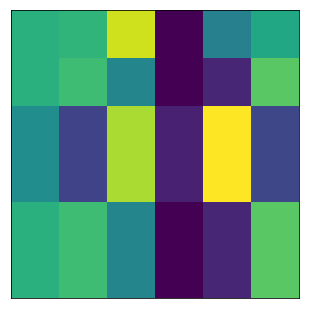

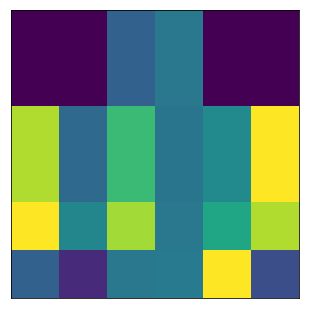

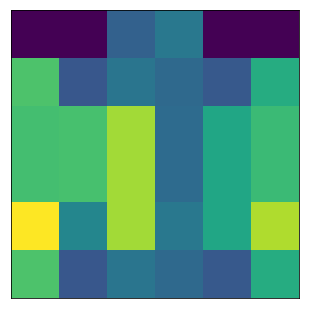

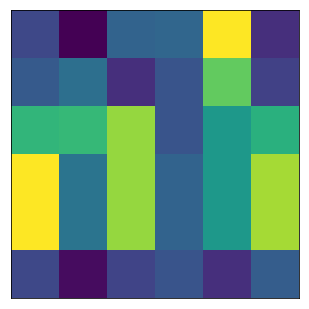

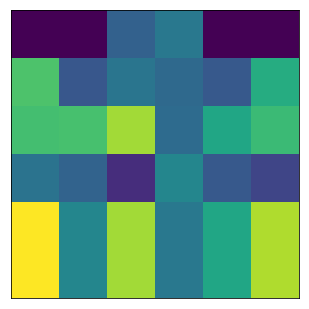

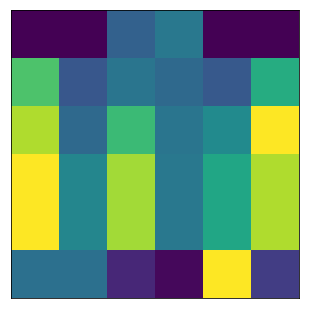

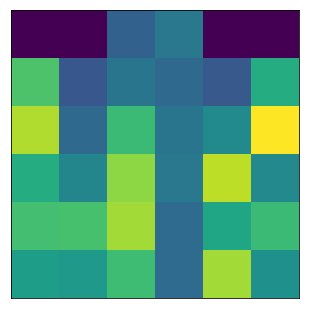

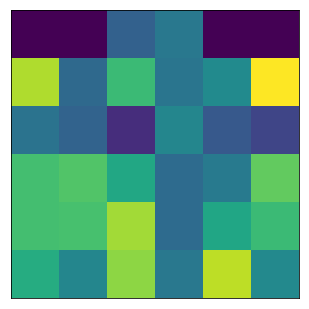

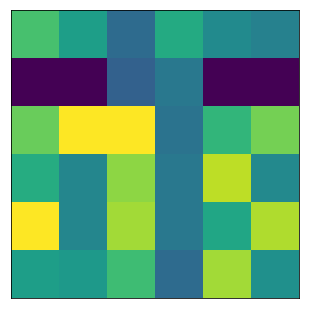

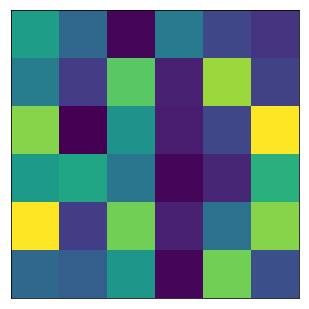

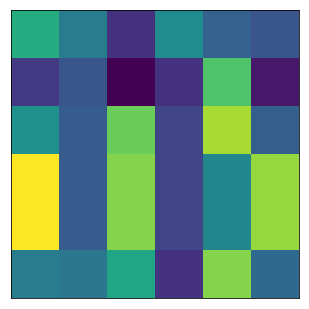

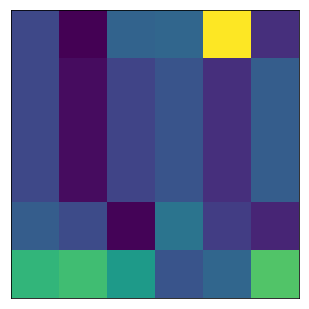

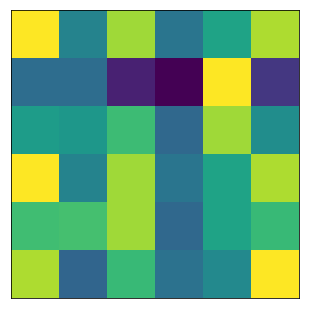

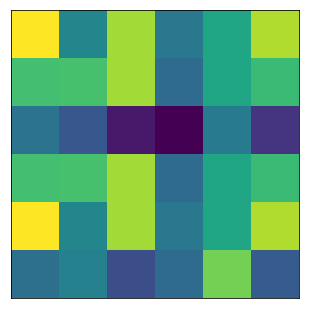

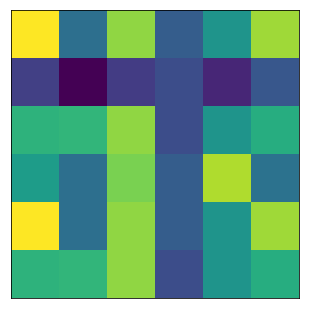

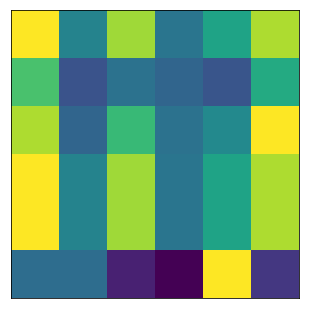

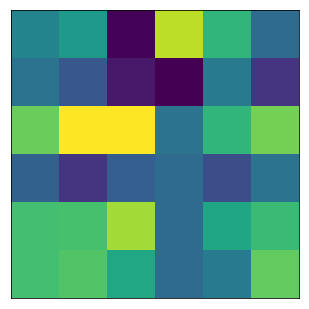

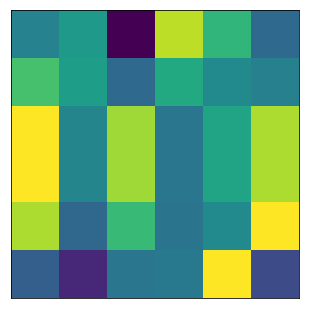

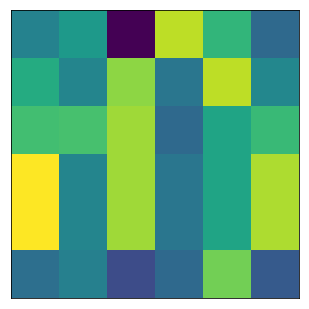

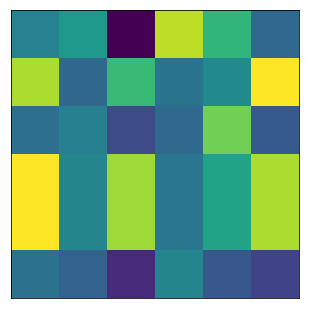

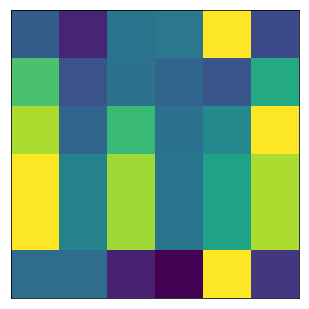

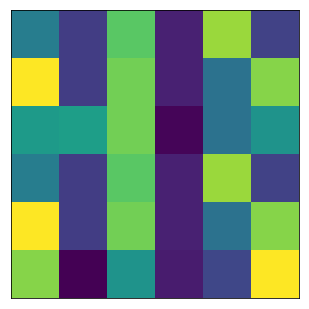

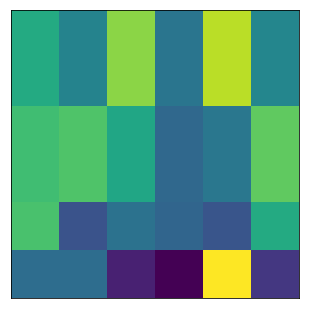

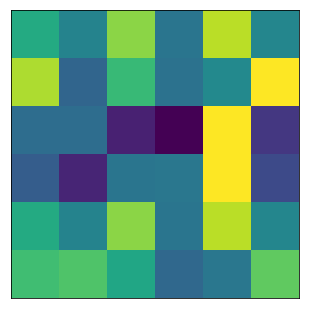

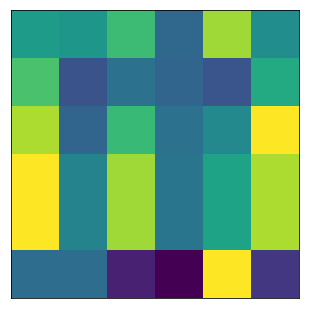

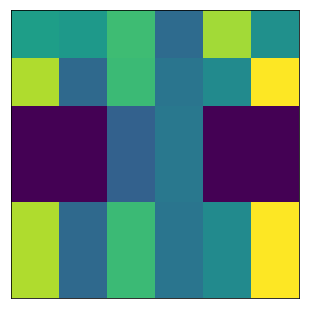

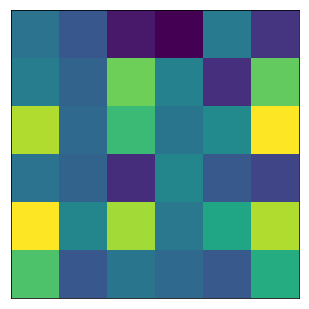

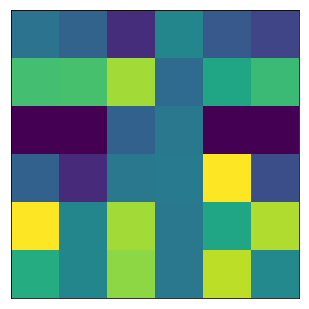

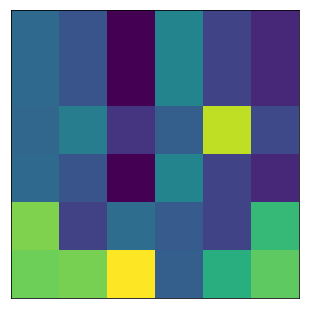

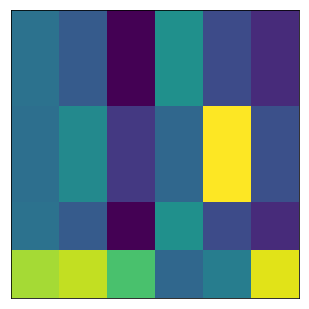

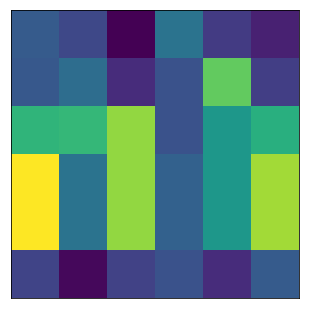

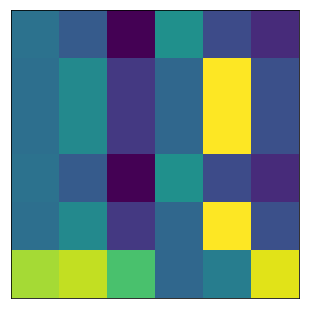

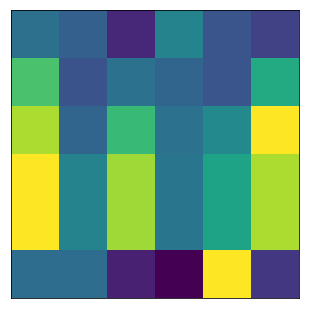

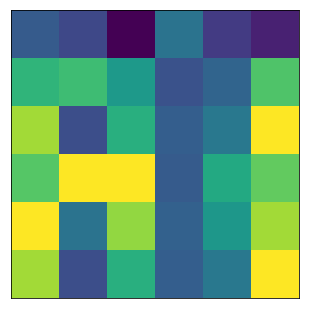

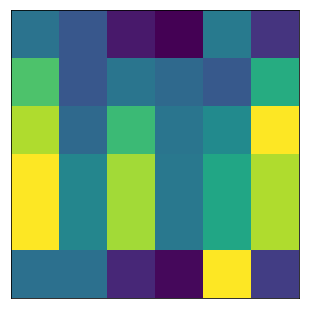

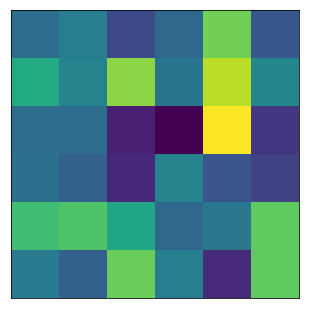

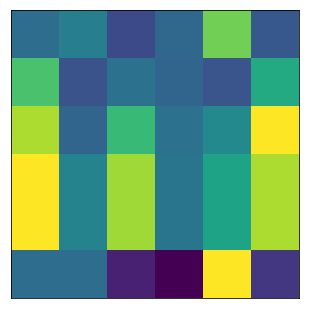

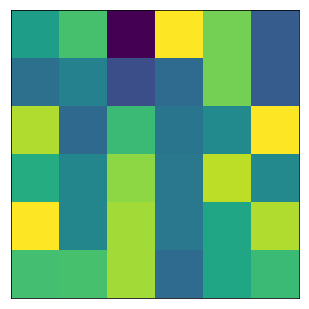

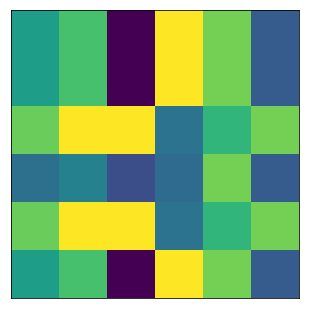

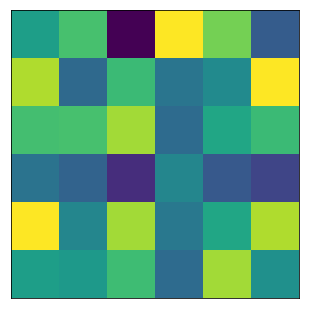

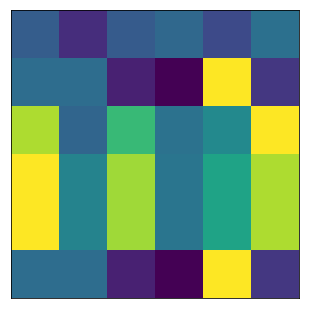

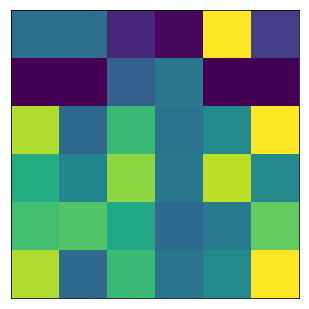

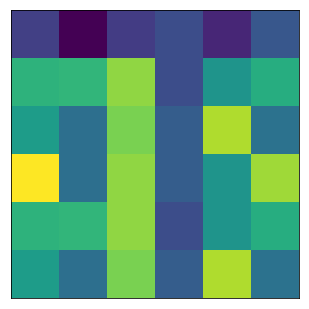

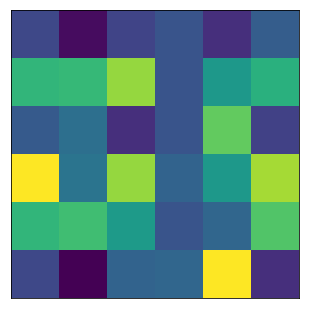

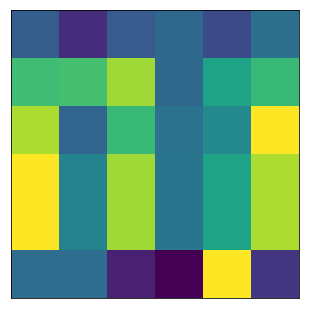

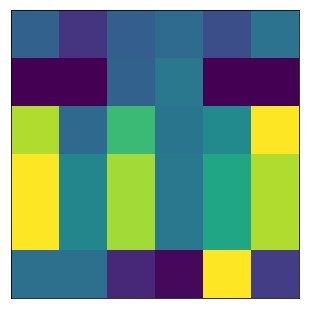

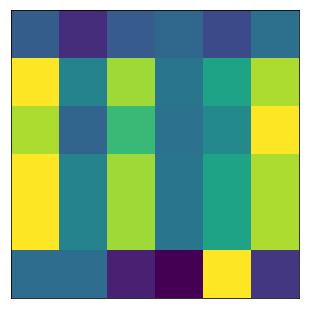

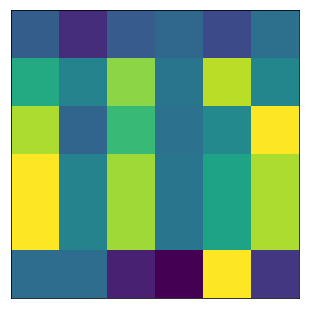

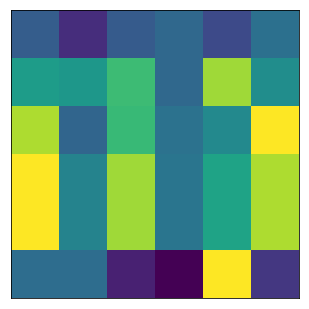

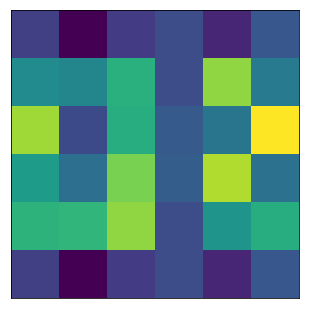

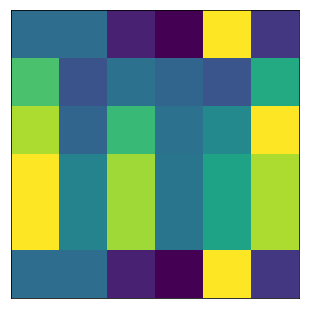

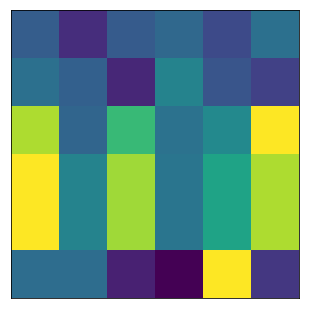

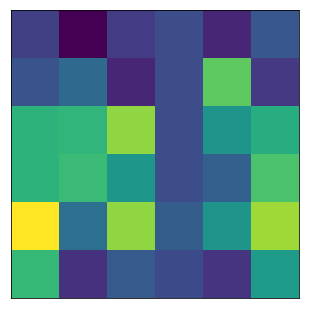

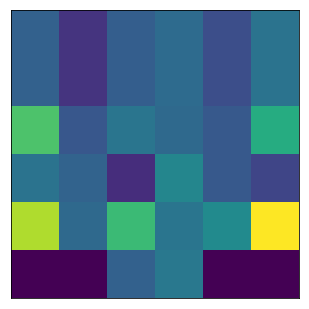

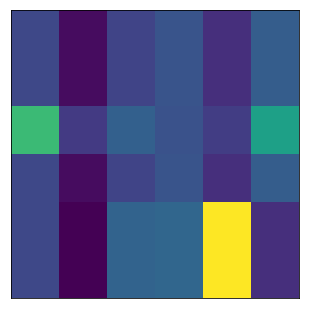

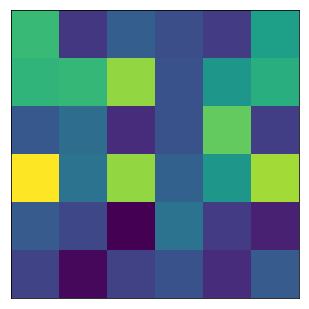

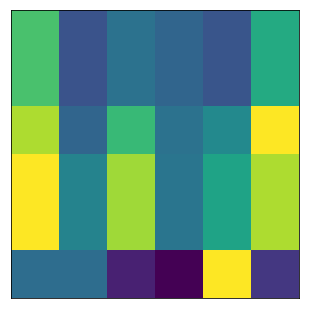

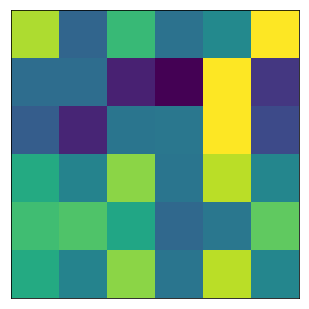

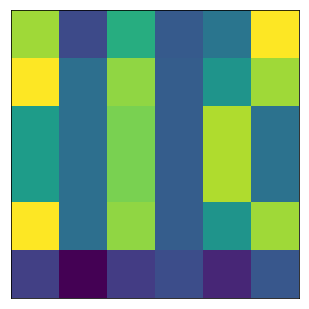

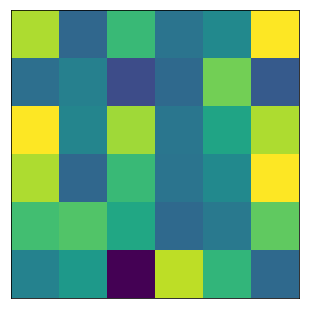

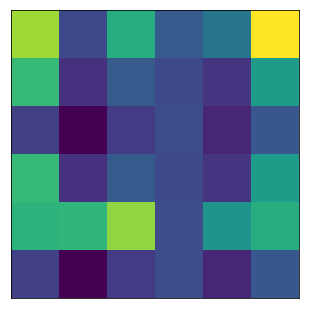

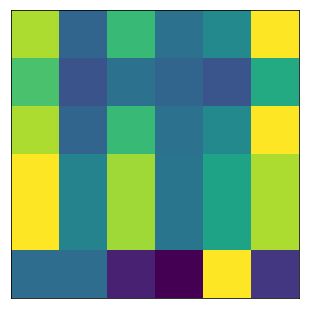

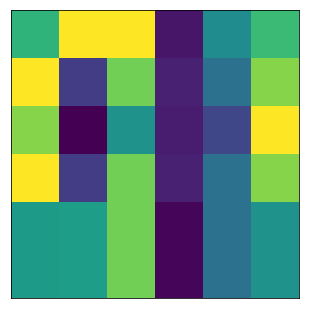

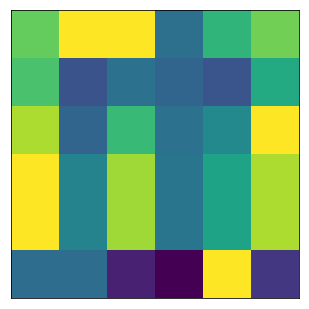

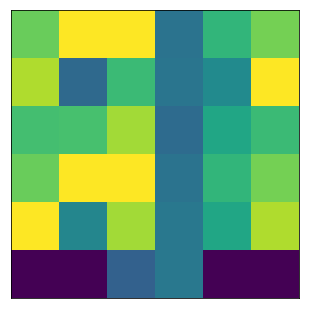

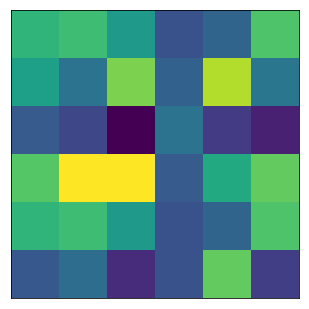

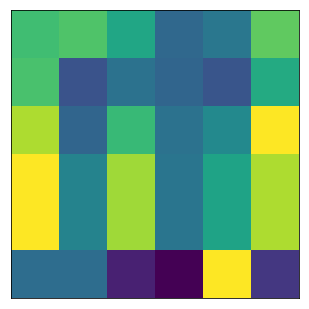

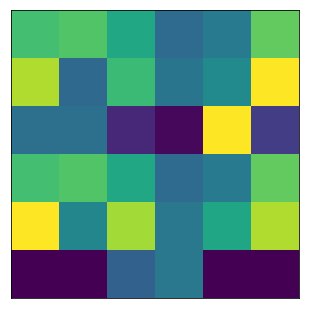

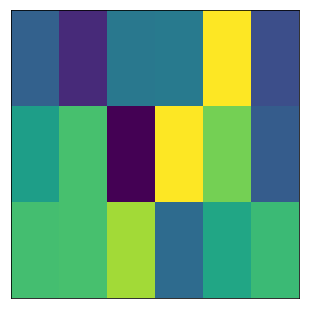

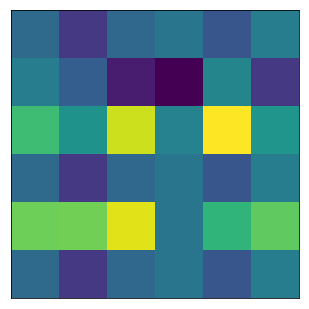

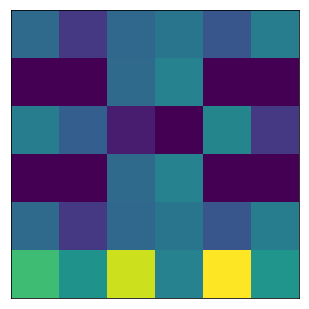

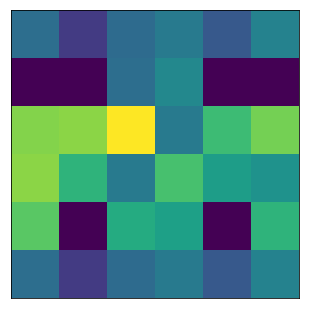

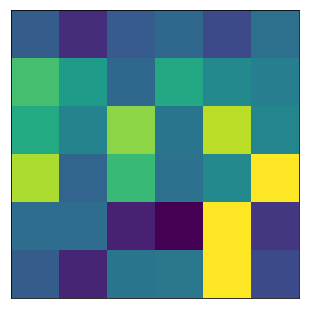

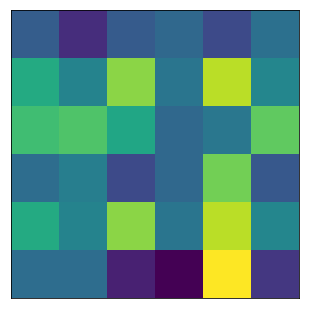

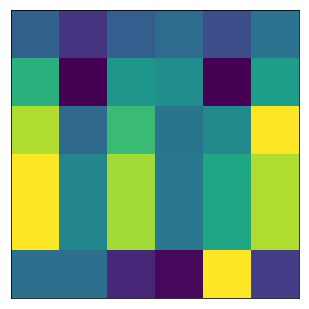

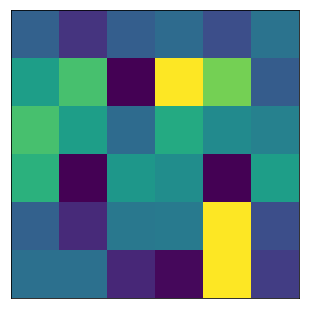

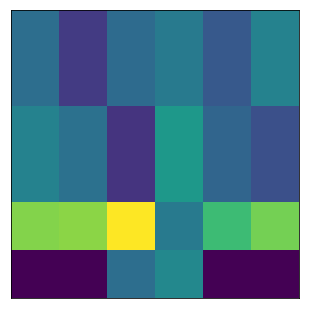

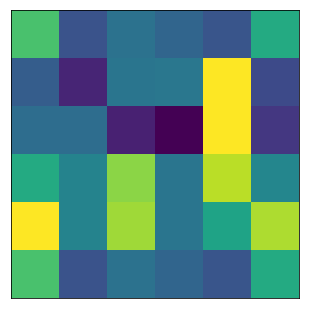

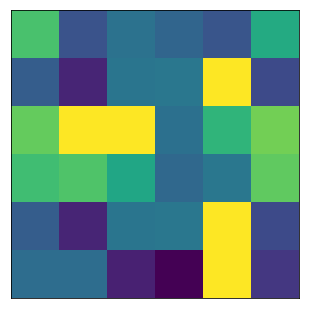

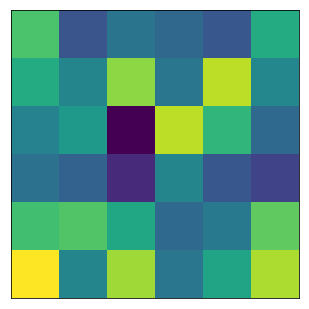

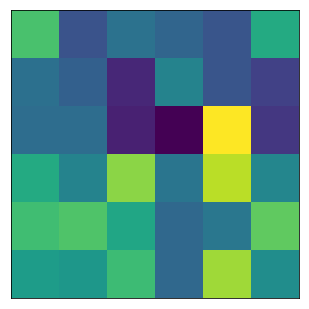

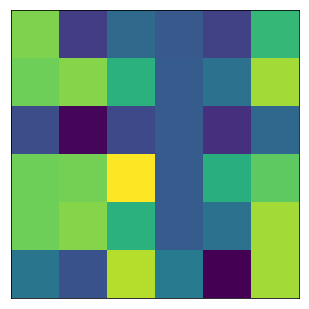

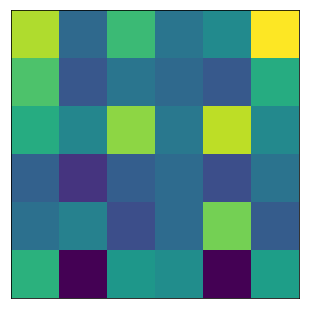

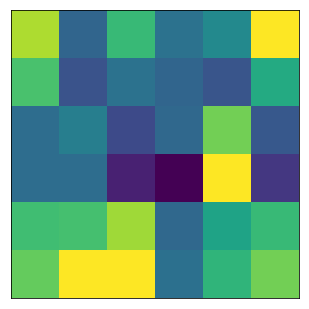

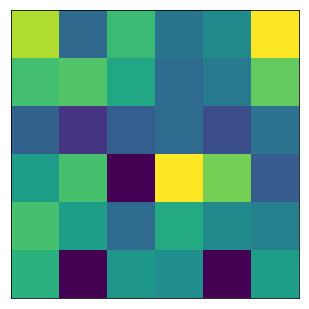

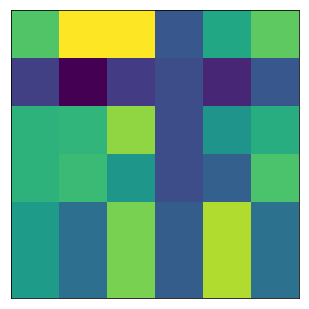

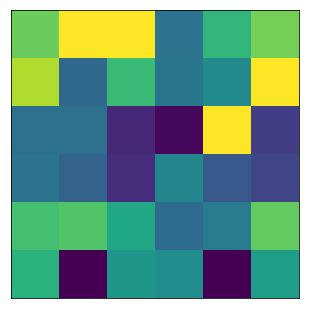

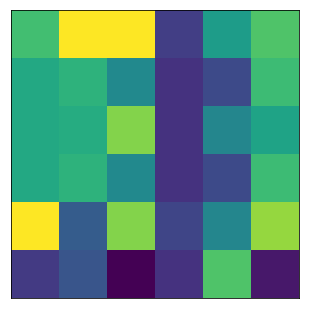

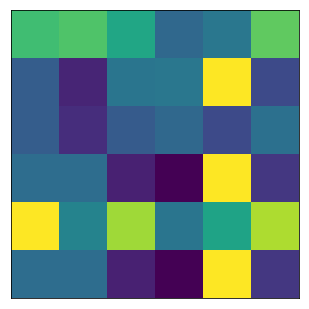

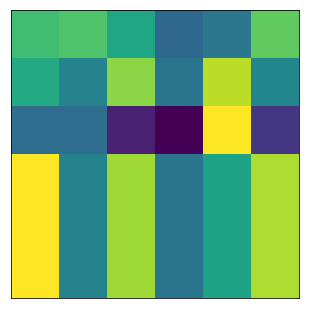

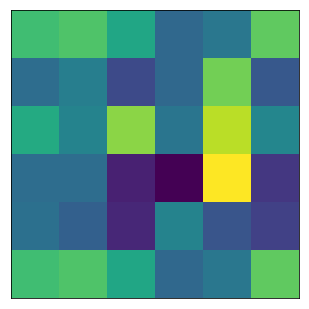

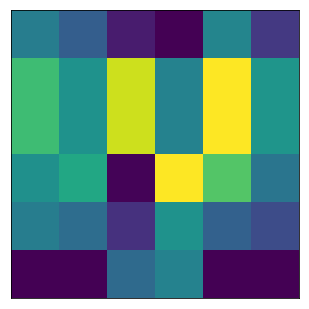

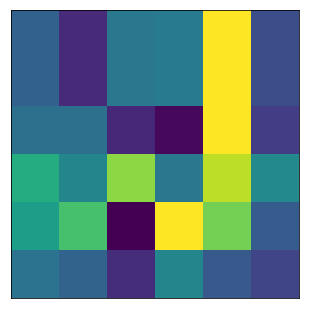

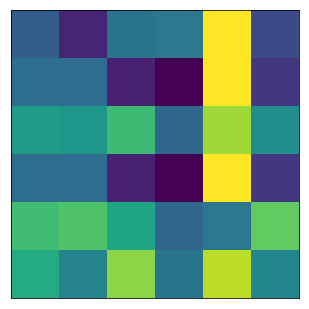

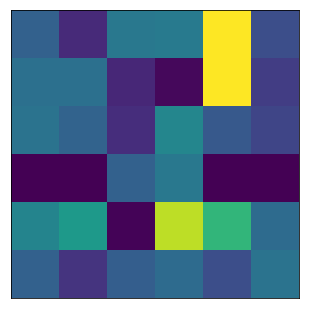

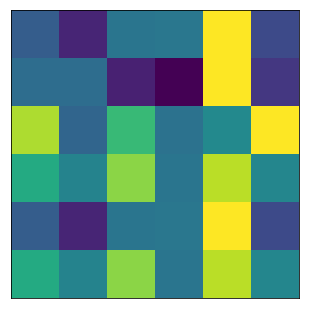

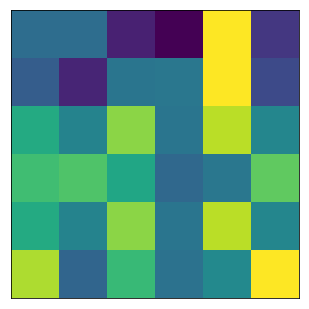

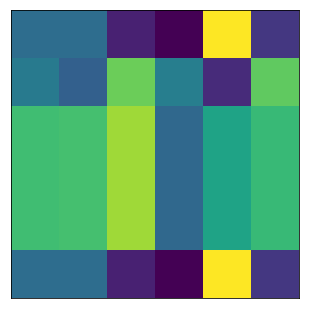

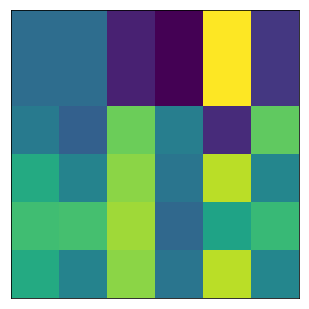

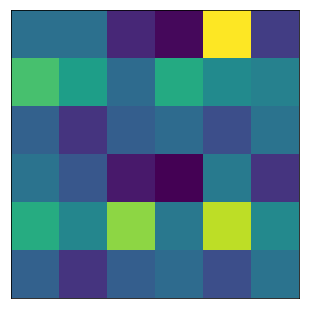

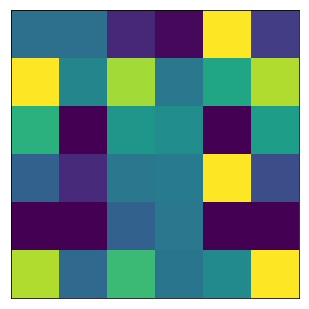

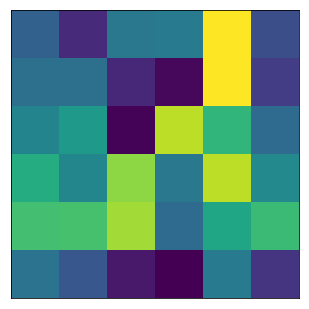

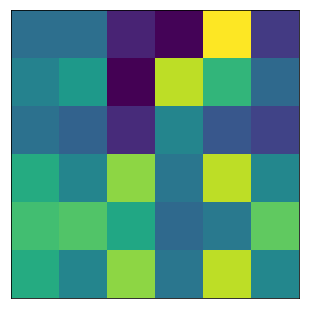

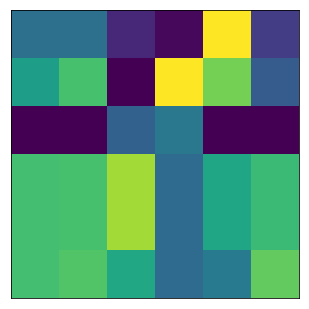

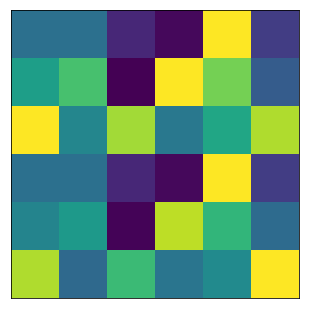

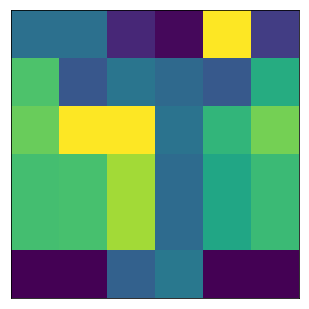

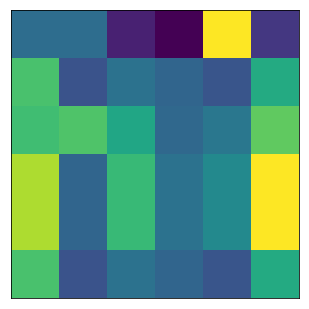

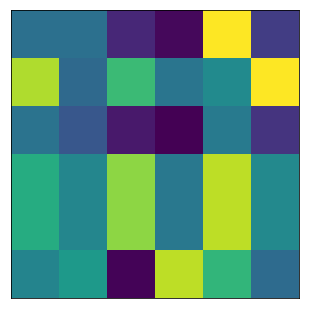

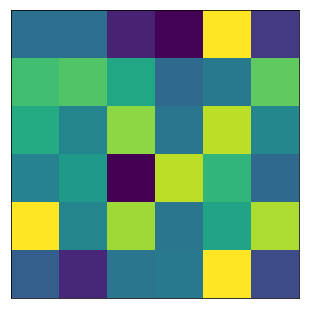

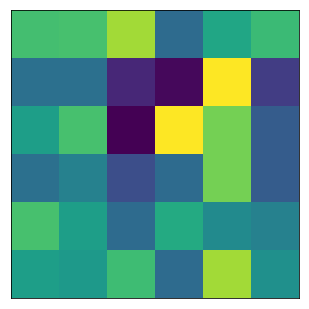

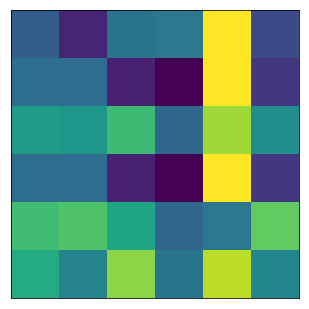

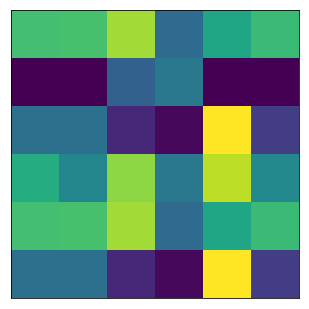

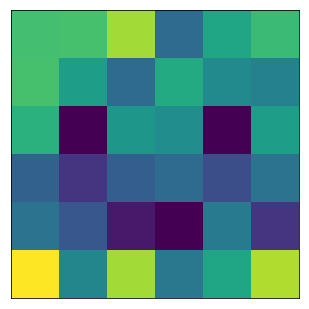

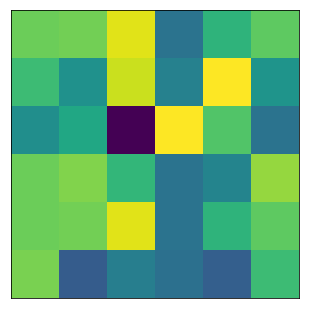

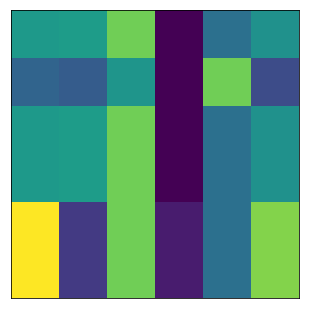

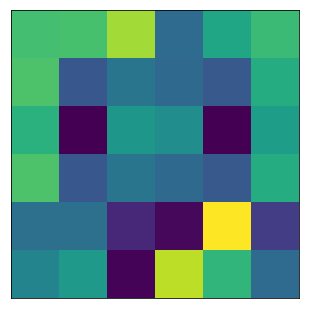

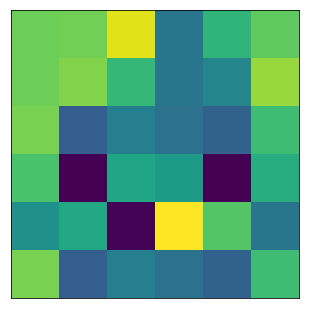

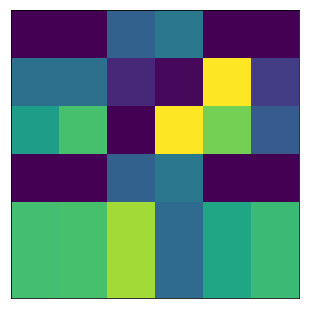

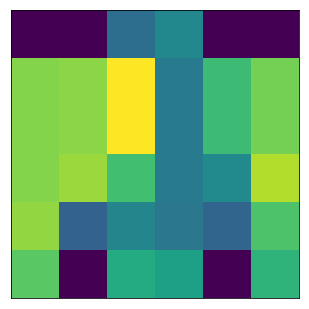

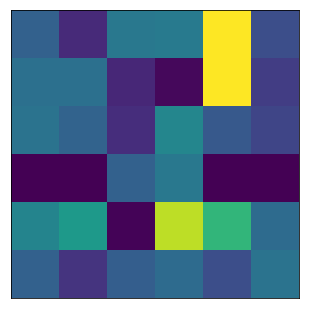

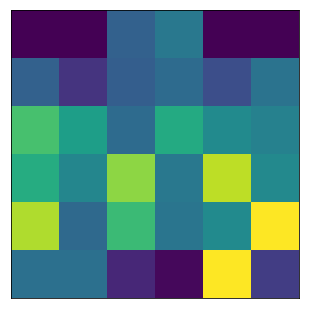

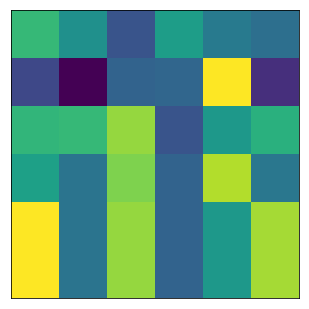

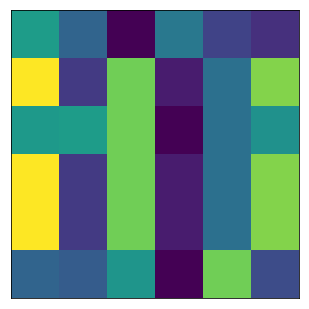

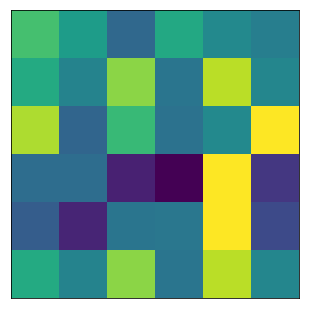

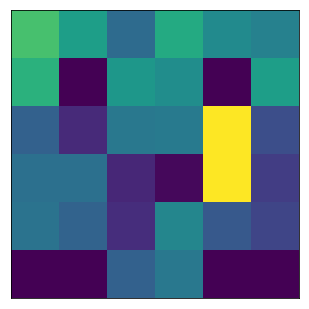

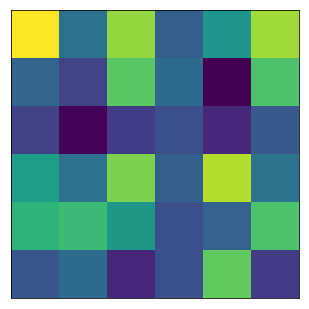

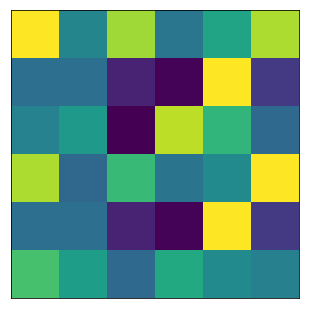

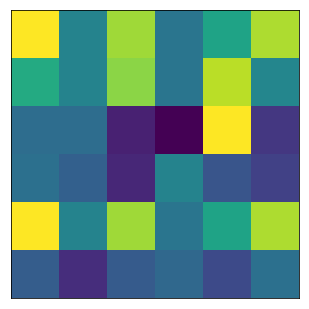

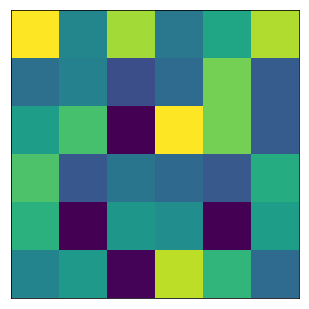

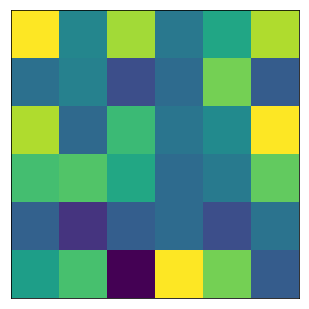

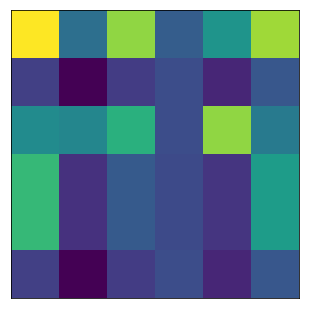

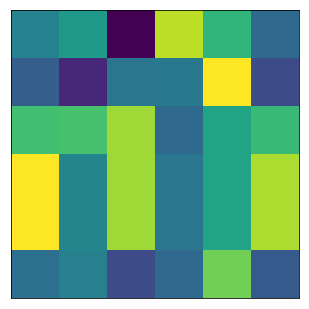

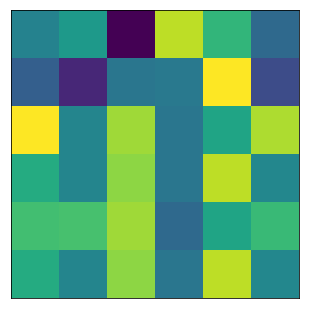

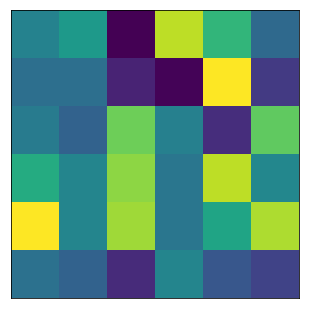

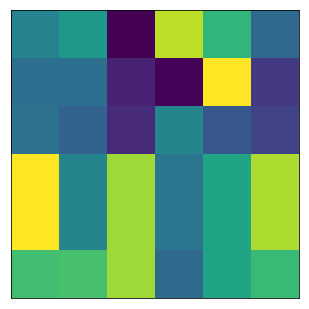

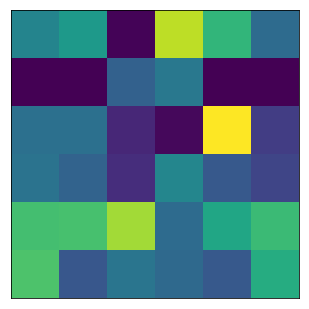

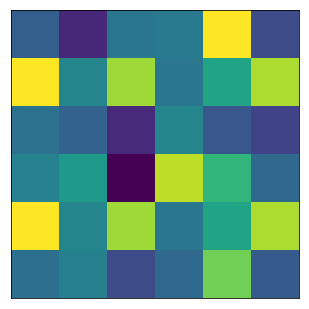

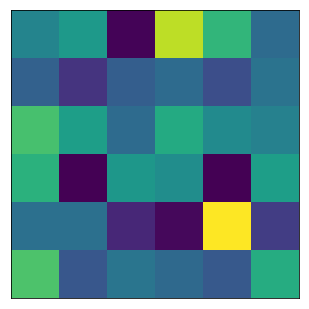

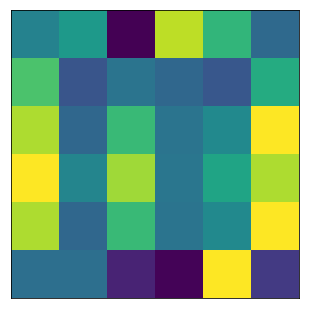

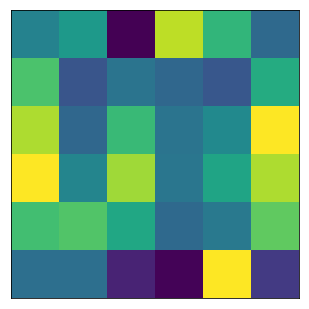

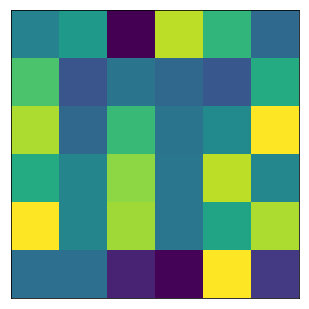

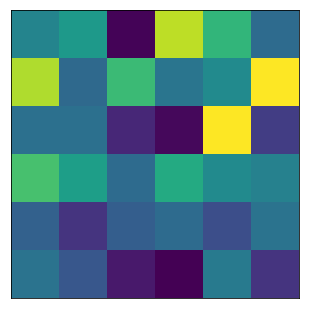

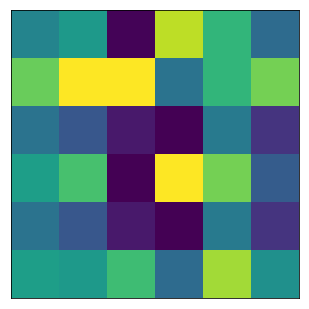

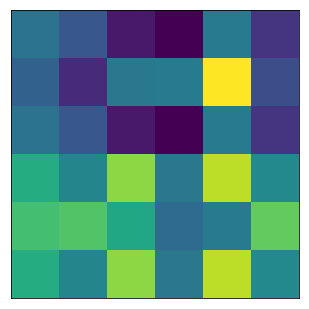

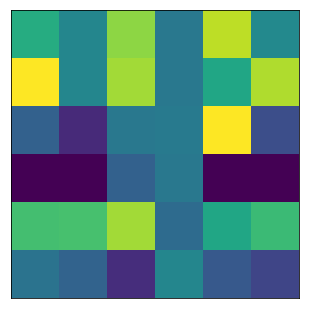

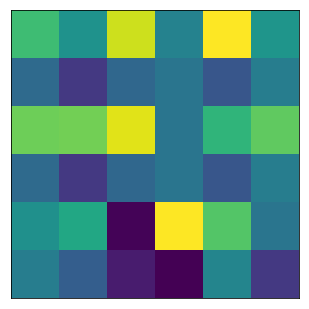

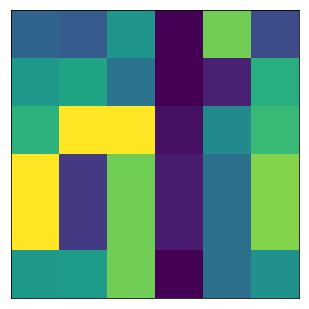

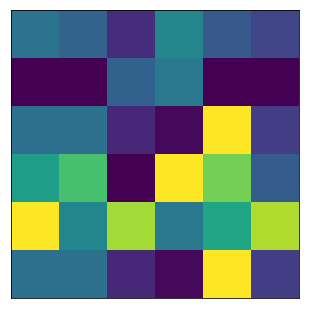

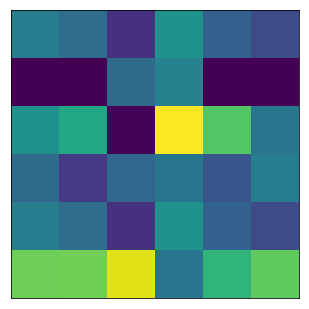

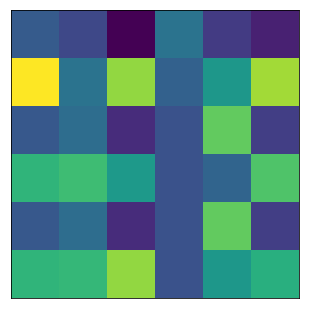

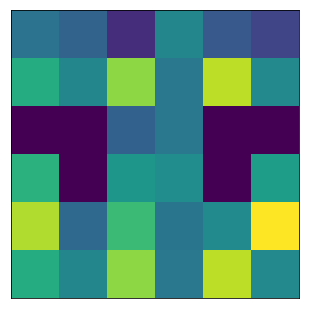

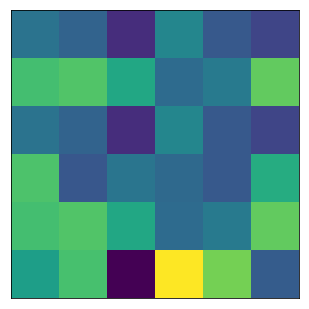

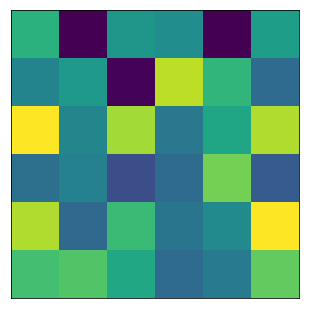

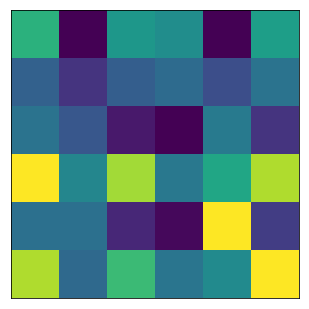

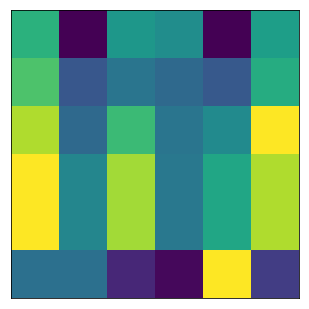

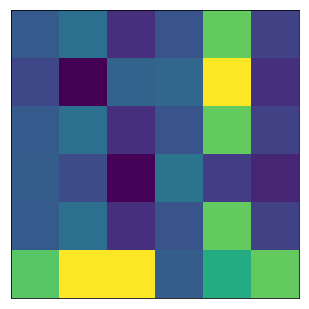

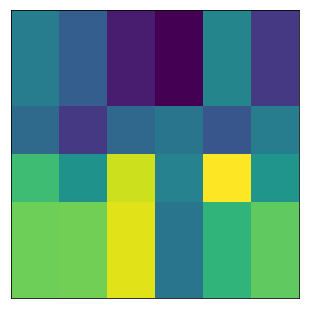

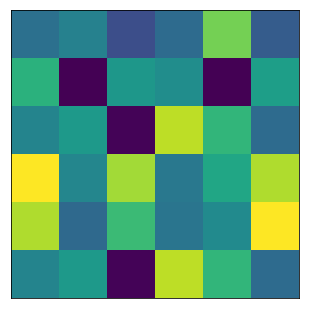

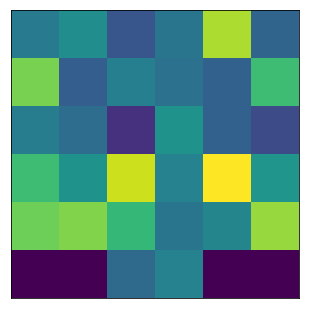

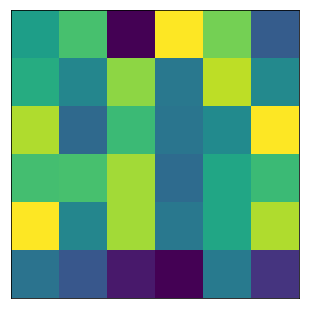

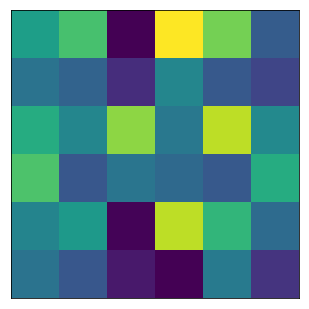

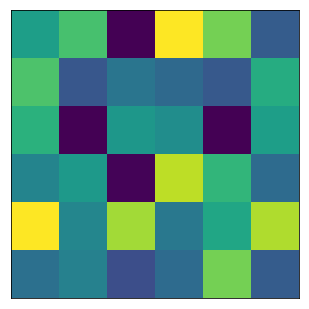

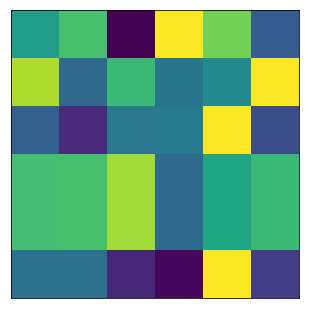

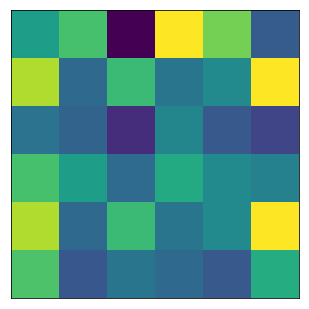

In [16]:
import os, glob
dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Zero/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    #plt.figure()
    plt.imshow(data)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset_2/train/Zero/{basename}.png", dpi=None, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_0.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_10.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_12.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_13.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_15.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_19.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_2.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_20.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_21.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One\matrix_One_22.csv
C:/Users/user/OneDrive

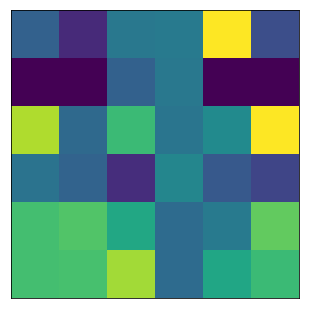

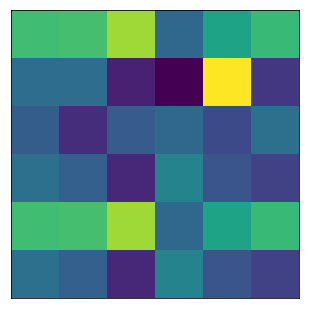

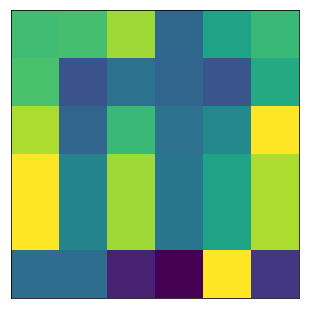

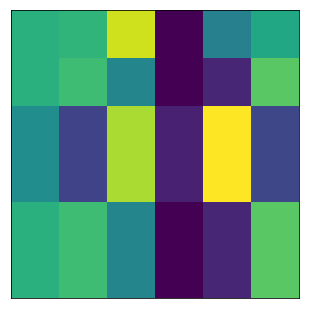

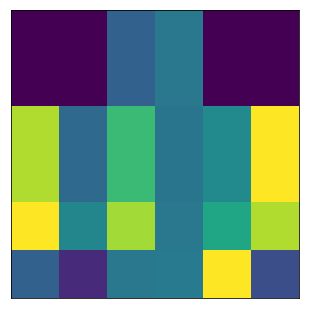

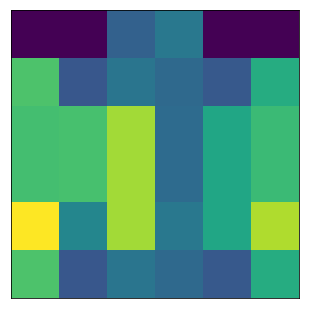

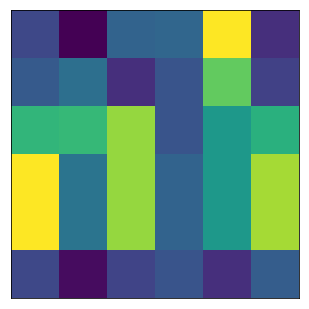

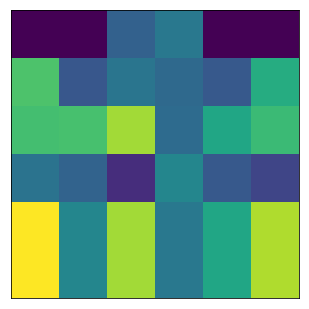

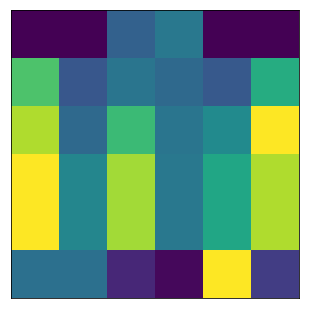

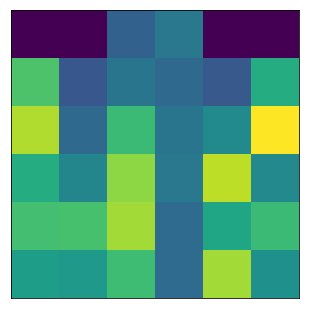

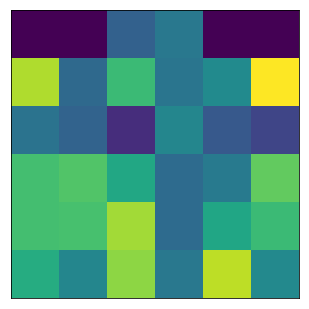

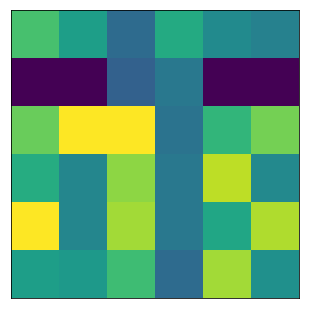

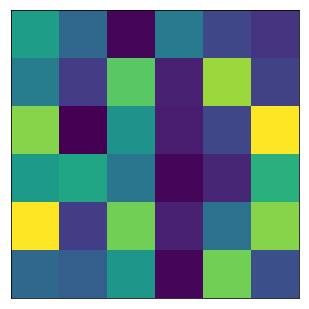

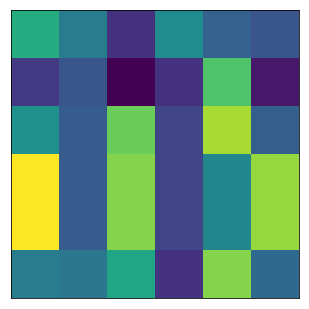

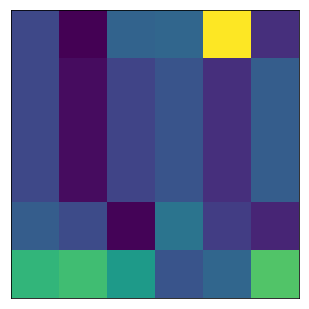

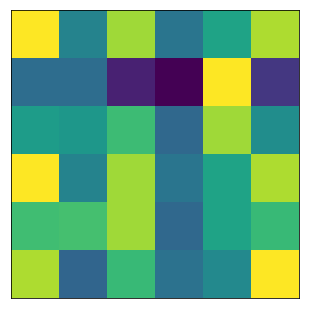

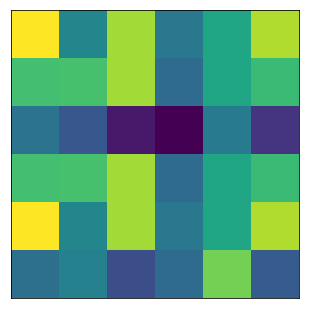

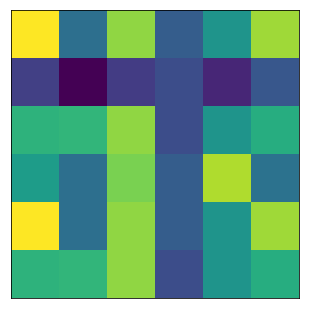

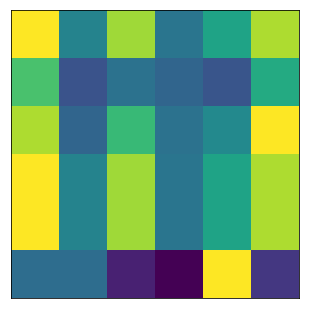

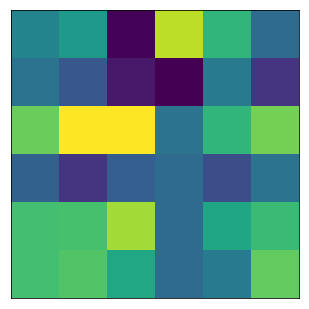

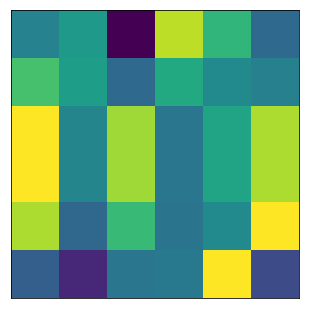

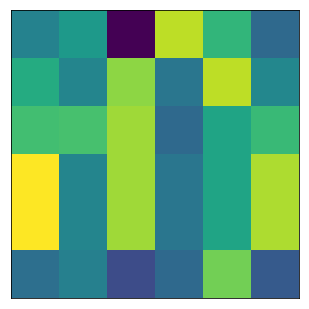

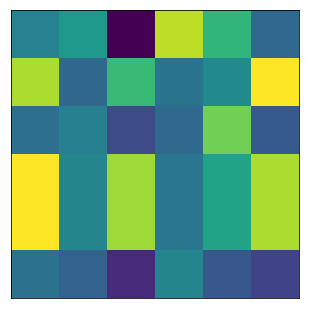

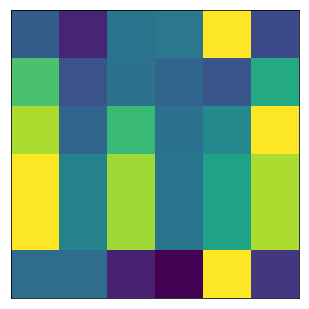

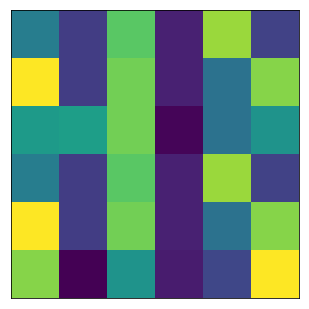

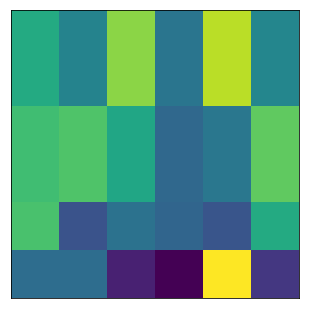

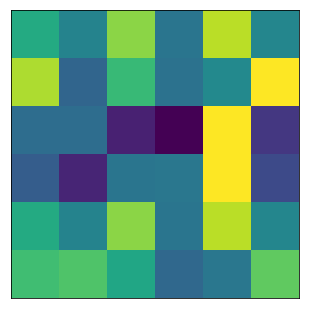

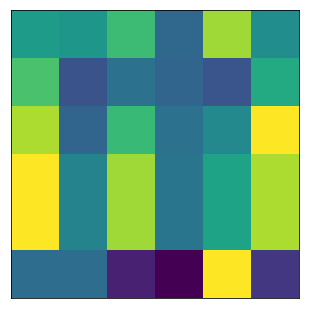

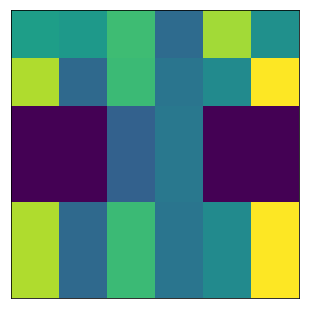

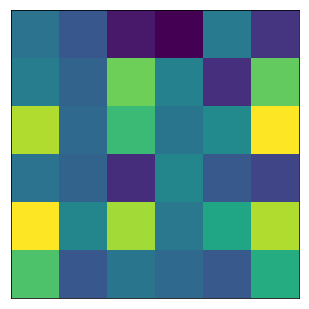

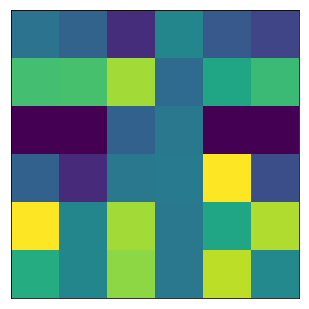

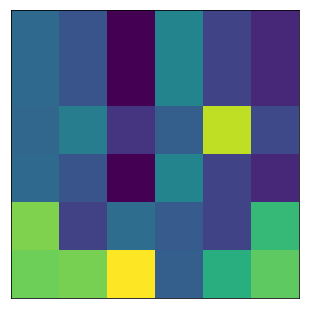

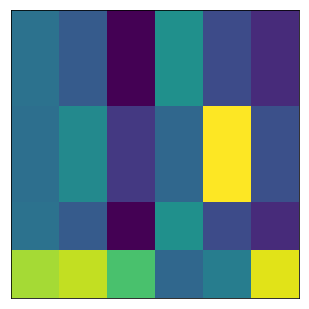

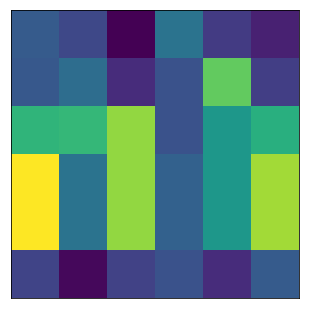

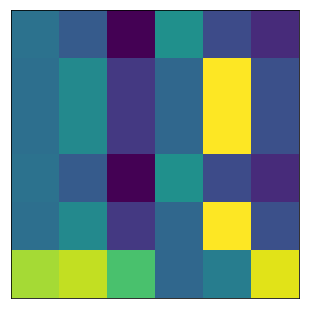

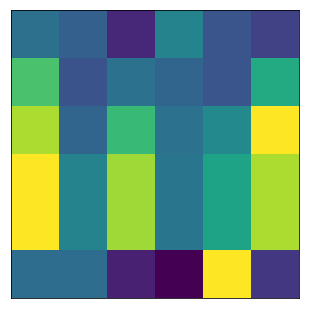

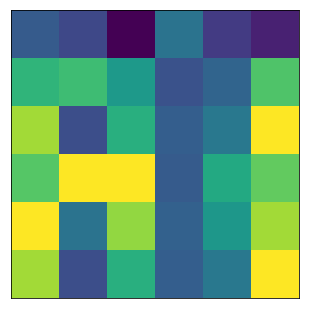

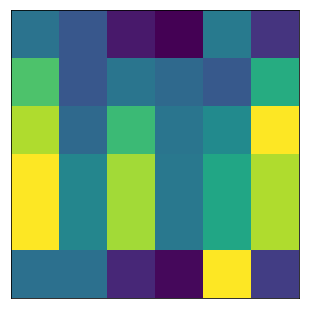

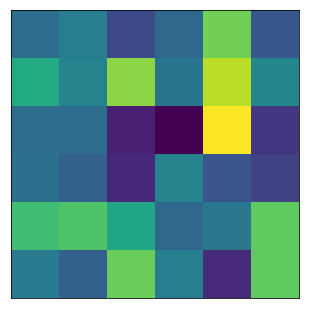

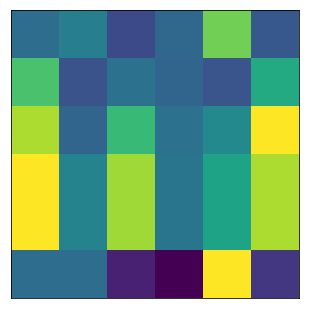

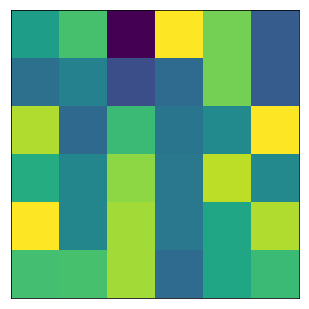

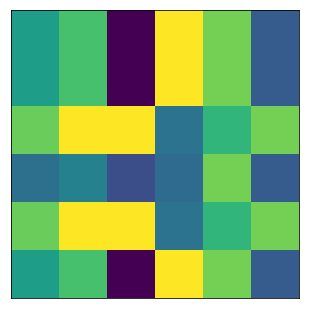

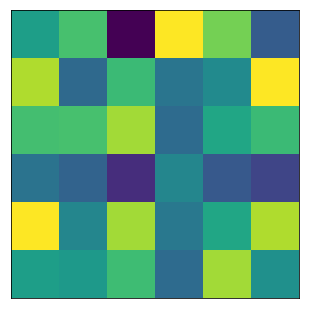

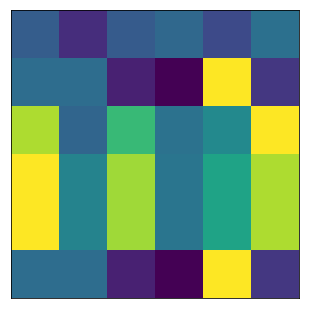

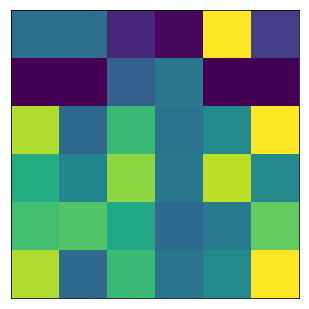

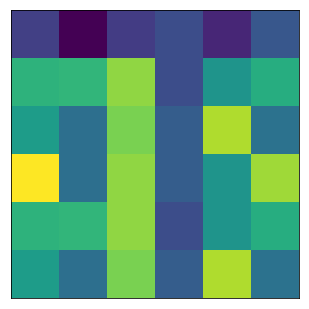

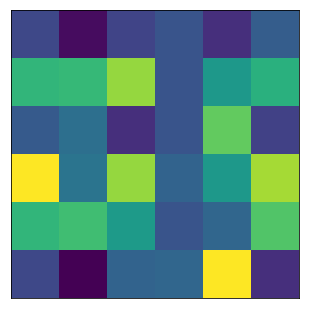

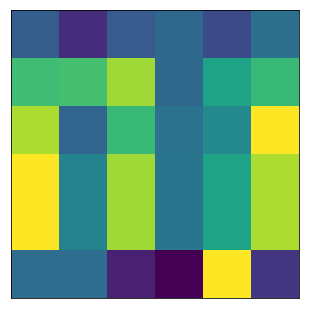

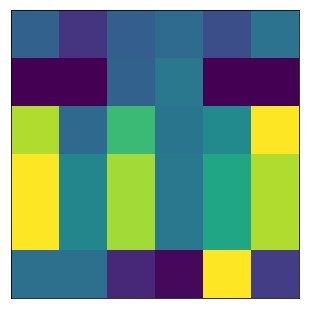

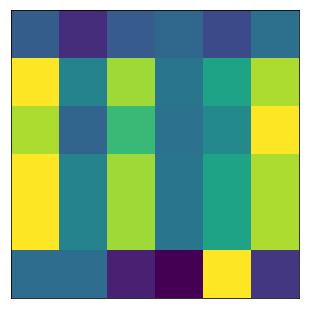

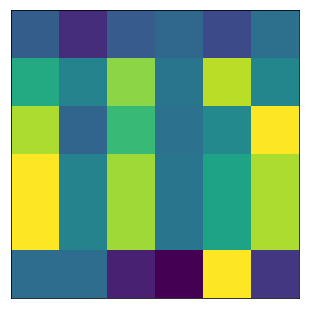

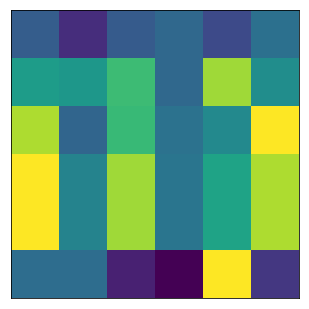

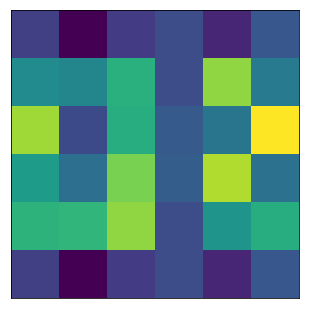

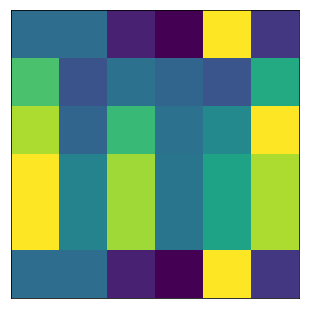

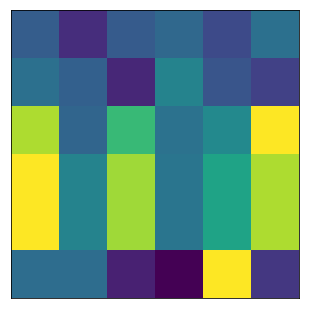

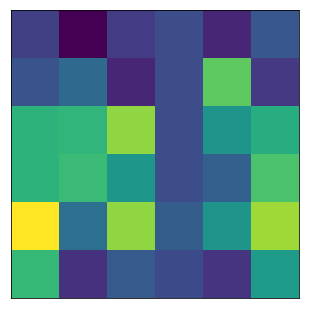

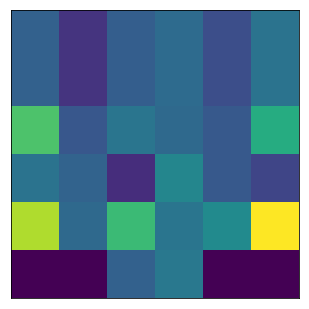

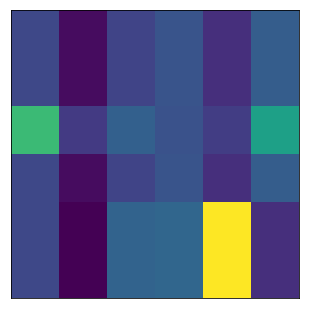

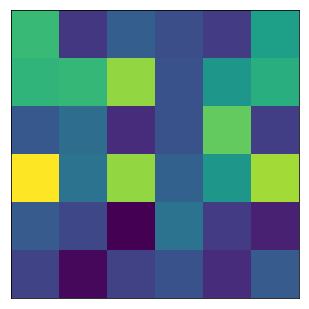

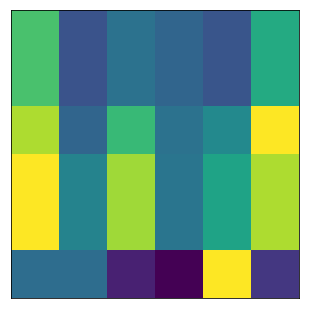

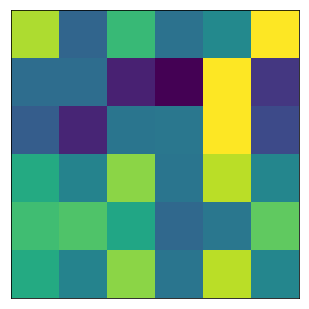

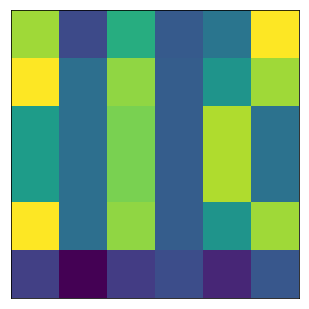

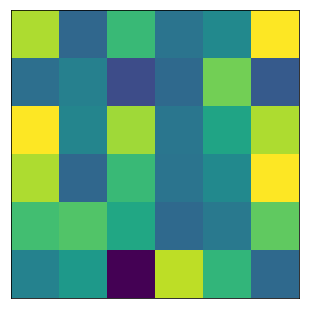

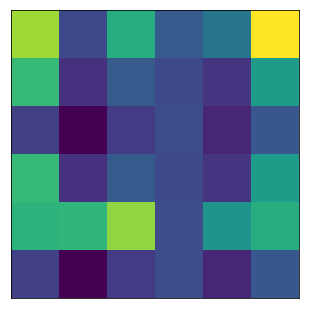

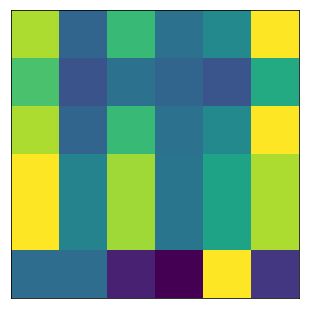

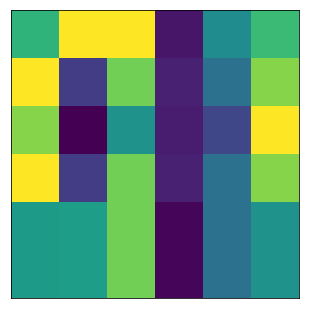

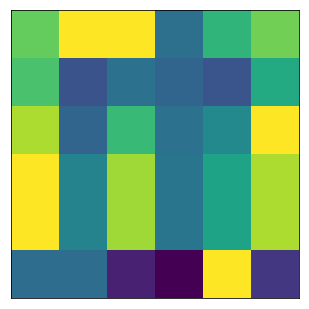

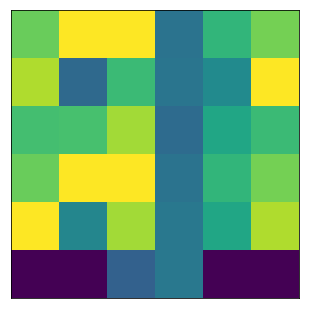

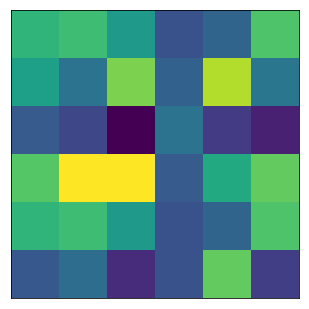

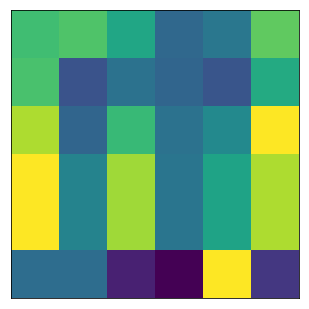

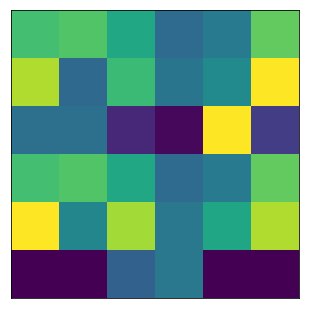

In [8]:
dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/One/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
   
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    #plt.figure()
    plt.imshow(data)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One/{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_0.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_10.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_11.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_110.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_111.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_114.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_116.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_117.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero\matrix_Zero_12.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_pre

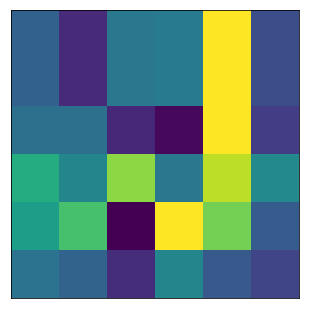

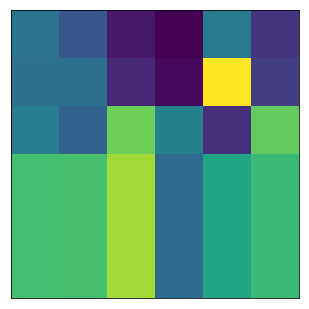

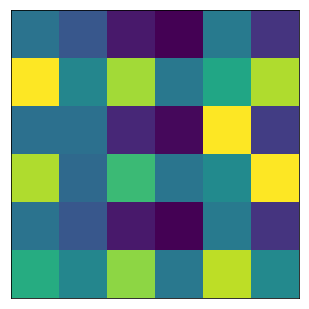

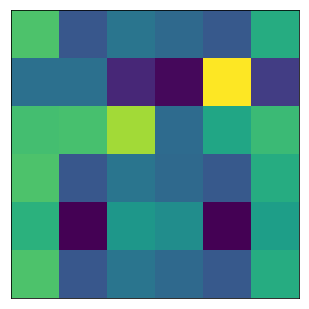

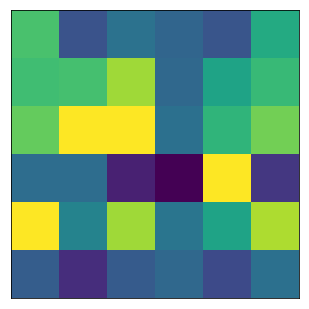

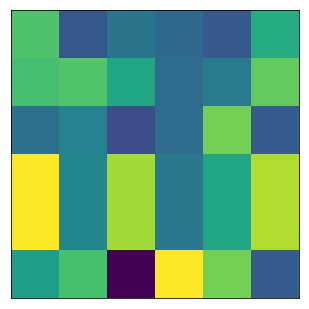

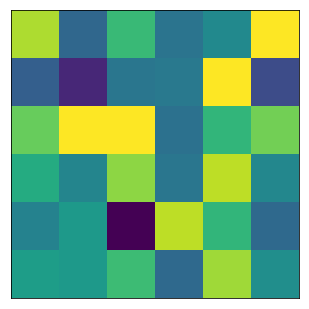

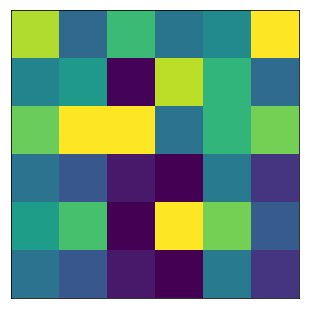

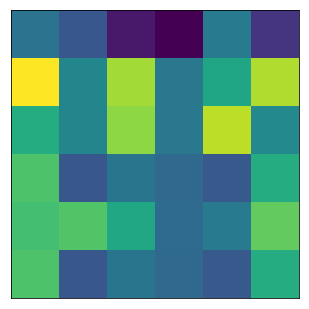

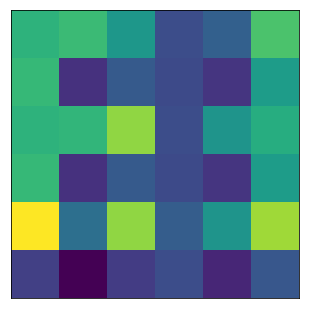

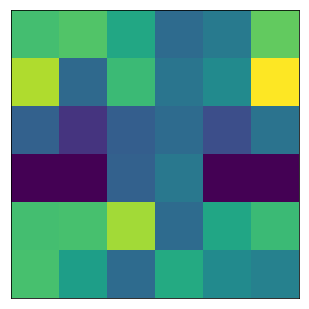

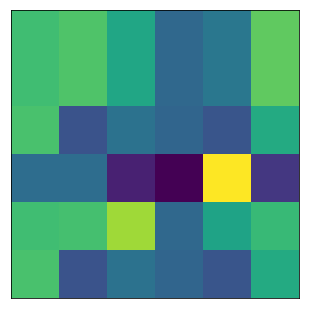

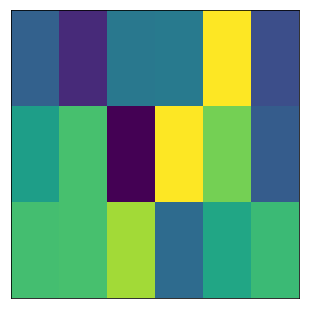

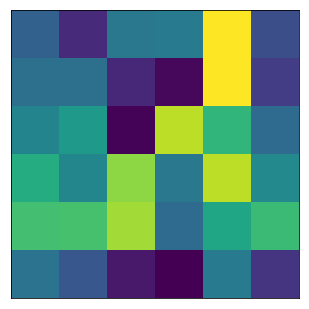

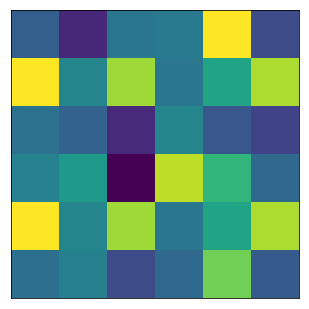

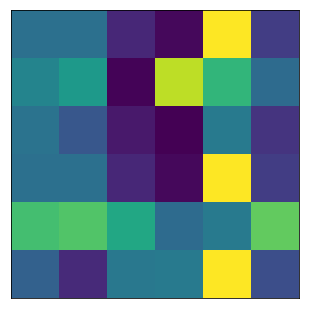

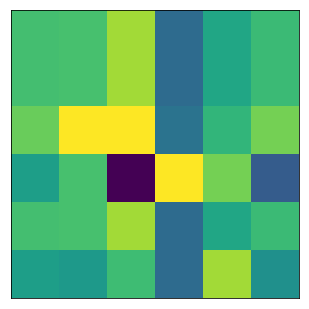

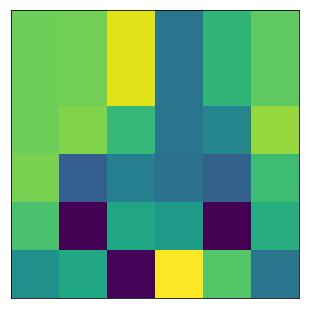

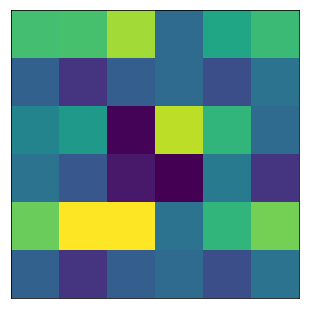

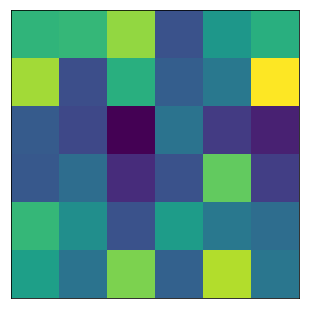

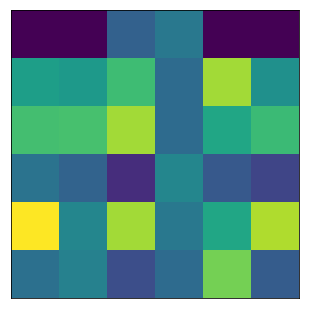

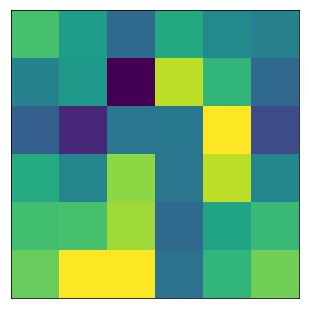

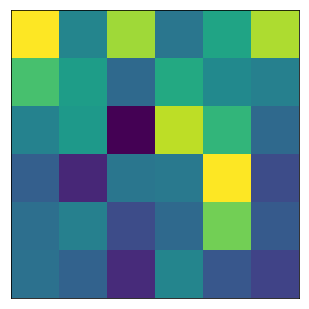

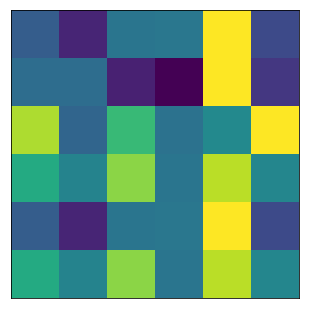

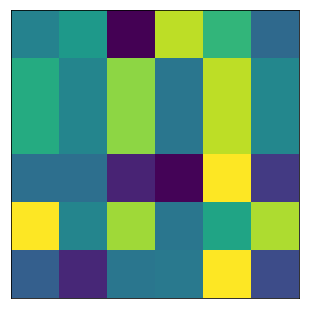

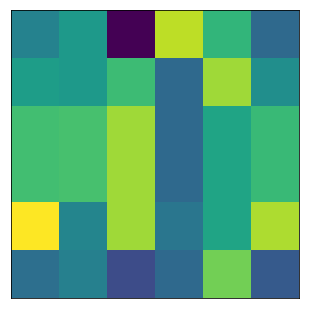

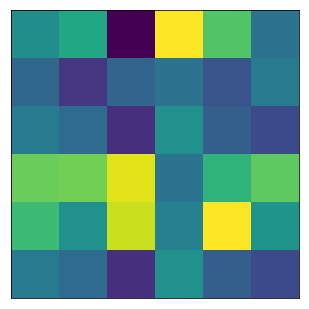

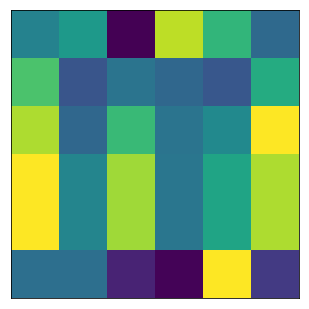

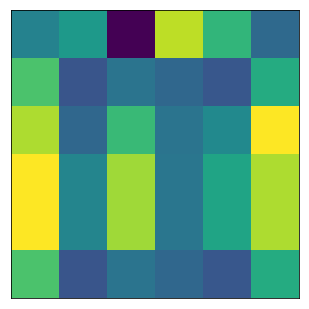

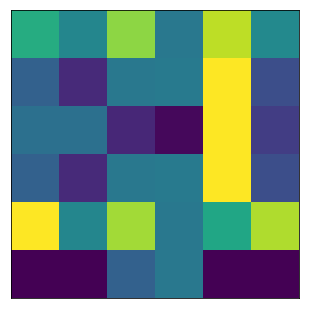

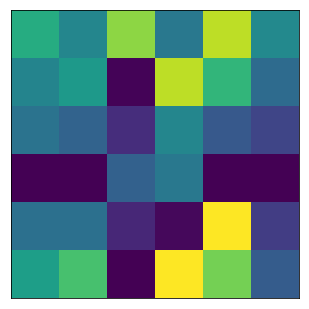

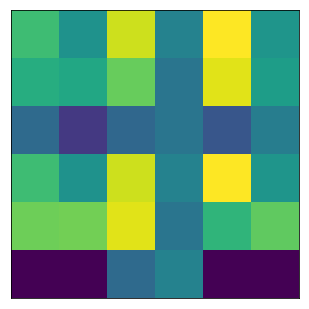

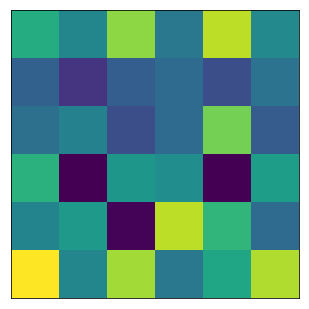

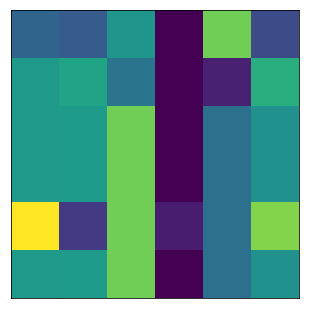

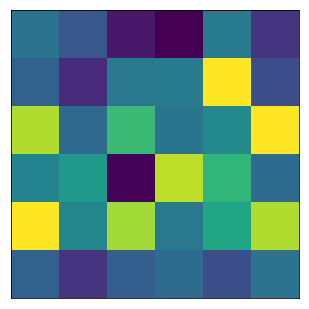

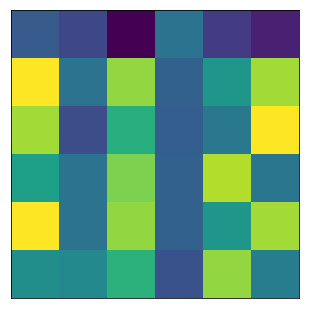

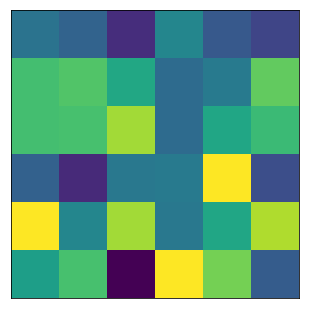

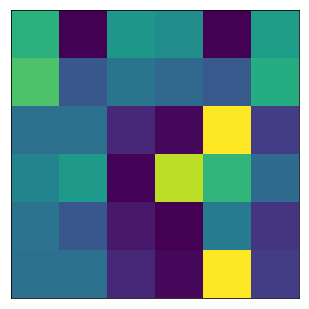

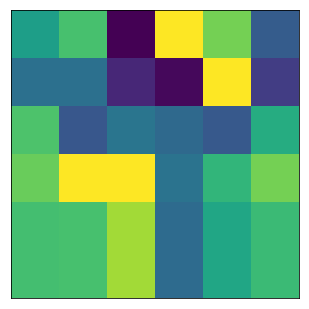

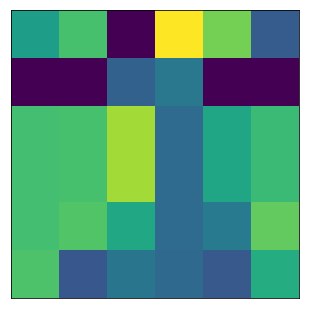

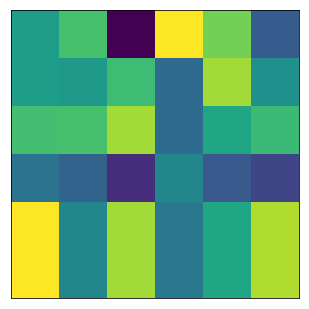

In [9]:
dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Zero/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    #plt.figure()
    plt.imshow(data)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero/{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_1.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_100.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_101.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_11.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_14.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_16.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_17.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_18.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One\matrix_One_24.csv
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/va

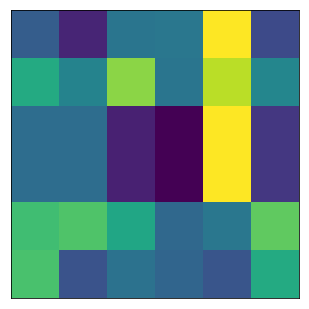

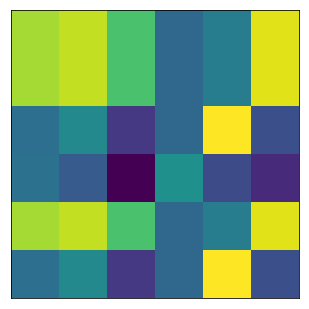

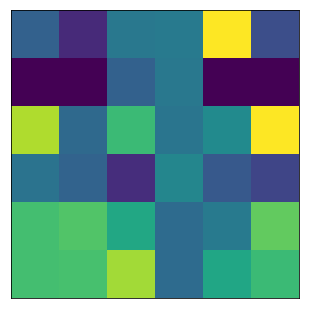

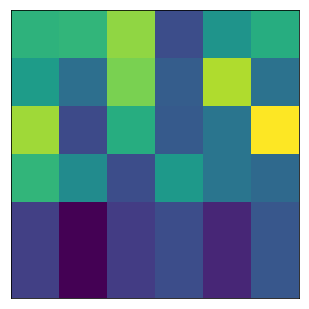

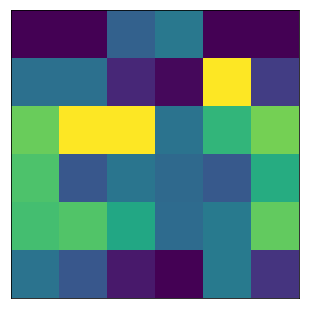

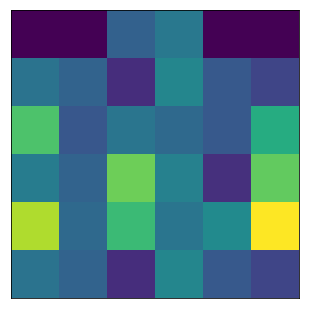

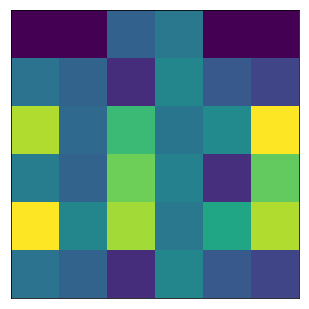

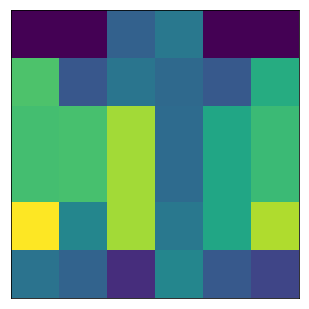

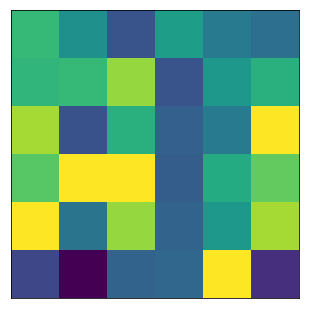

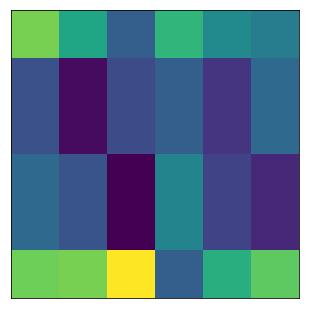

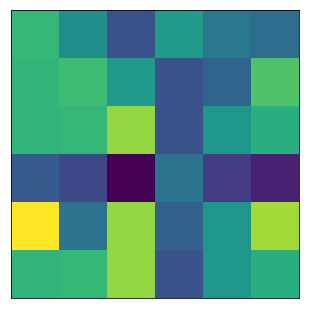

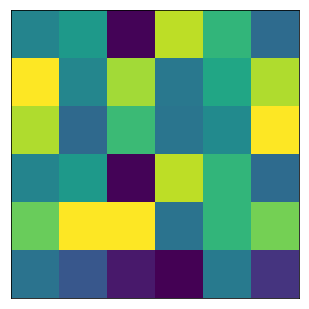

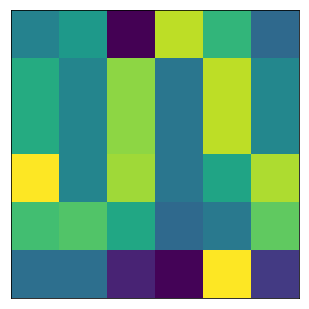

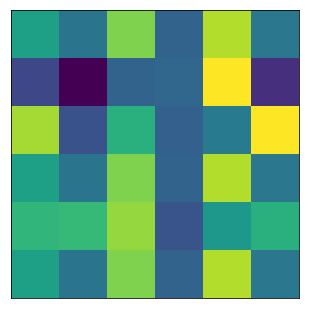

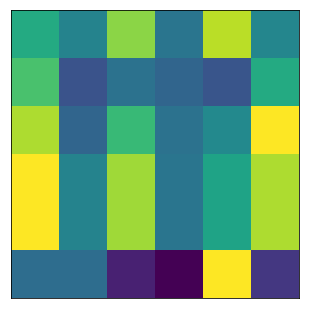

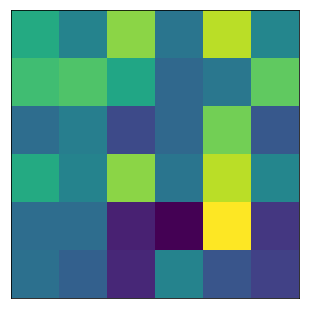

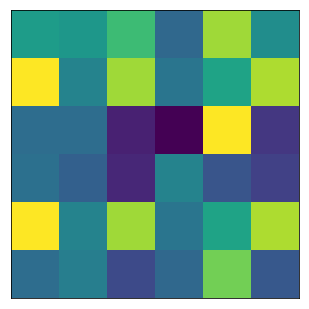

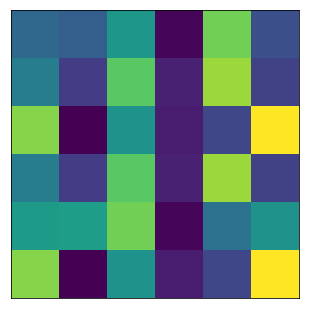

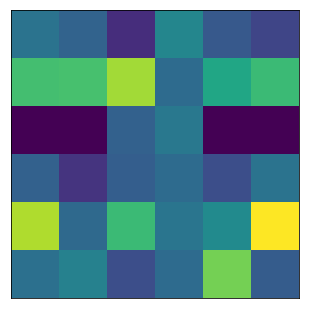

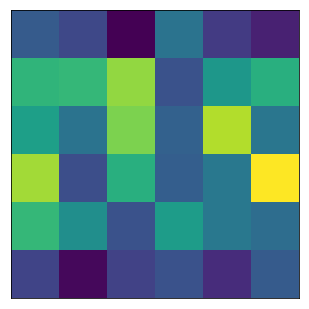

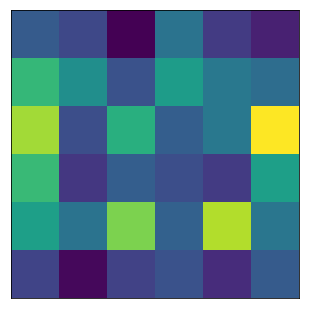

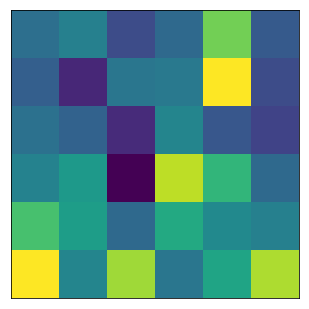

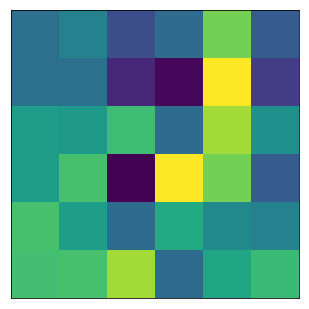

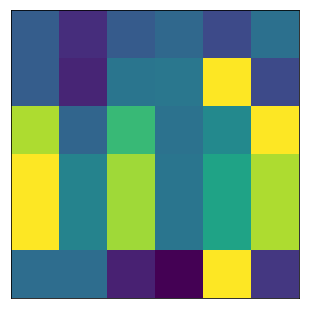

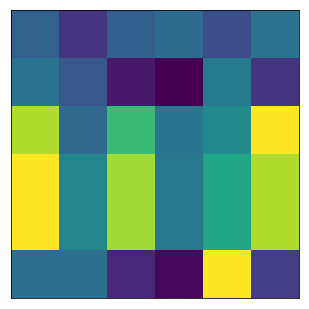

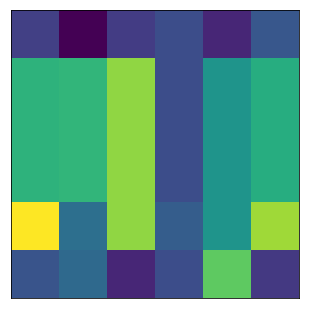

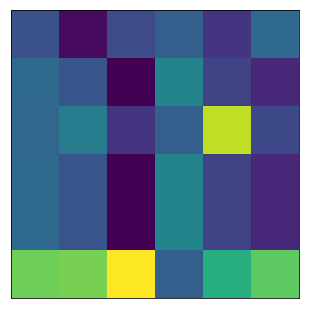

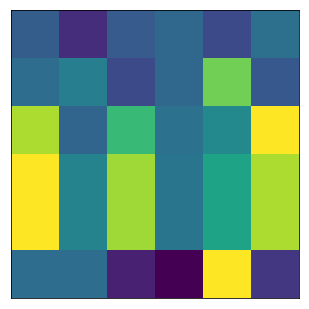

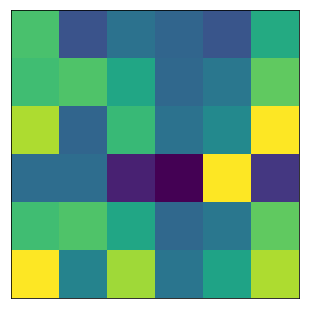

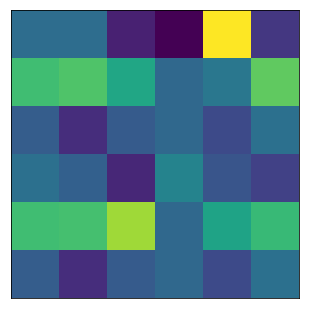

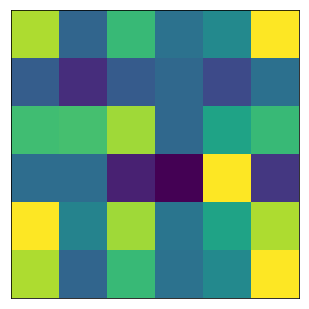

In [10]:
dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/One/*.csv'
df_list=[]
book_dict = {}

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    data=pd.read_csv(i, header=None, skiprows=0)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    #plt.figure()
    plt.imshow(data)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One/{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

In [8]:
new_dir1 = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/A_Zero'
new_dir2 = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/B_One'
new_dir3 = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Rotate-flip/A_Zero'
new_dir4 = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Rotate-flip/B_One'

os.makedirs(new_dir1, exist_ok=True)
os.makedirs(new_dir2, exist_ok=True)
os.makedirs(new_dir3, exist_ok=True)
os.makedirs(new_dir4, exist_ok=True)


Rotate 90 for clockwise in train/Image/Zero and train/Image/One directory

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_1.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_100.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_101.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_102.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_103.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_104.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_105.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_106.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_107.png
C:/Users/user/OneDrive/python3/aminomap

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_77.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_78.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_79.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_80.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_82.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_84.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_85.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_86.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_88.png
C:/Users/user/OneDrive/python3/aminomap/Amyloi

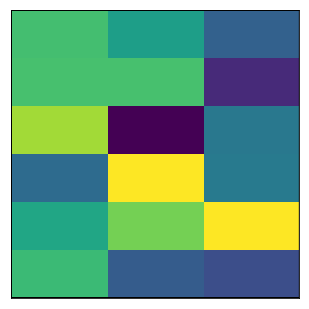

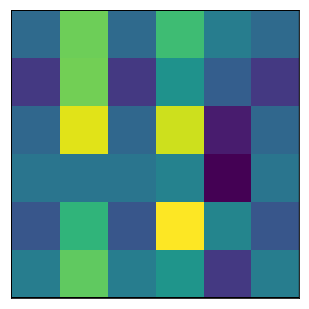

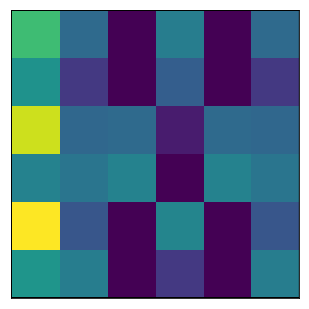

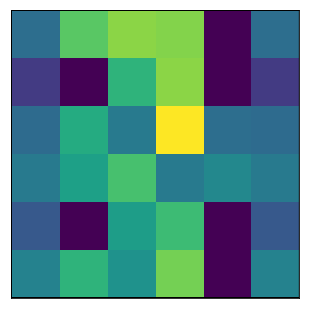

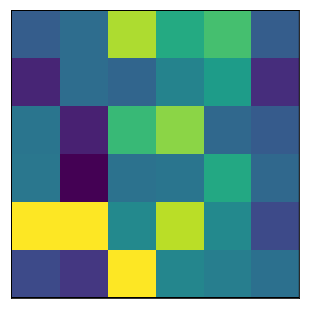

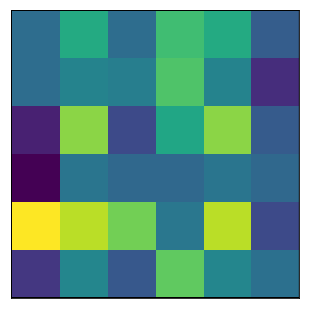

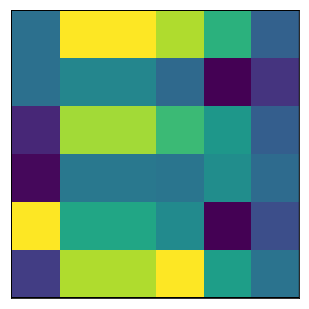

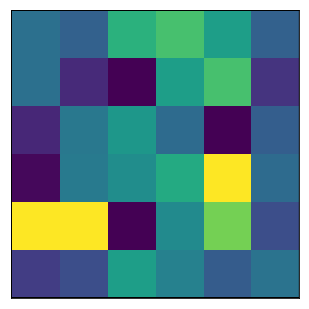

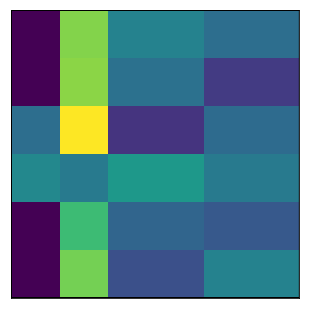

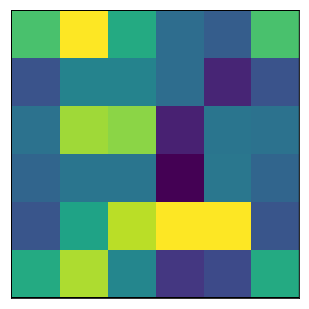

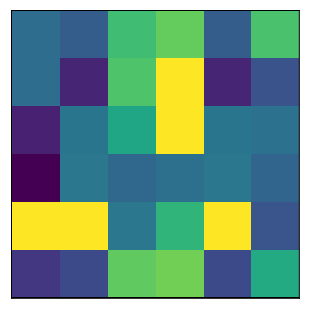

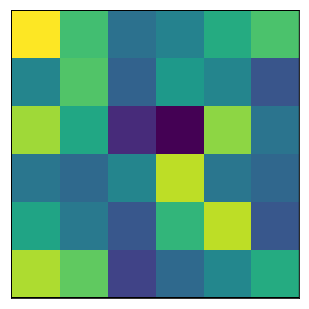

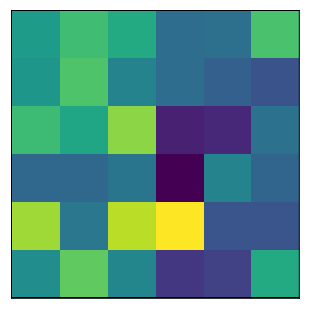

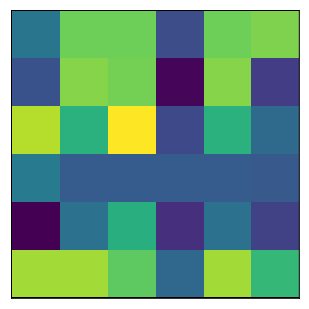

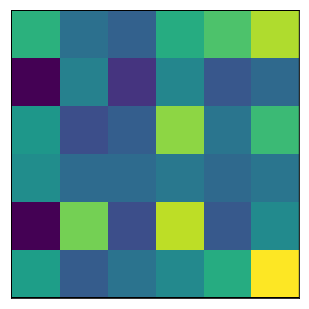

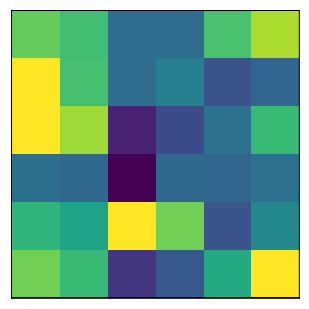

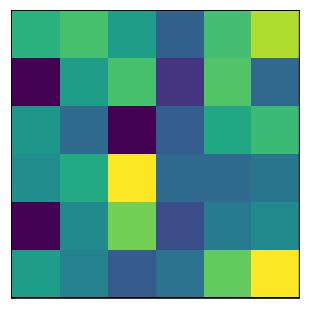

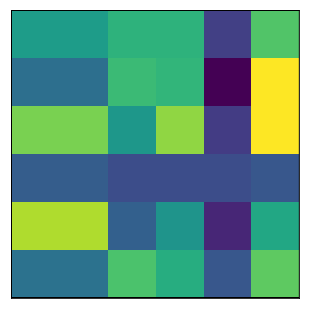

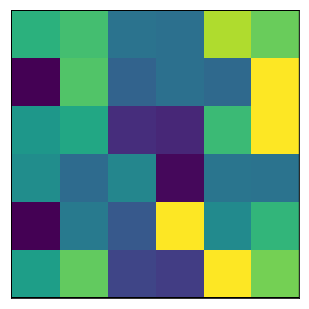

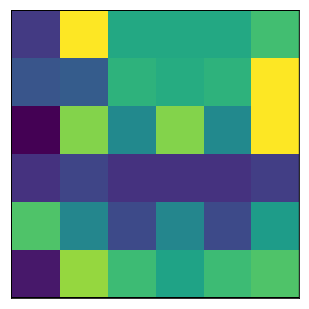

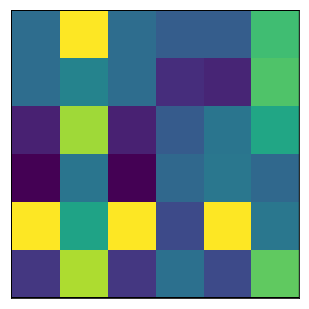

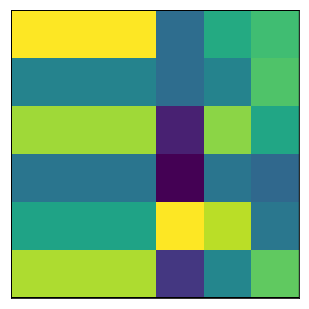

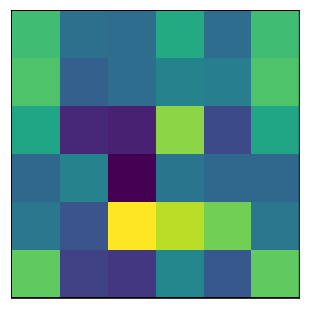

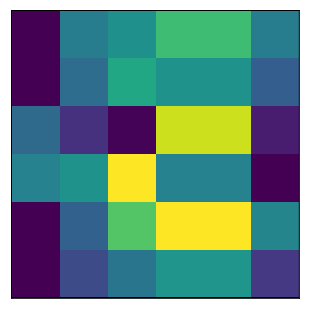

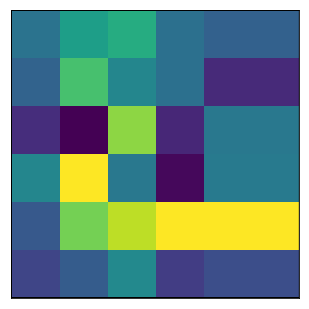

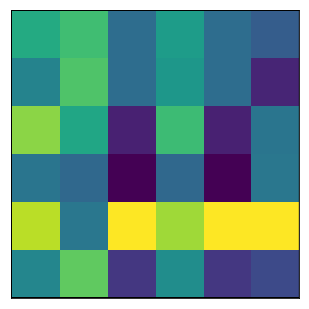

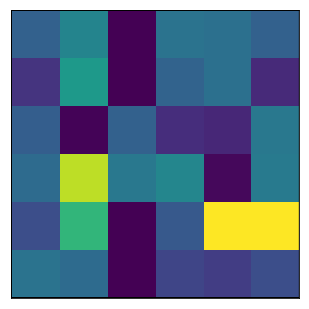

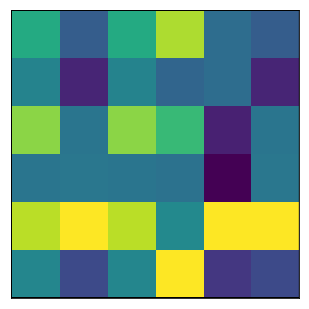

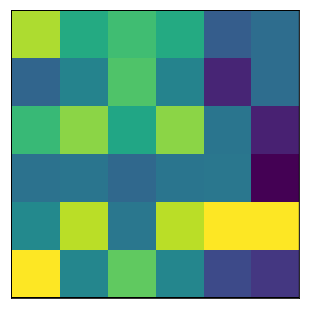

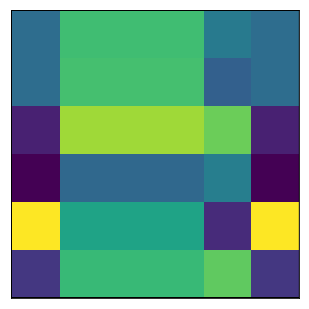

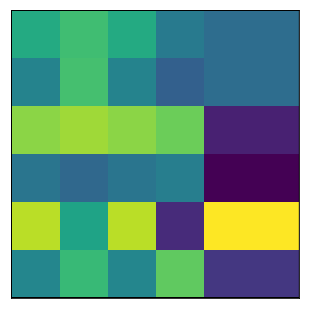

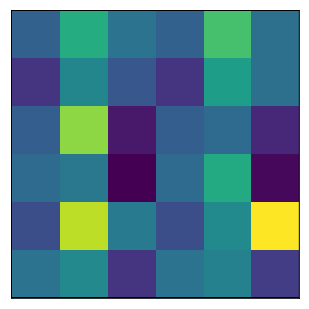

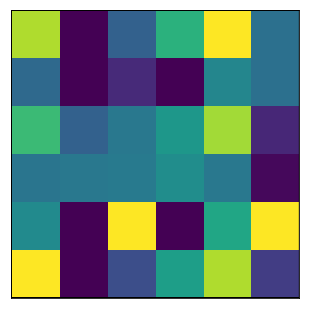

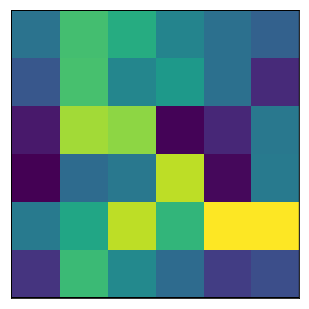

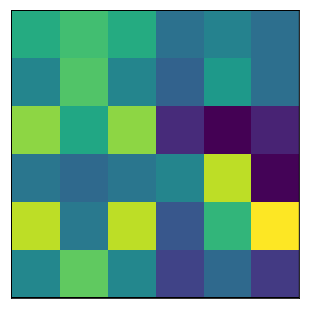

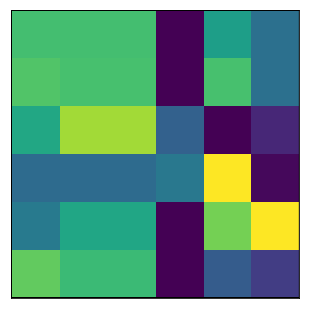

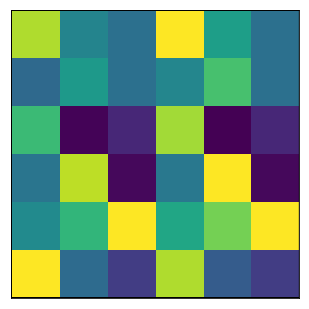

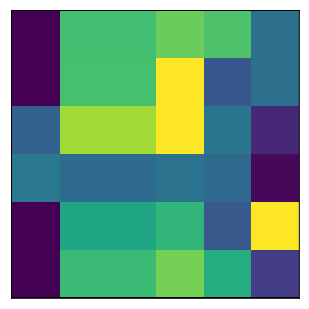

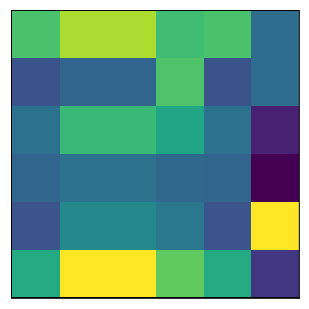

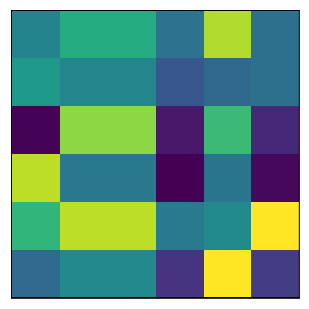

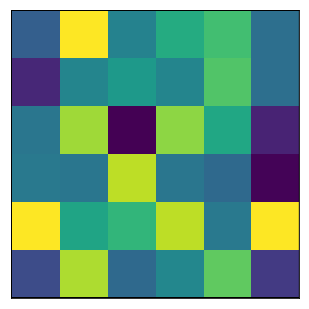

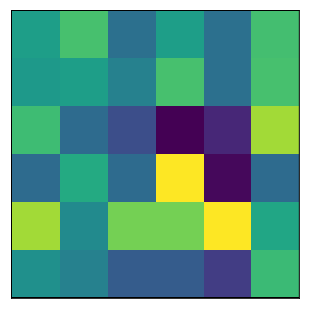

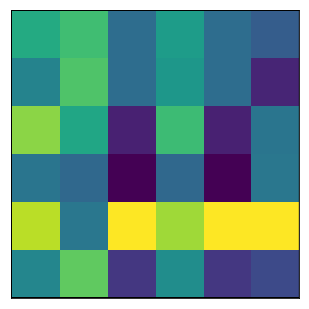

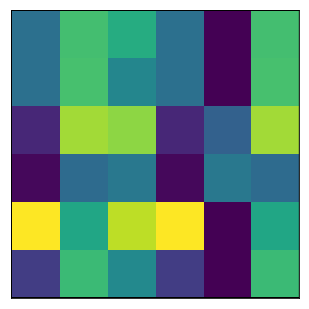

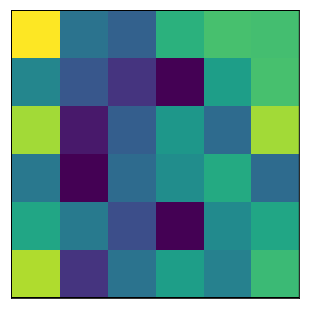

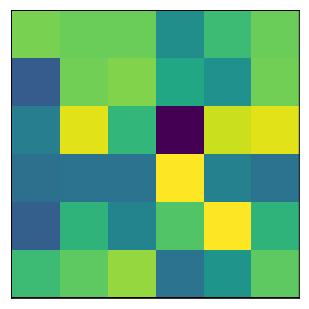

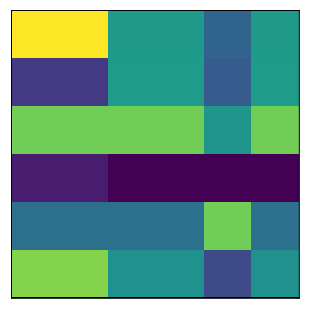

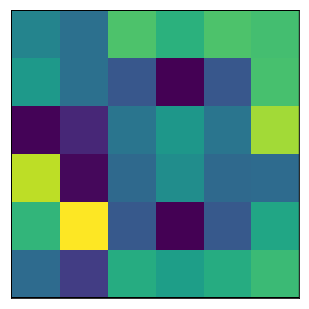

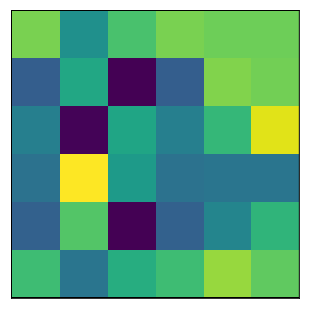

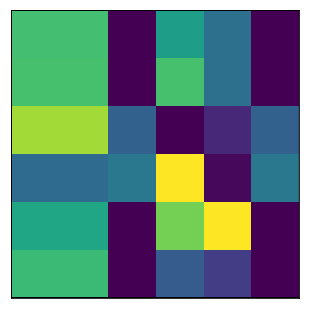

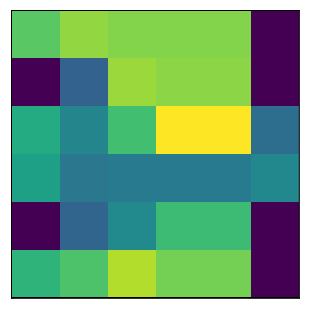

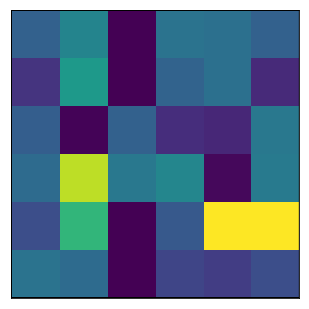

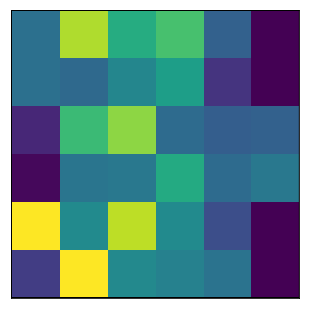

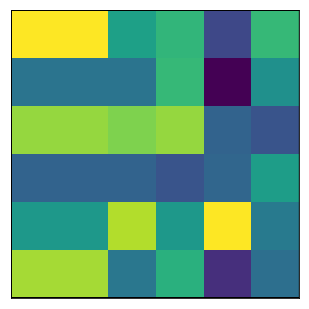

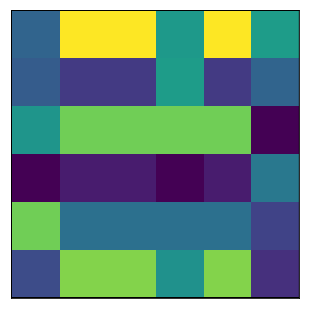

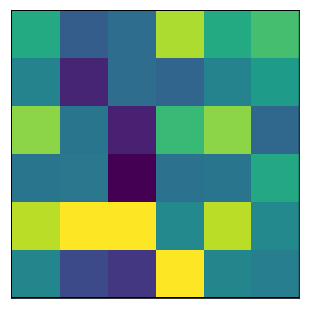

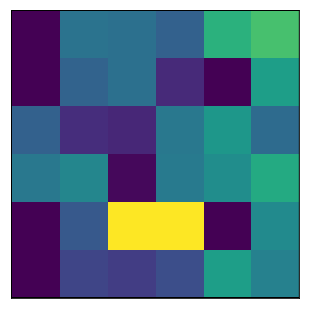

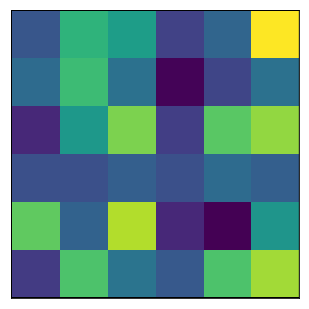

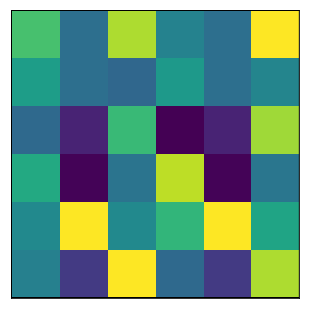

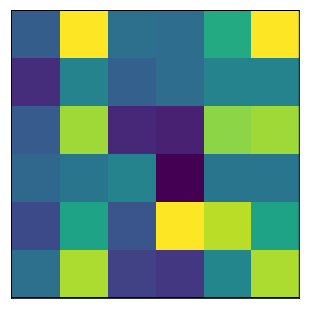

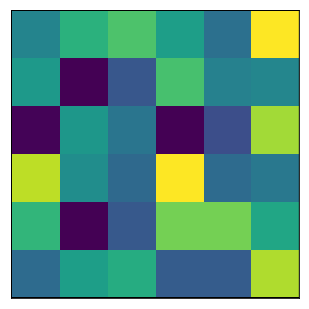

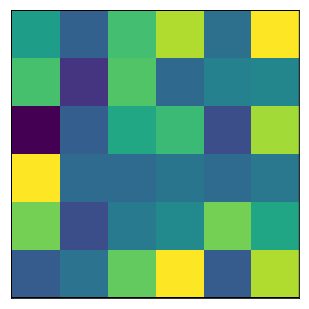

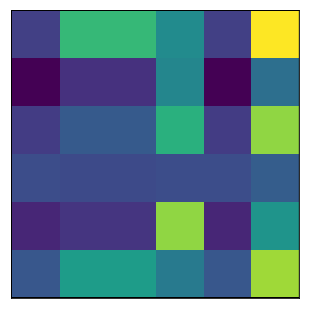

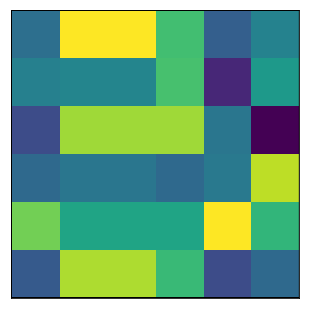

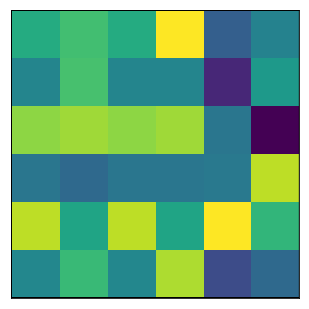

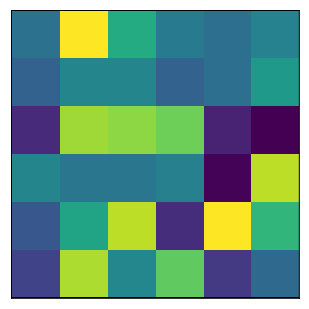

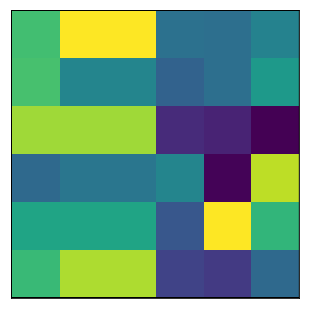

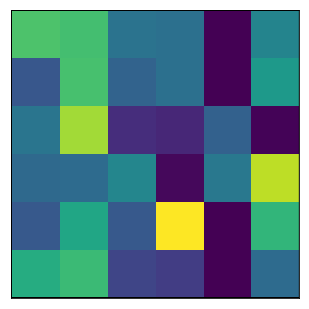

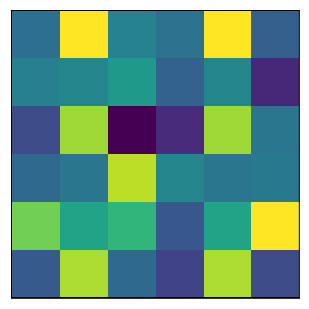

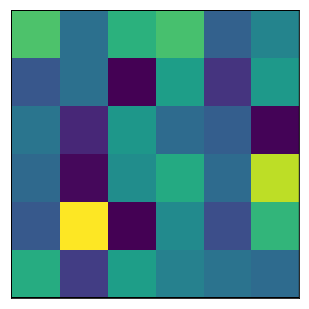

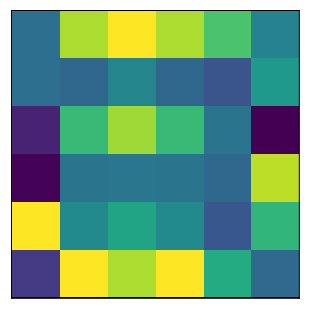

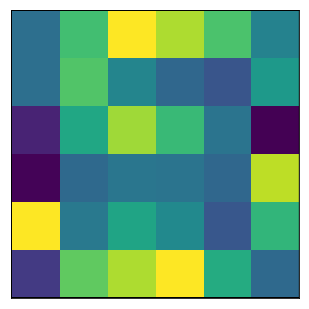

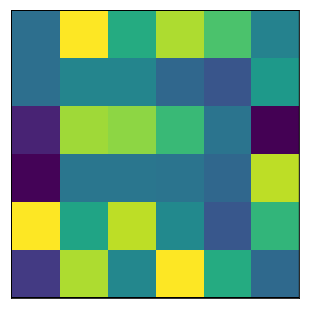

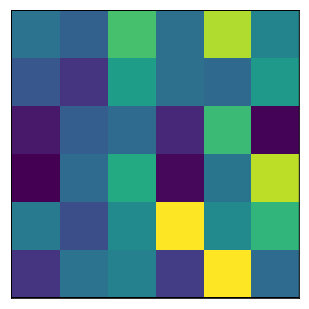

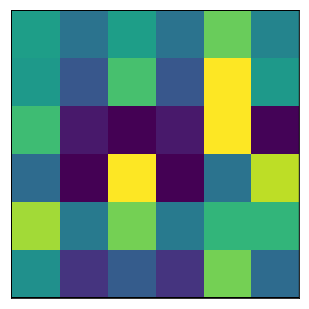

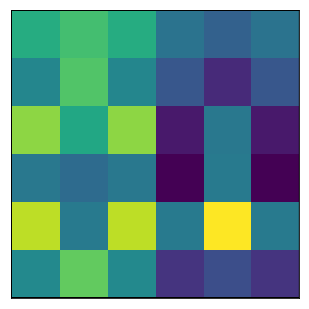

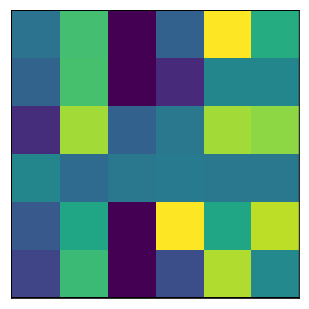

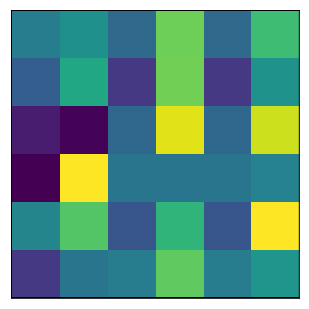

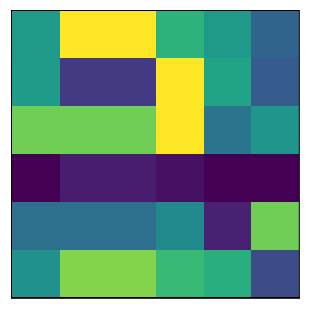

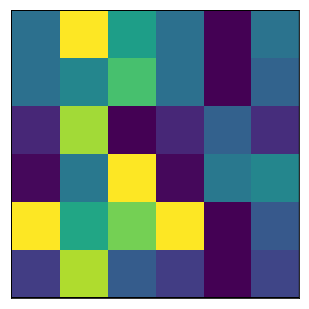

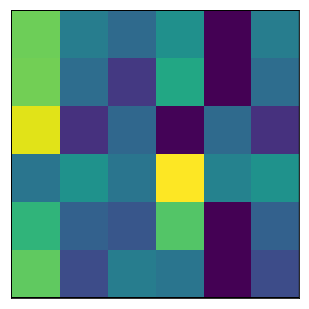

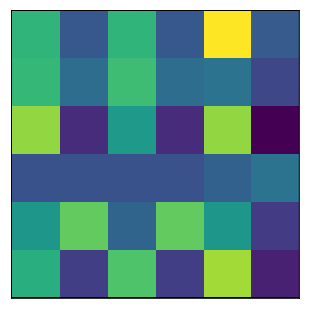

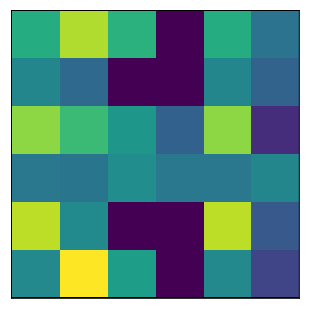

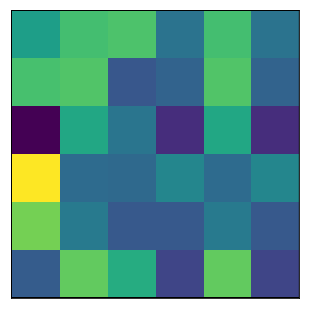

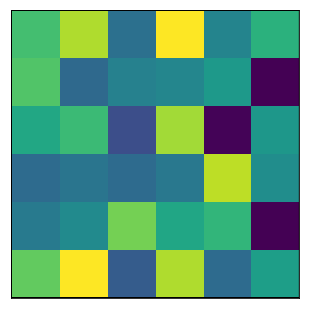

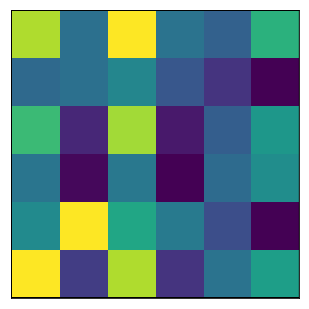

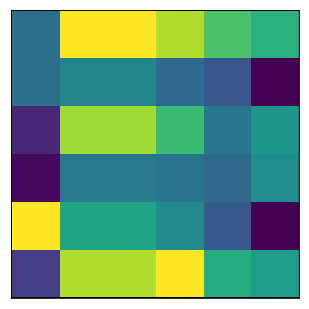

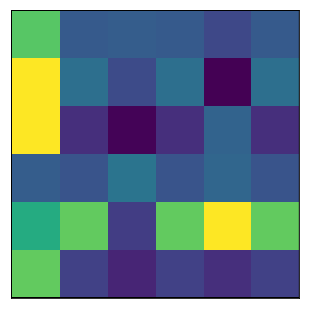

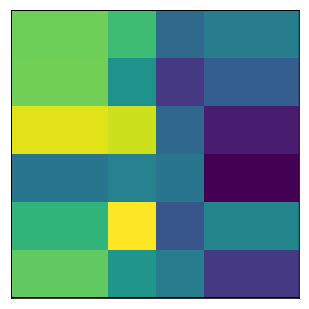

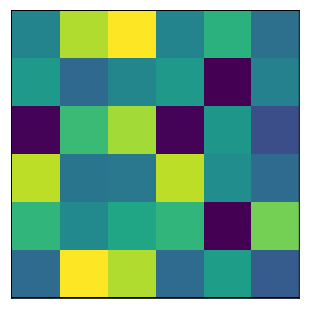

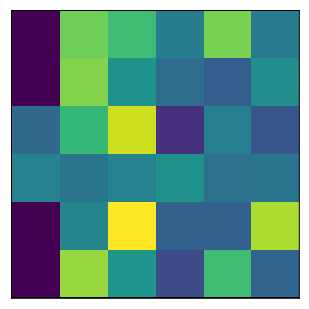

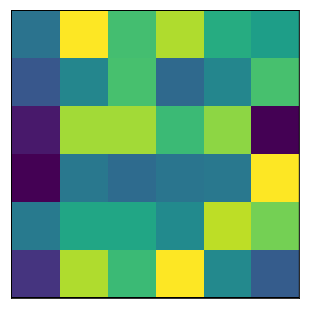

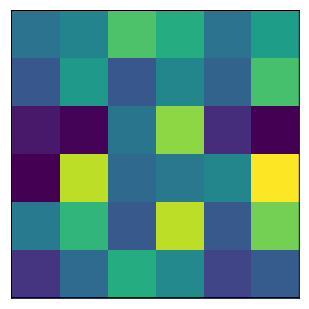

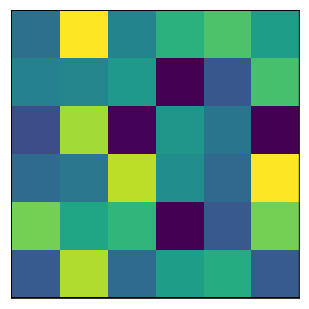

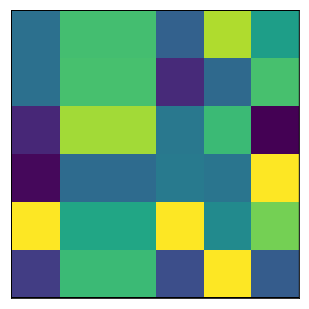

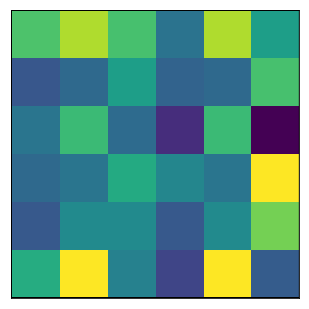

In [10]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate90/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/A_Zero/90_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_0.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_10.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_12.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_13.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_15.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_19.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_2.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_20.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_21.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Data

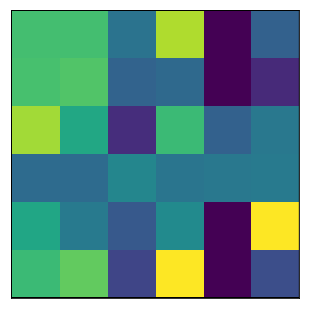

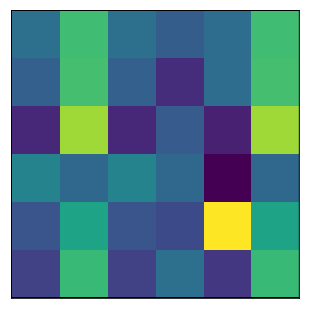

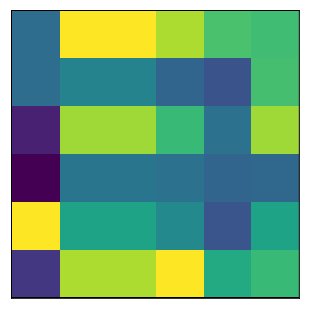

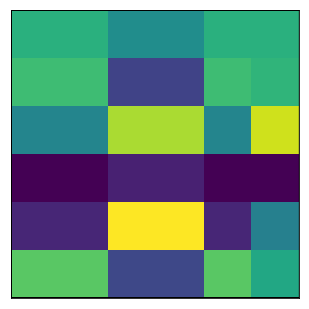

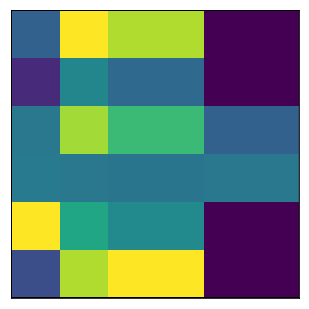

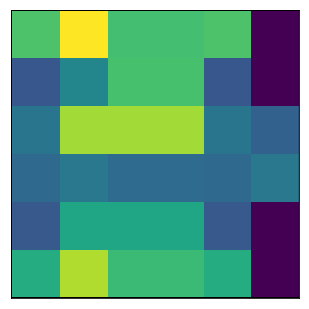

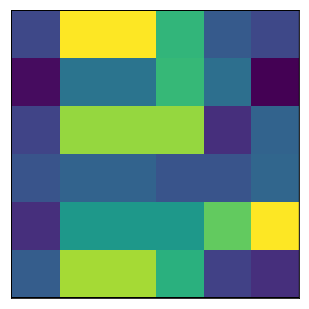

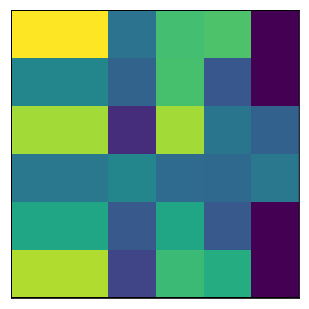

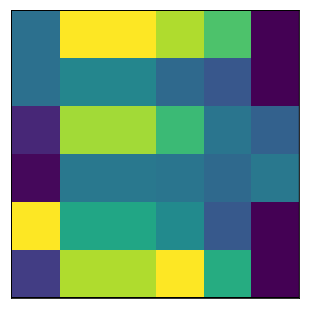

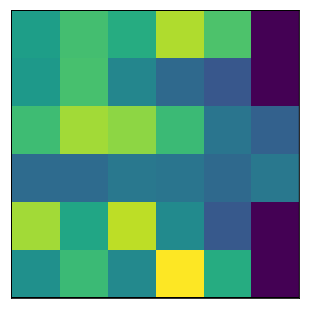

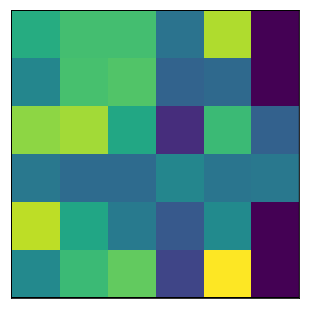

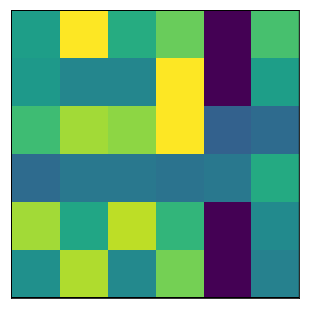

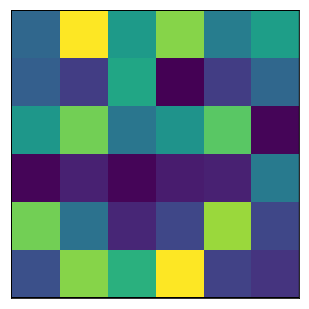

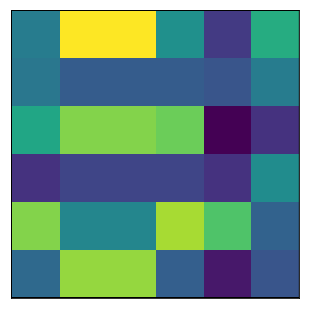

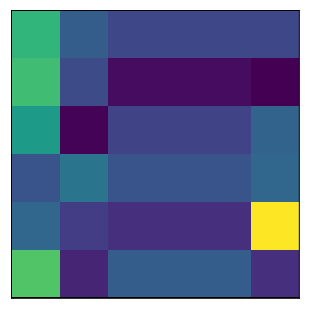

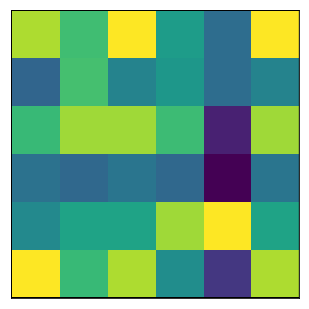

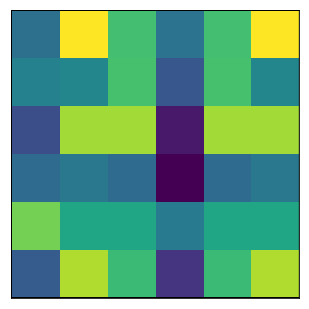

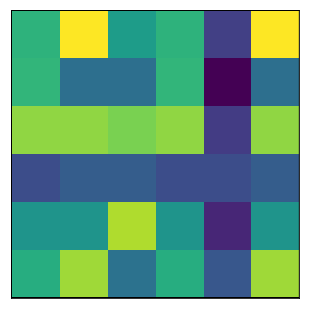

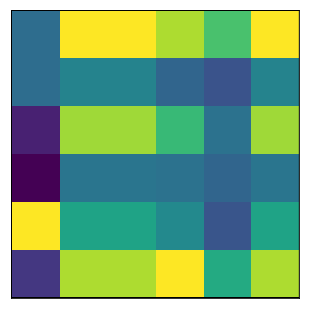

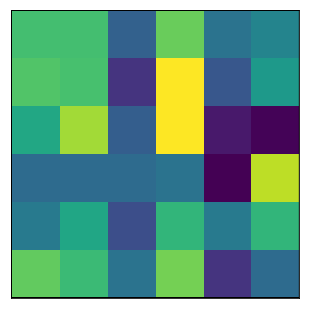

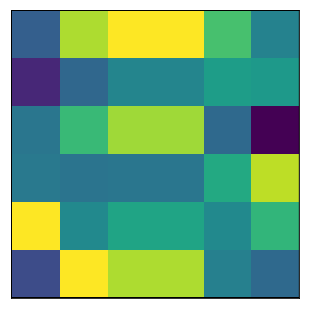

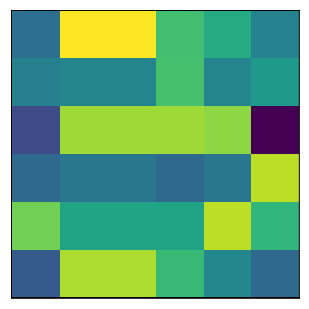

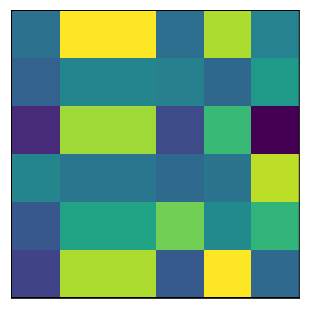

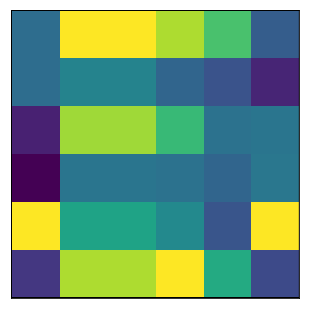

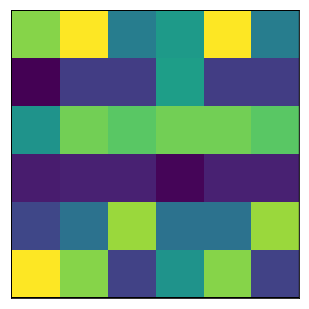

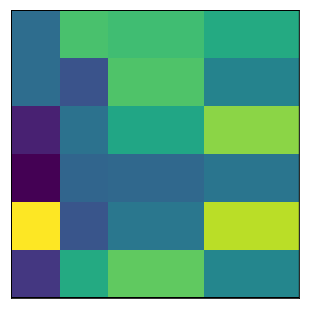

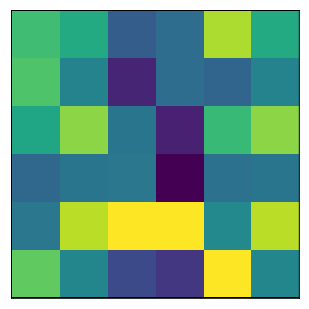

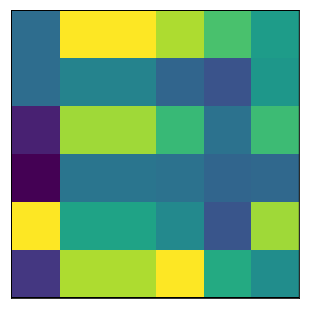

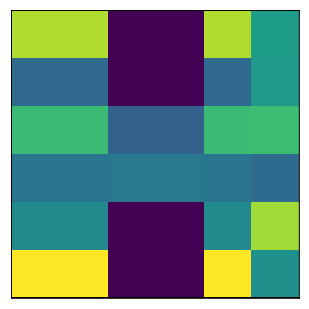

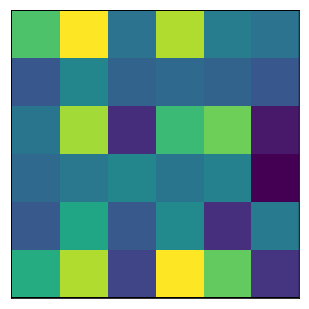

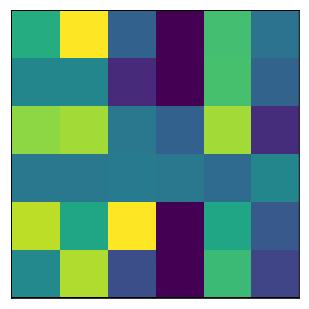

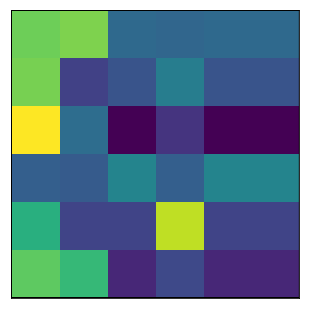

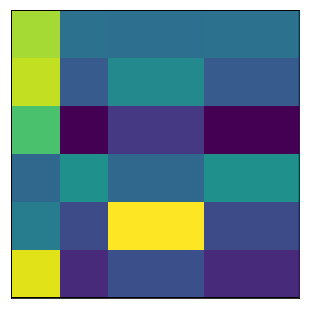

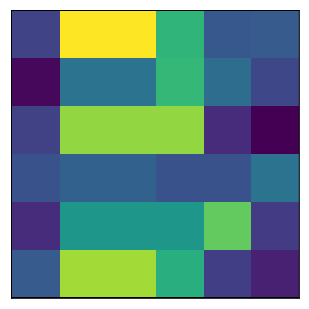

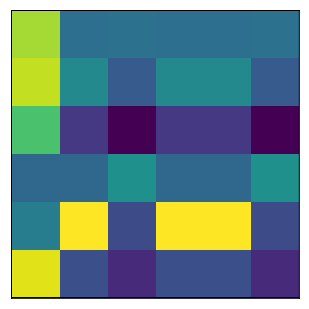

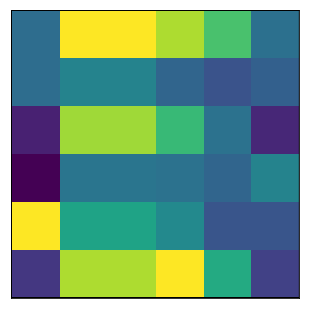

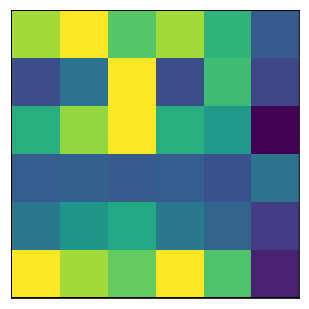

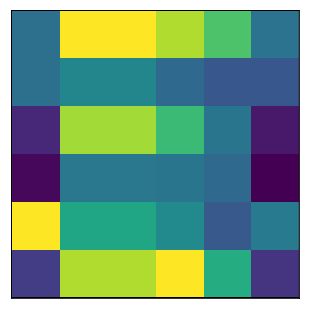

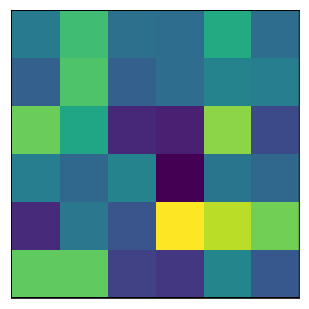

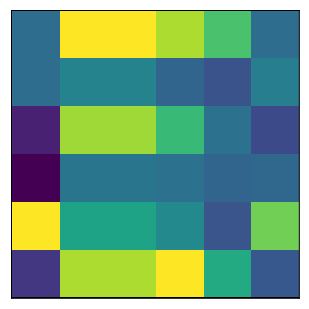

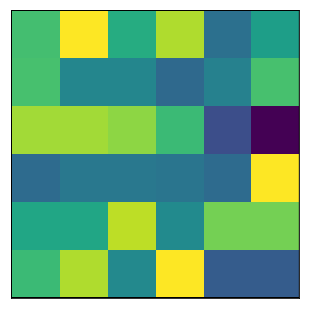

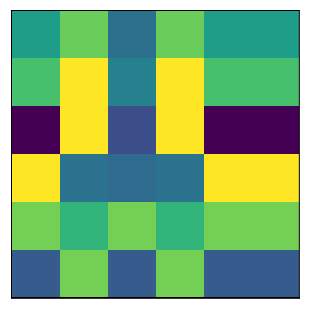

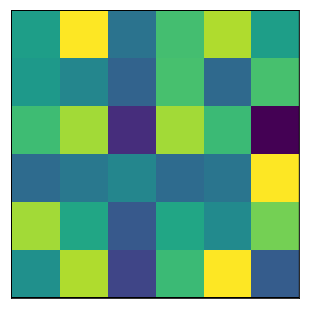

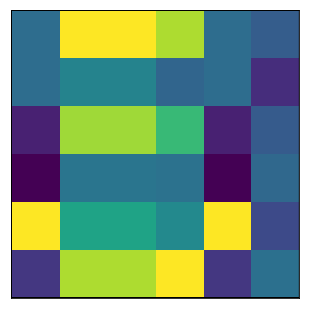

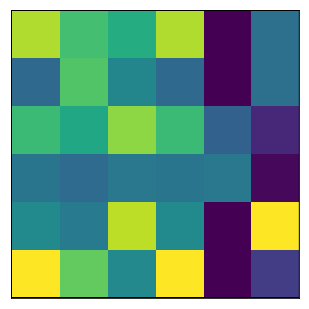

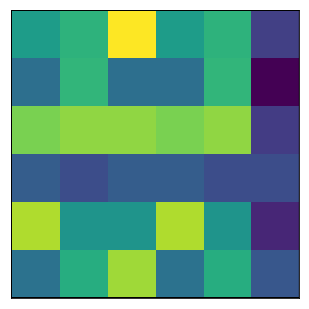

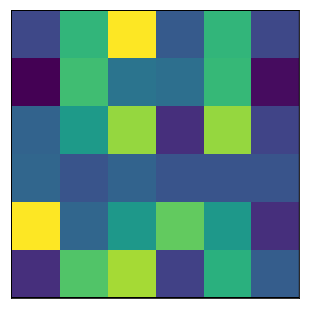

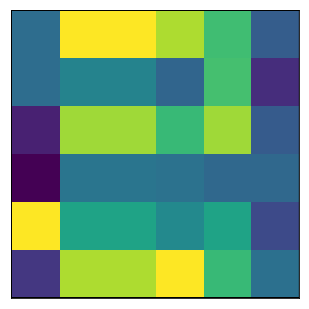

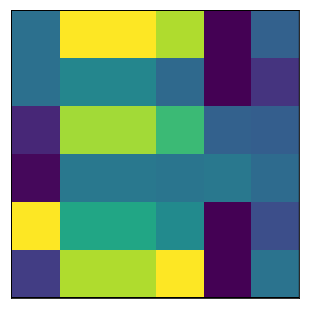

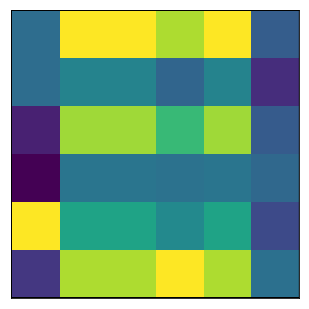

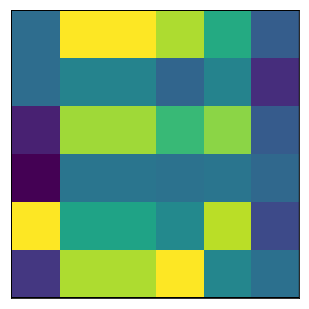

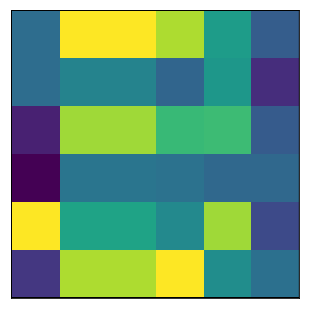

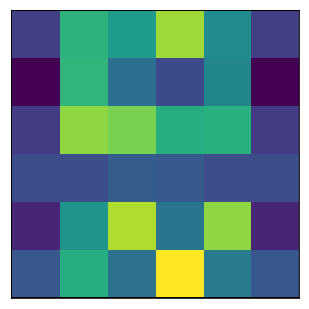

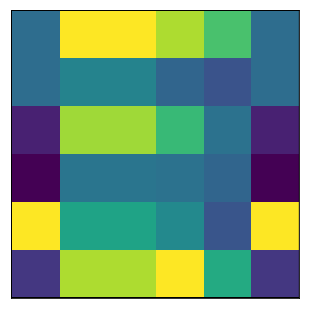

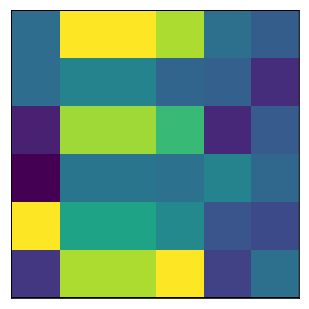

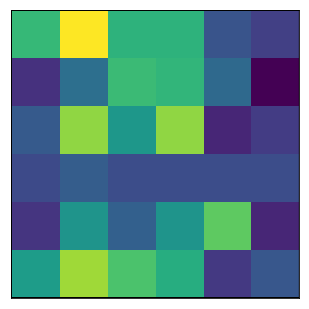

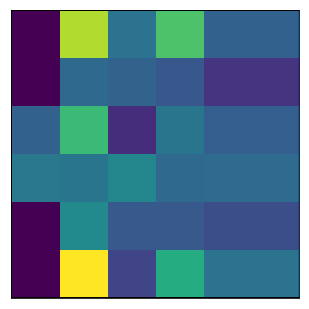

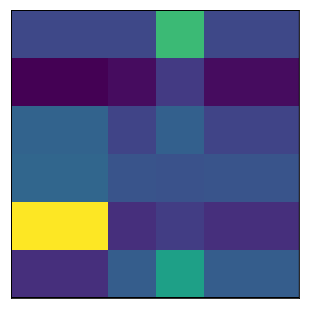

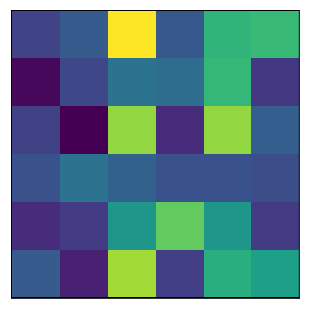

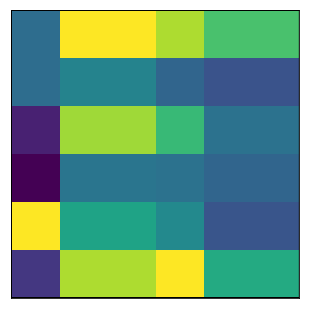

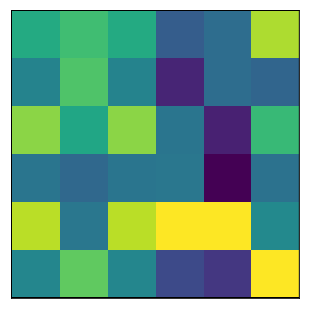

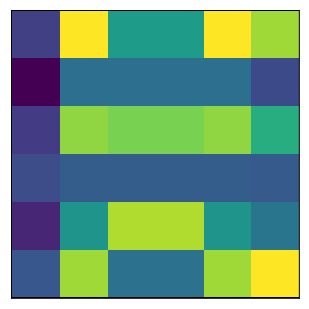

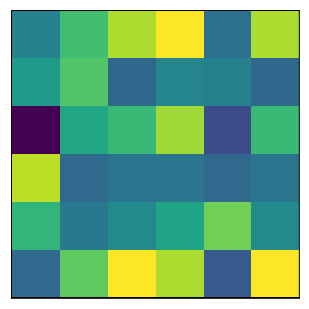

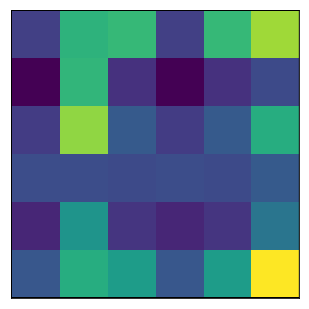

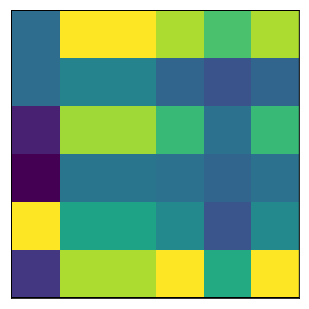

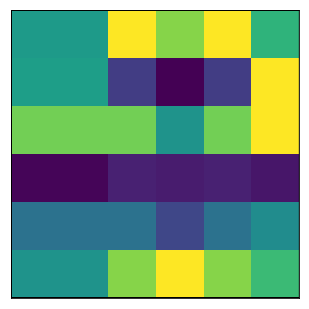

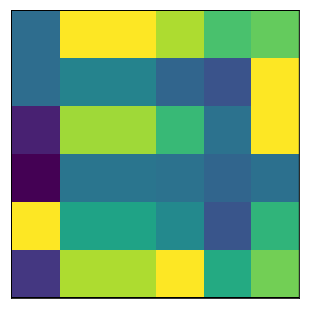

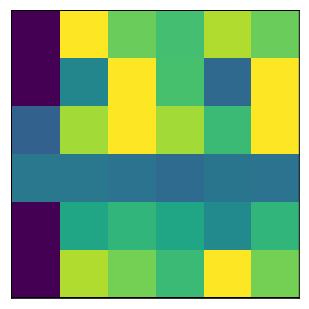

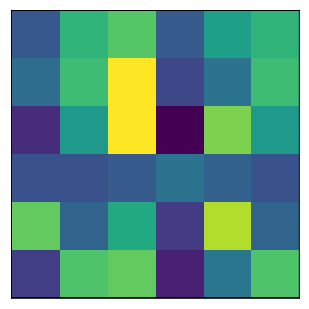

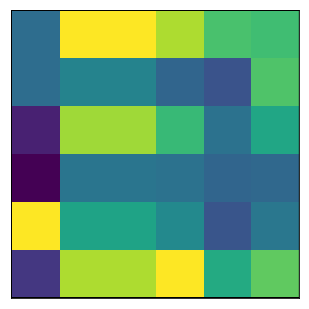

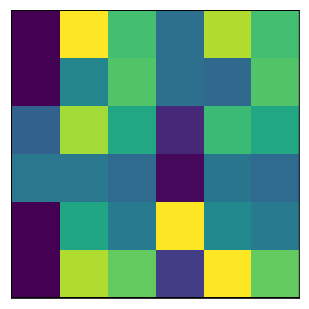

In [11]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate90/One/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/B_One/90_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_0.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_10.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_11.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_110.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_111.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_114.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_116.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_117.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_12.p

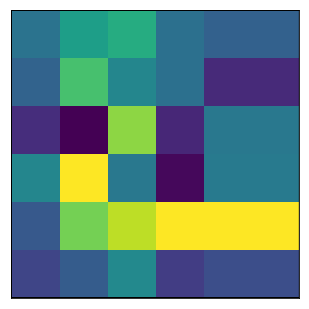

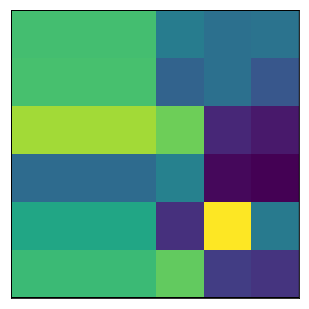

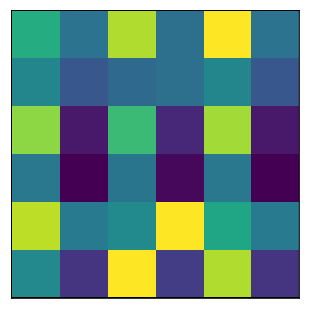

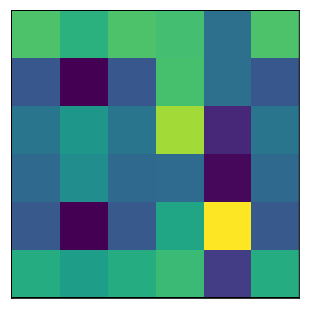

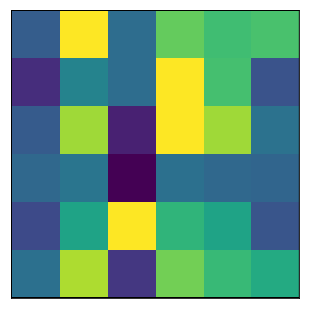

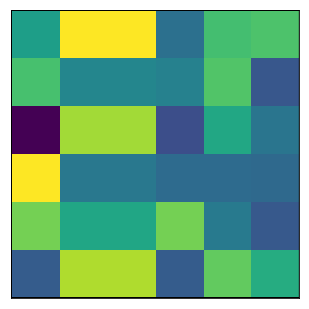

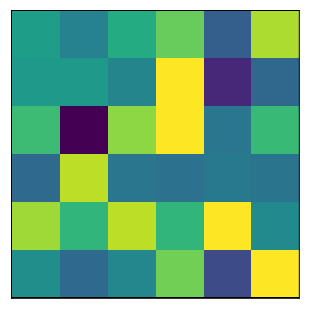

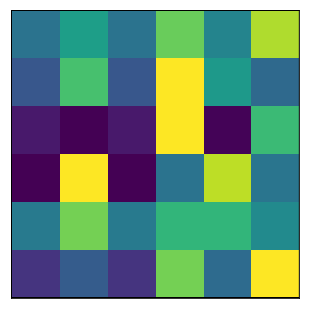

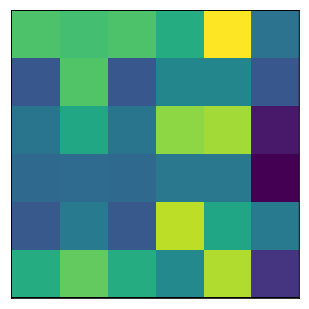

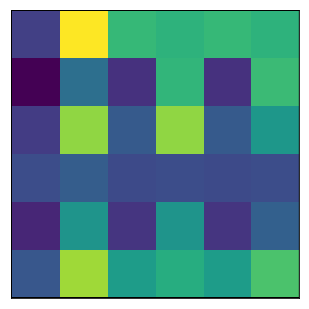

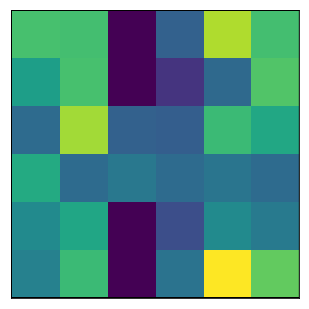

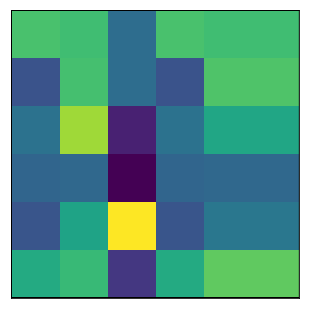

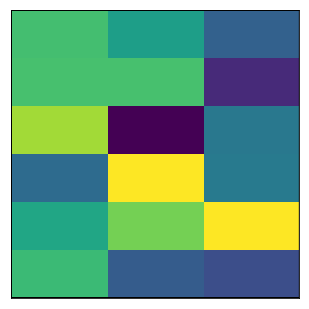

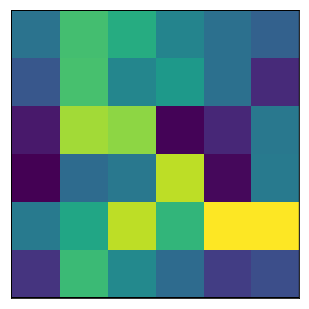

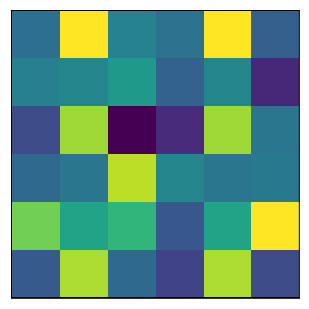

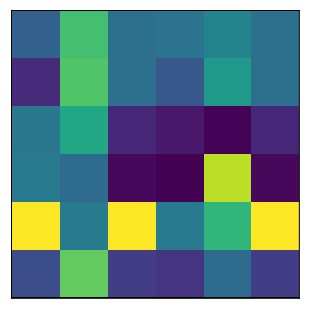

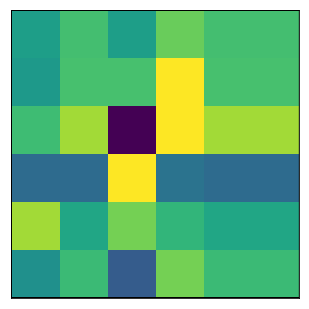

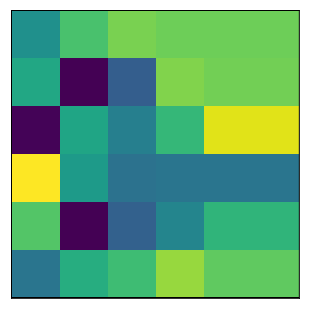

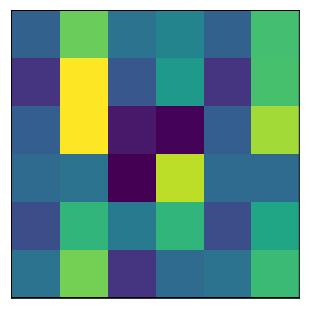

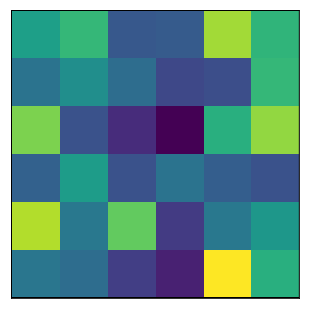

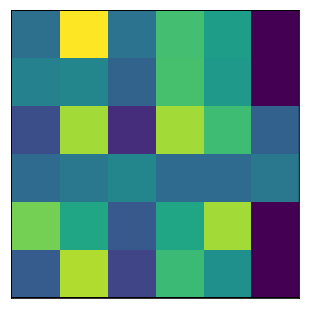

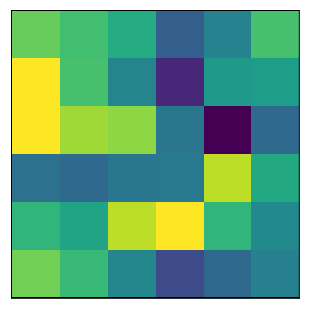

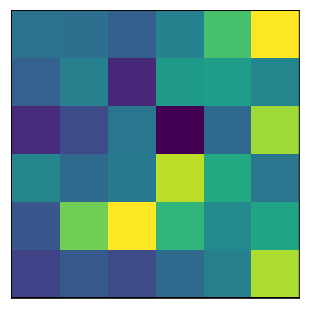

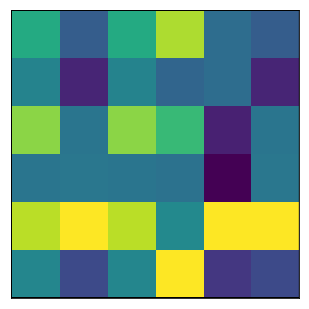

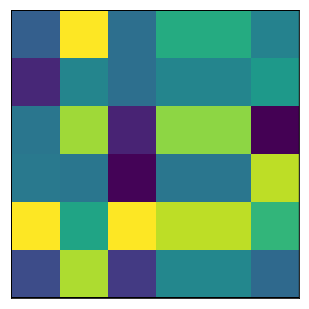

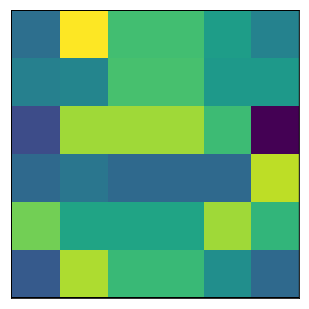

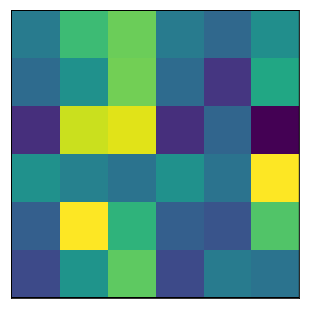

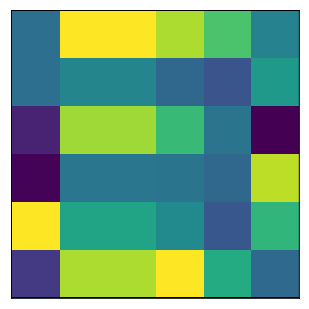

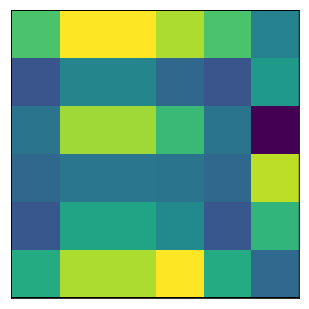

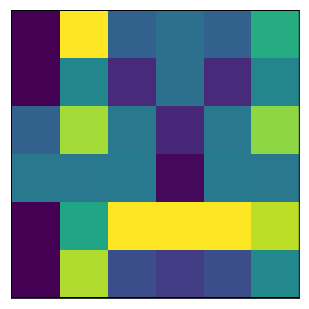

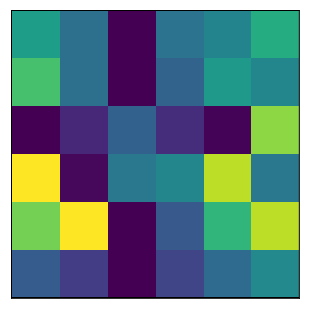

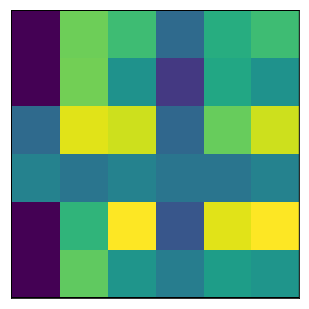

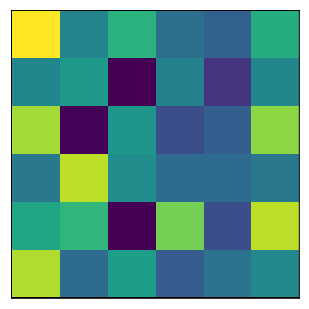

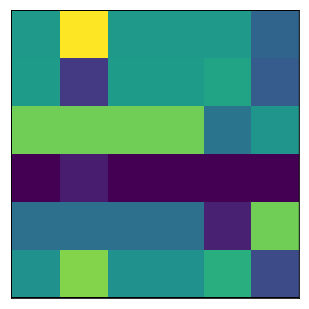

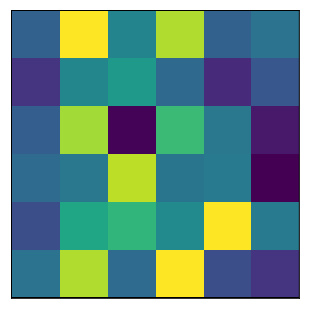

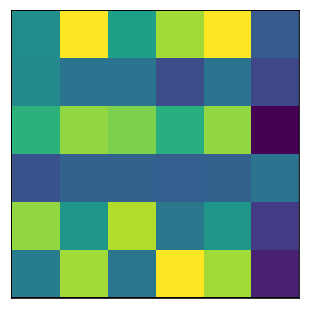

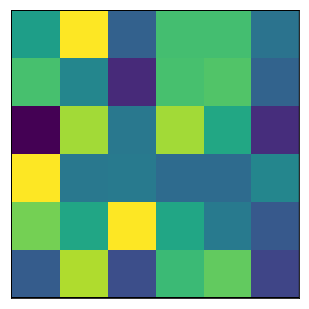

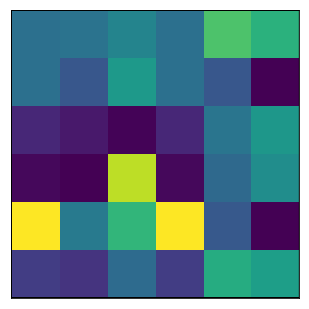

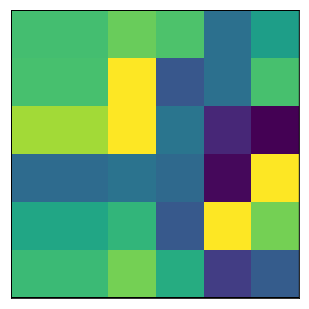

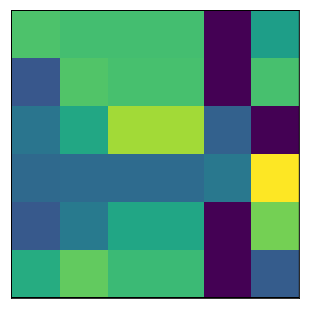

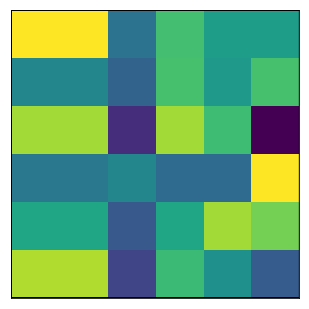

In [12]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/rotate90/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Rotate-flip/A_Zero/90_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_1.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_100.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_101.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_11.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_14.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_16.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_17.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_18.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_24.png
C:/Users/user/OneD

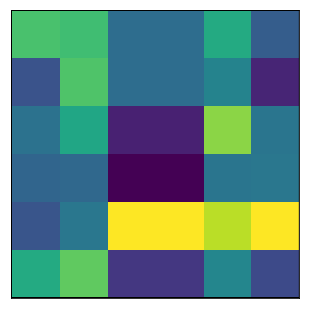

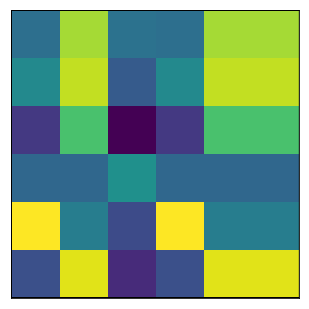

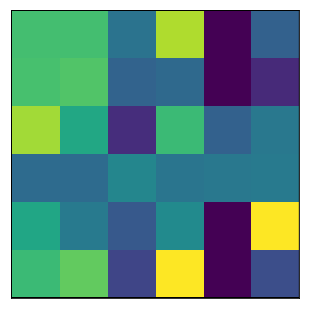

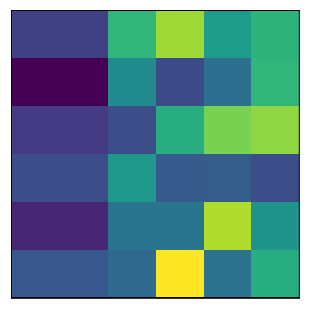

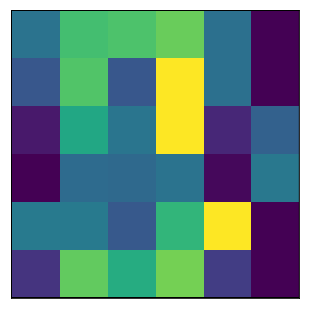

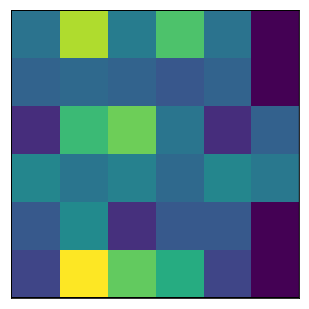

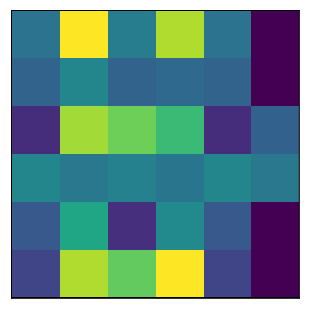

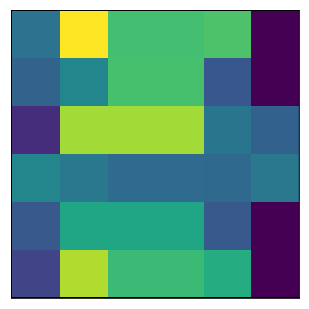

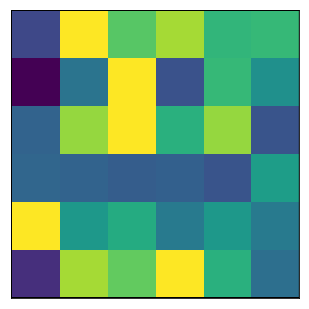

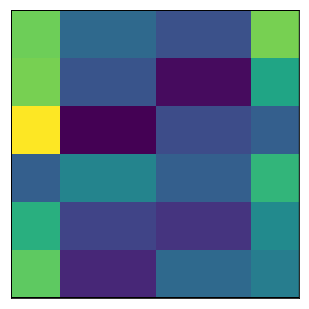

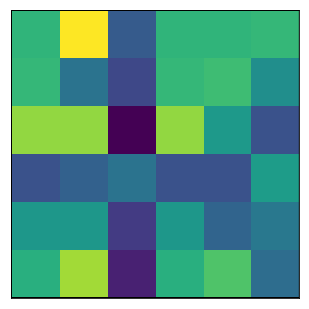

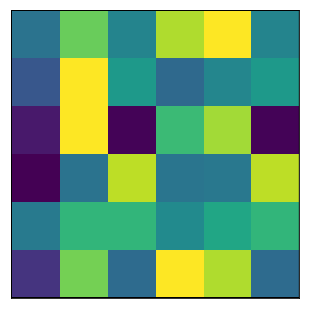

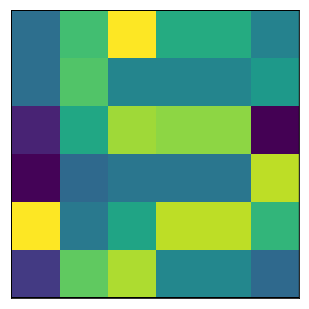

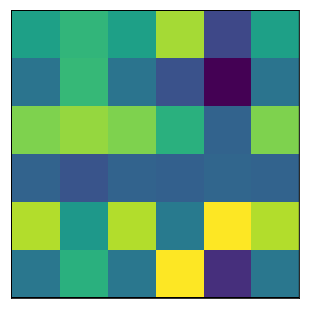

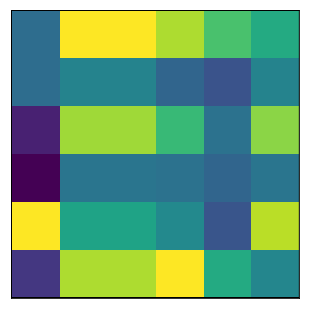

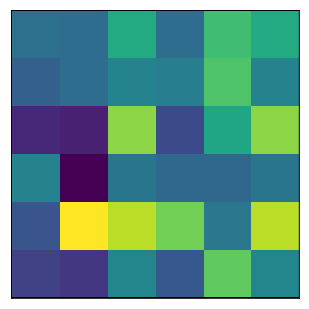

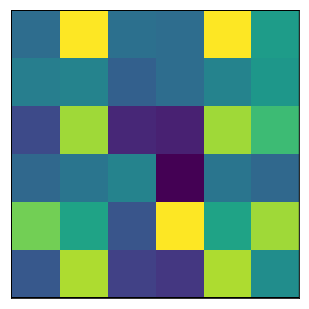

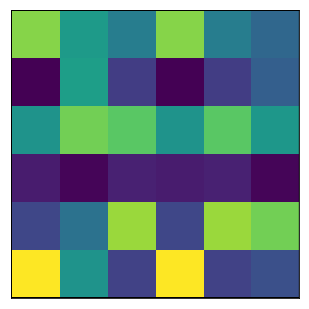

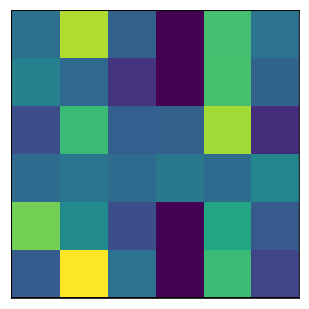

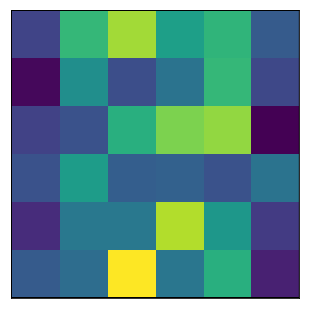

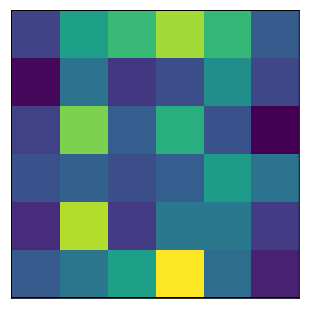

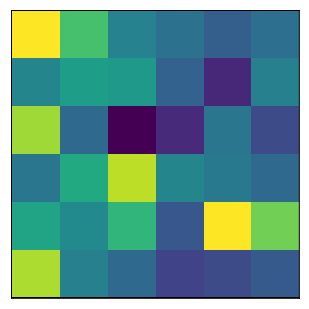

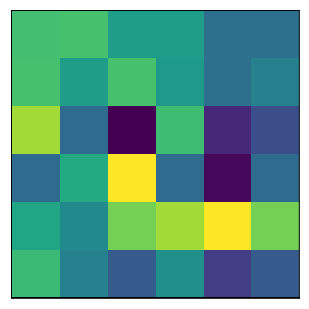

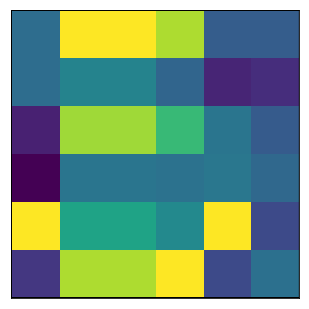

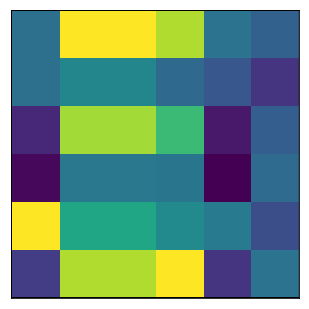

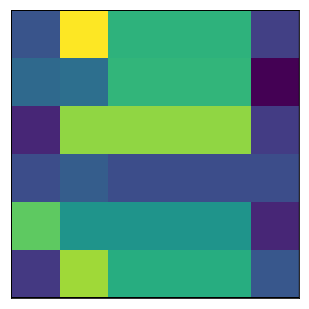

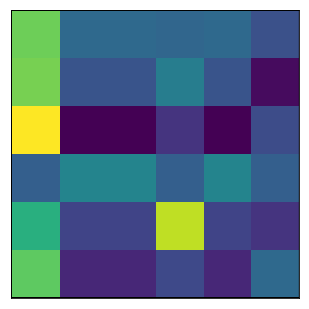

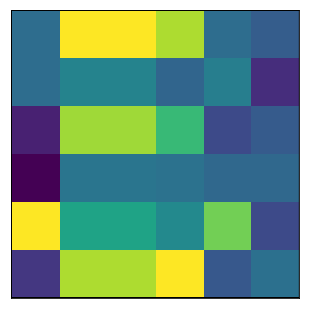

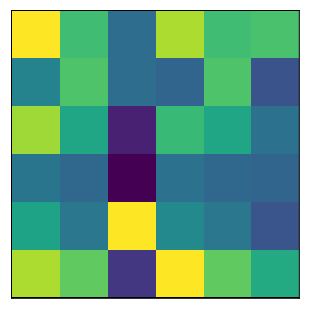

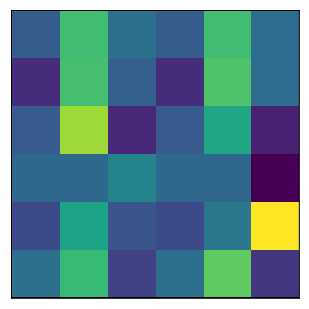

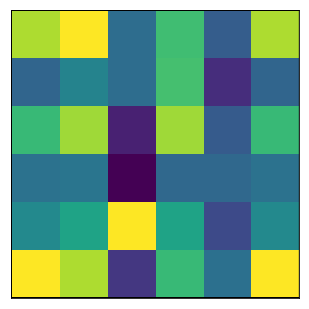

In [13]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/rotate90/One/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_CLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Rotate-flip/B_One/90_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Rotate 180 for clockwise in train/Image/Zero and train/Image/One directory

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_1.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_100.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_101.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_102.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_103.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_104.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_105.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_106.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_107.png
C:/Users/user/OneDrive/python3/aminomap

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_77.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_78.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_79.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_80.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_82.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_84.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_85.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_86.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_88.png
C:/Users/user/OneDrive/python3/aminomap/Amyloi

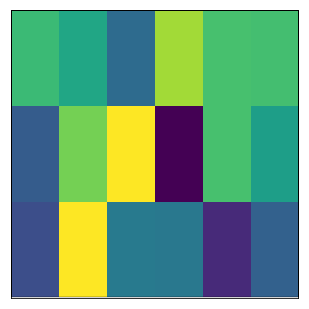

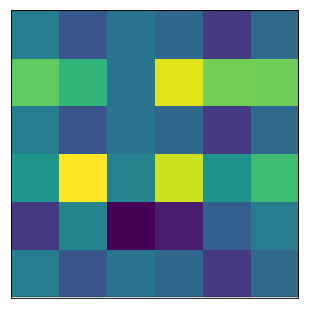

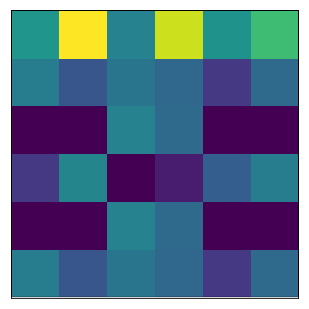

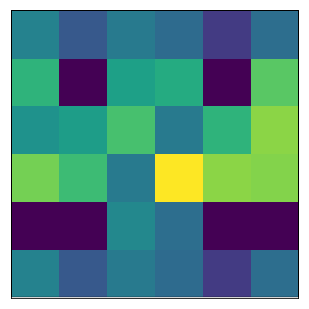

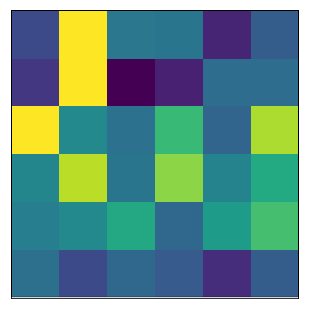

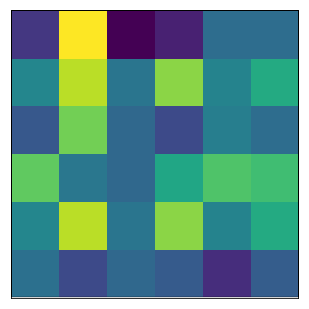

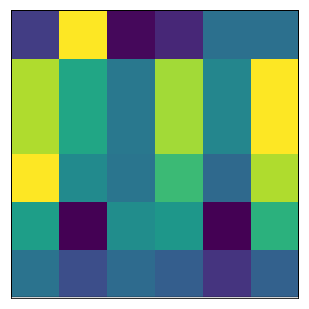

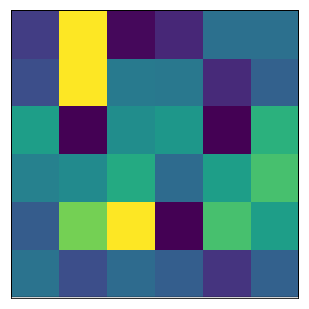

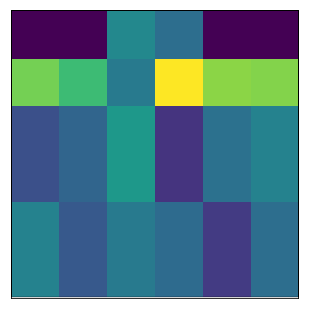

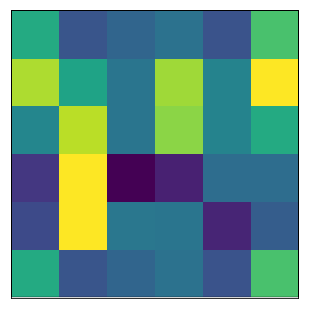

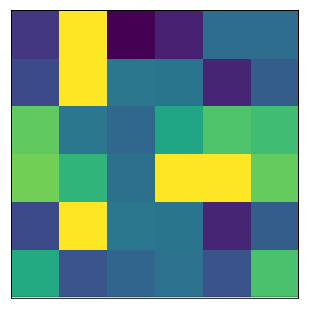

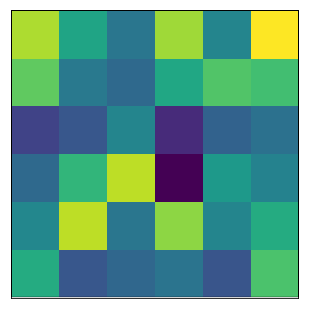

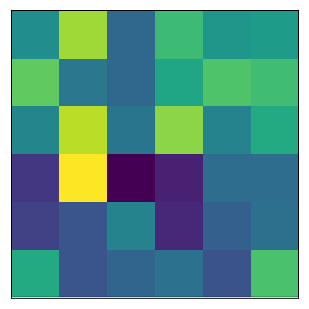

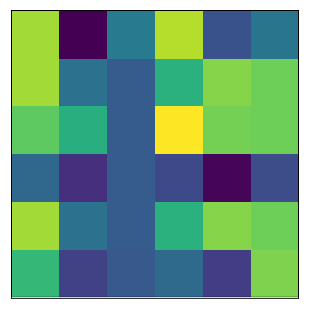

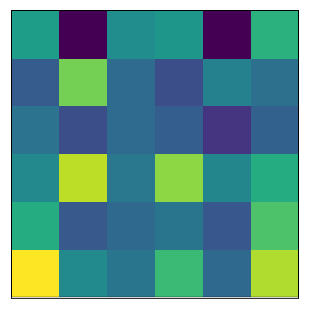

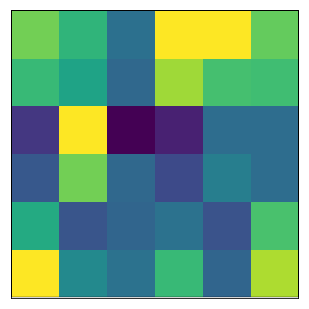

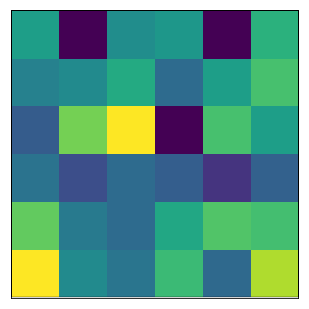

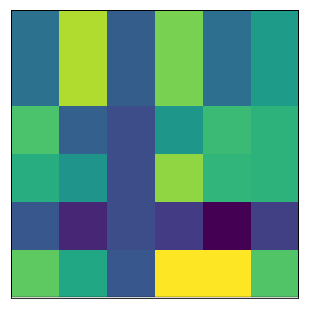

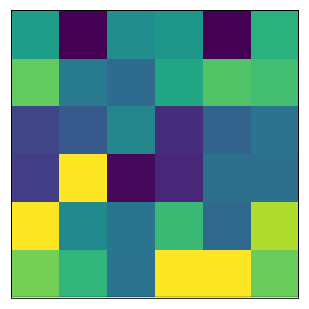

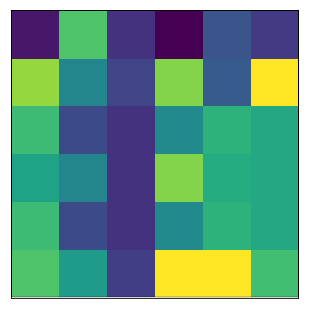

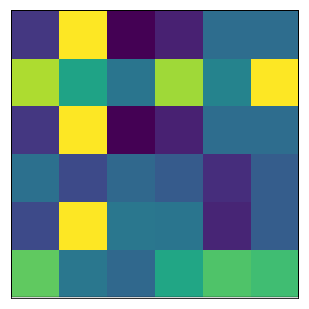

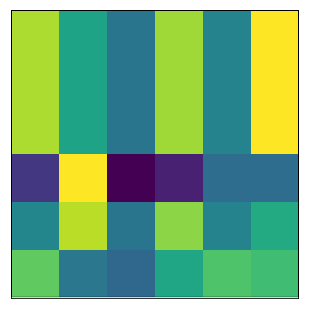

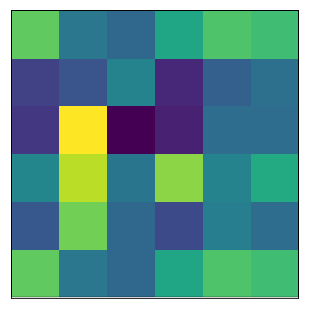

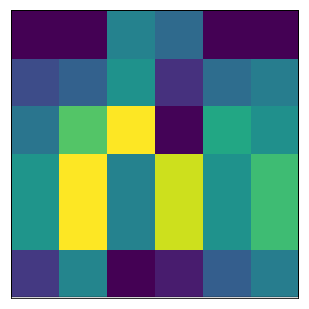

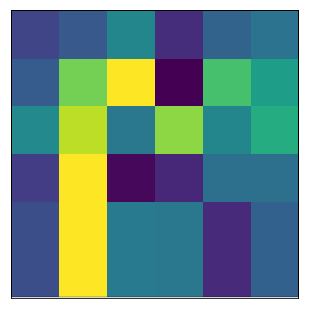

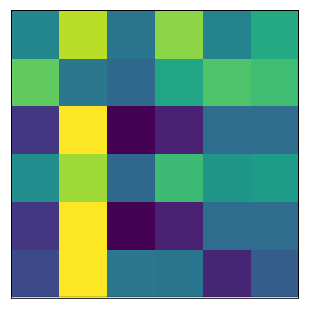

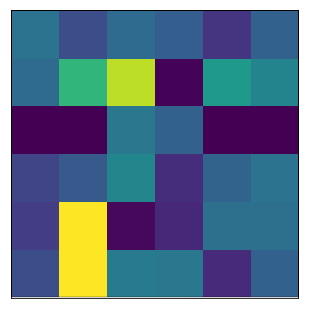

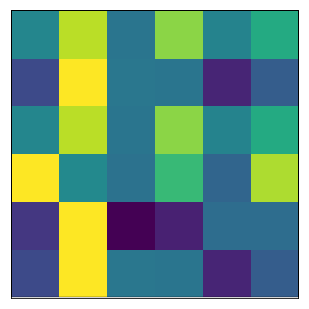

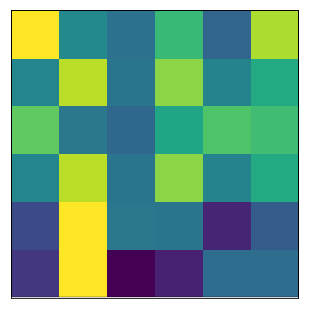

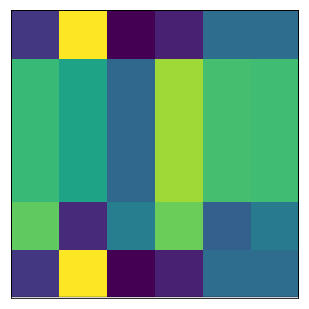

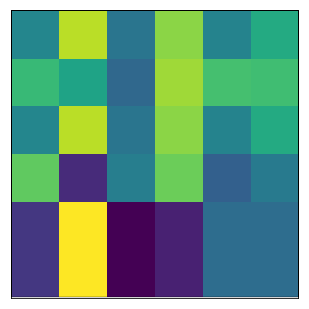

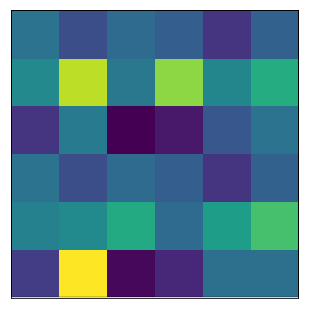

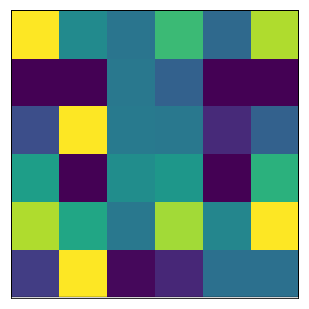

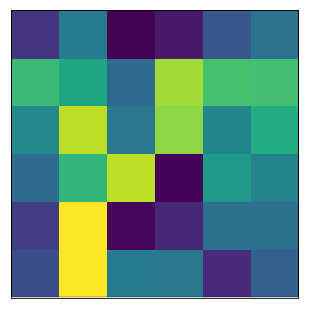

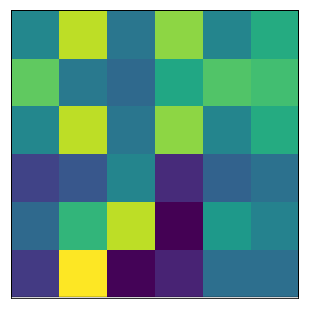

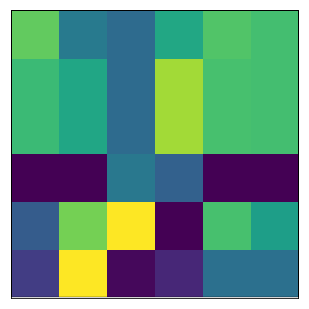

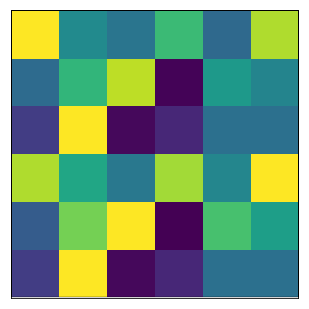

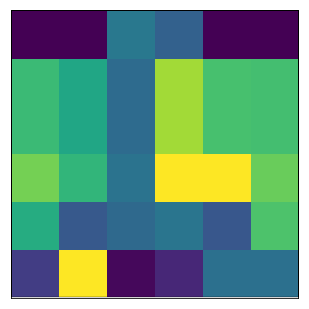

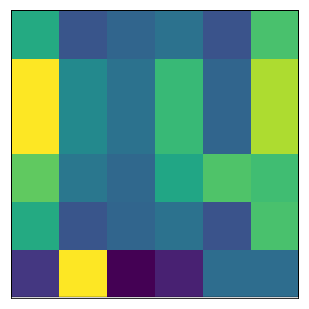

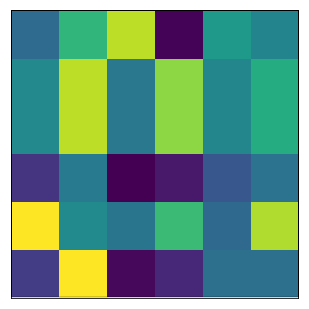

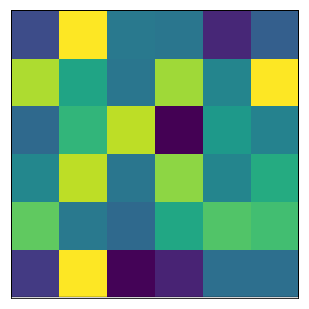

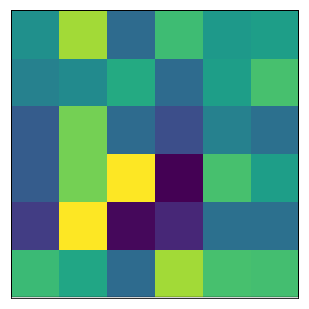

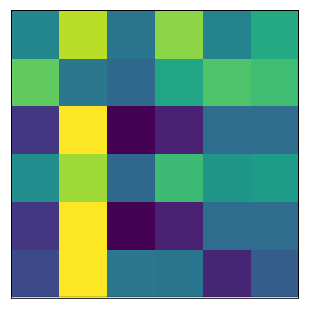

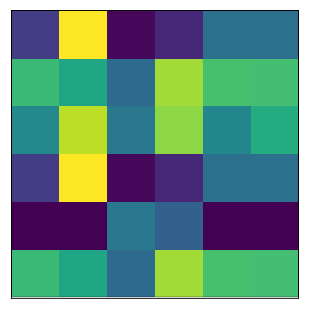

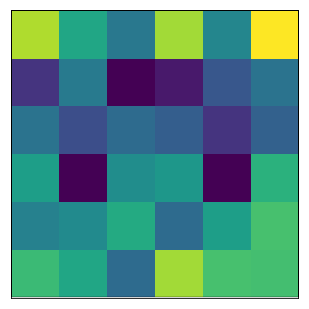

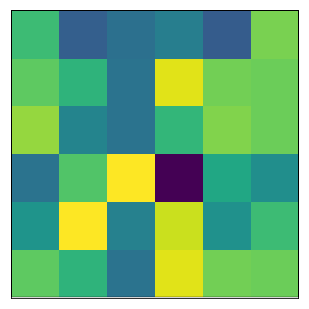

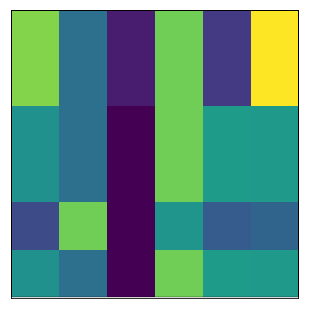

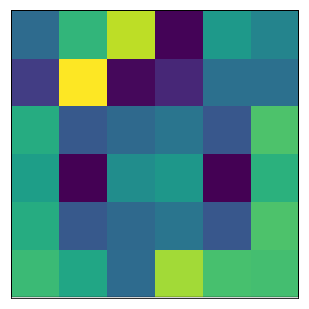

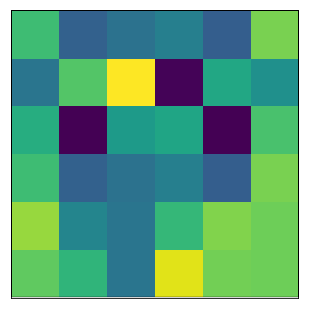

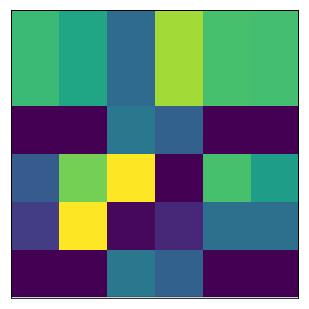

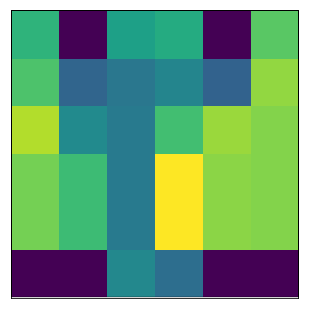

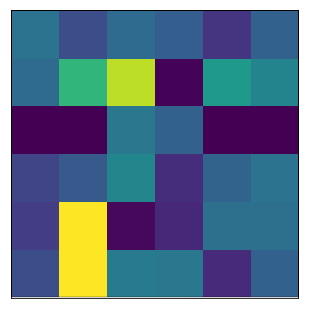

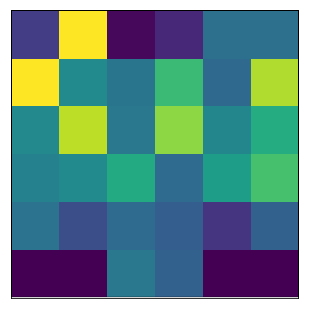

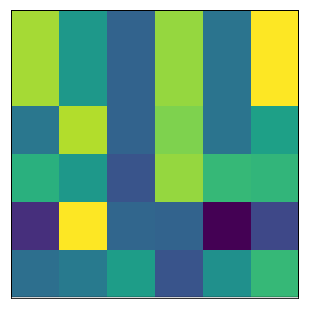

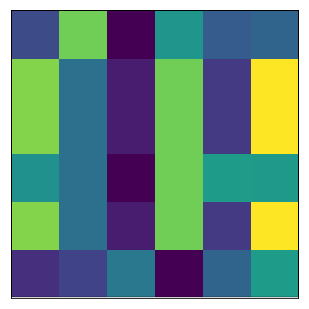

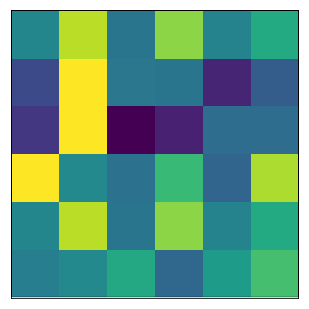

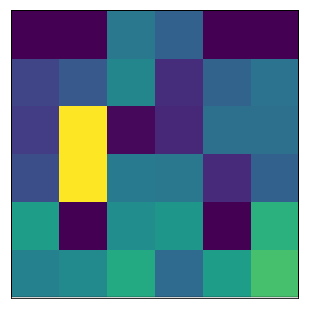

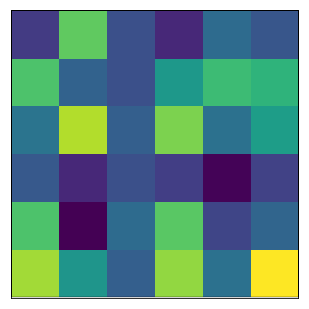

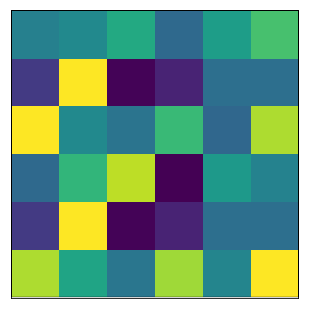

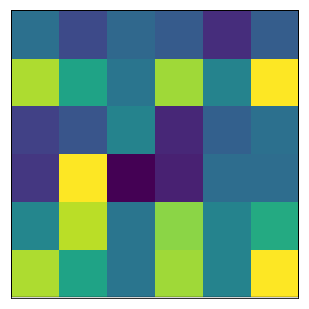

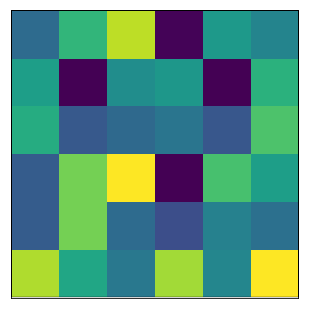

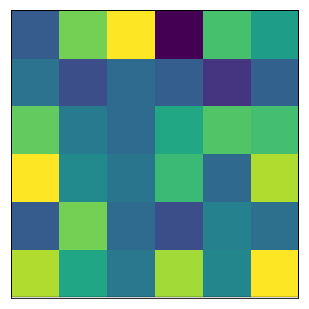

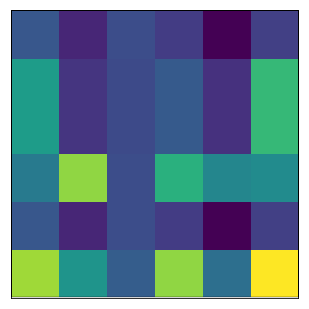

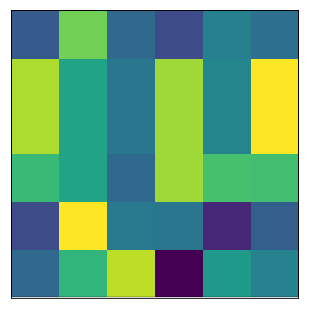

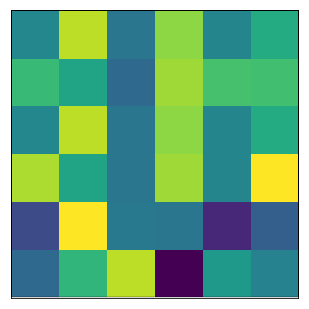

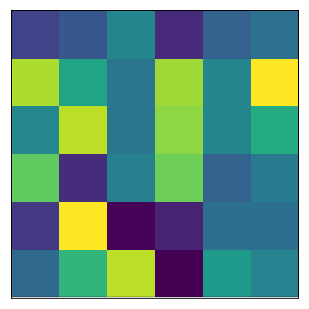

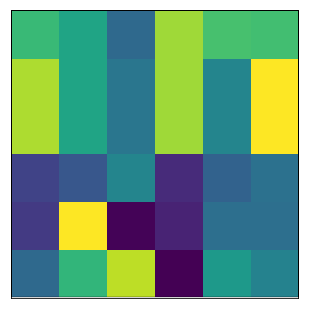

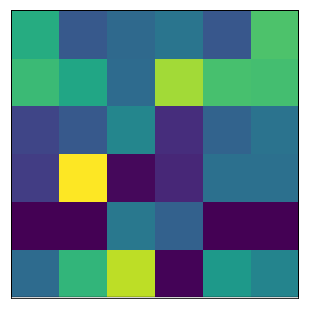

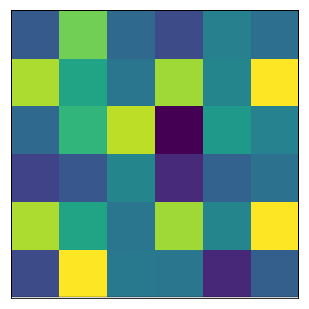

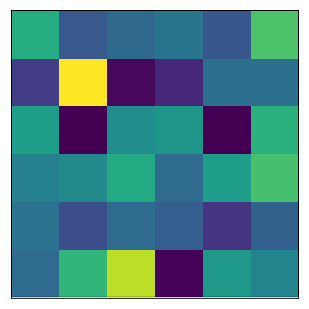

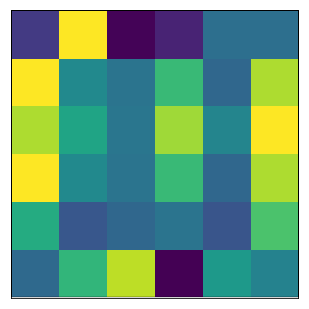

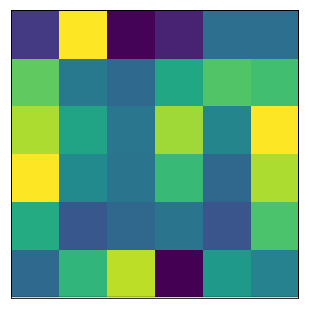

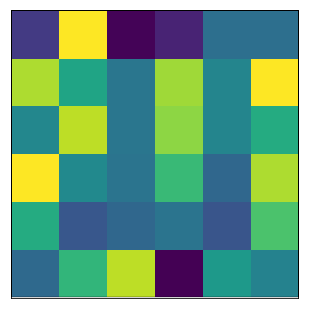

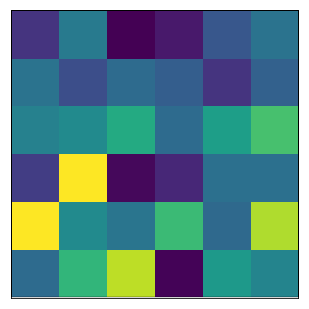

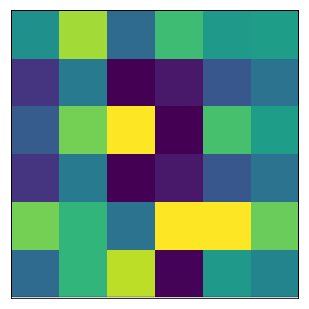

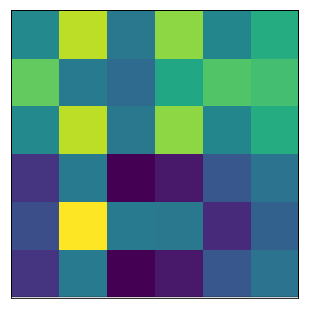

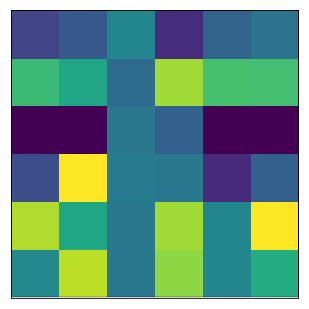

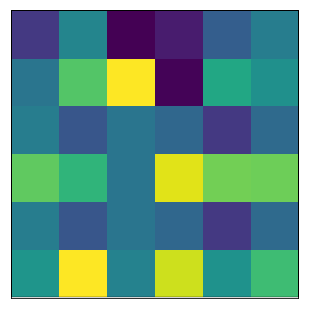

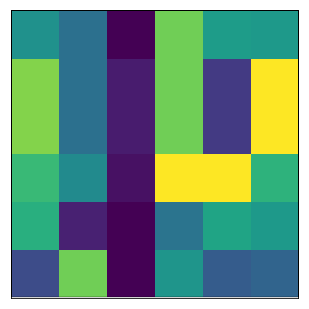

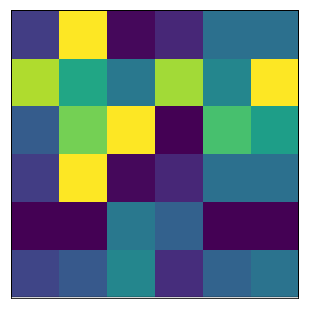

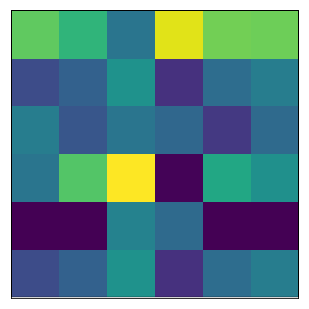

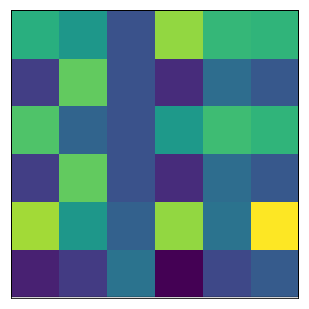

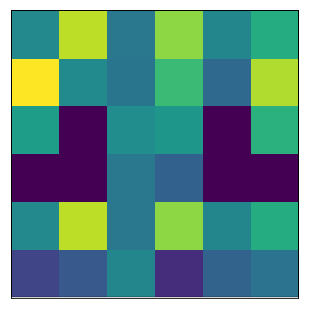

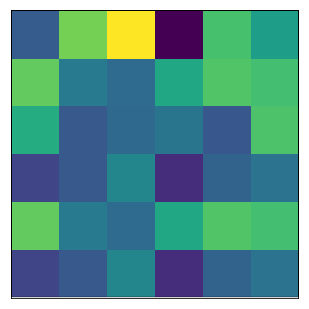

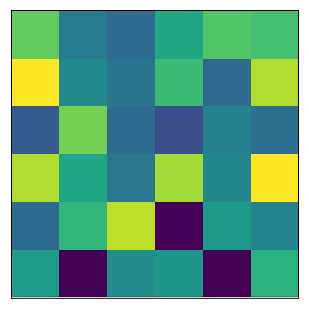

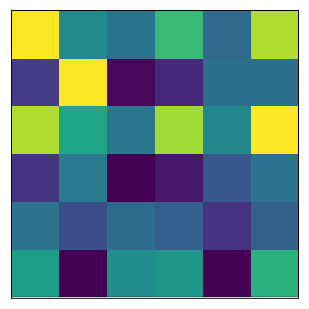

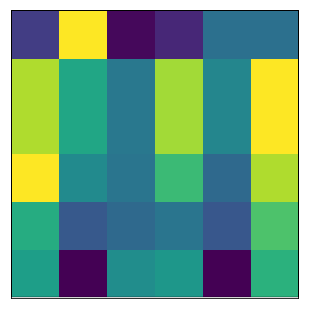

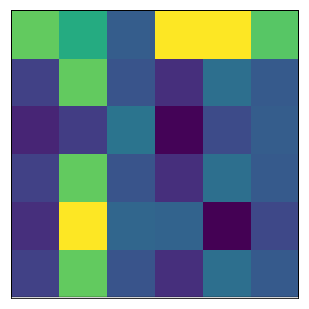

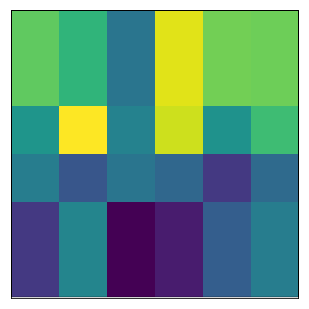

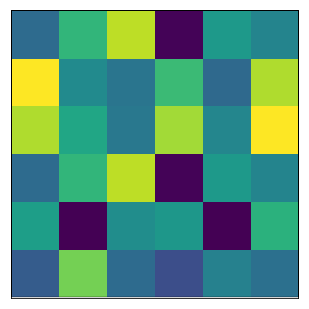

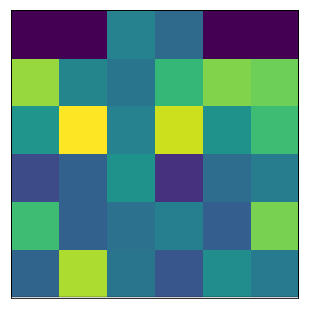

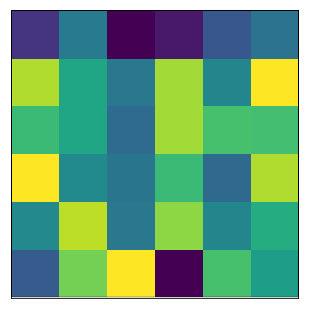

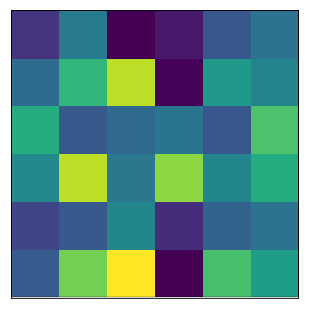

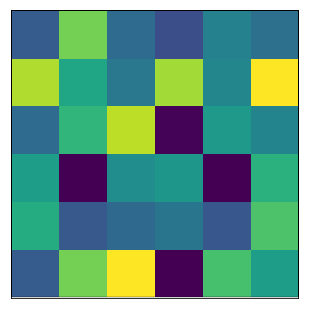

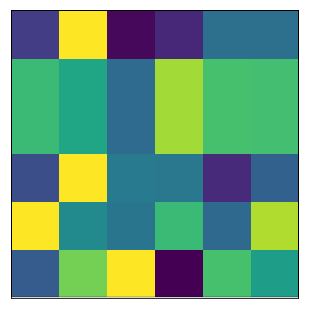

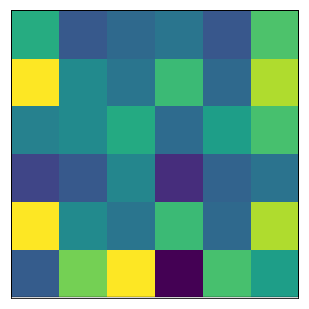

In [14]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate180/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_180)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/A_Zero/180_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_0.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_10.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_12.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_13.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_15.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_19.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_2.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_20.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_21.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Data

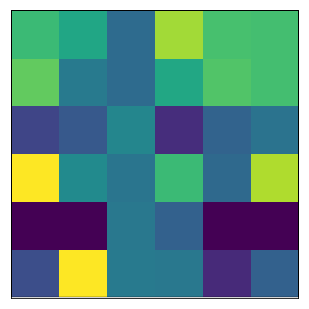

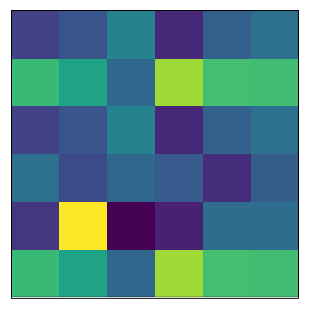

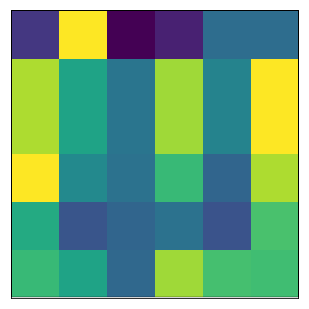

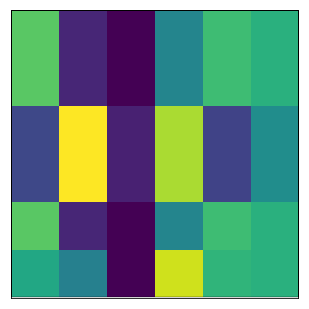

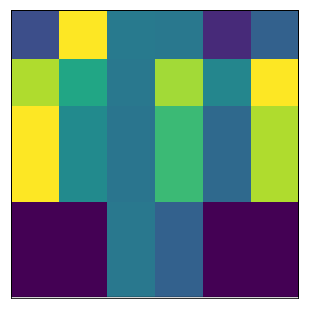

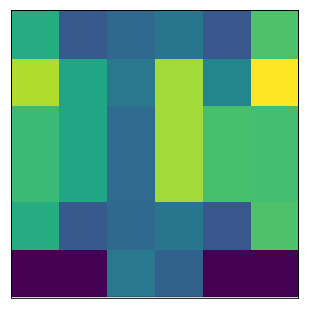

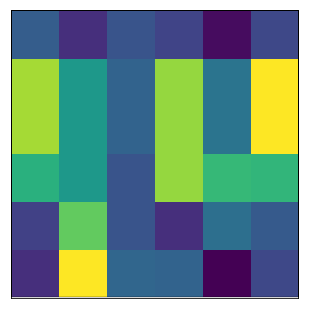

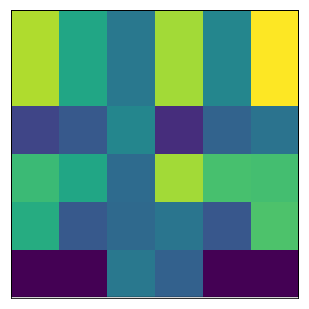

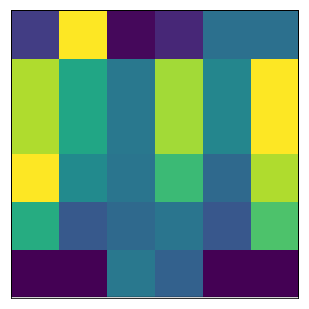

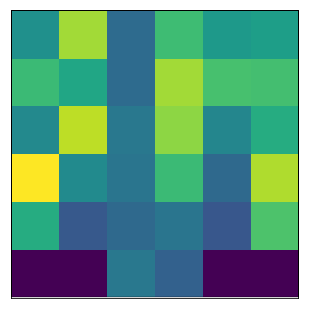

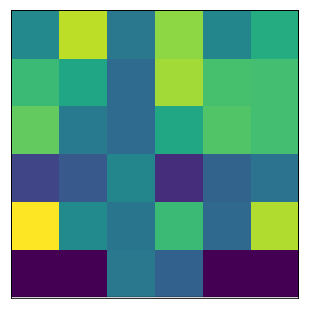

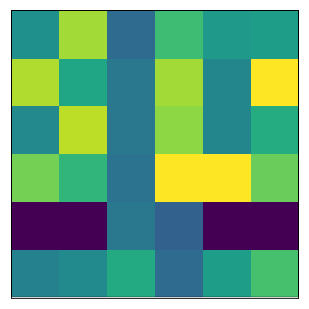

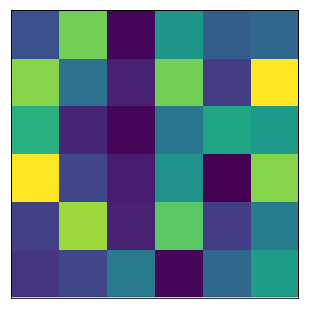

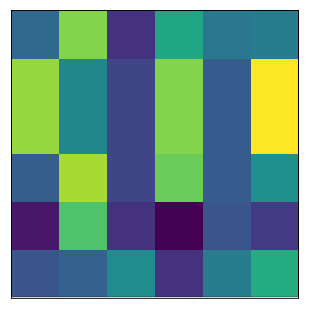

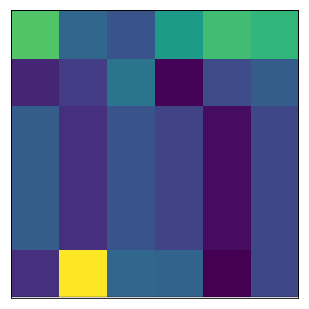

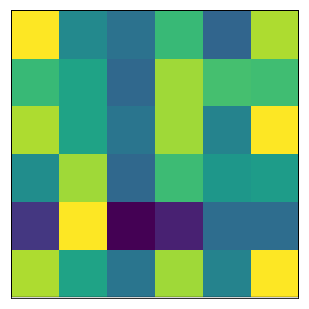

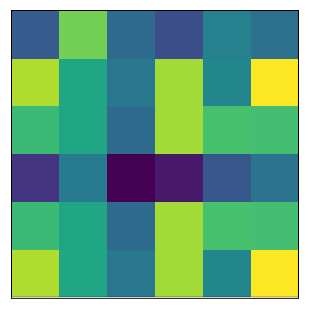

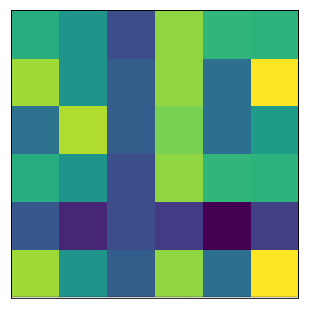

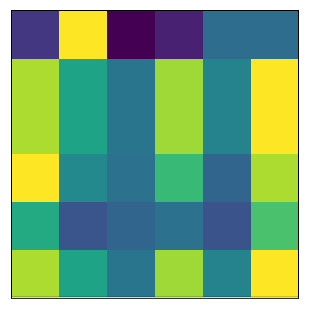

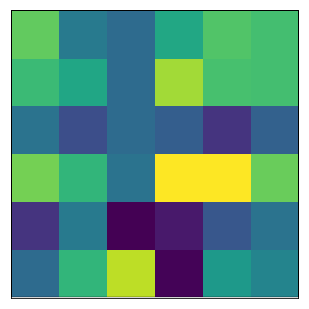

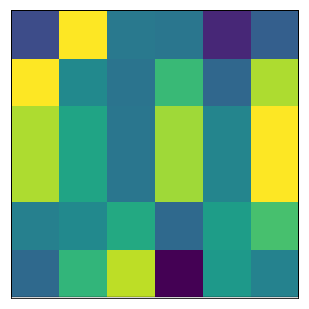

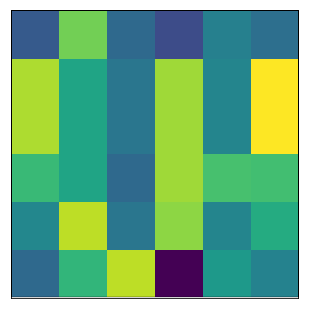

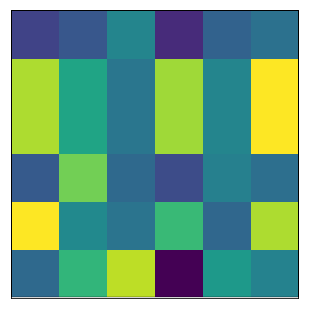

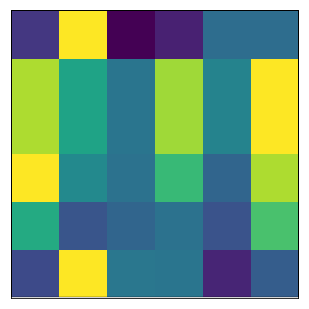

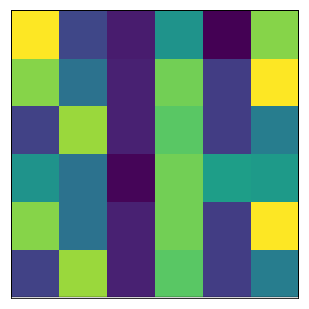

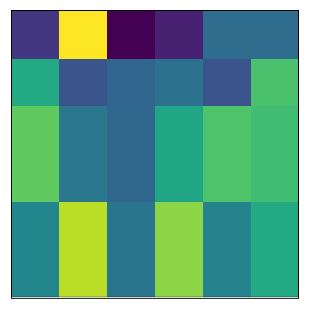

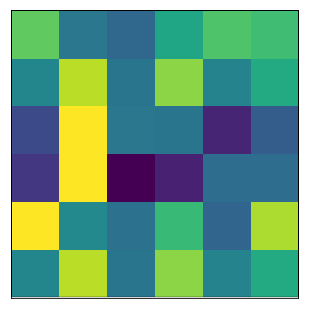

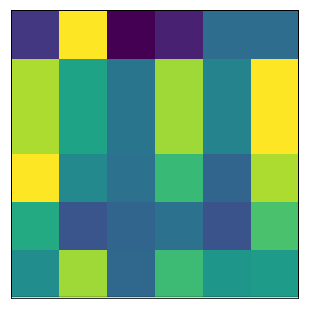

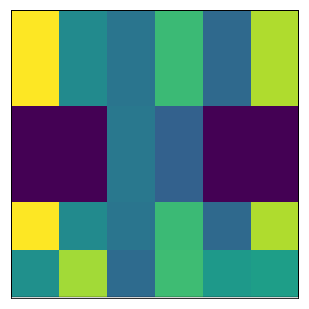

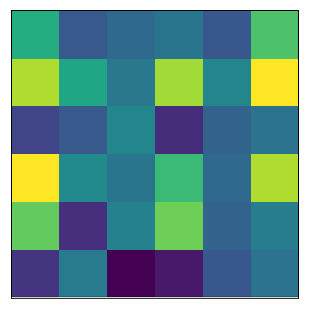

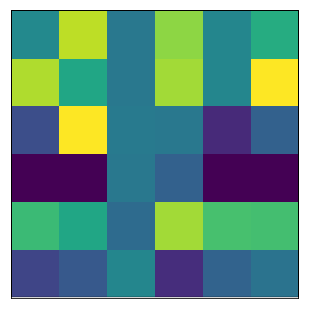

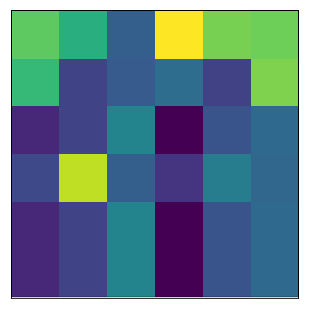

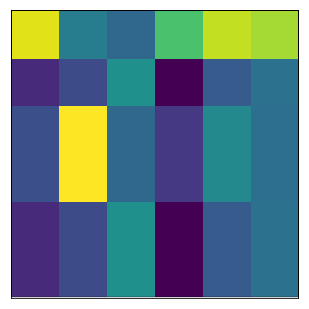

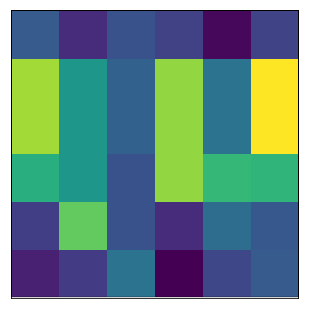

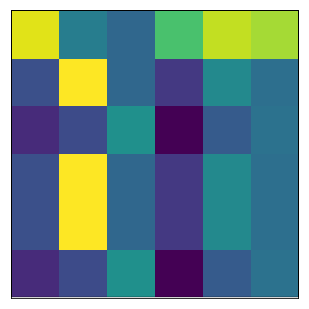

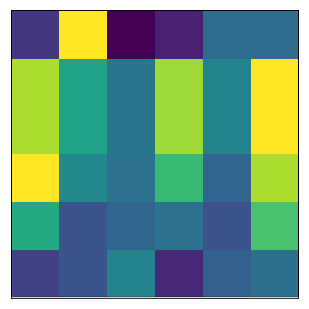

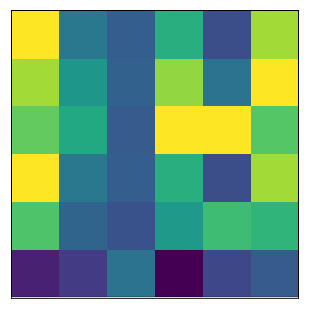

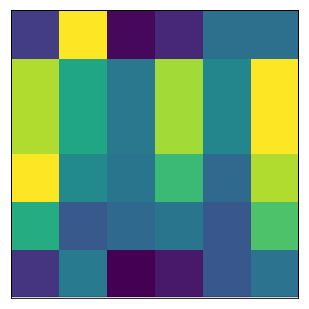

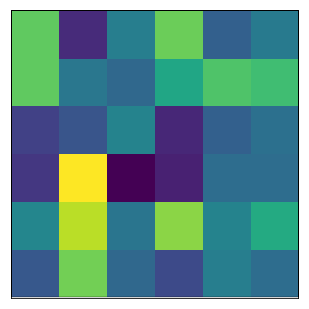

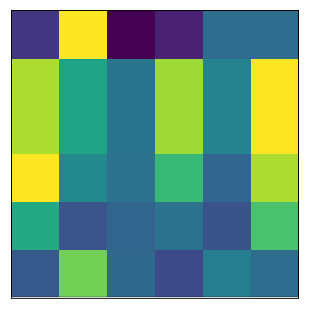

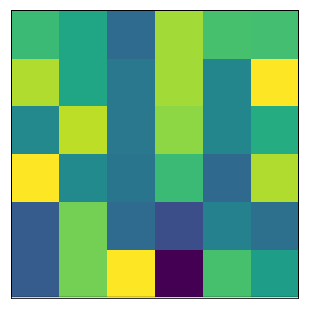

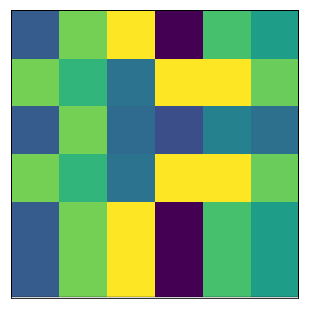

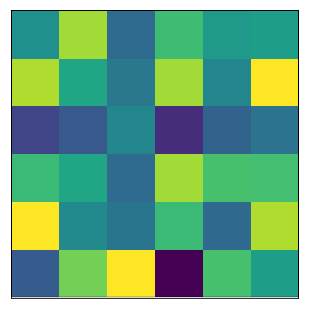

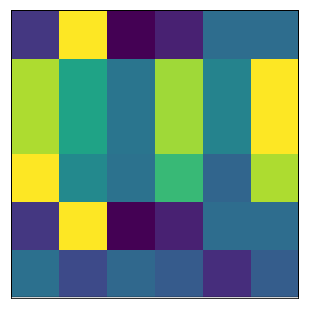

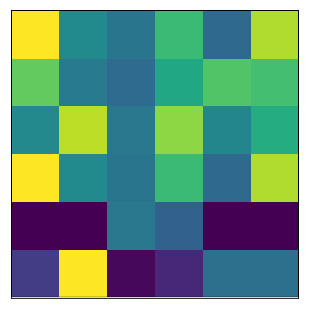

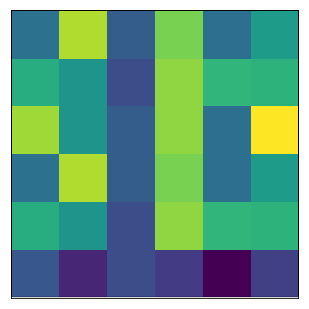

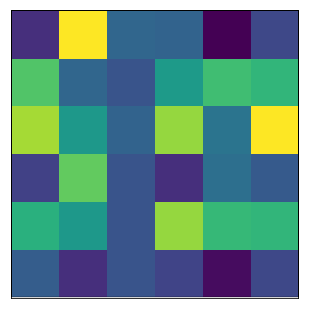

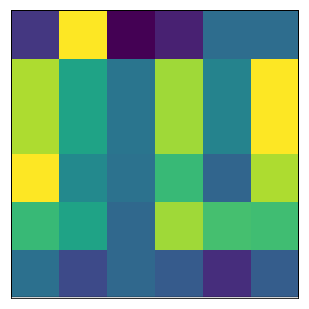

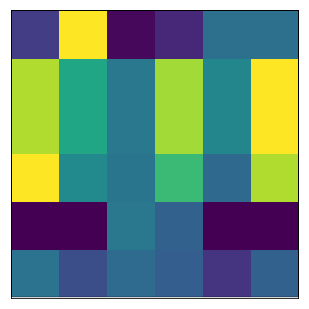

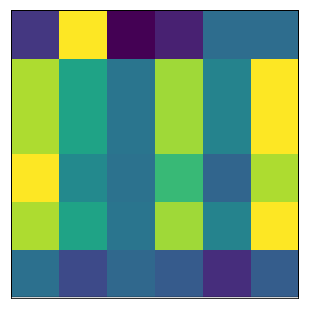

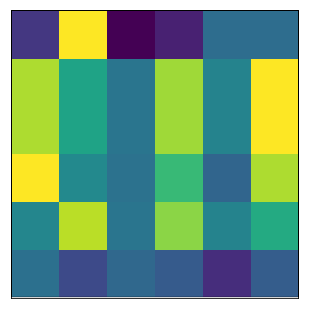

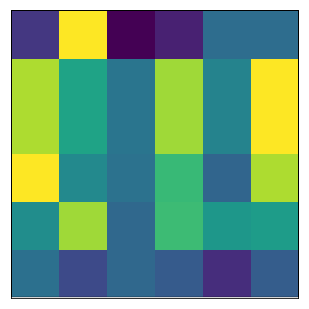

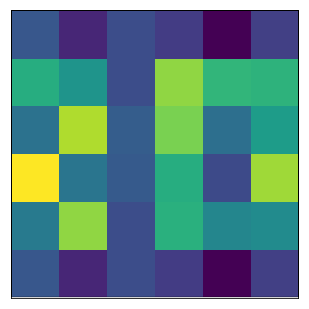

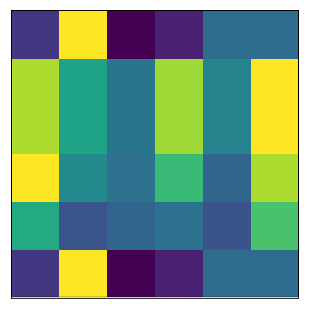

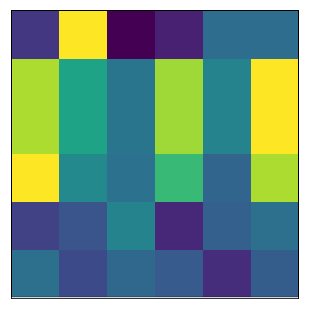

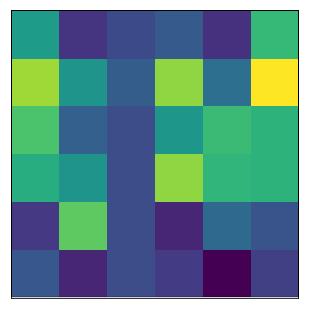

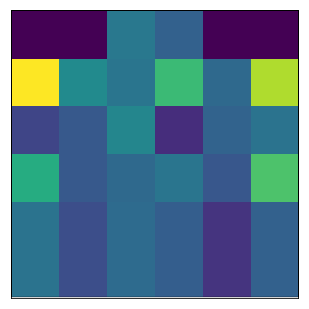

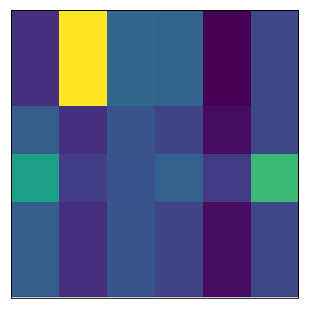

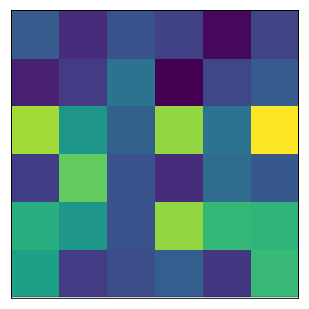

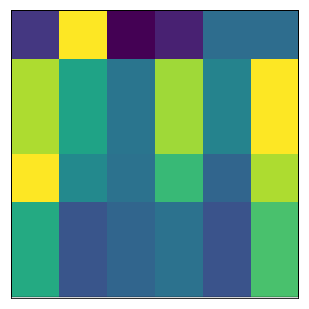

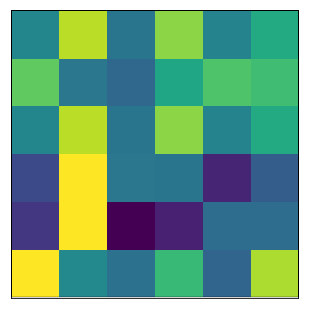

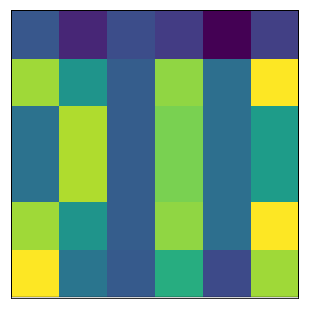

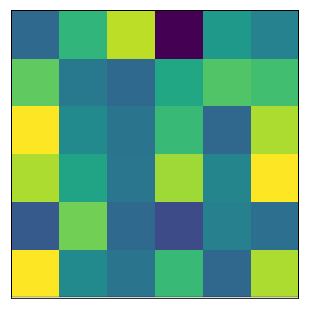

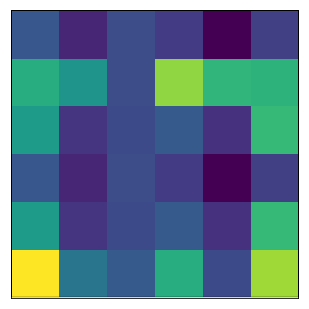

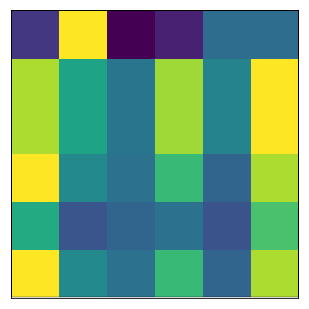

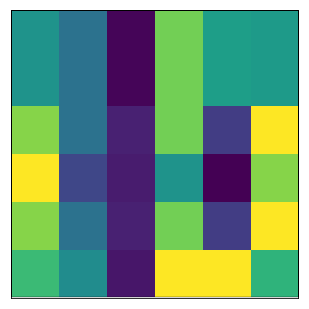

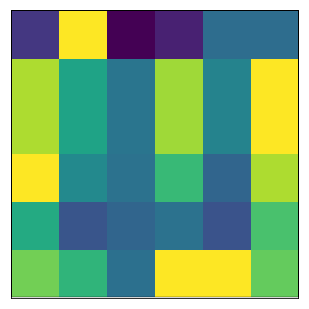

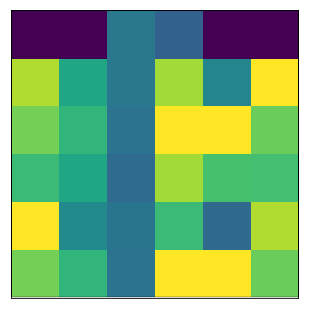

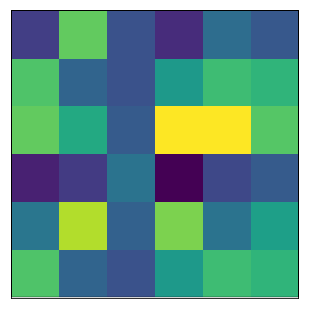

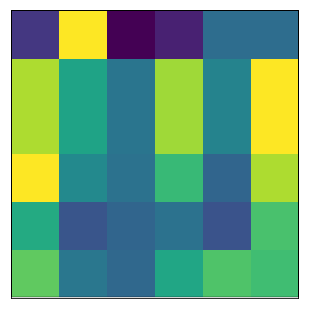

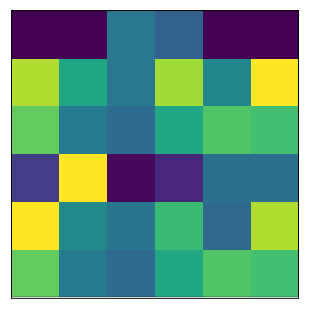

In [15]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate180/One/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_180)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/B_One/180_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_0.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_10.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_11.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_110.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_111.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_114.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_116.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_117.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_12.p

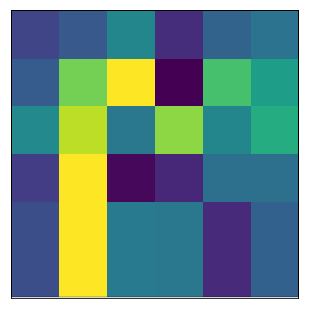

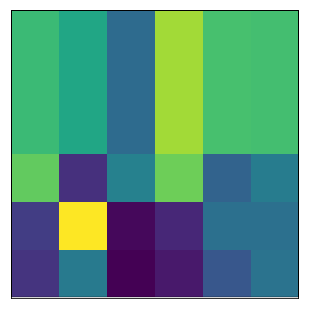

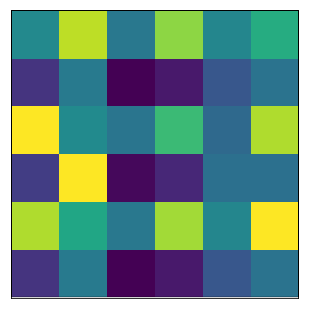

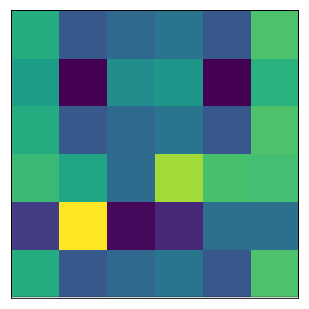

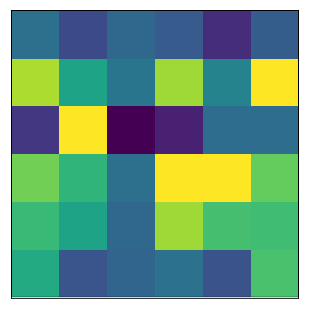

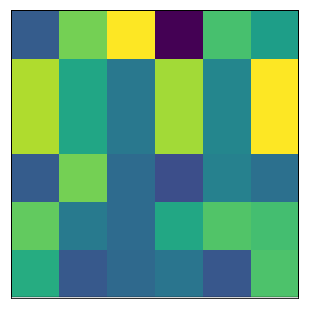

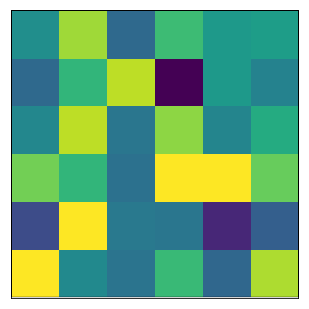

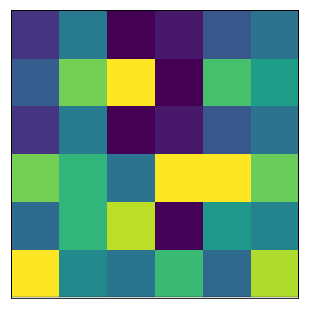

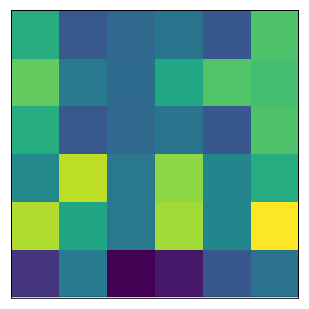

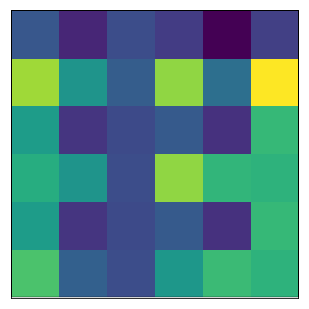

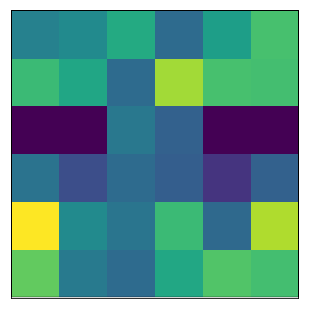

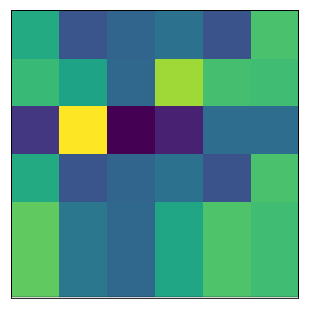

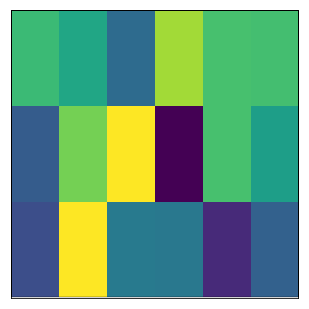

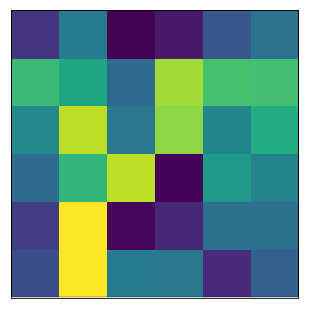

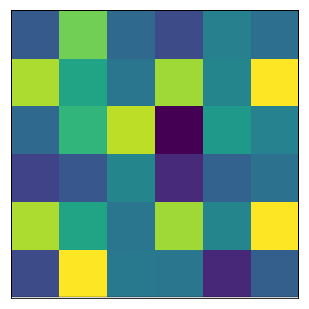

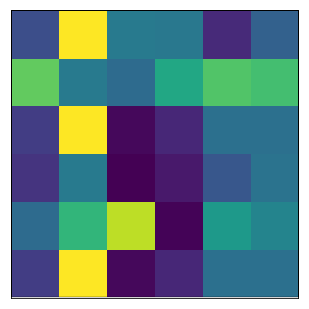

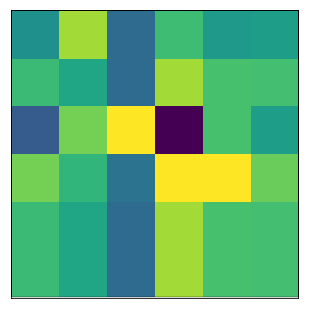

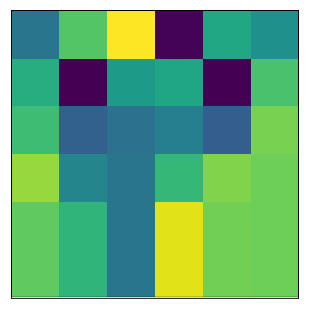

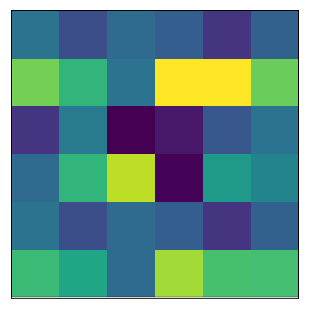

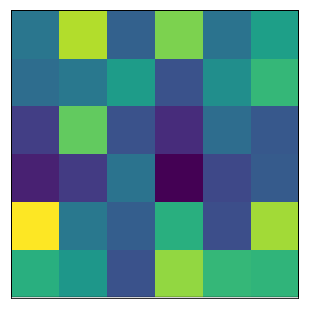

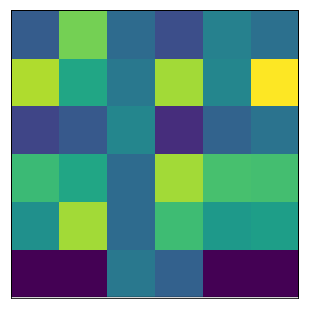

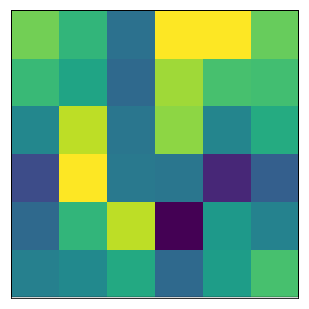

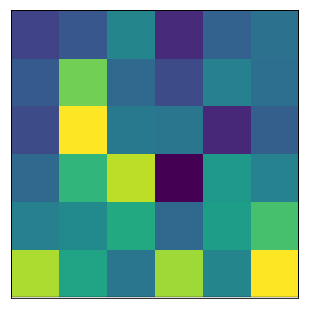

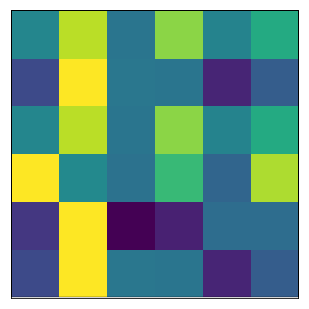

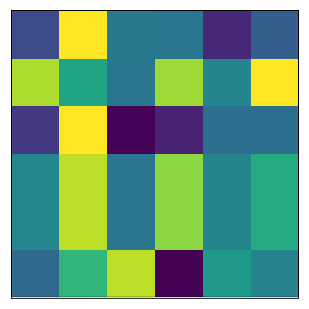

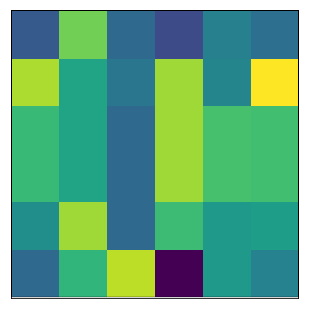

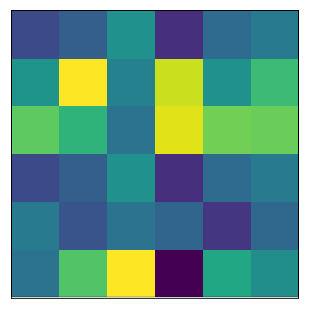

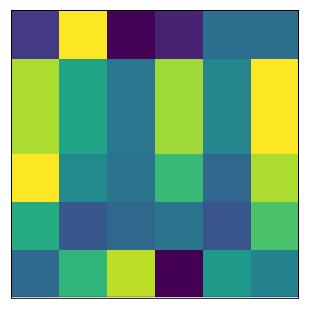

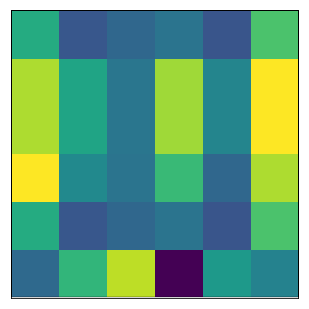

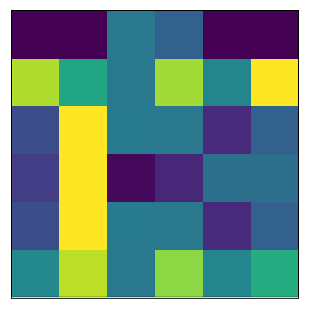

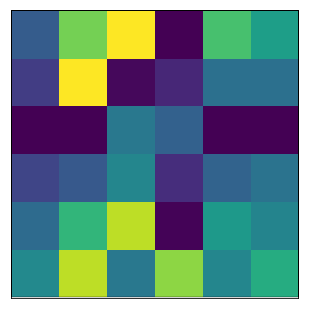

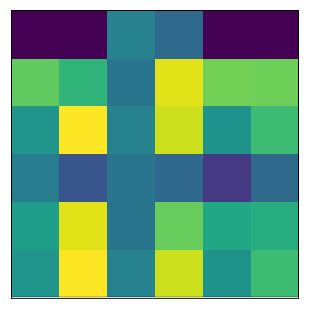

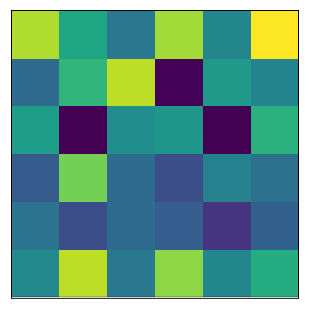

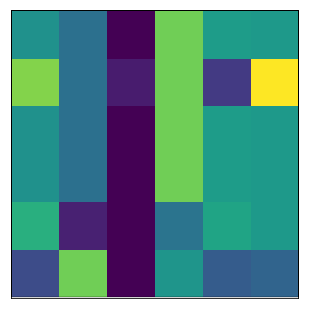

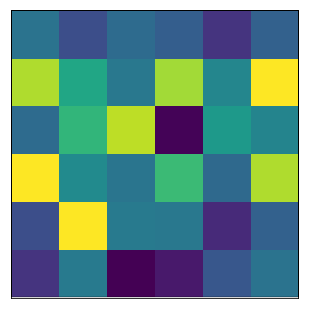

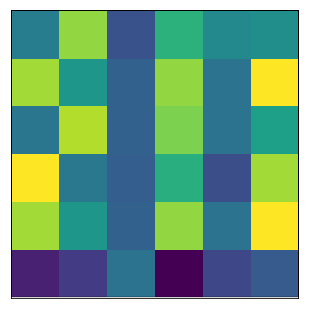

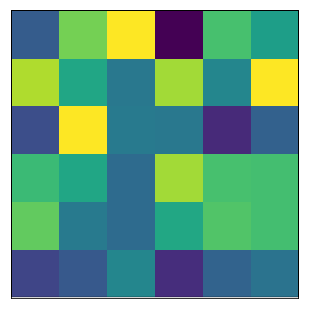

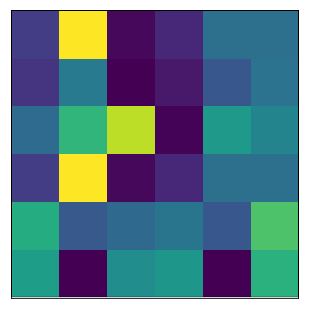

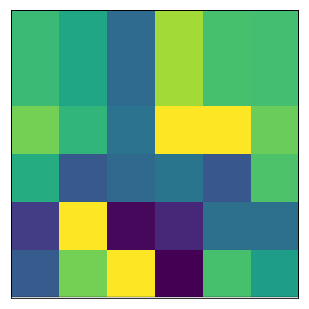

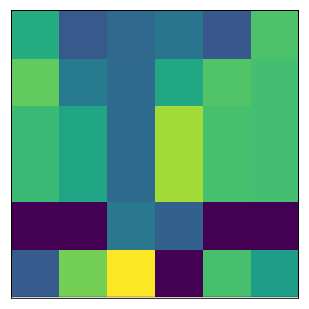

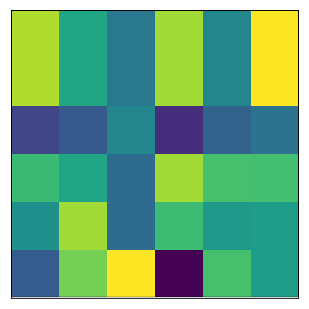

In [16]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/rotate180/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_180)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Rotate-flip/A_Zero/180_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_1.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_100.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_101.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_11.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_14.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_16.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_17.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_18.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_24.png
C:/Users/user/OneD

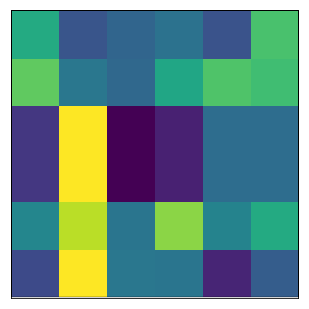

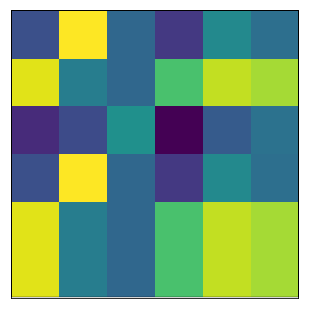

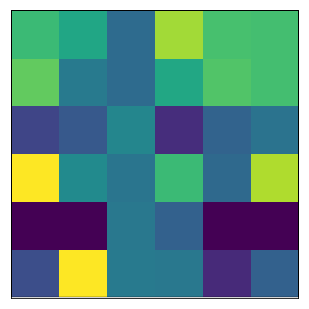

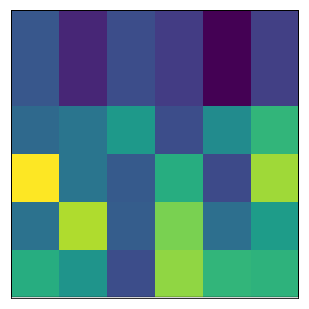

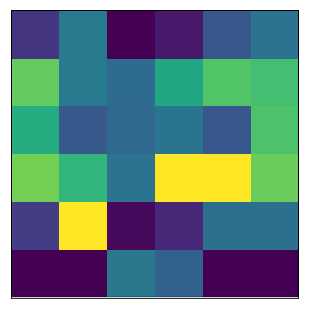

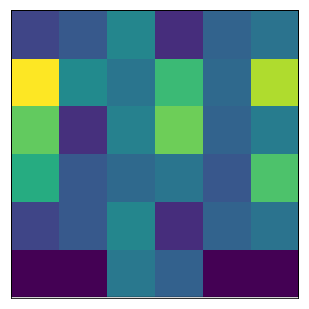

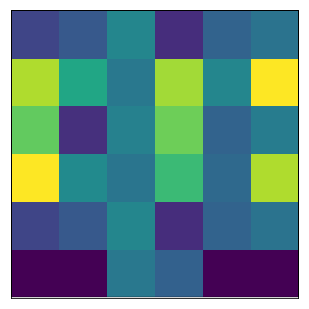

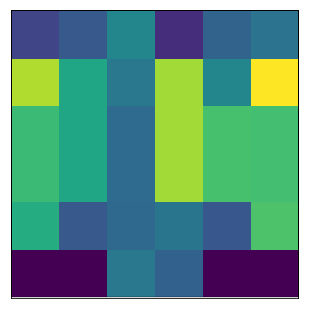

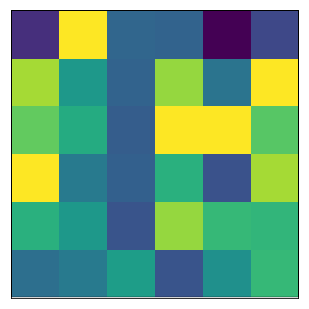

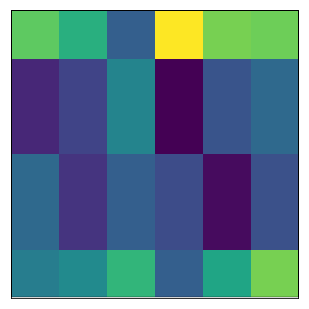

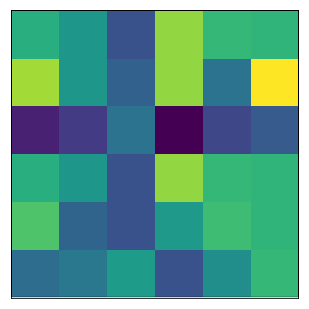

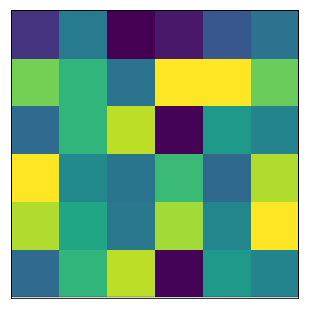

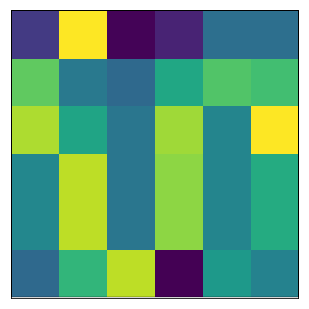

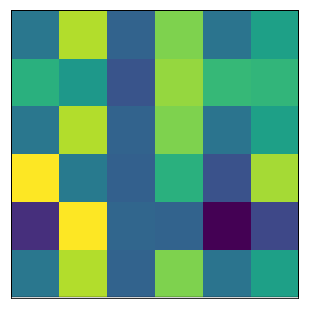

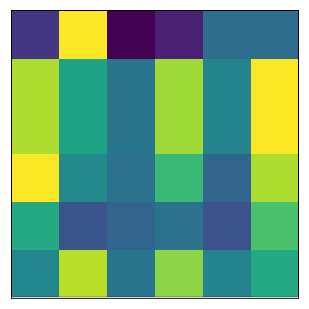

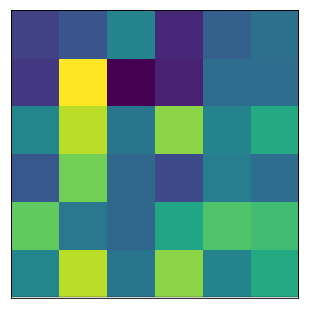

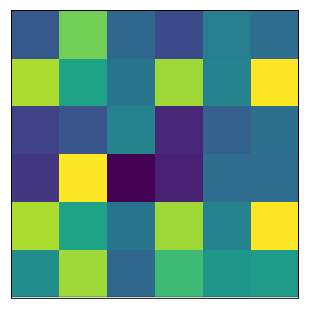

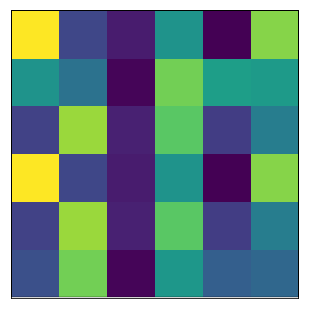

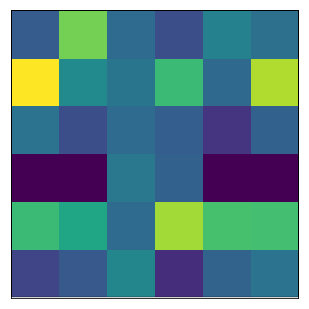

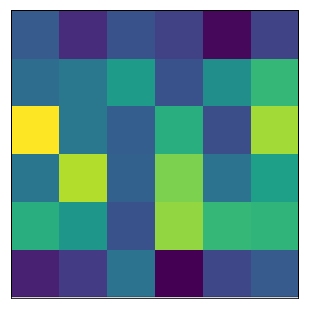

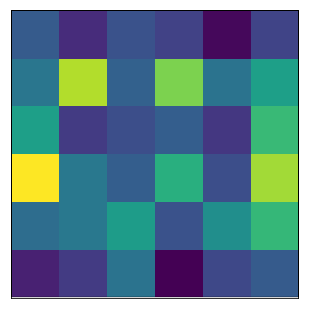

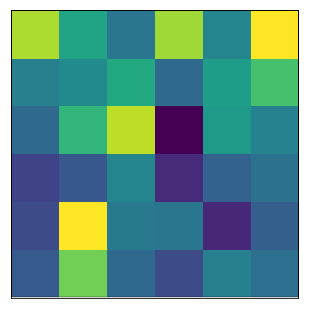

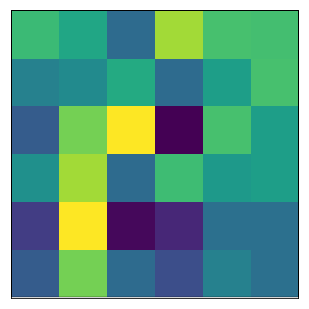

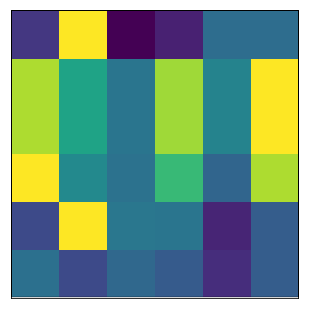

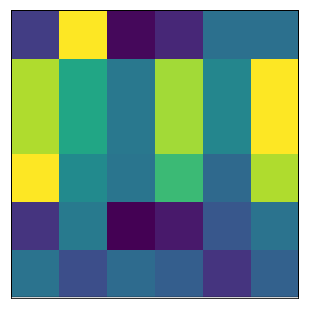

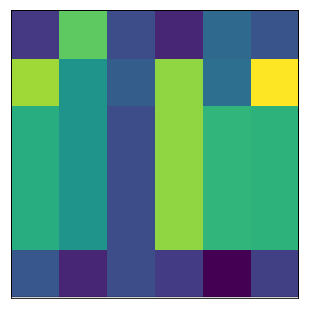

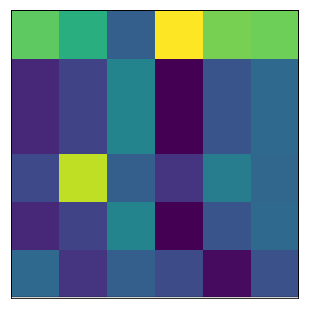

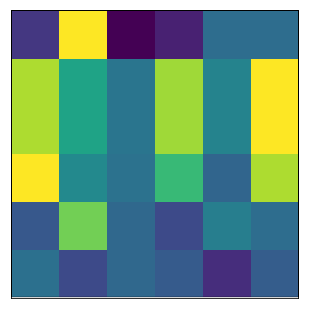

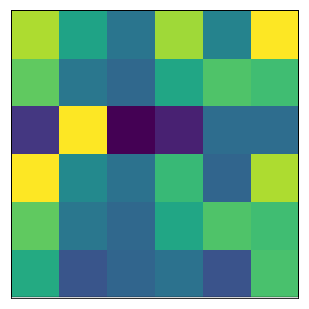

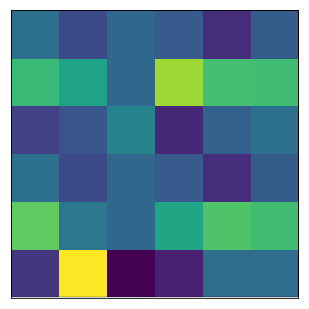

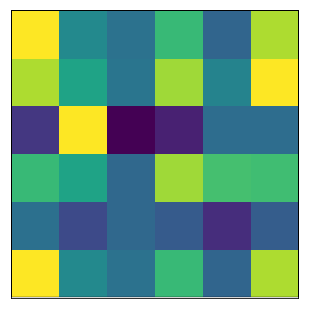

In [17]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/rotate180/One/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_180)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Rotate-flip/B_One/180_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Rotate 270 for clockwise in train/Image/Zero and train/Image/One directory

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_1.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_100.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_101.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_102.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_103.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_104.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_105.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_106.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_107.png
C:/Users/user/OneDrive/python3/aminomap

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_77.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_78.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_79.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_80.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_82.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_84.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_85.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_86.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_88.png
C:/Users/user/OneDrive/python3/aminomap/Amyloi

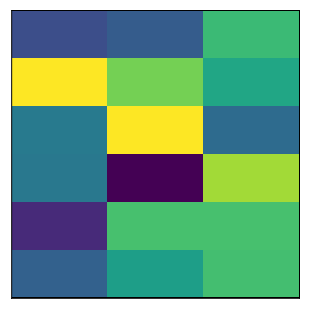

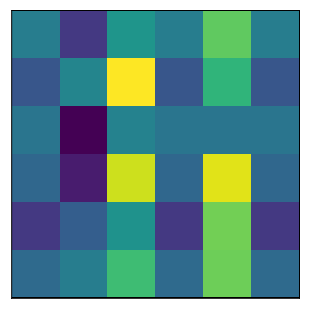

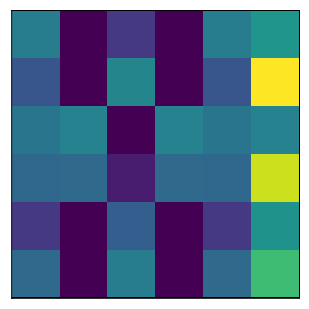

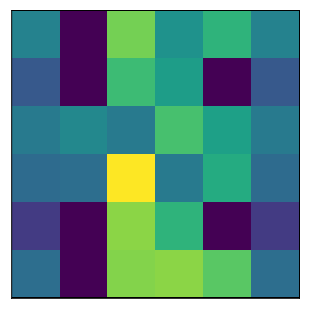

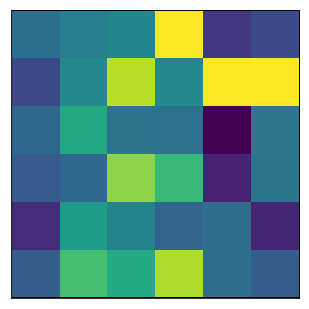

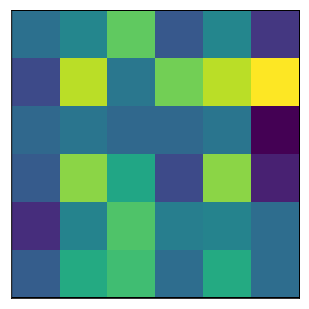

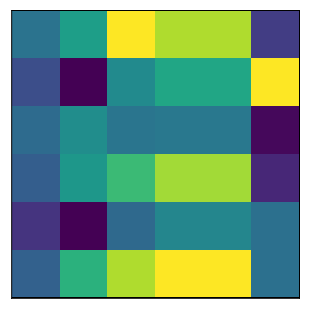

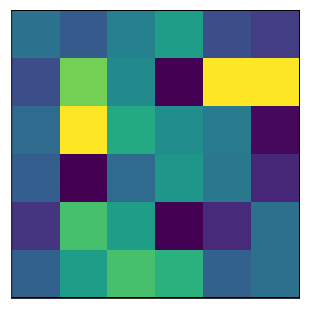

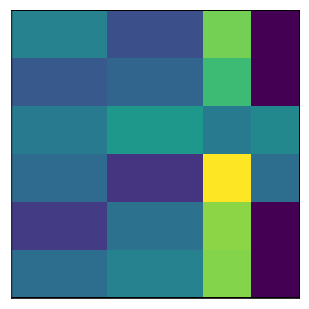

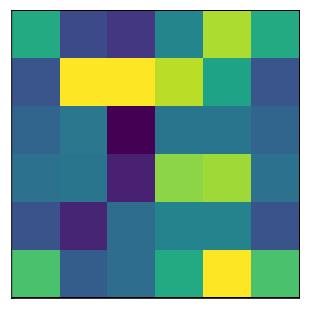

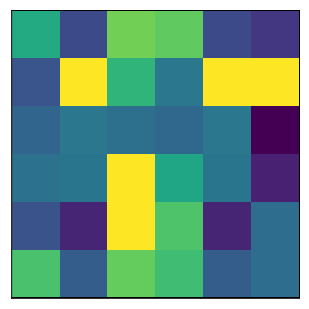

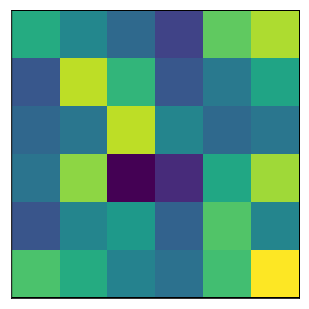

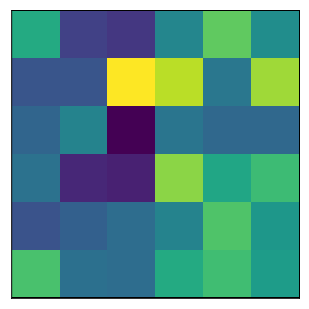

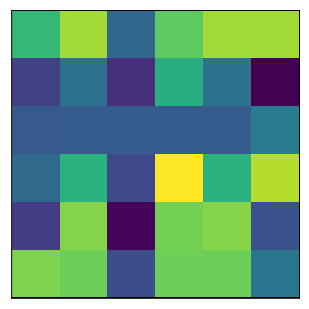

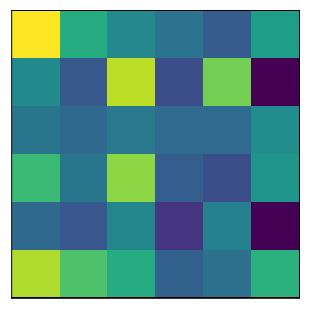

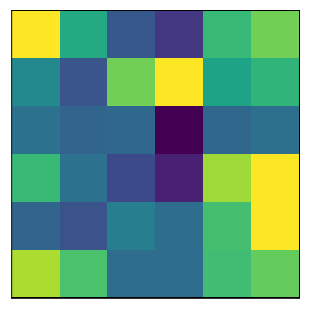

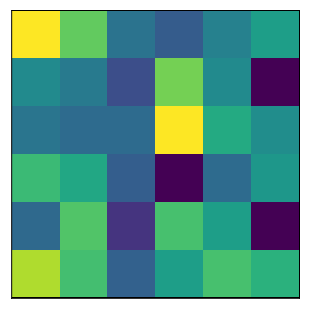

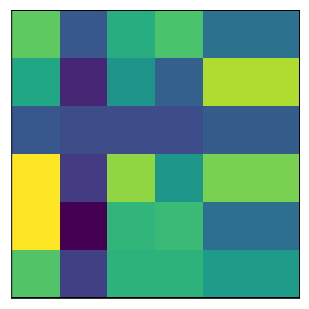

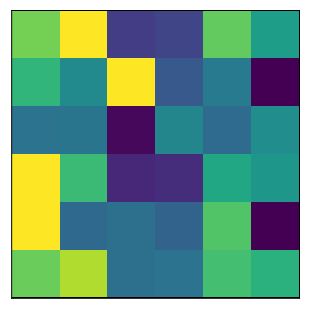

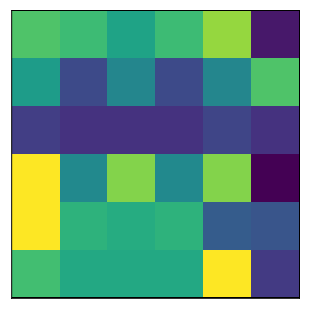

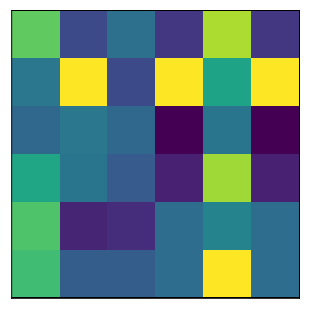

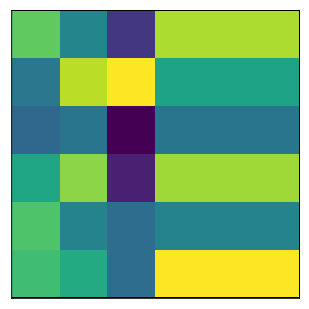

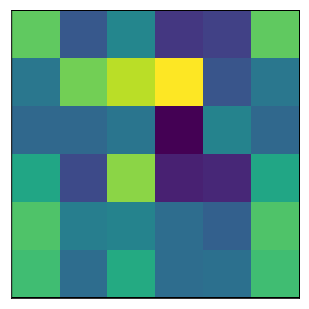

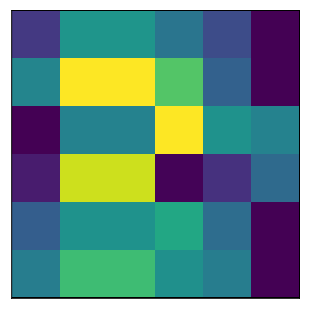

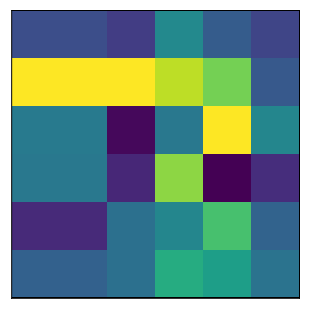

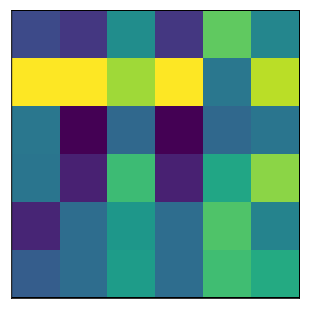

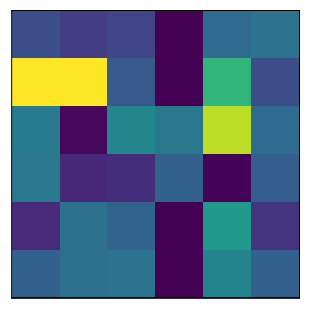

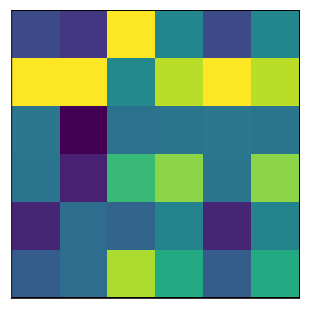

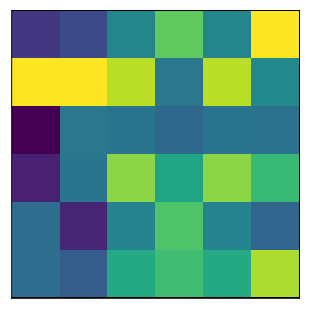

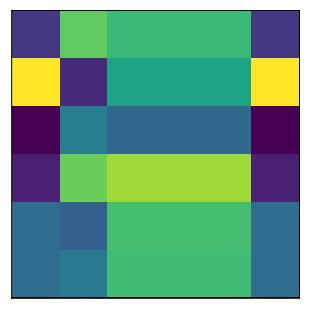

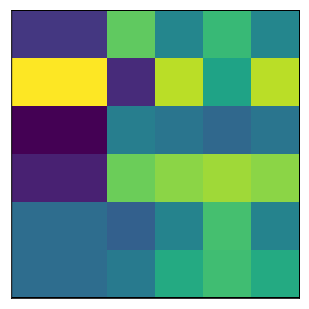

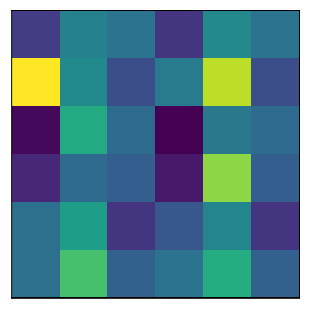

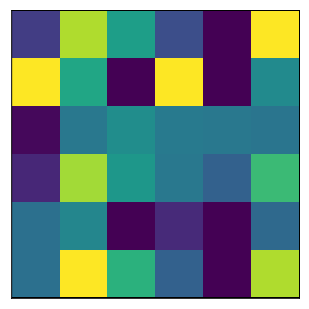

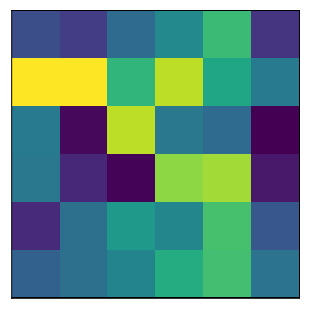

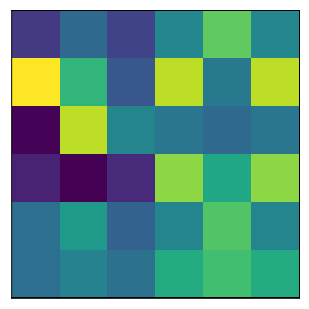

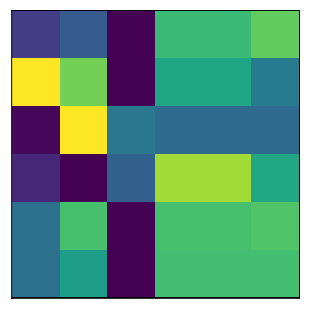

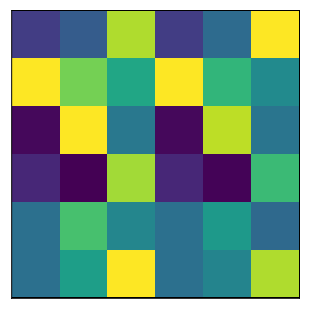

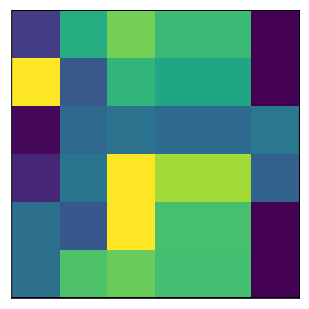

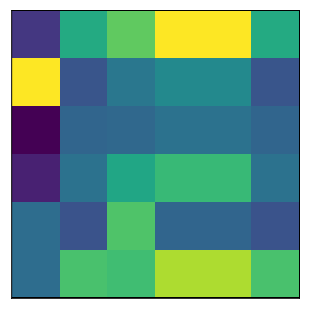

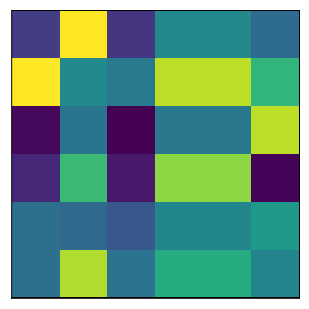

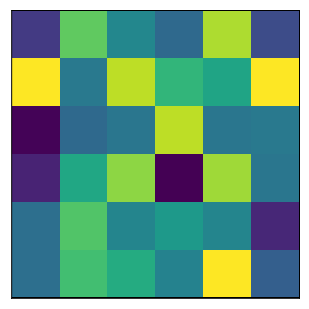

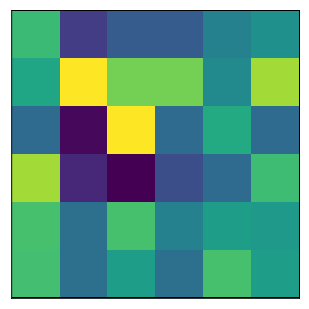

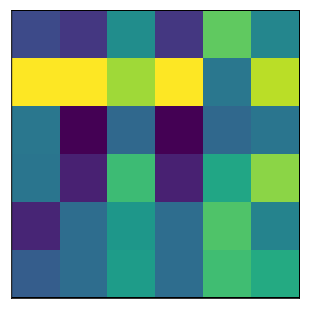

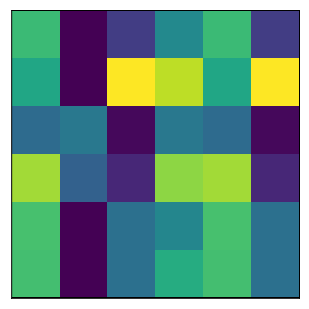

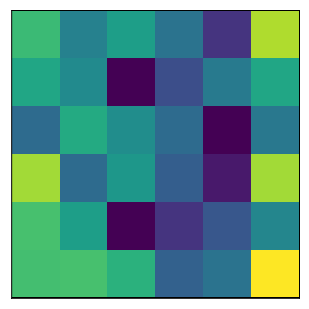

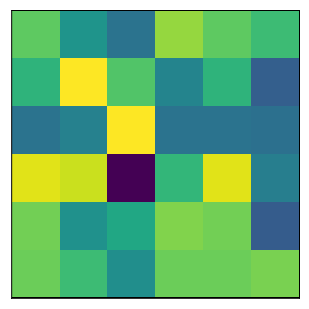

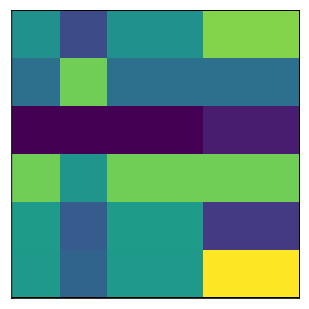

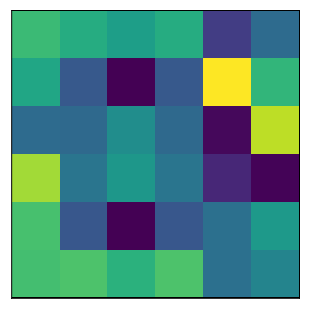

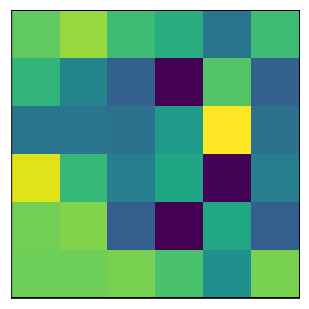

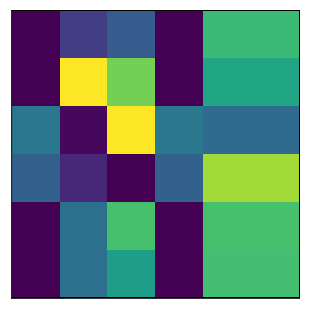

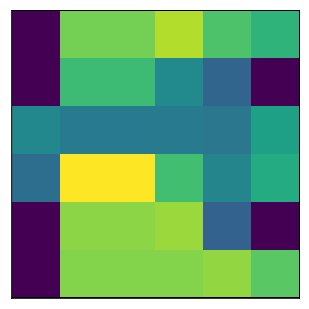

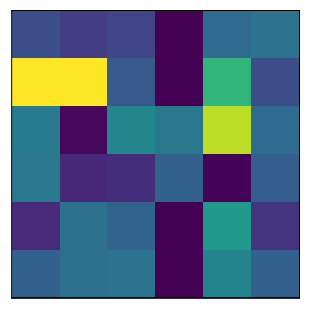

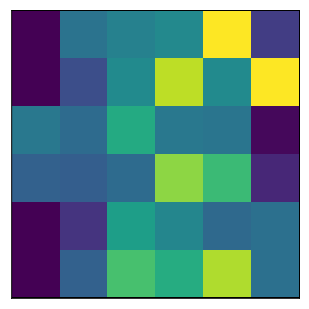

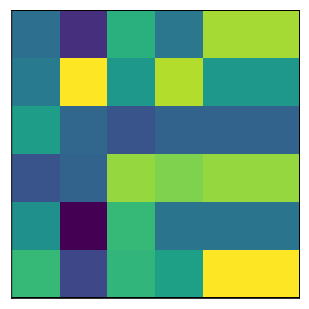

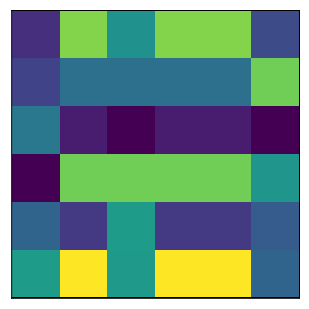

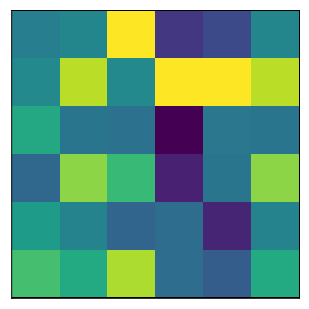

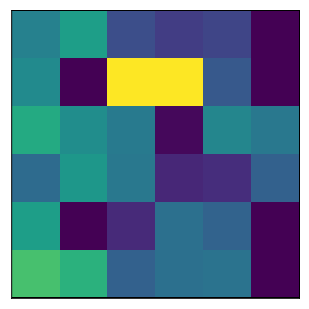

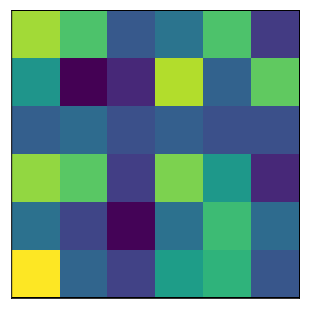

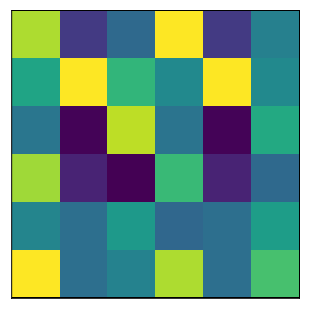

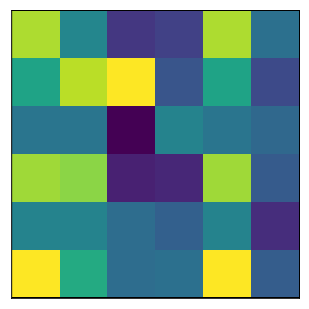

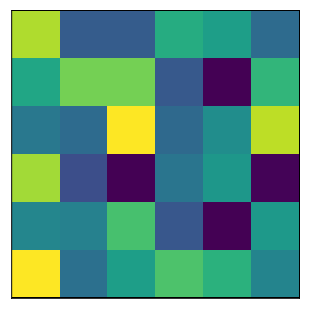

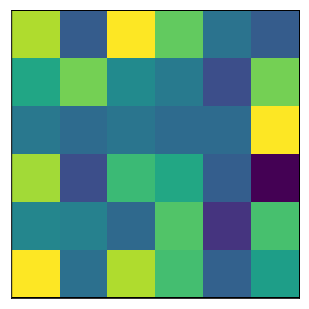

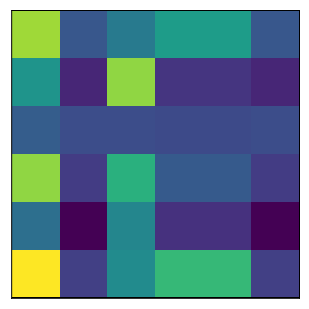

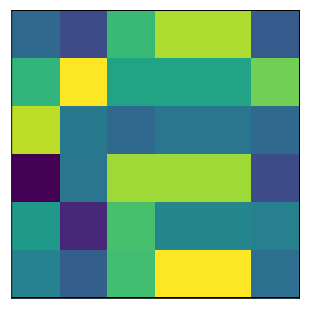

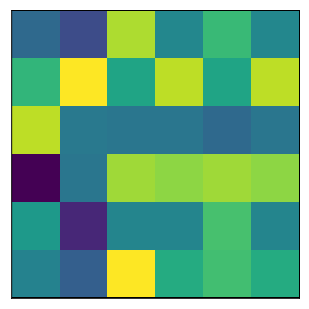

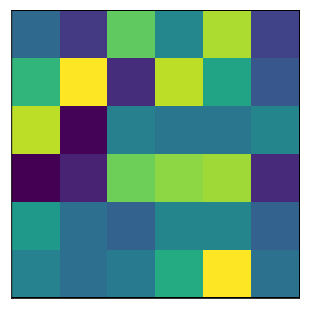

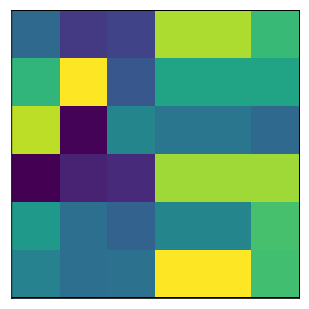

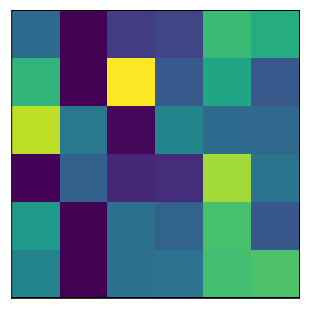

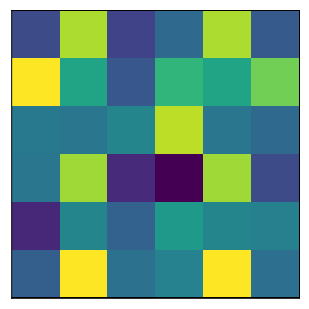

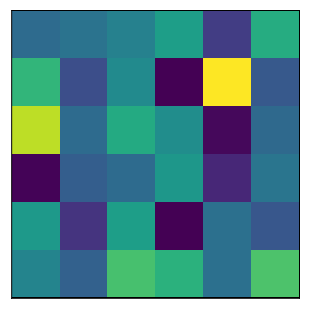

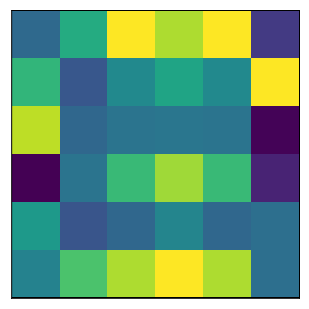

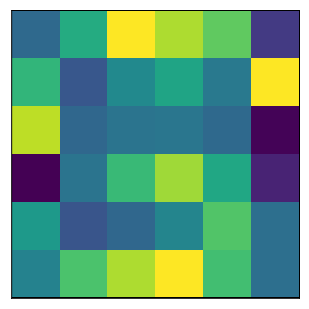

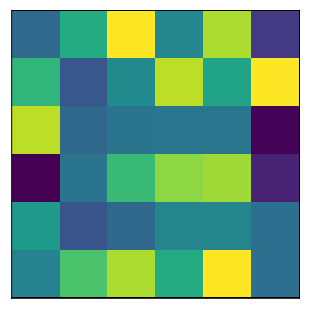

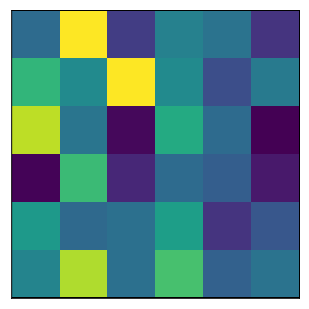

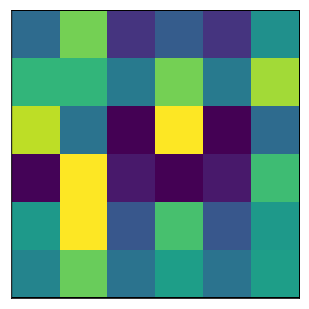

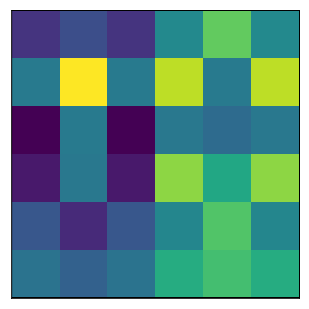

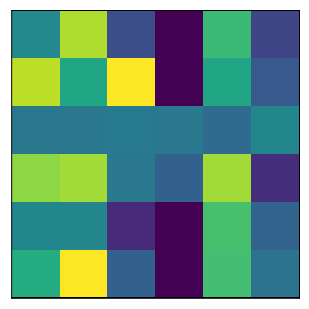

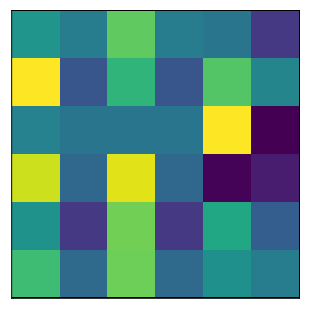

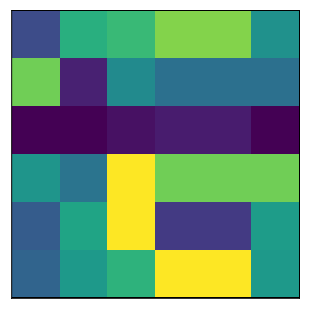

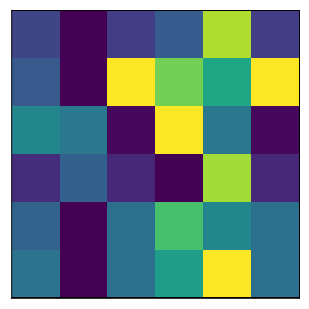

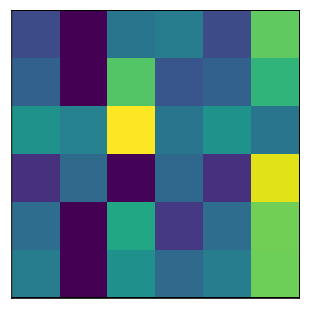

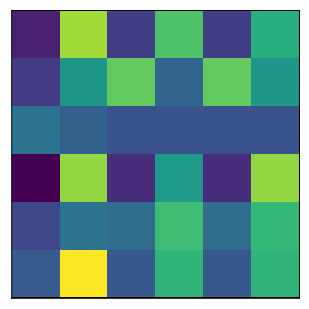

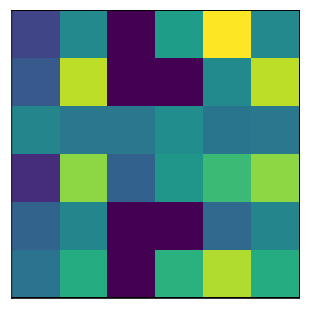

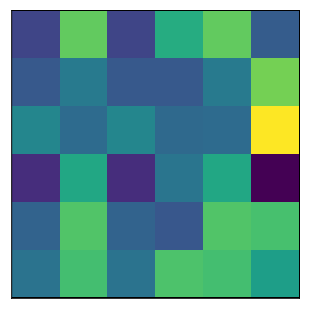

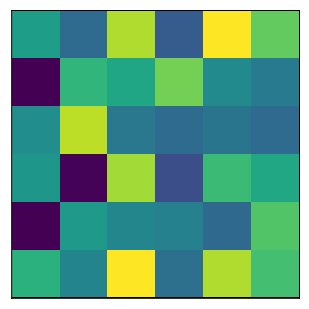

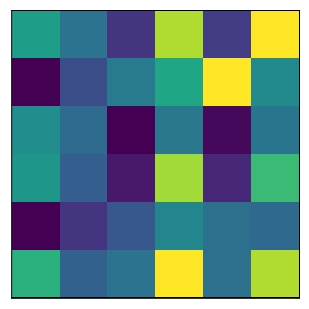

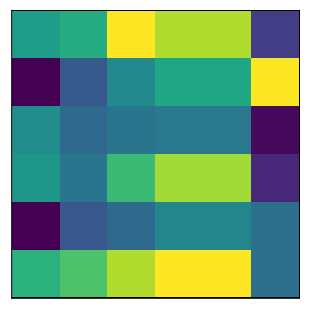

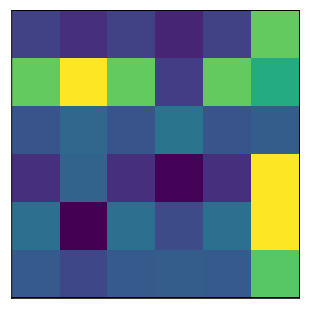

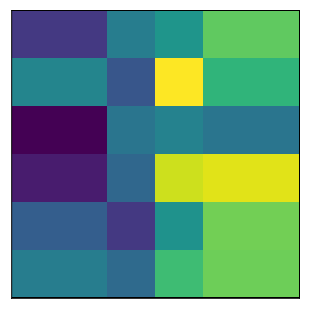

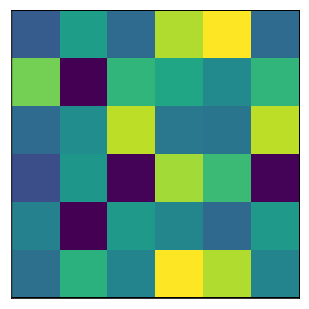

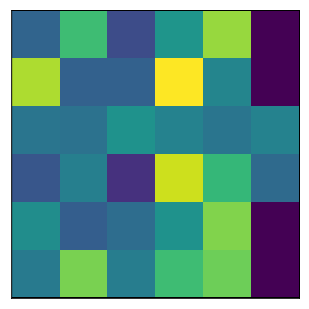

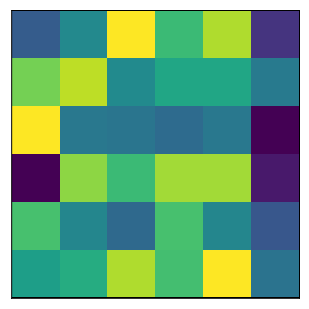

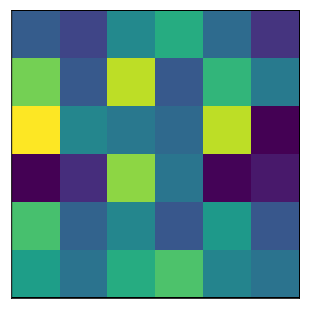

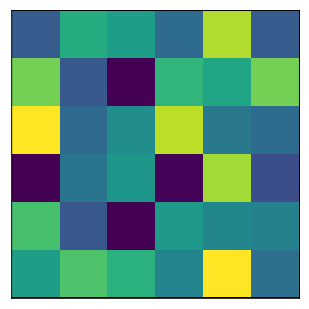

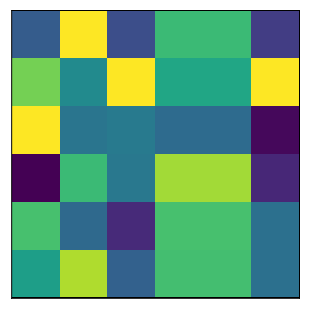

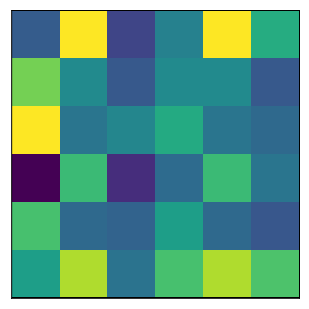

In [18]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate270/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/A_Zero/270_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_0.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_10.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_12.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_13.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_15.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_19.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_2.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_20.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_21.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Data

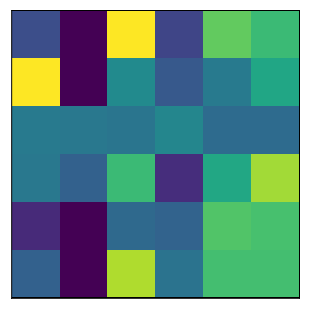

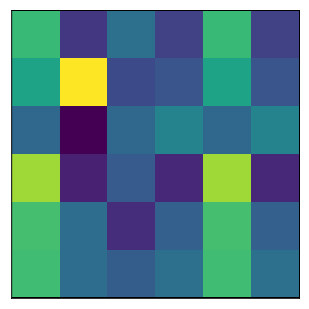

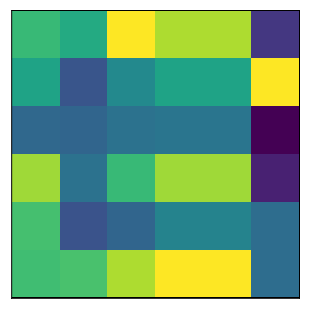

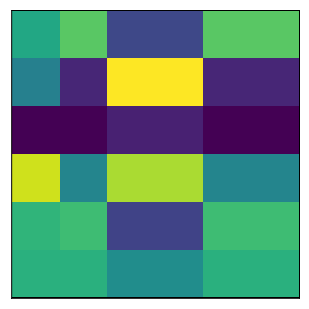

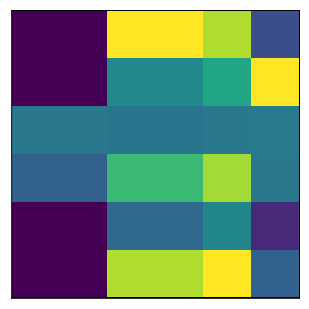

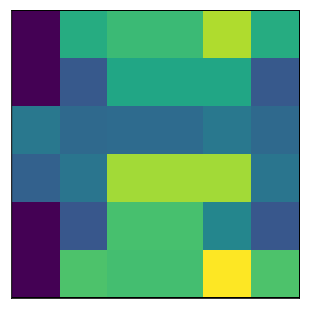

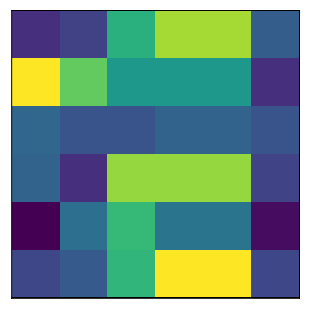

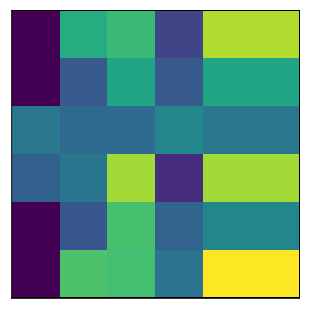

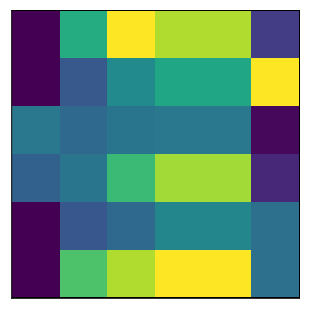

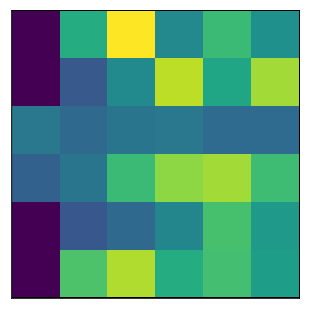

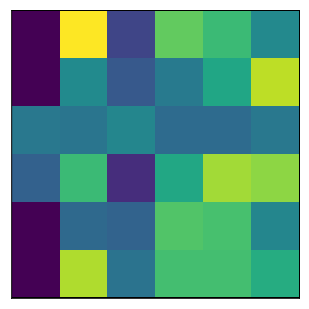

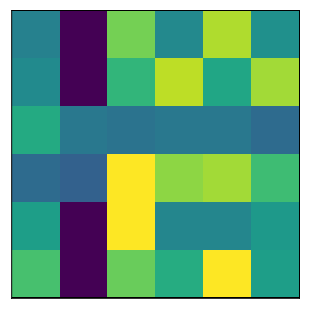

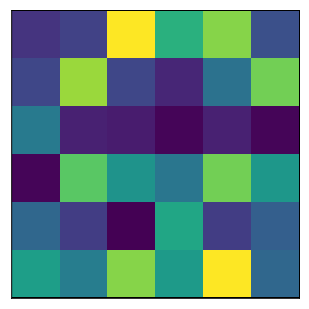

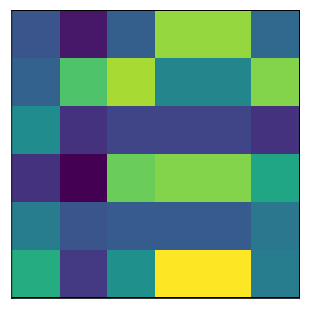

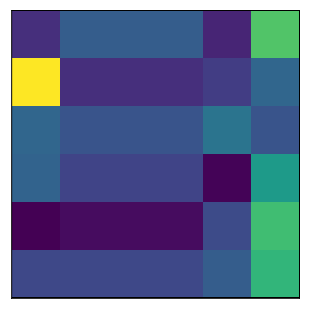

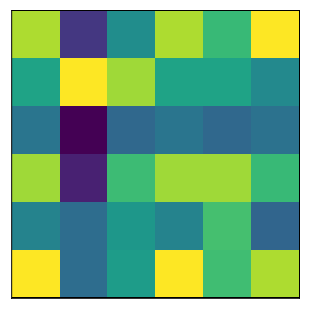

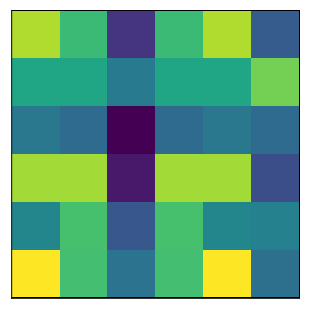

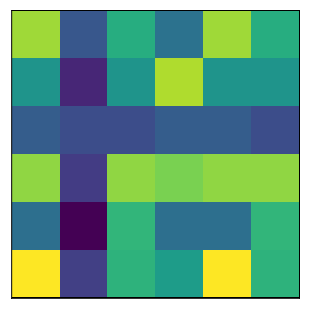

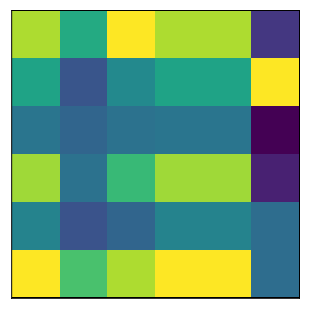

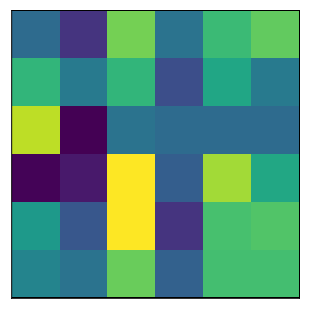

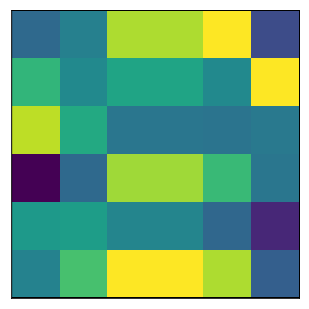

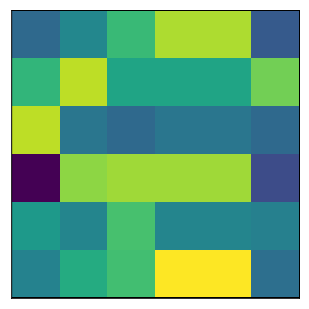

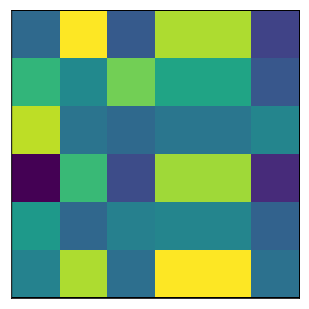

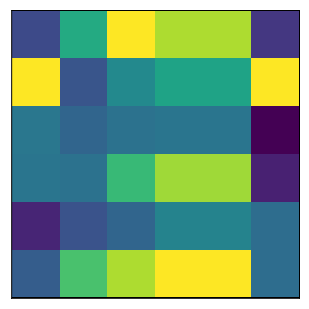

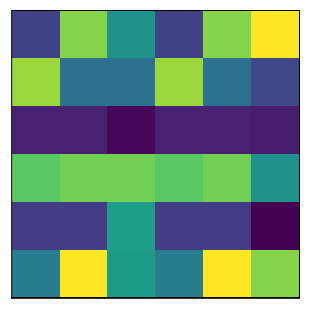

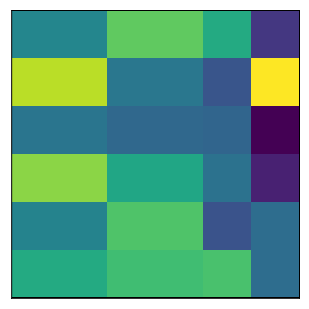

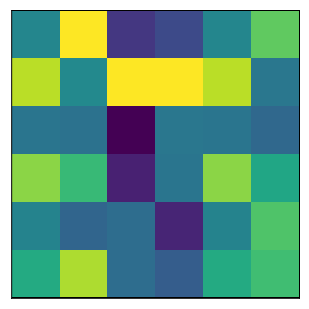

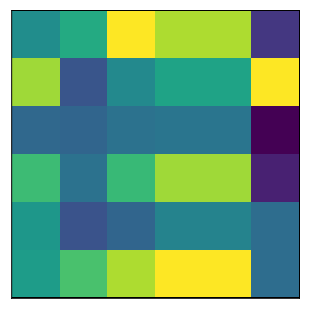

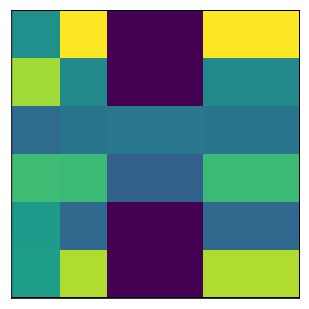

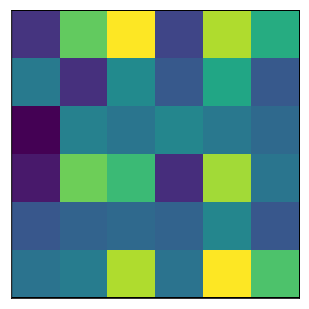

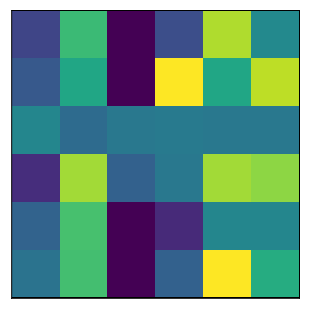

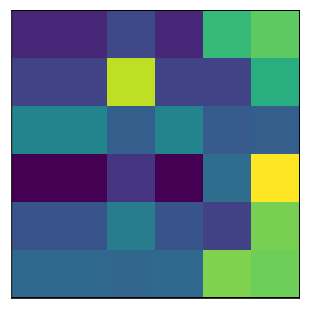

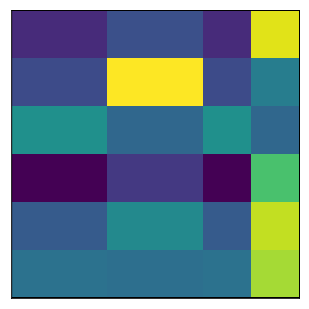

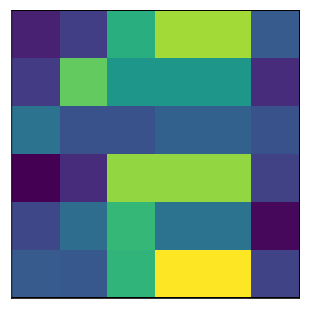

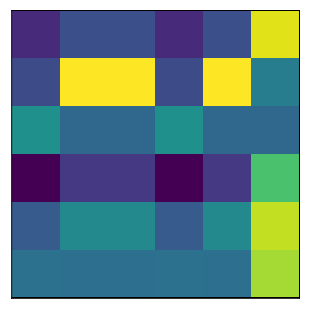

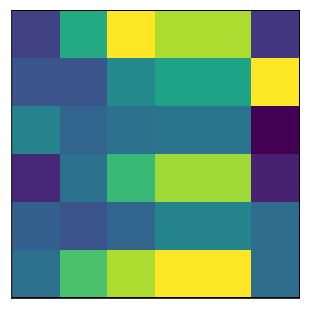

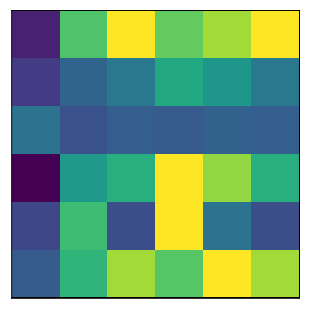

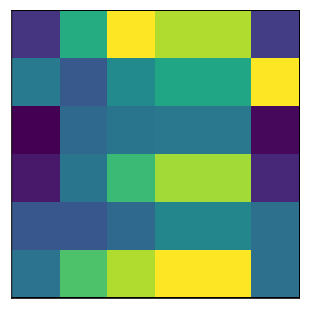

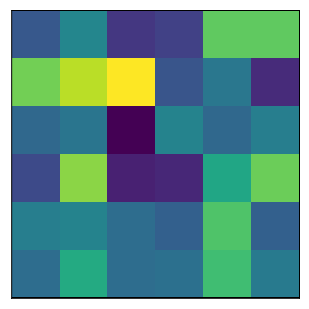

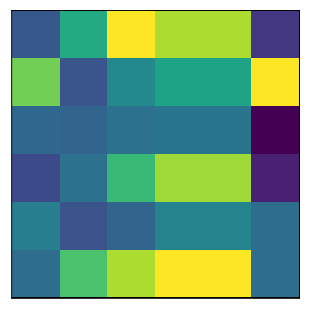

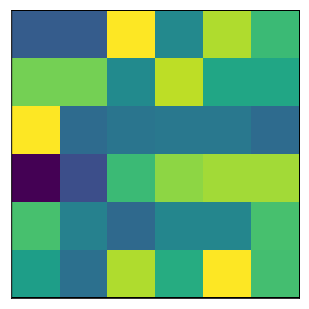

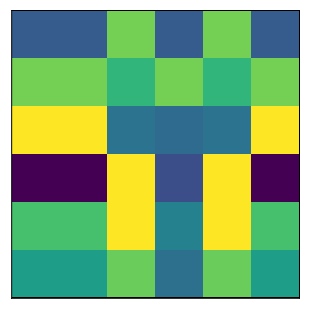

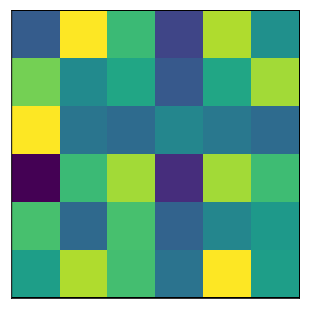

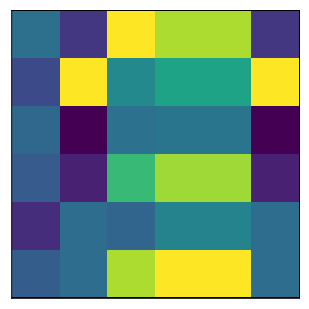

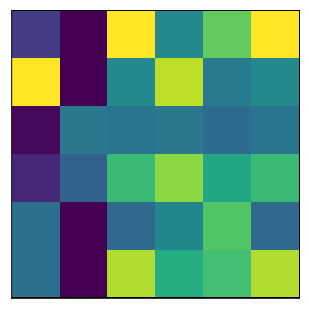

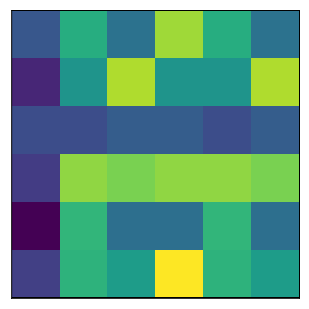

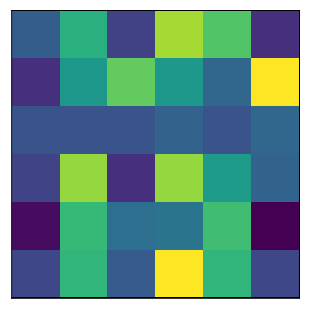

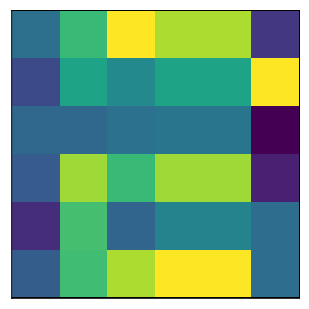

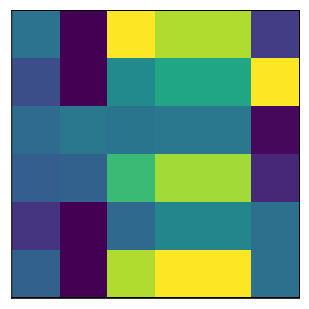

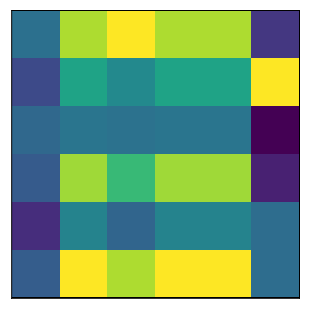

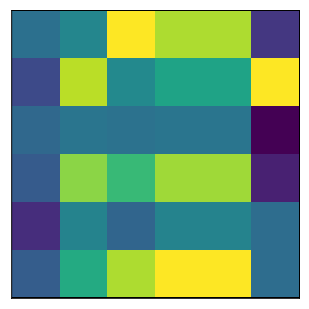

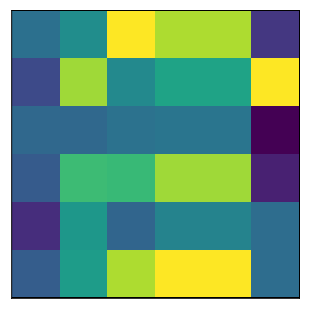

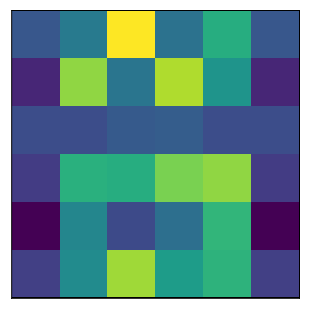

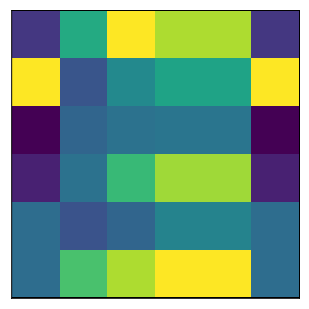

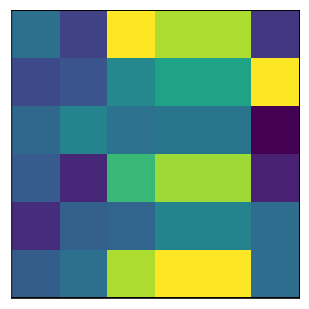

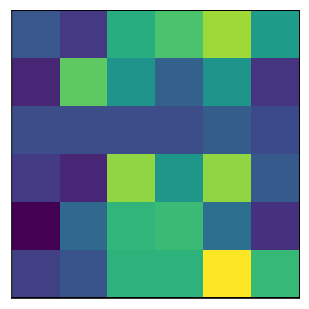

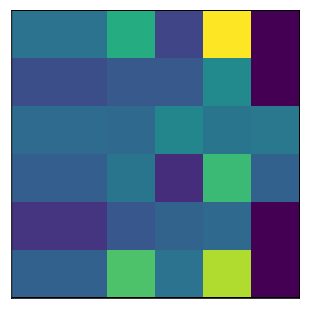

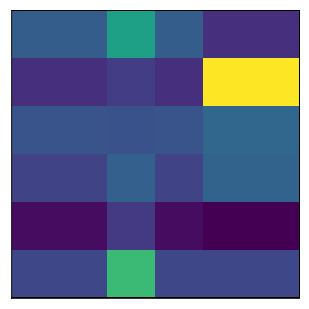

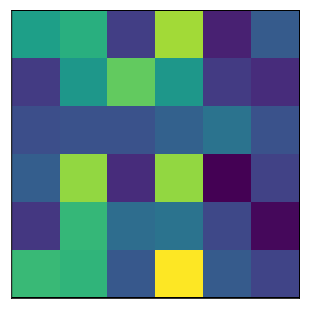

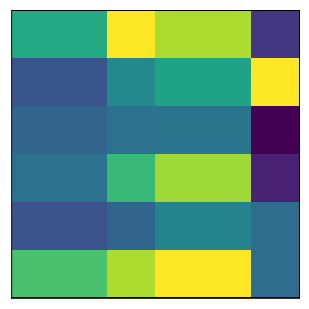

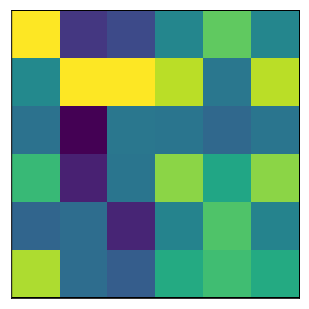

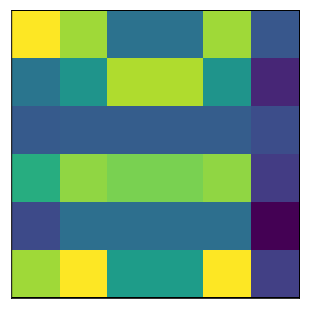

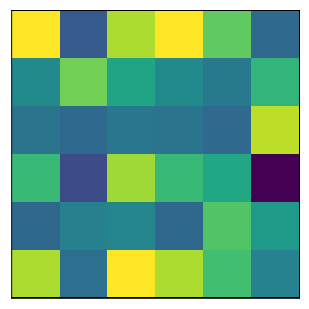

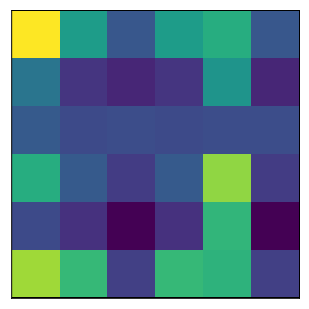

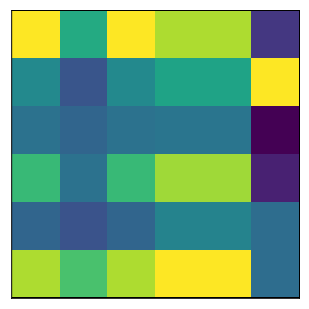

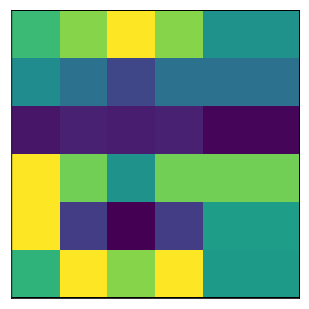

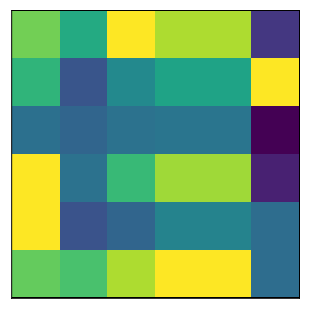

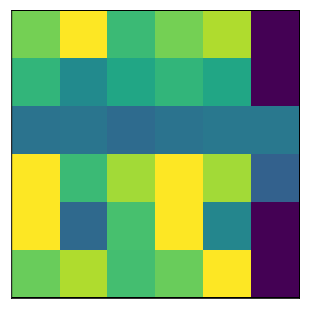

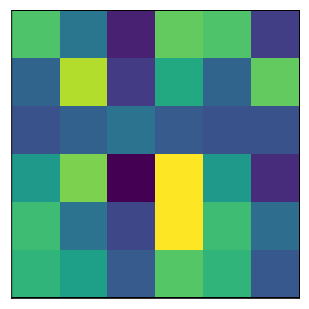

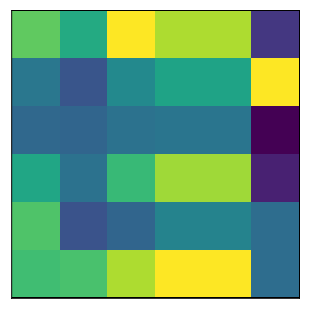

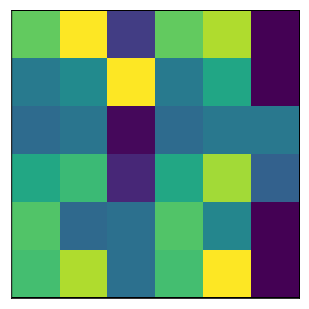

In [19]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate270/One/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/B_One/270_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_0.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_10.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_11.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_110.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_111.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_114.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_116.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_117.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero\matrix_Zero_12.p

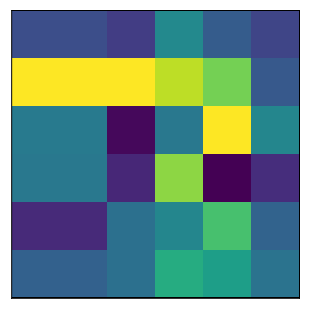

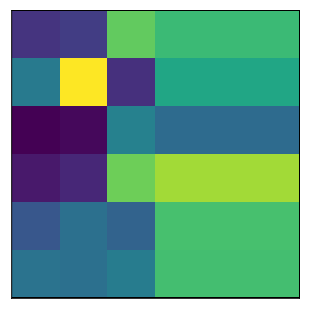

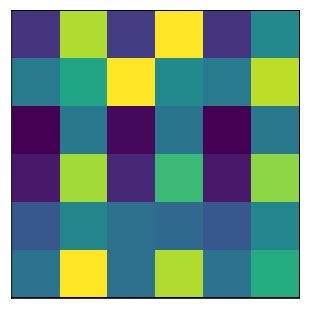

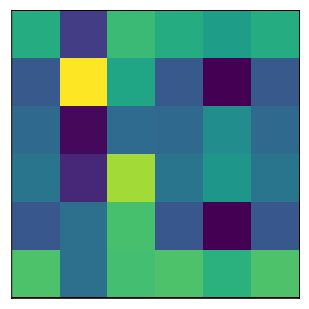

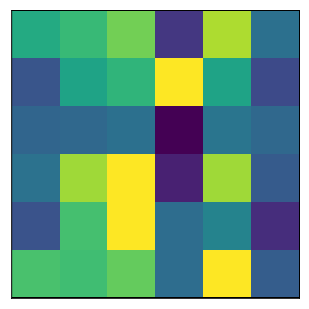

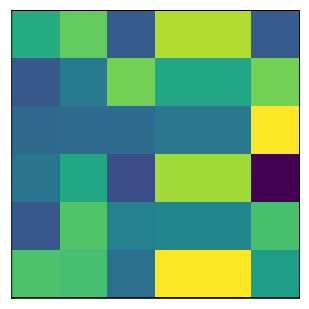

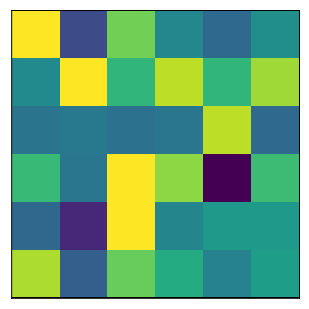

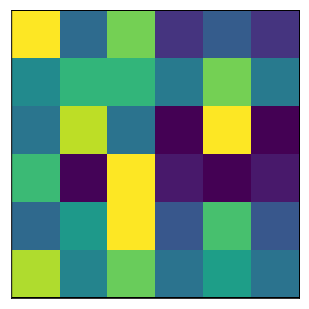

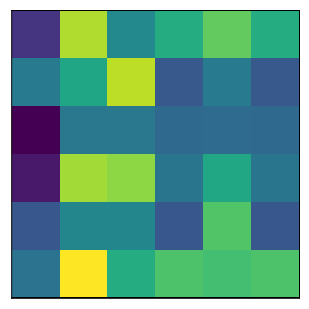

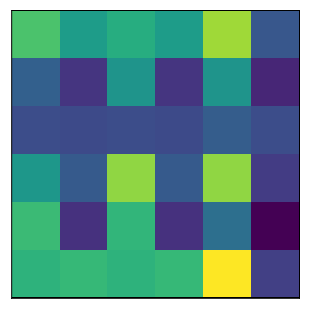

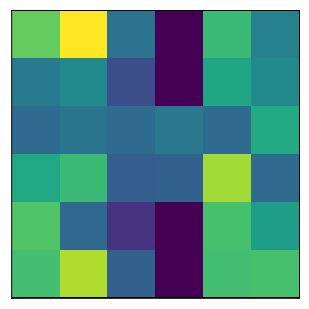

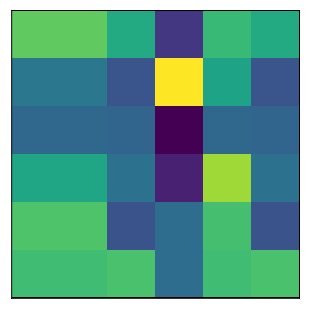

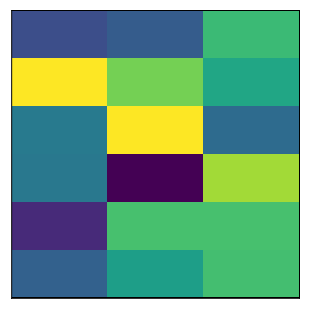

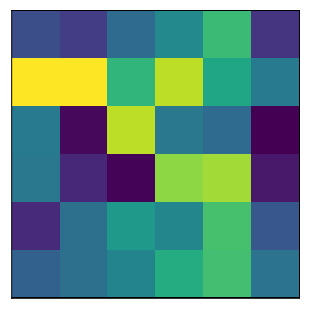

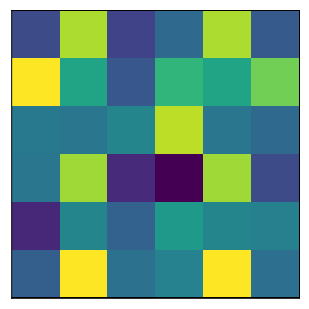

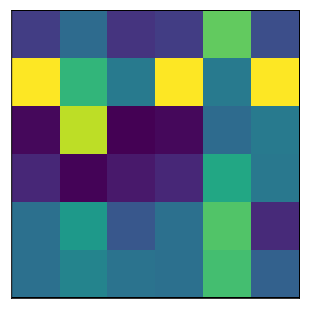

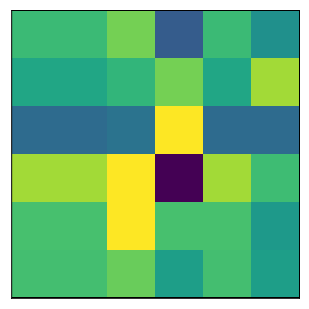

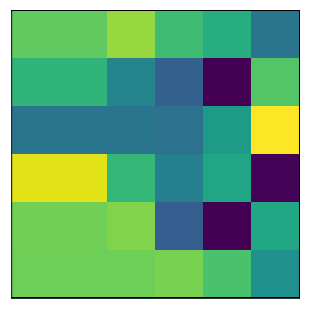

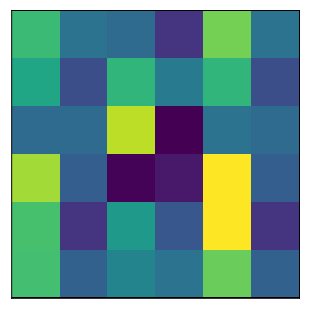

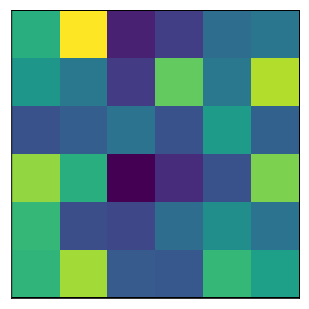

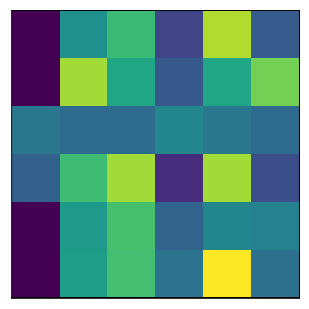

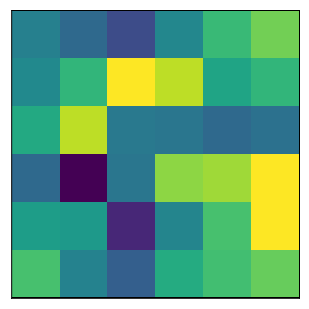

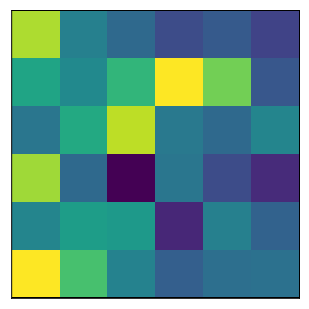

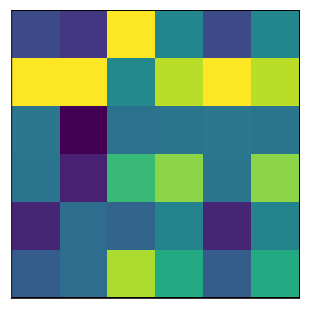

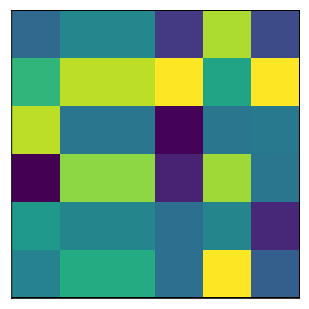

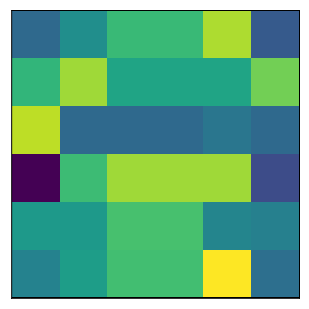

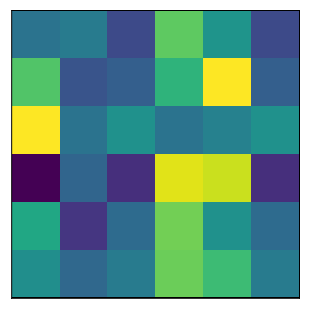

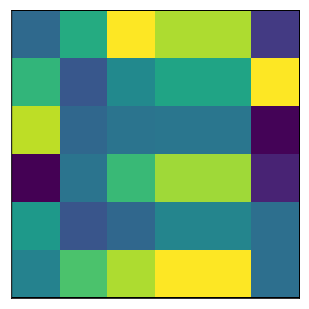

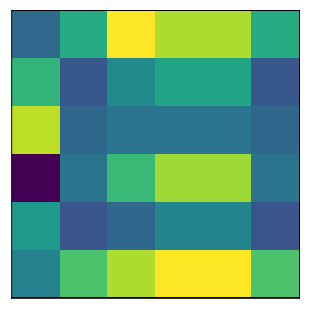

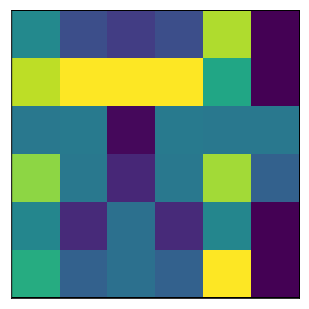

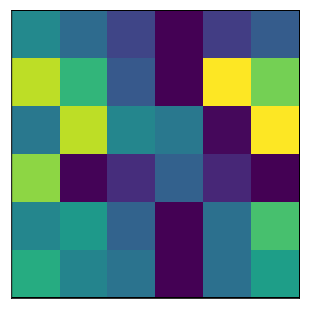

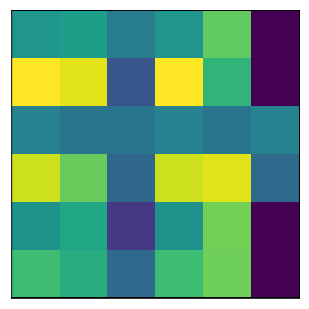

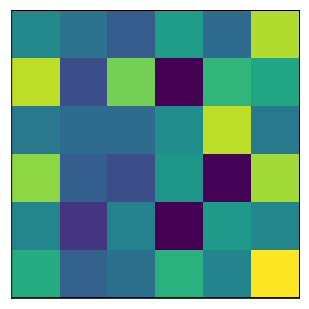

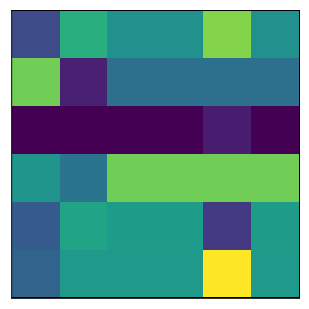

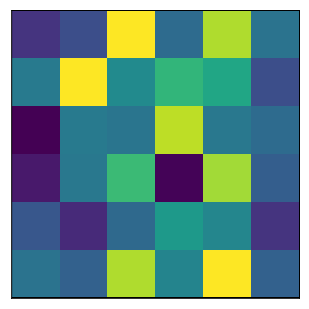

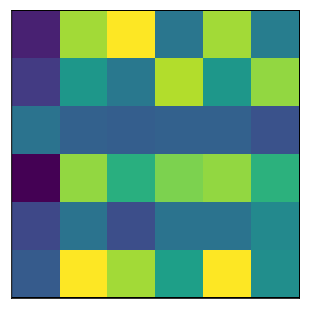

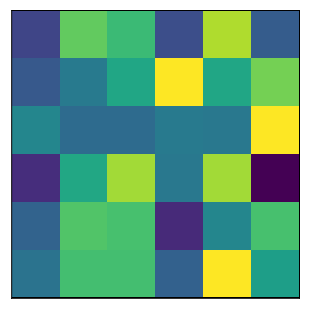

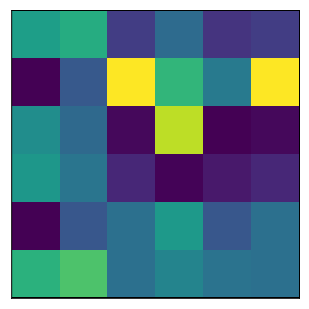

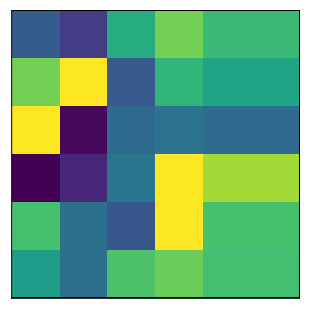

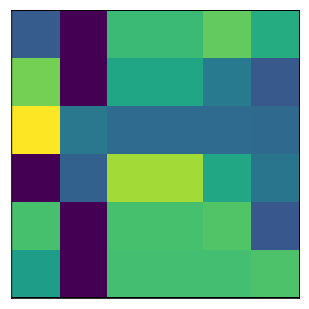

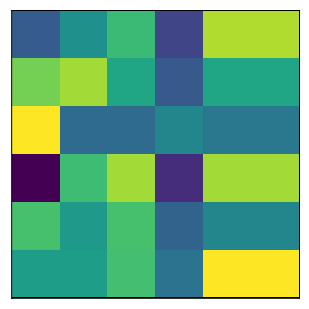

In [20]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Zero/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/rotate270/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Rotate-flip/A_Zero/270_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_1.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_100.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_101.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_11.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_14.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_16.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_17.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_18.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One\matrix_One_24.png
C:/Users/user/OneD

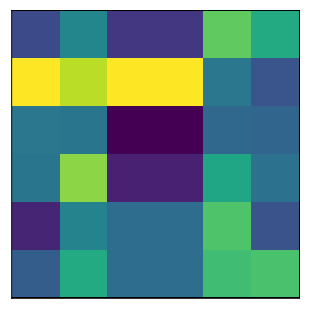

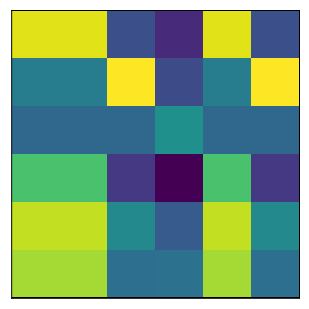

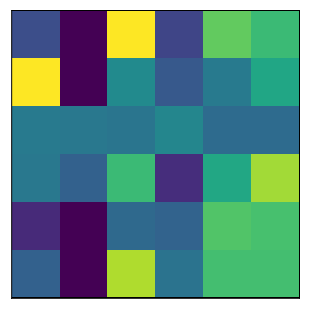

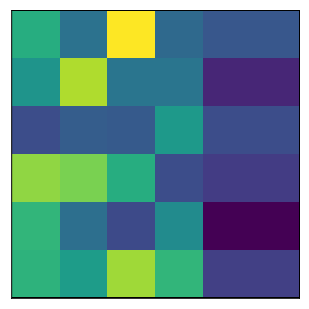

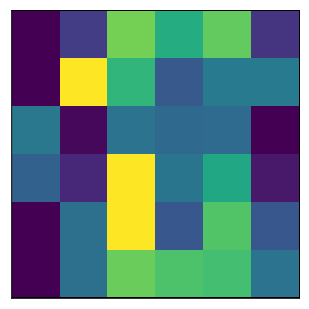

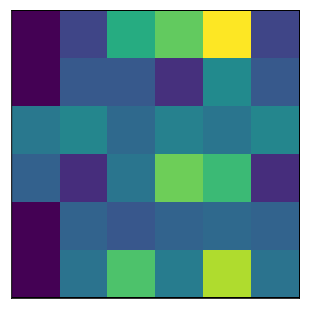

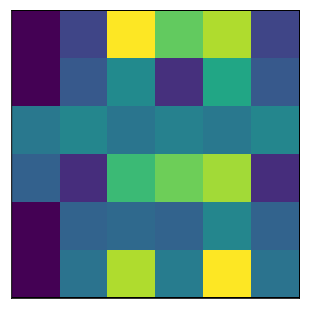

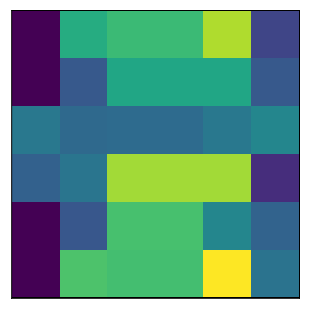

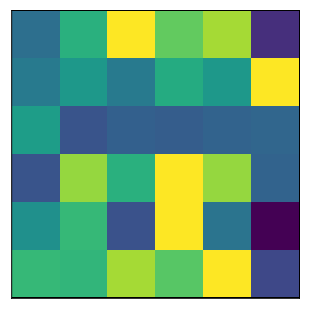

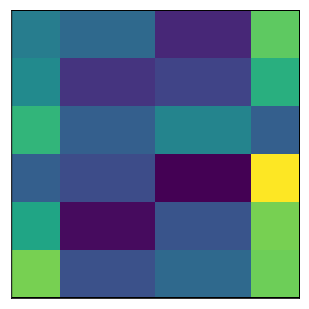

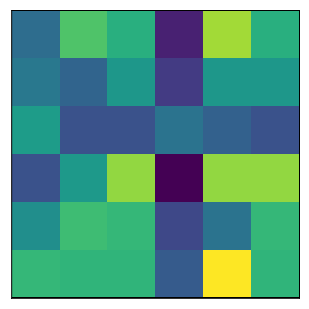

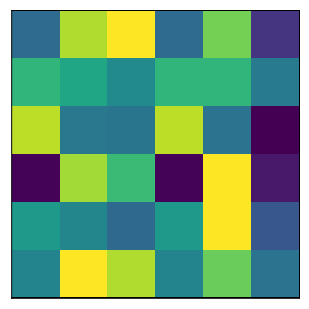

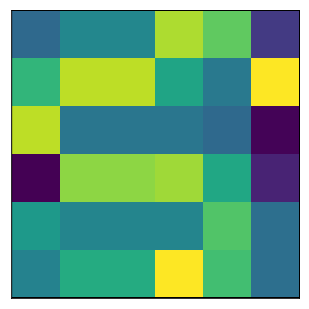

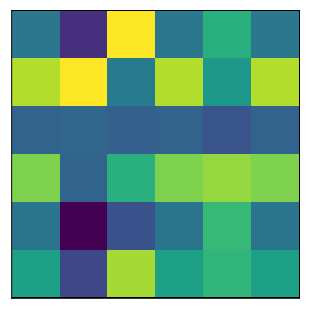

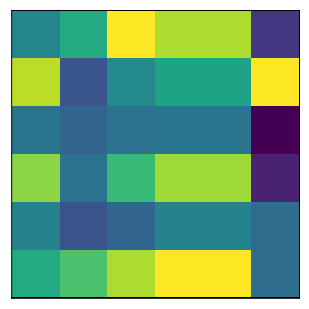

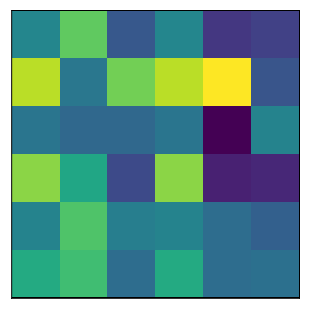

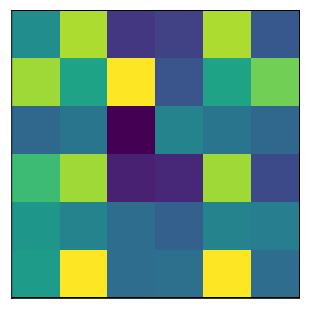

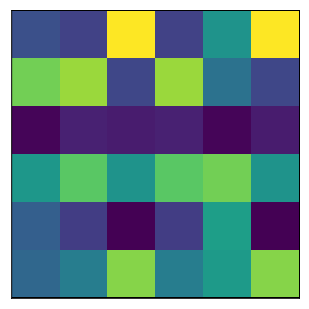

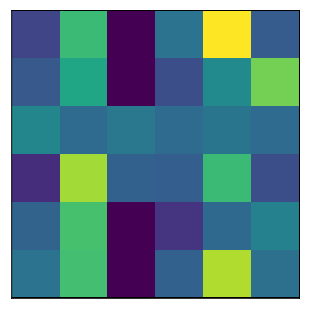

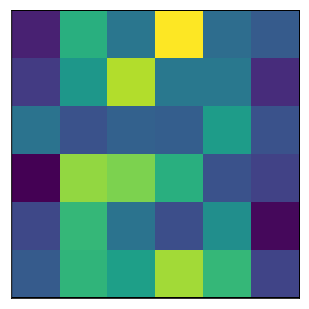

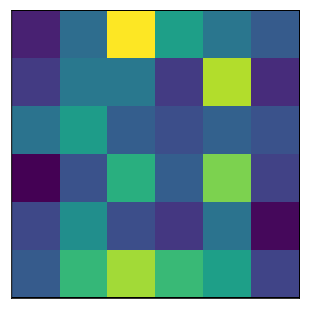

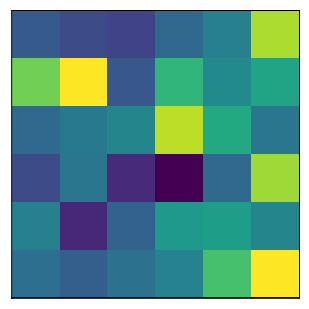

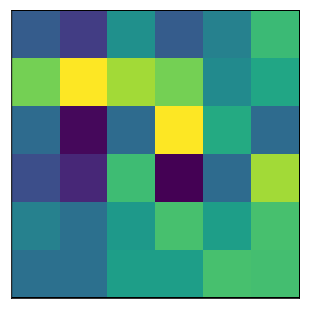

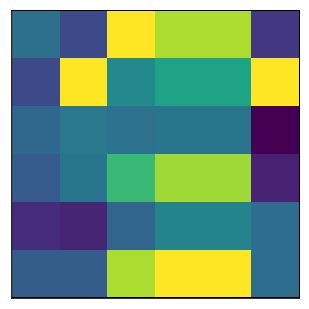

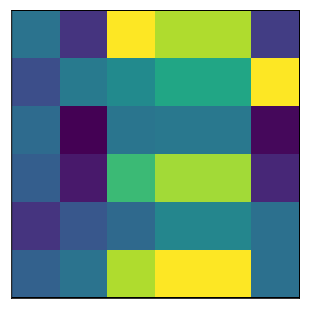

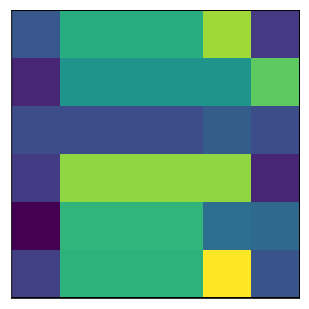

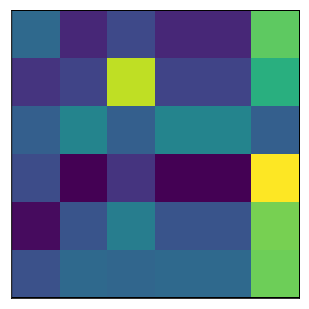

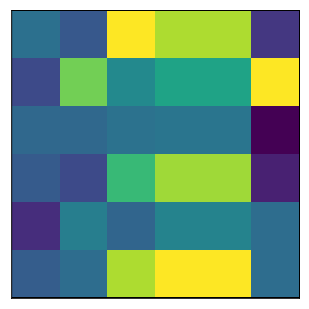

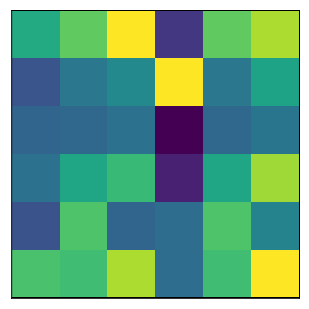

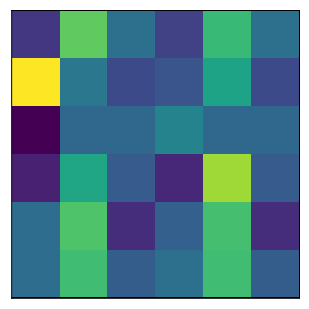

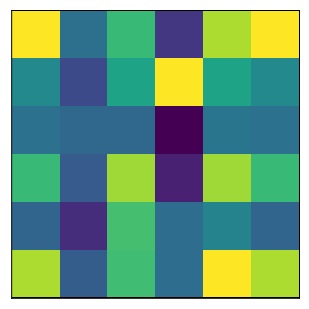

In [21]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/One/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/rotate270/One/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.rotate(img, cv.ROTATE_90_COUNTERCLOCKWISE)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Rotate-flip/B_One/270_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Flip Up-down
https://note.nkmk.me/python-opencv-numpy-rotate-flip/

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_1.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_100.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_101.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_102.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_103.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_104.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_105.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_106.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_107.png
C:/Users/user/OneDrive/python3/aminomap

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_77.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_78.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_79.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_80.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_82.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_84.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_85.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_86.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_88.png
C:/Users/user/OneDrive/python3/aminomap/Amyloi

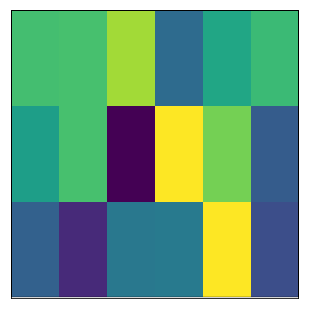

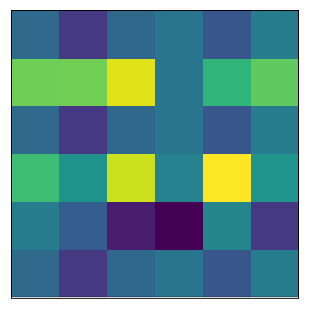

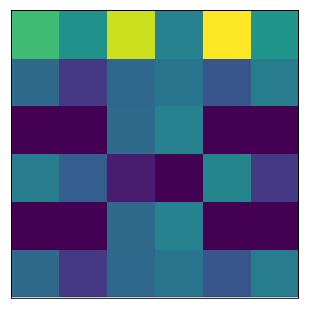

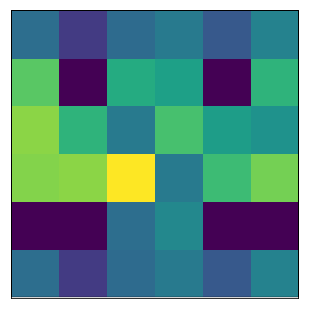

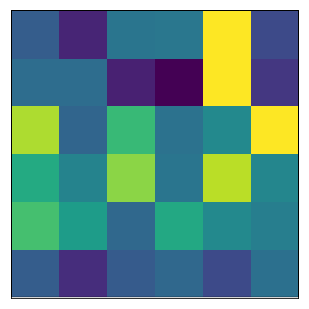

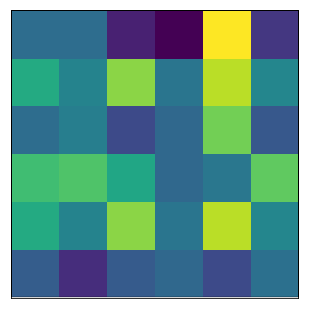

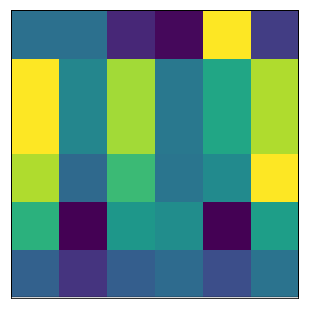

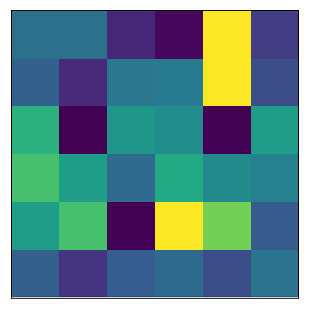

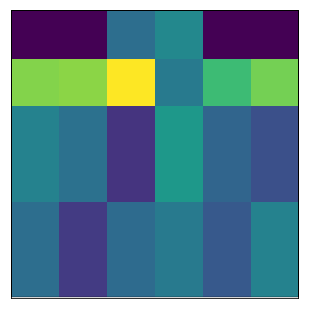

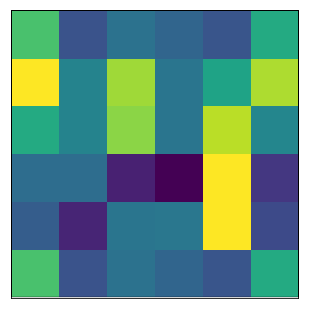

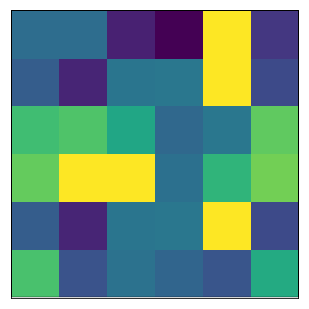

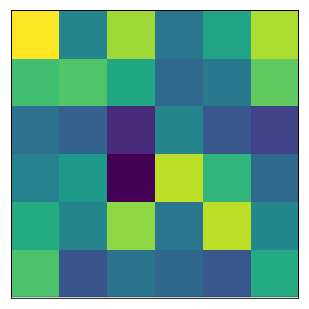

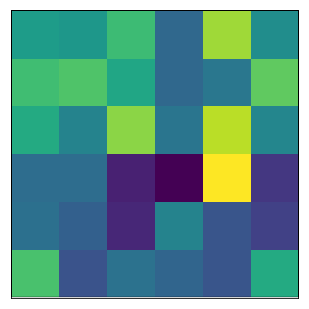

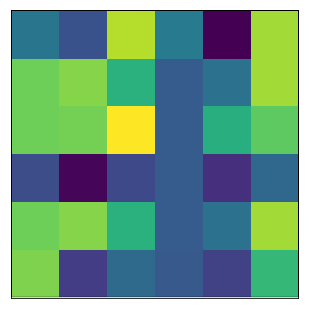

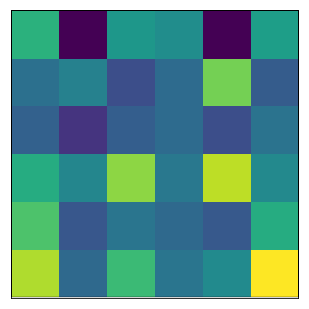

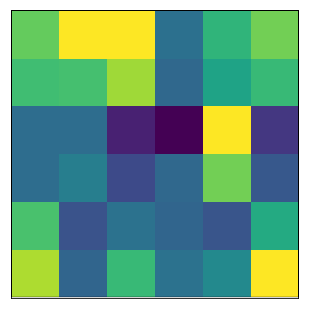

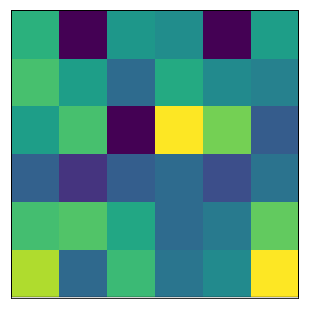

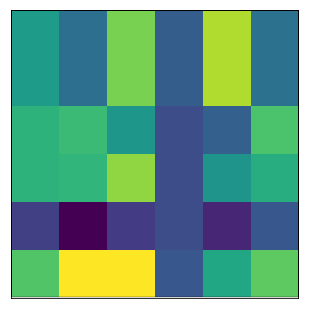

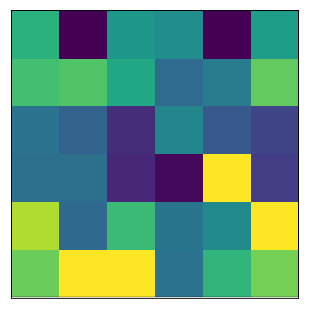

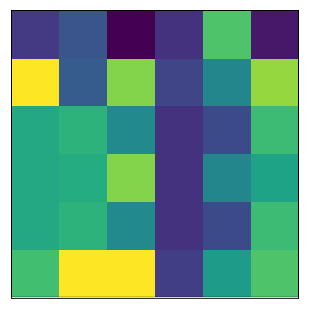

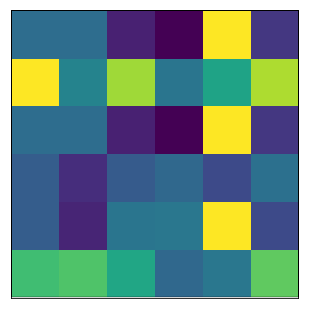

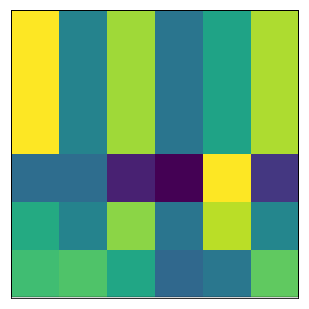

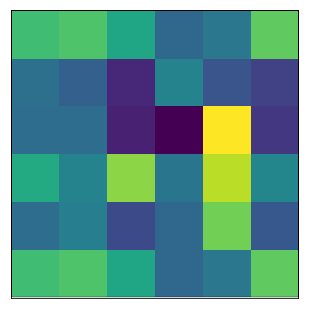

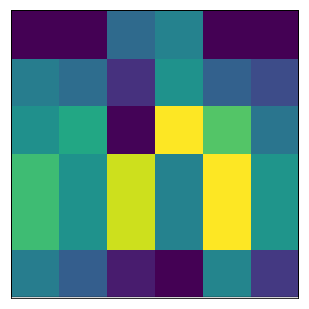

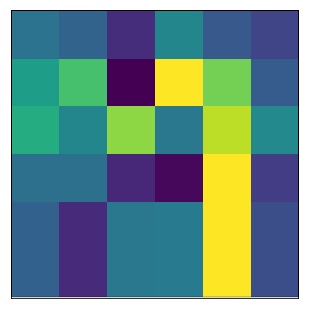

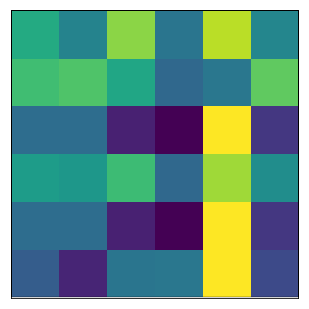

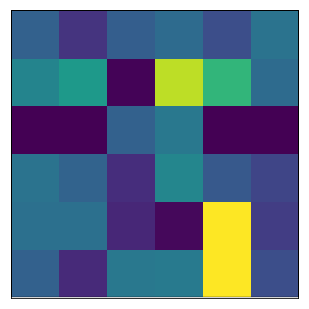

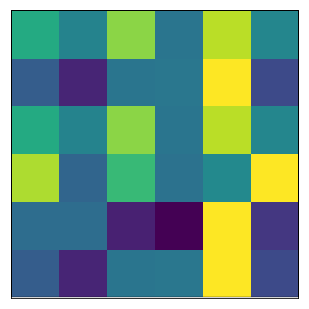

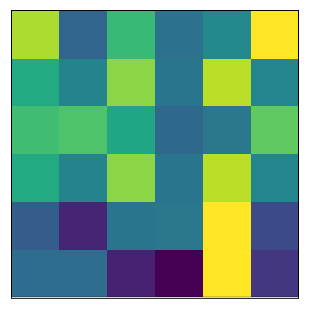

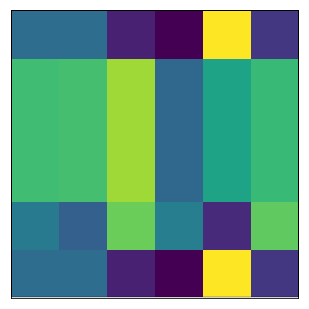

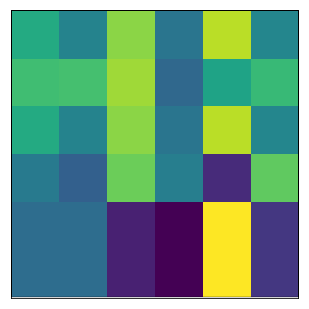

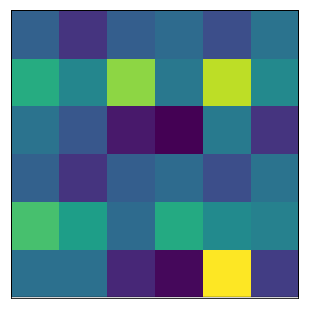

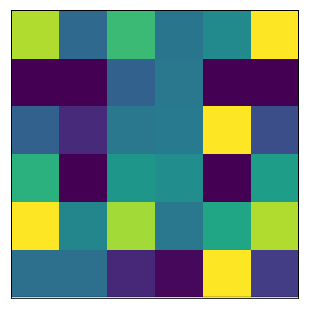

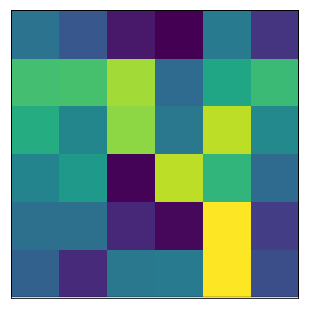

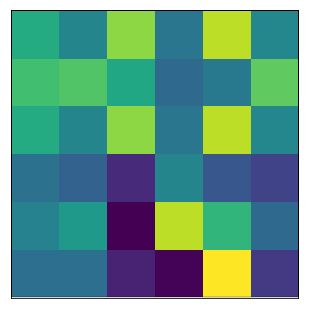

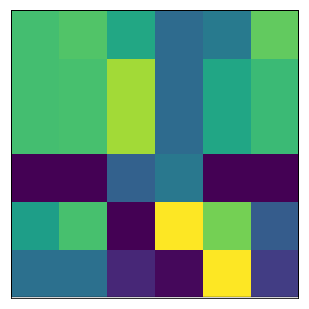

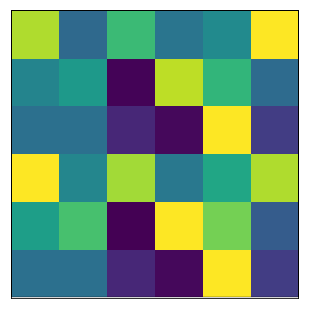

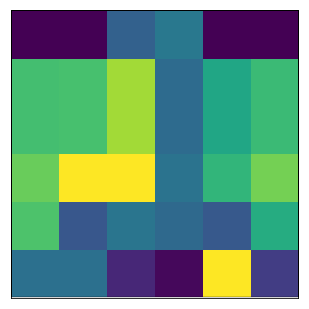

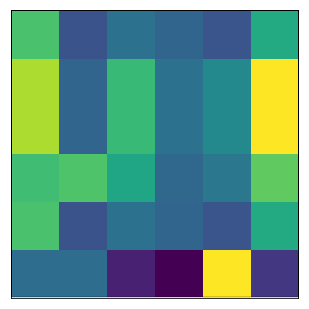

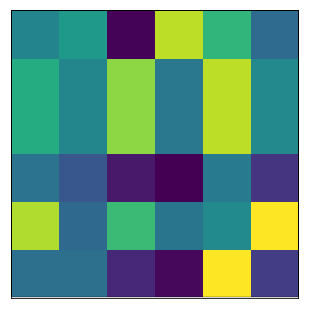

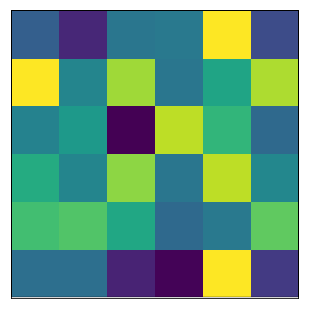

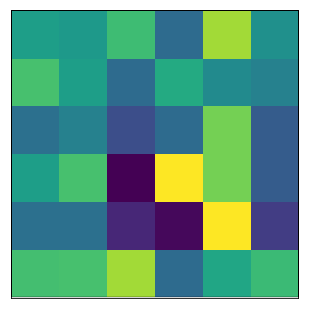

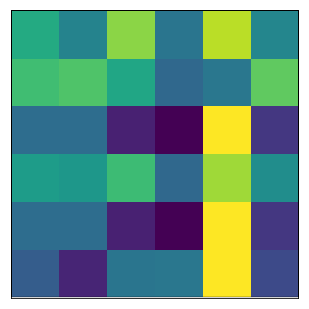

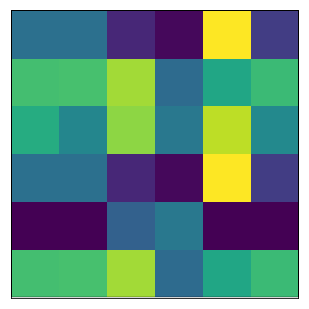

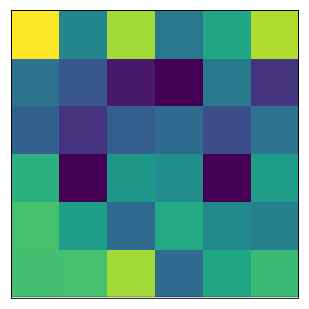

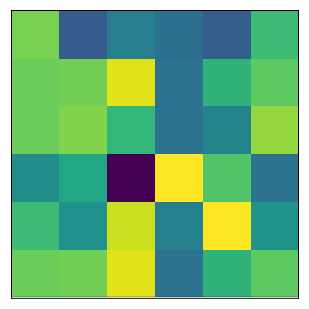

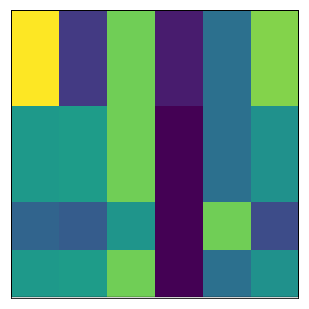

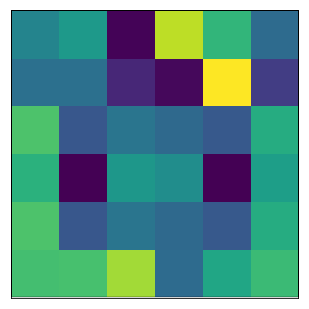

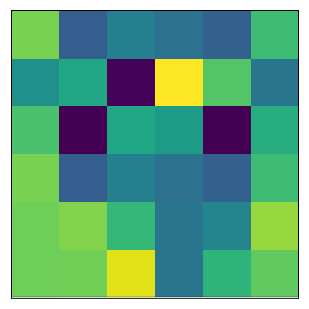

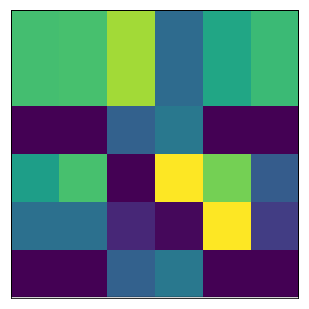

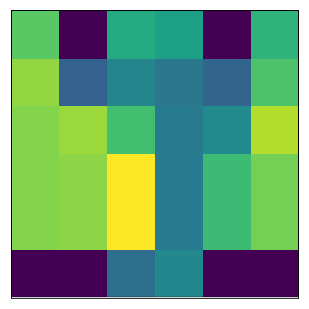

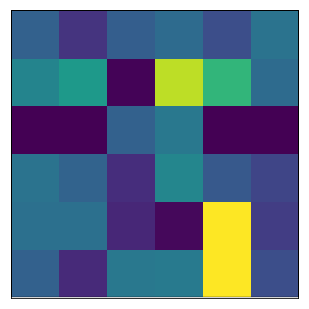

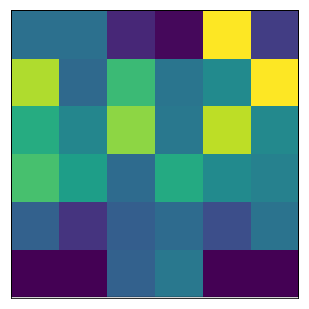

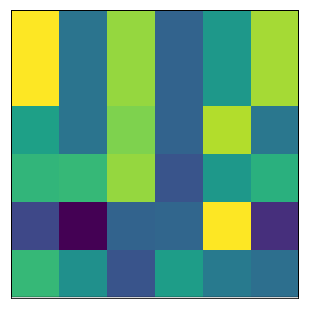

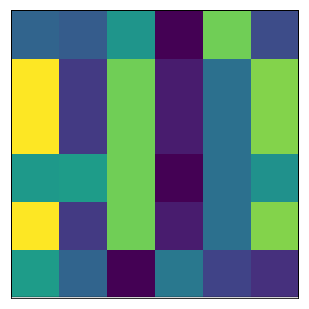

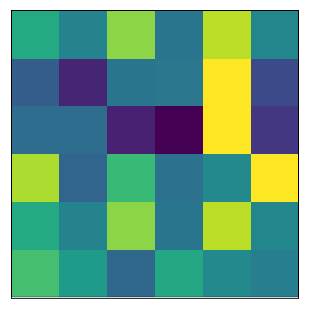

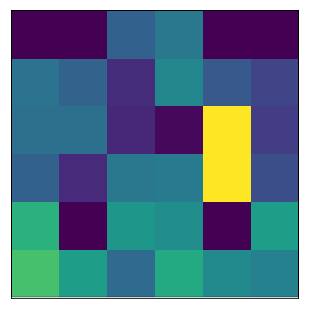

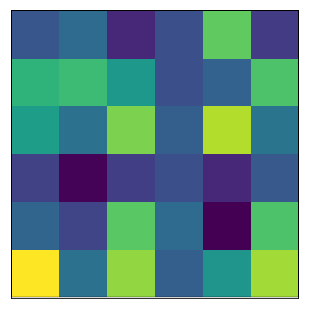

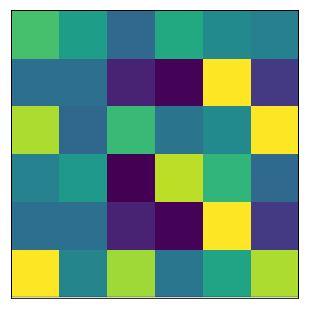

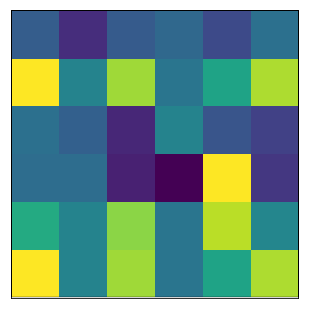

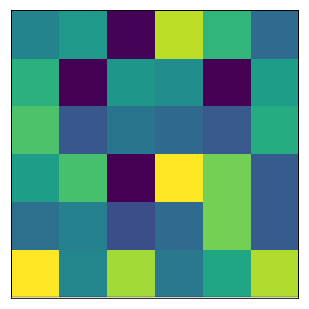

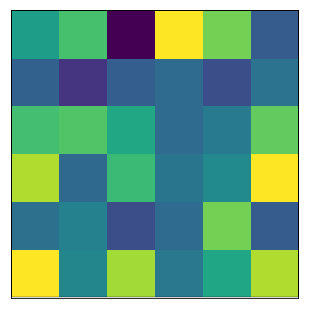

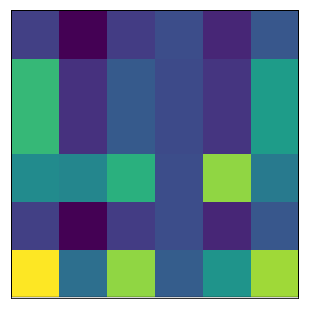

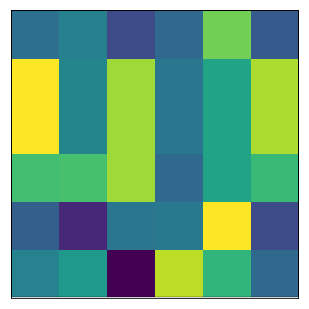

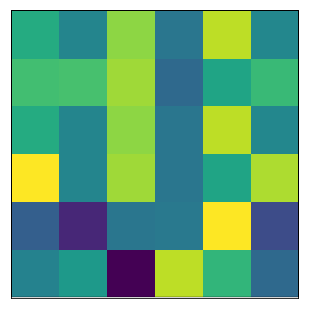

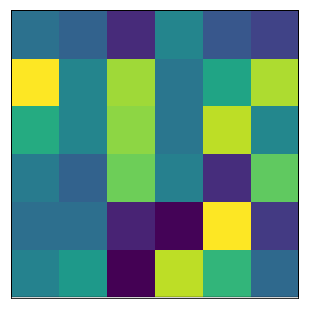

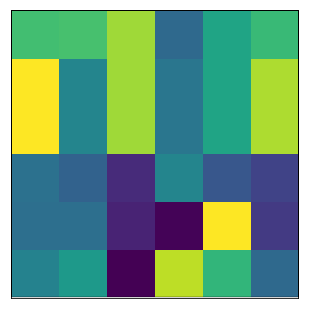

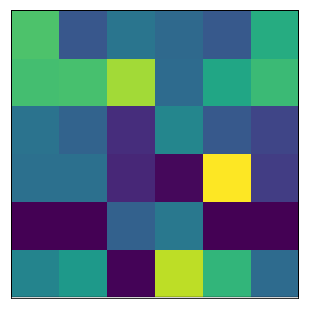

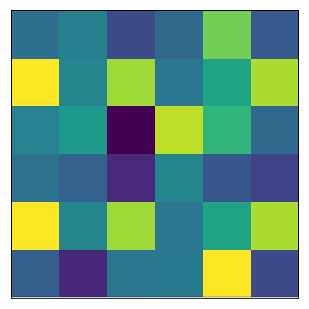

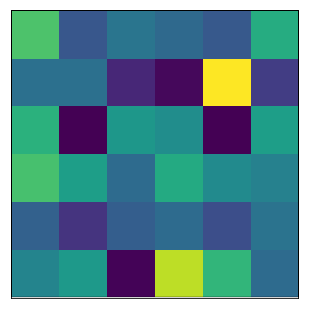

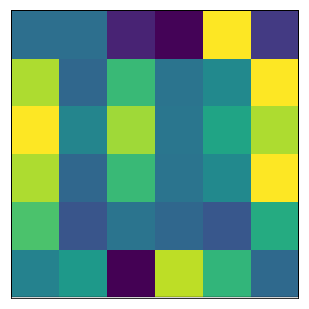

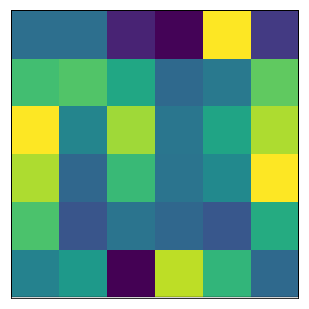

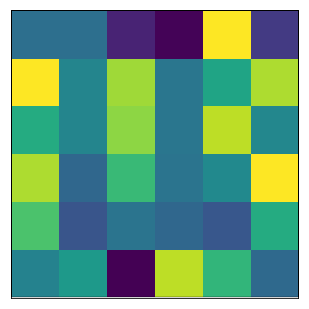

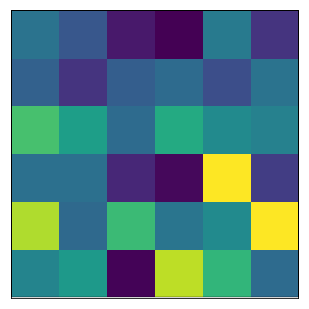

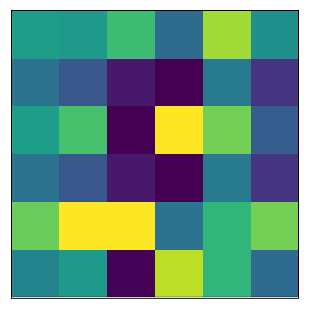

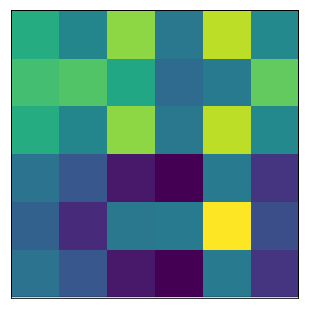

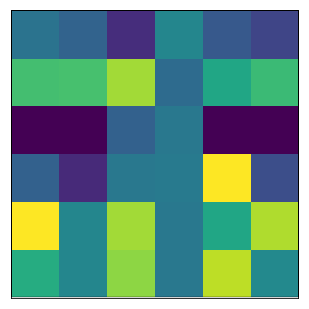

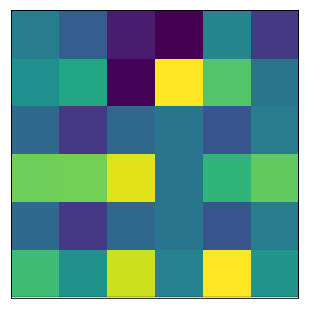

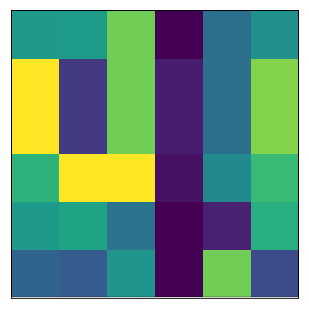

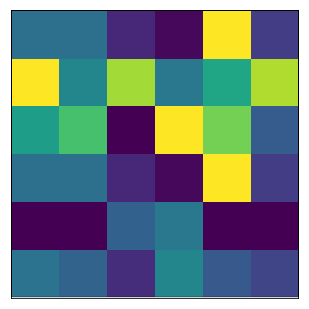

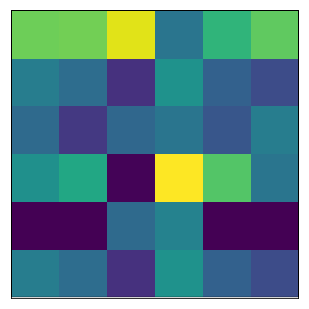

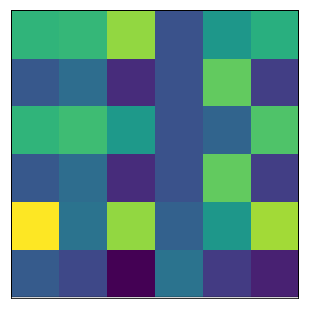

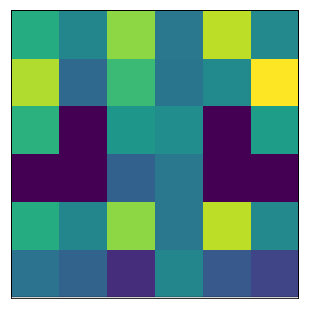

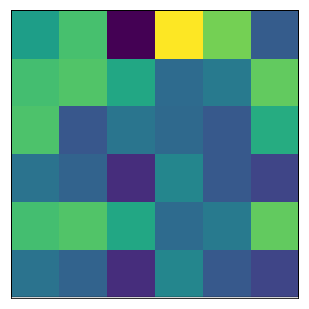

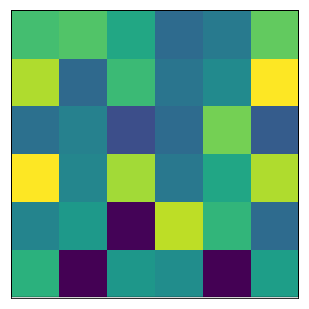

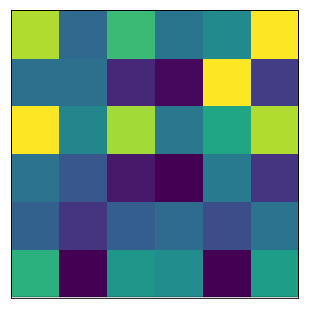

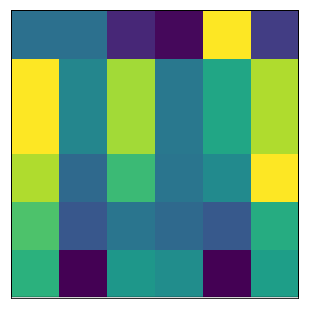

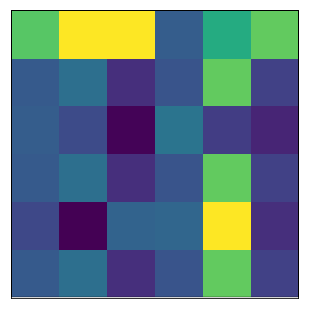

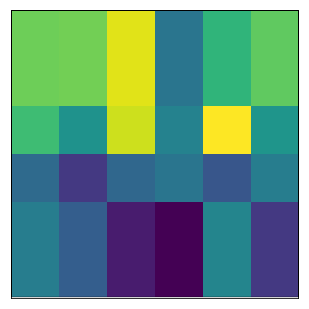

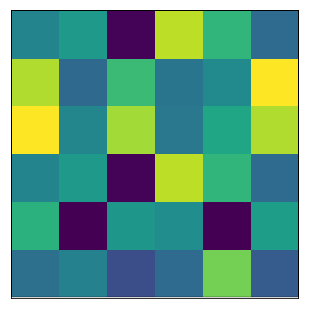

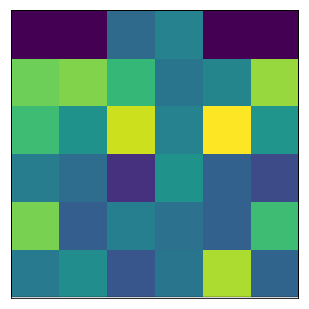

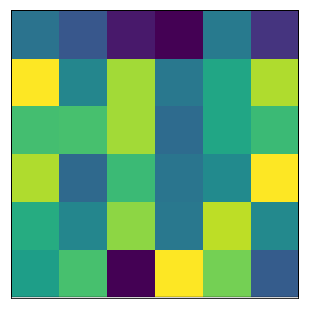

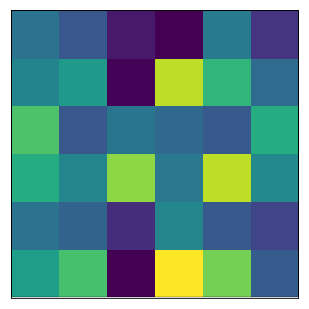

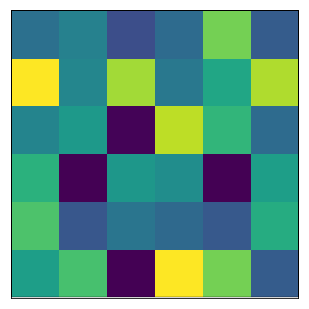

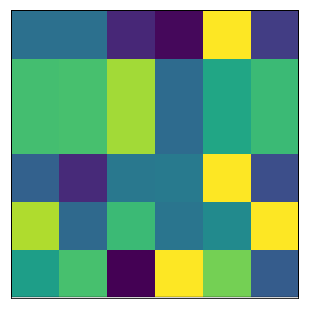

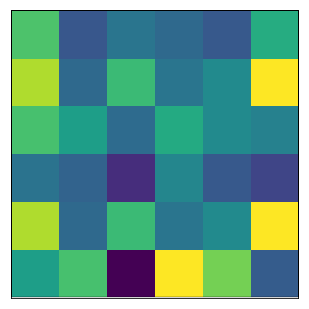

In [22]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate90/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.flip(img, 0)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/A_Zero/flipUD_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_0.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_10.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_12.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_13.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_15.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_19.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_2.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_20.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_21.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Data

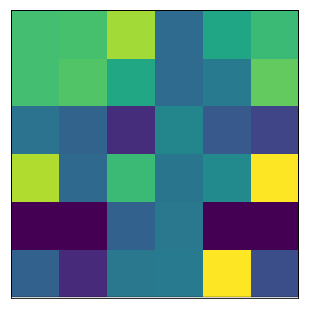

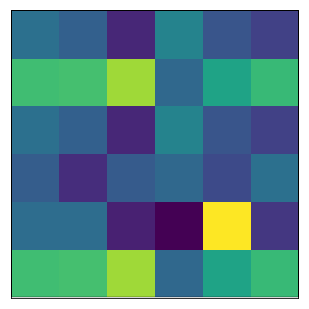

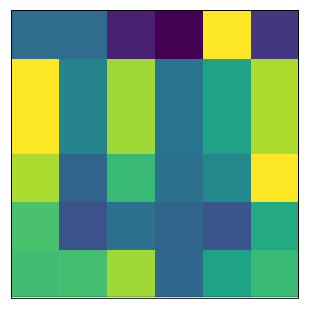

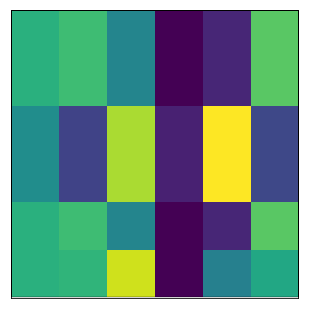

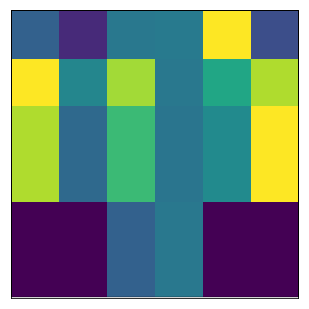

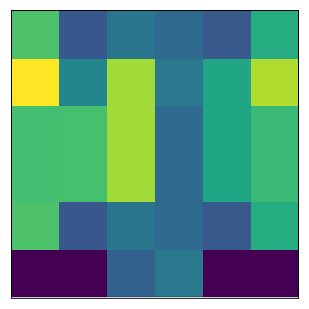

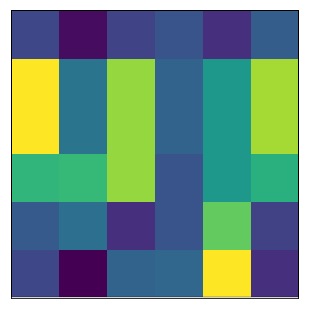

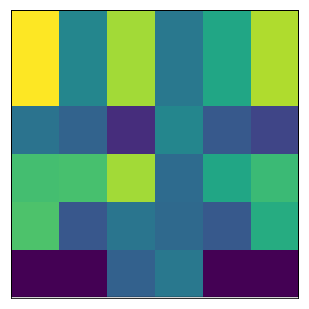

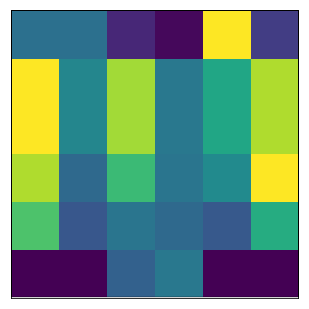

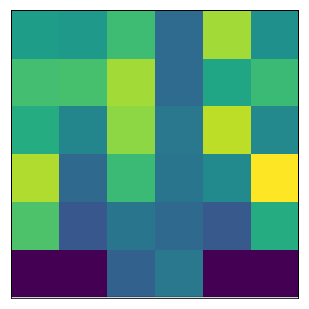

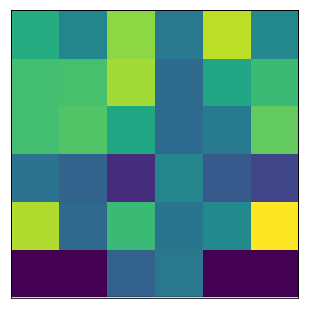

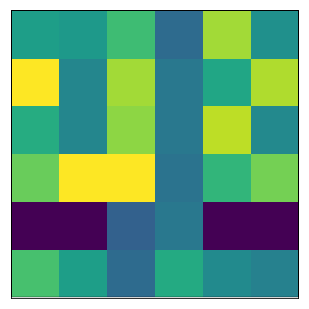

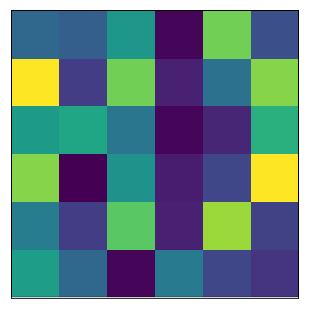

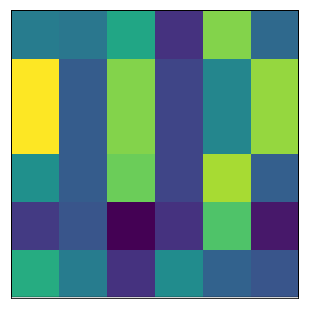

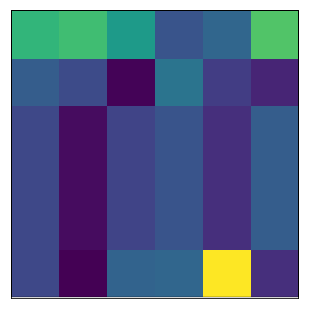

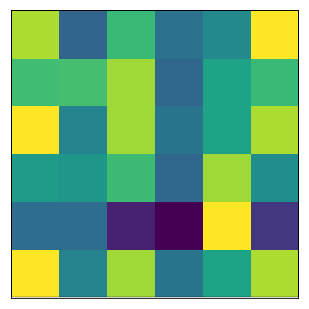

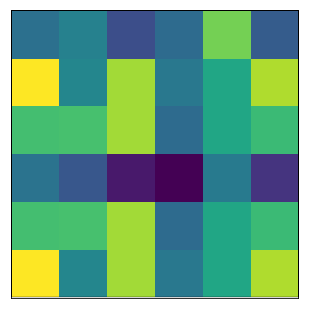

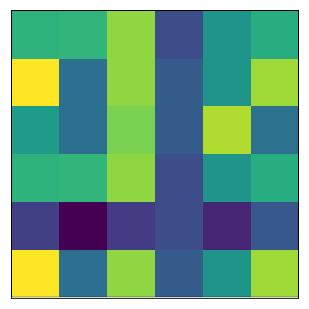

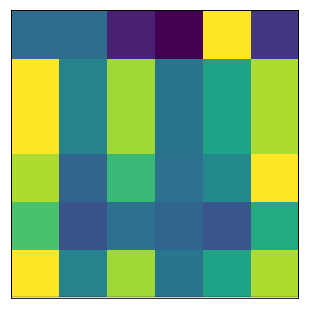

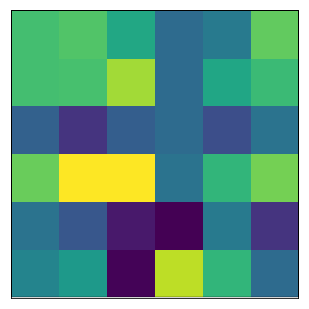

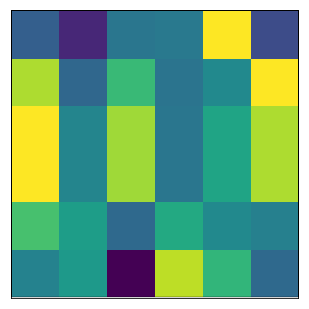

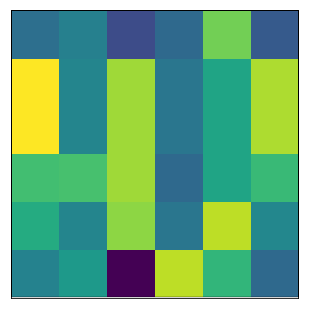

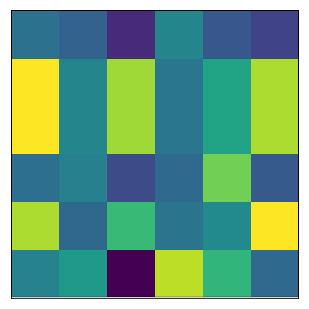

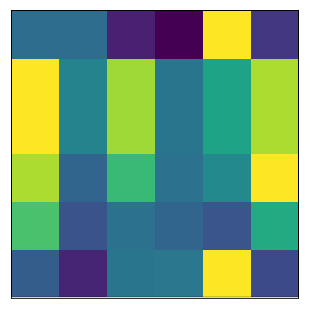

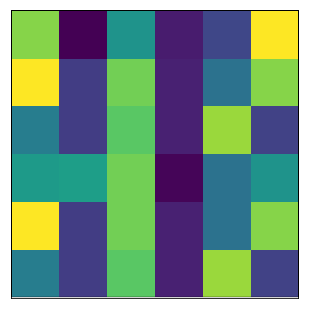

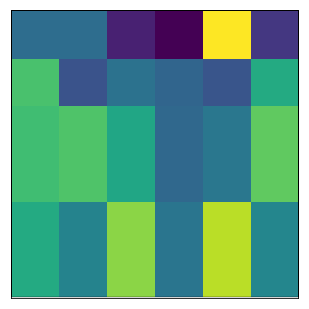

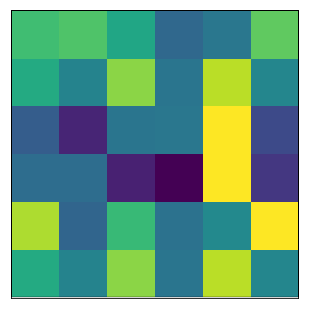

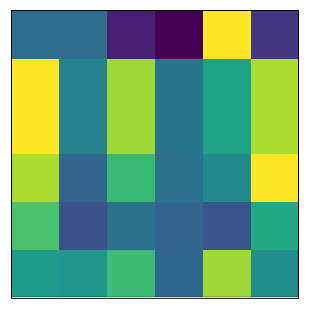

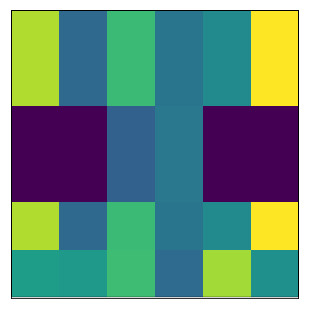

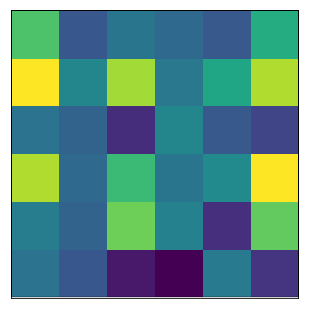

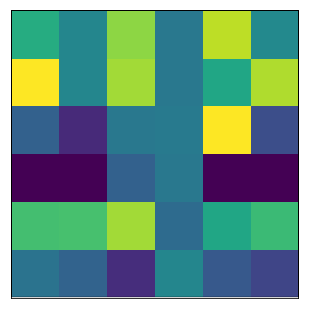

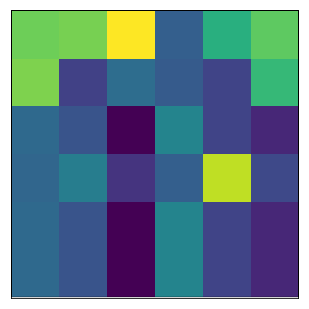

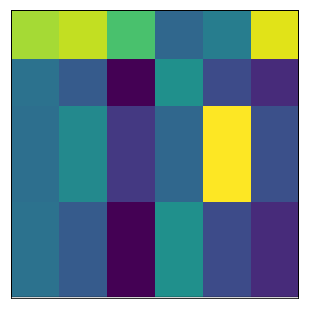

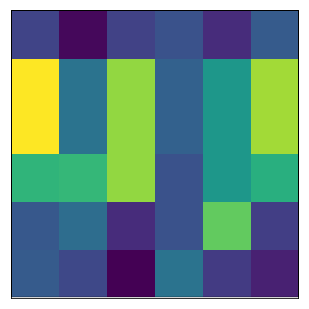

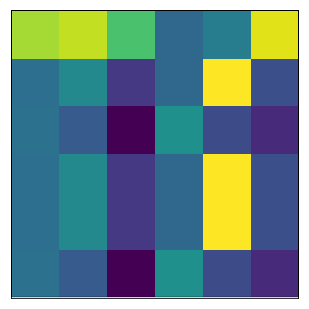

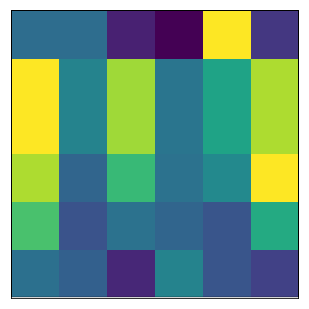

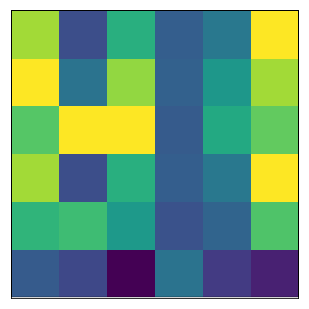

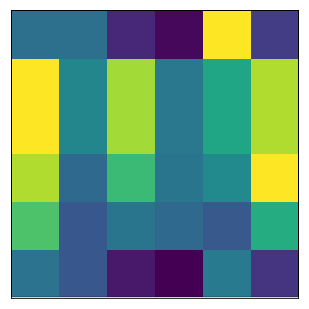

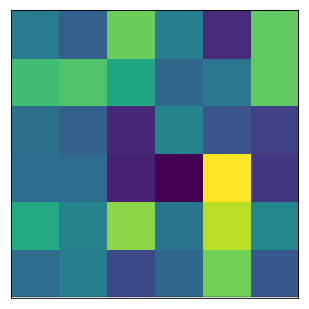

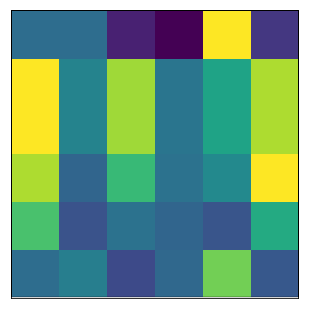

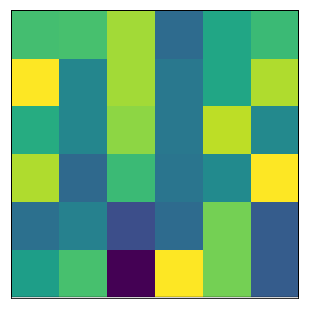

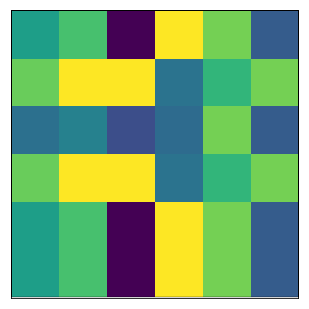

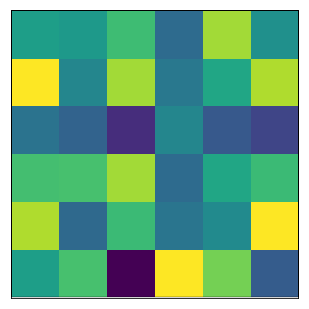

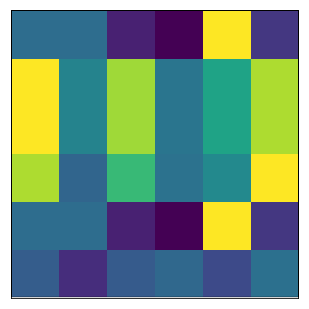

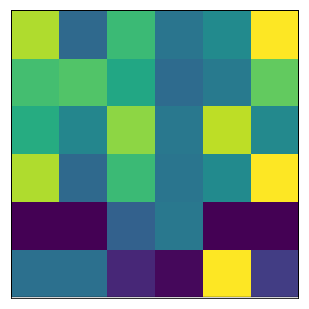

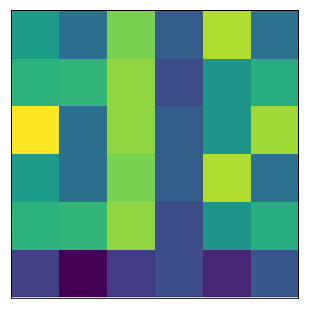

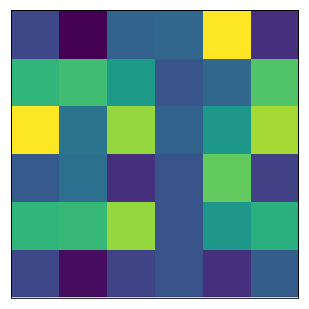

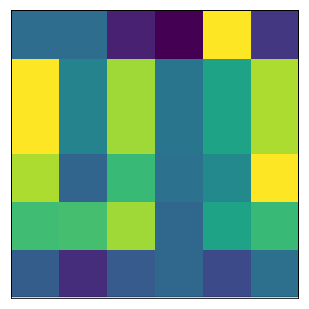

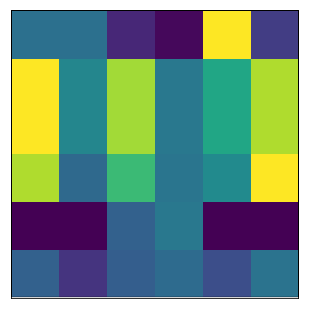

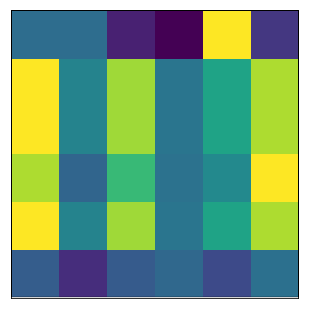

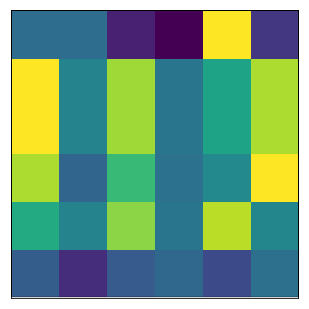

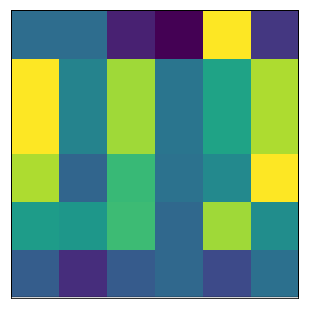

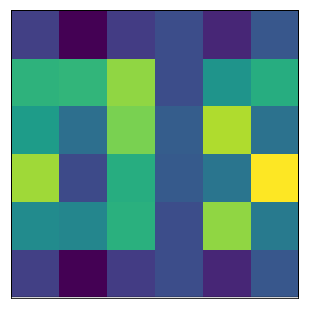

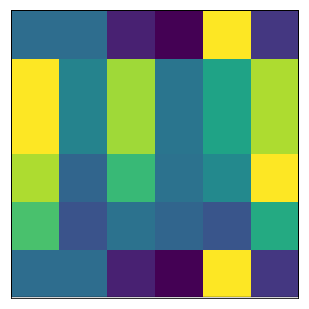

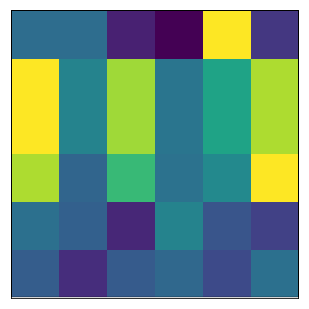

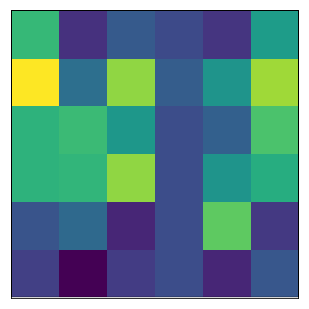

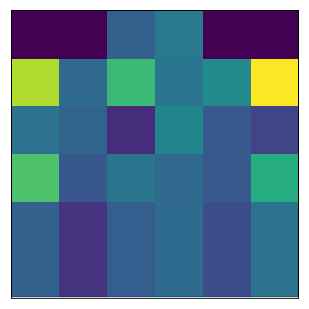

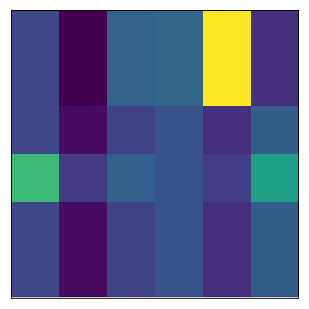

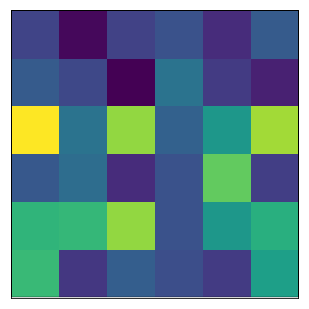

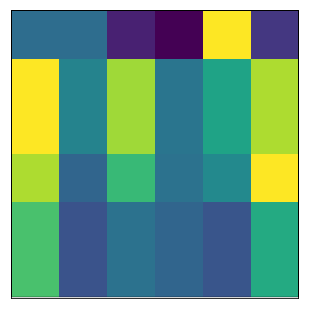

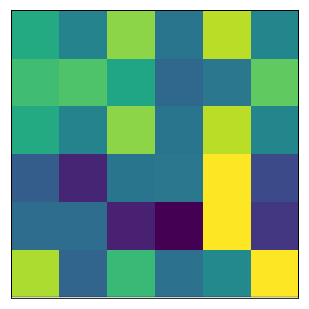

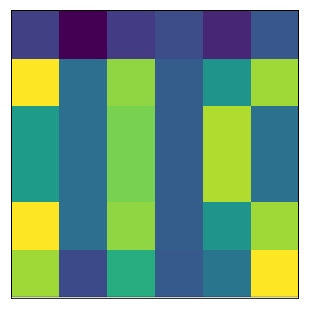

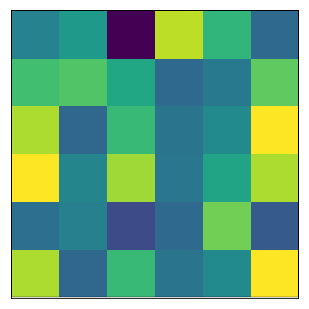

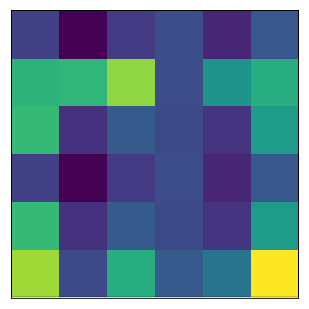

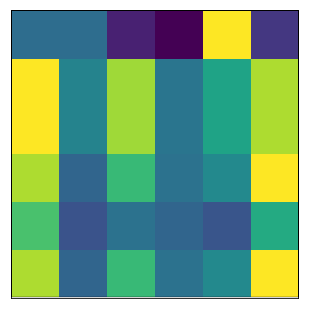

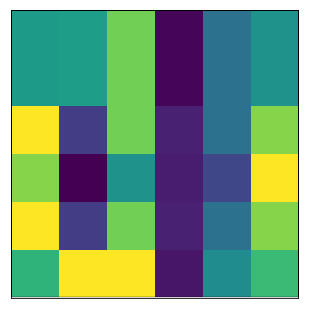

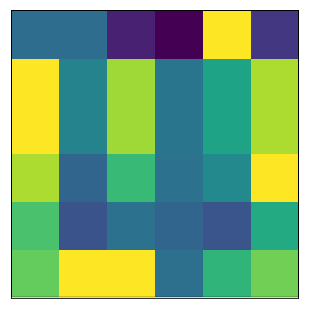

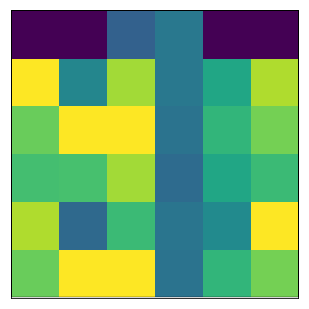

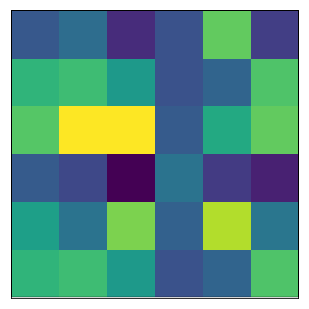

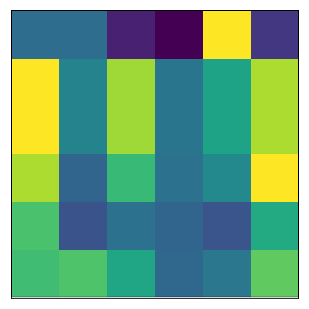

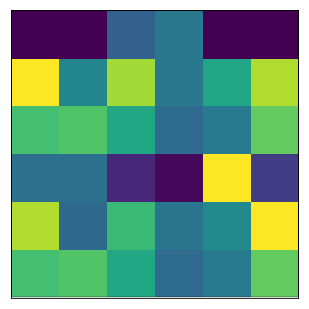

In [23]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate90/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.flip(img, 0)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/B_One/flipUD_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

Flip Left-Right

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_1.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_100.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_101.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_102.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_103.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_104.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_105.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_106.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_107.png
C:/Users/user/OneDrive/python3/aminomap

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_77.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_78.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_79.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_80.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_82.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_84.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_85.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_86.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero\matrix_Zero_88.png
C:/Users/user/OneDrive/python3/aminomap/Amyloi

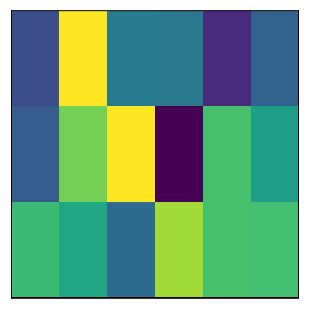

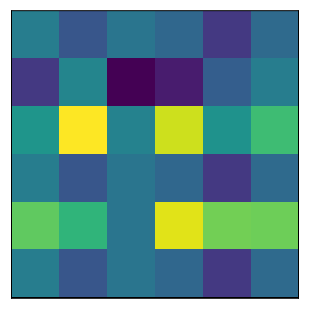

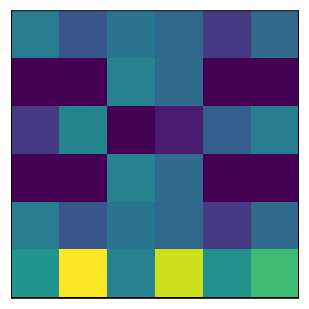

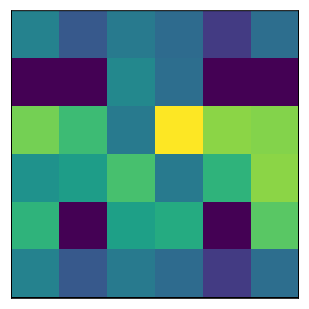

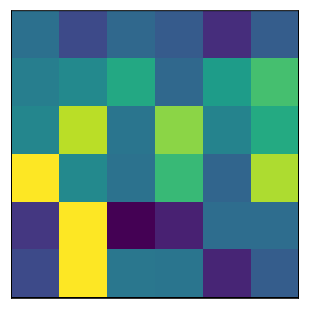

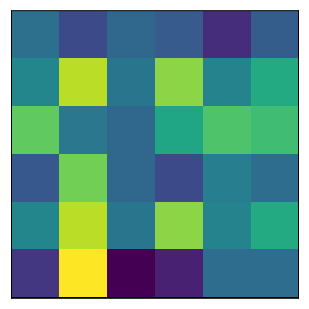

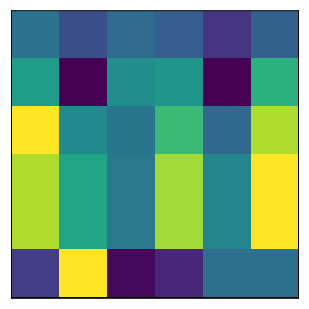

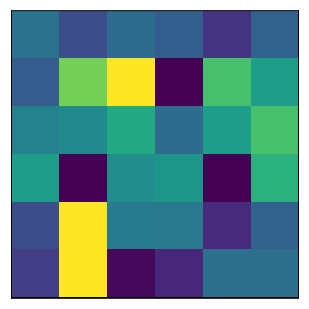

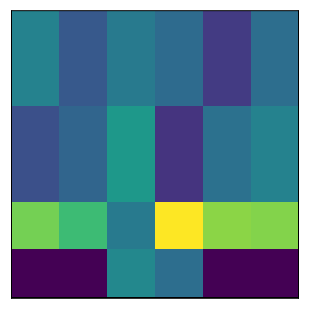

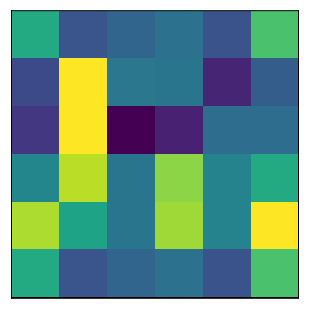

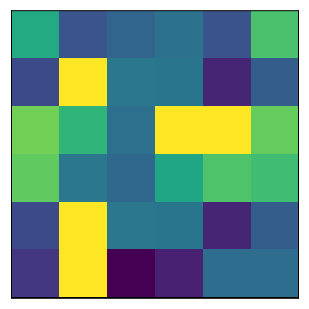

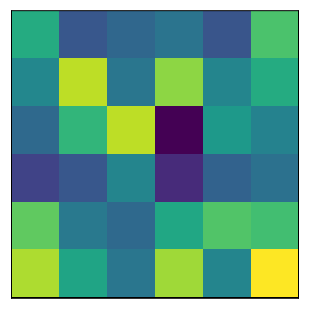

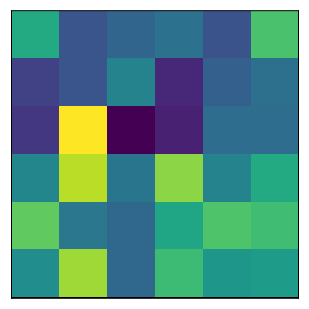

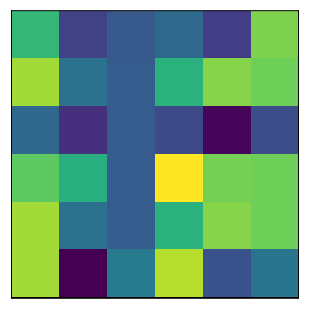

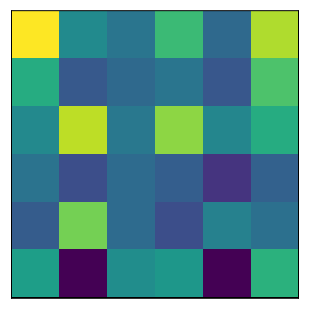

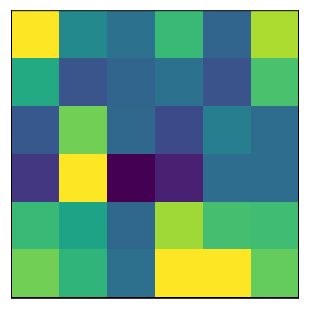

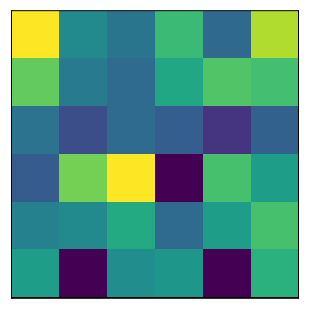

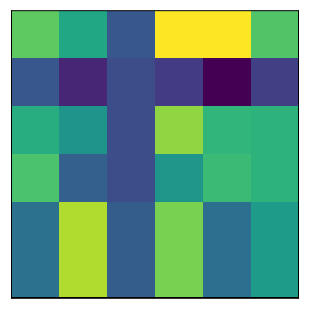

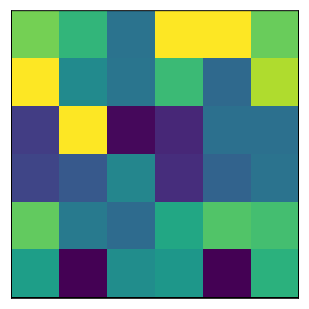

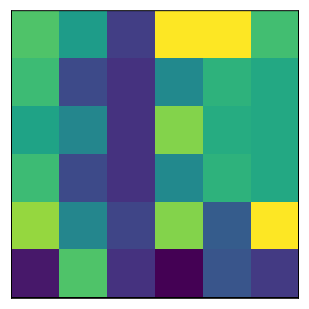

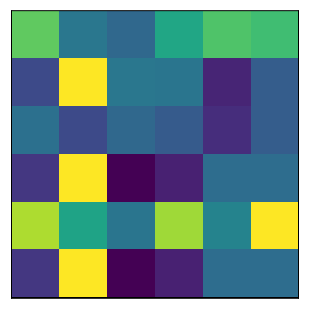

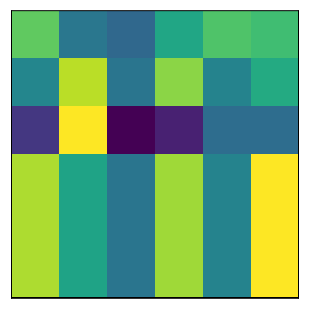

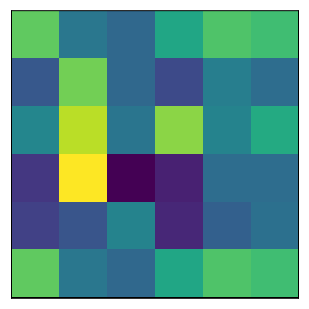

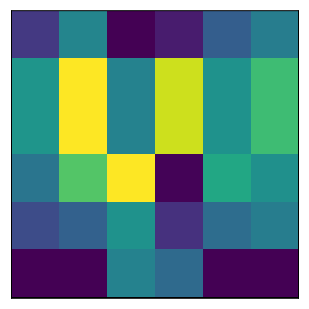

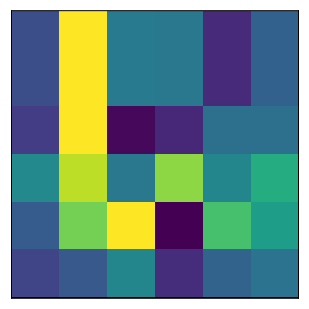

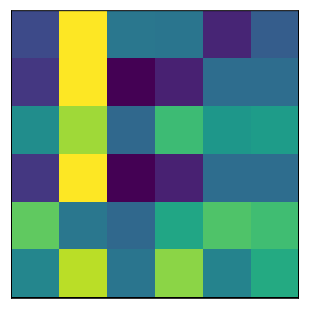

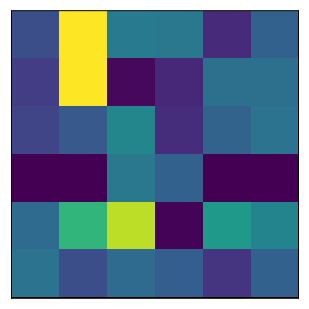

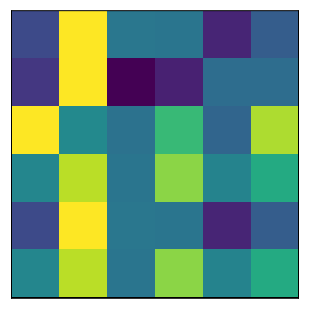

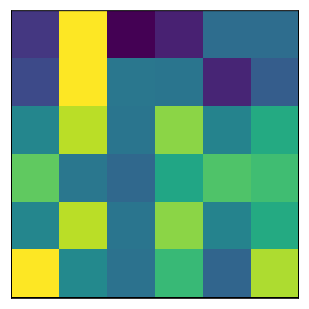

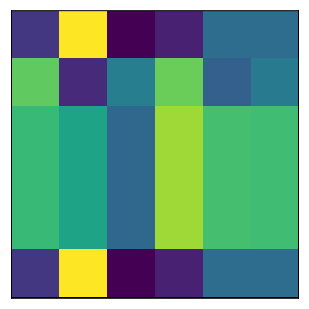

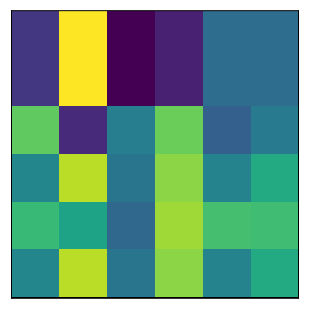

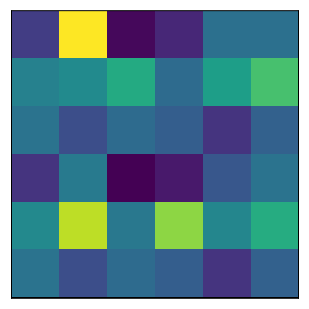

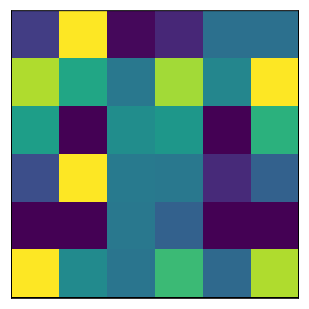

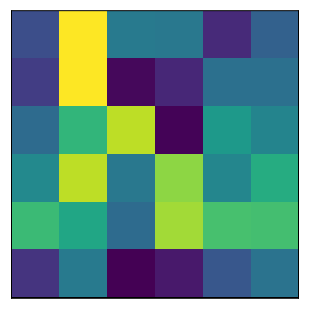

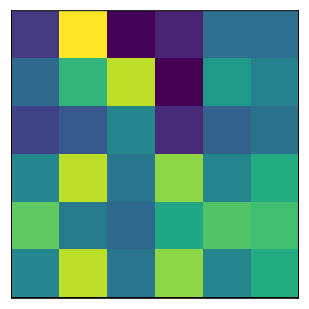

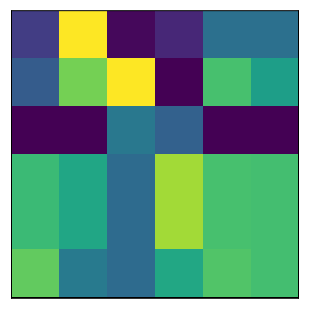

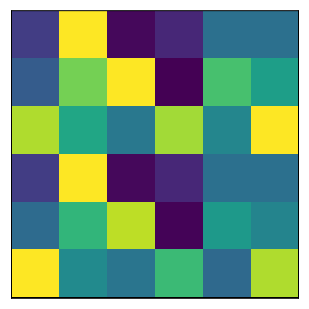

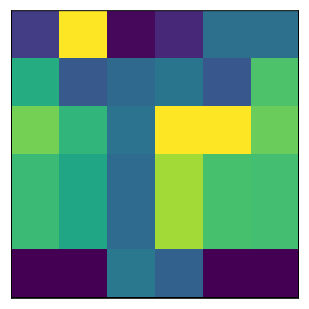

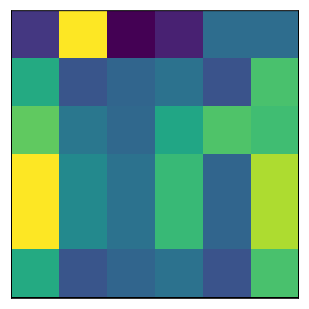

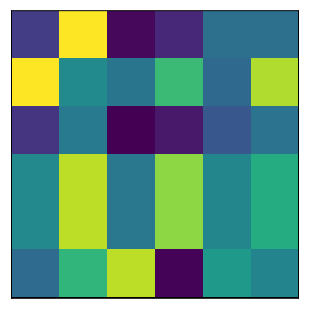

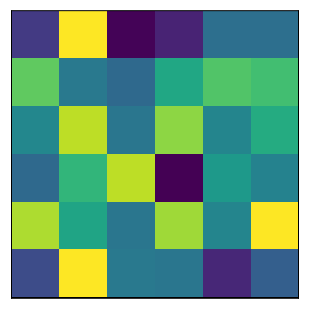

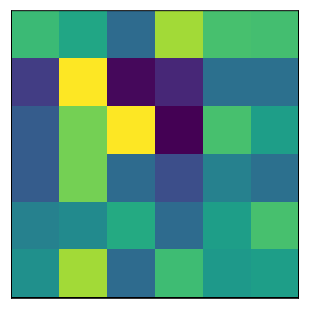

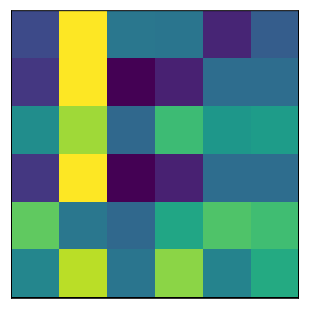

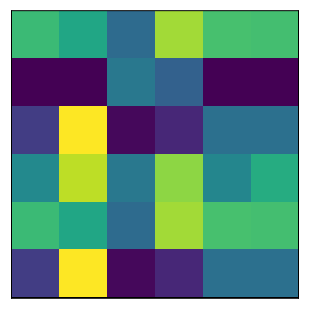

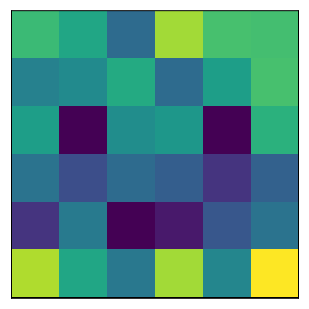

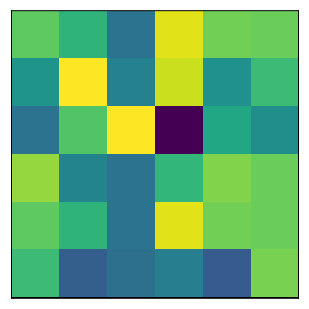

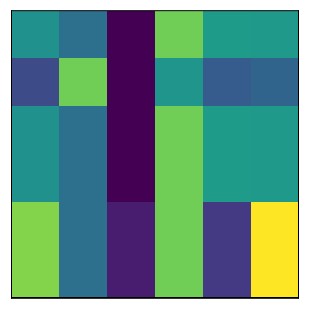

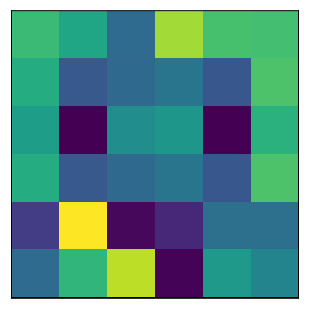

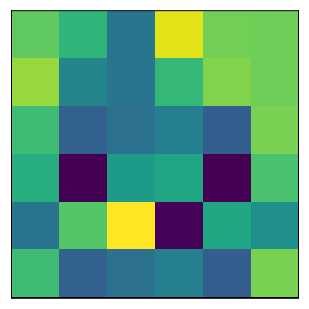

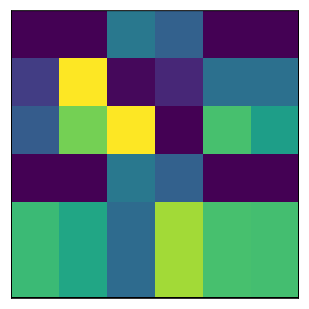

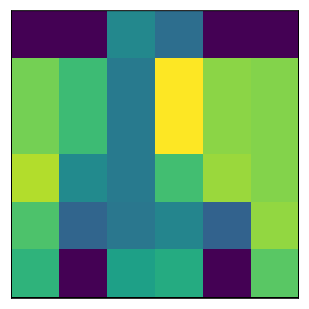

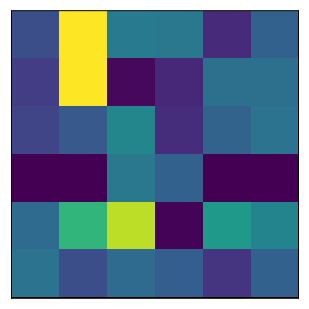

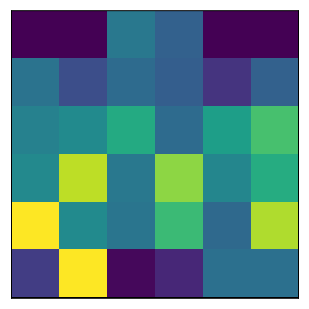

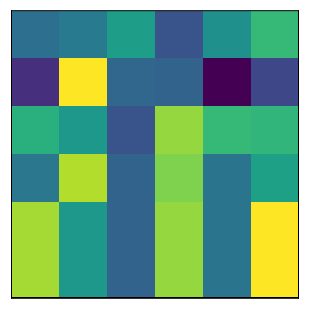

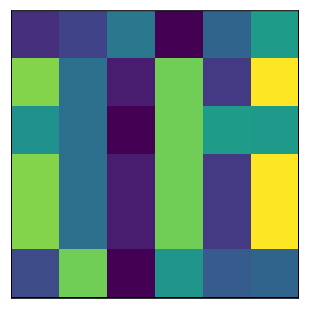

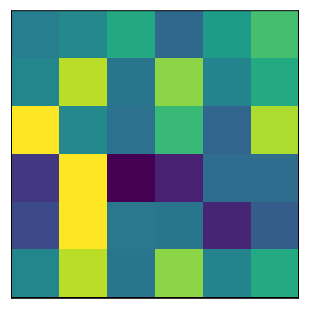

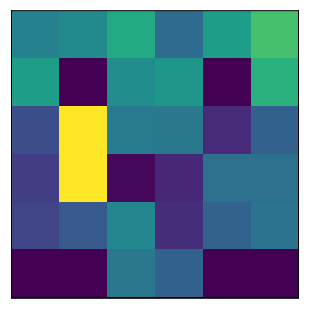

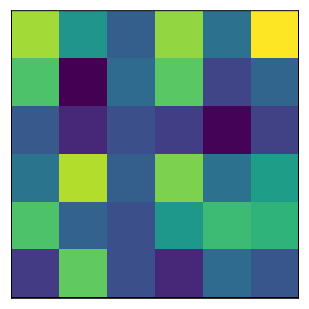

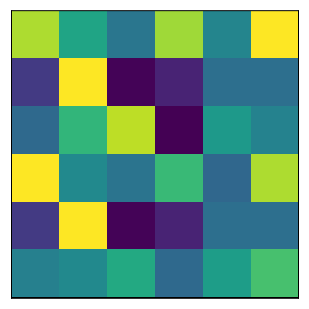

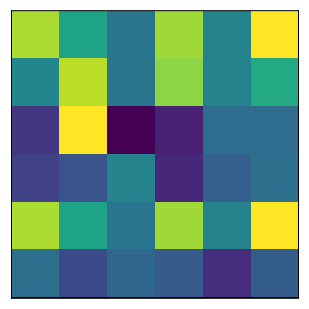

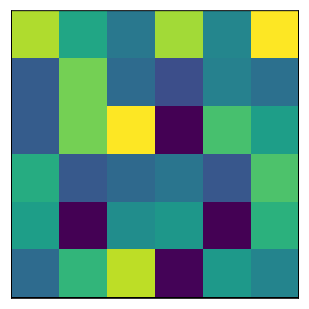

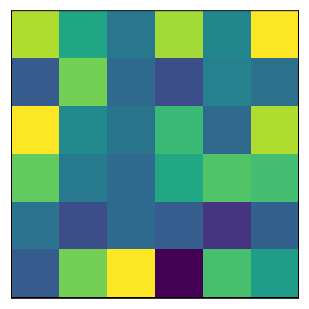

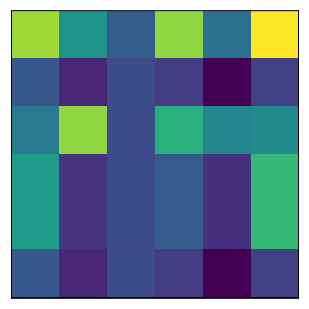

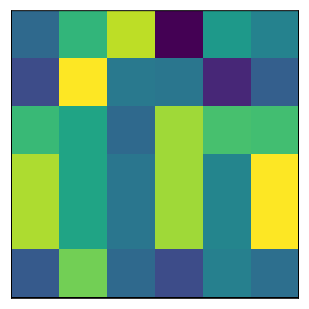

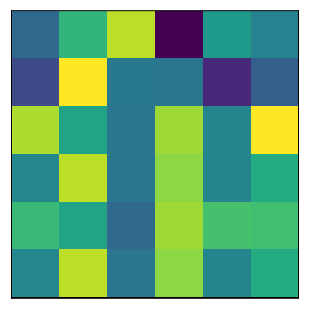

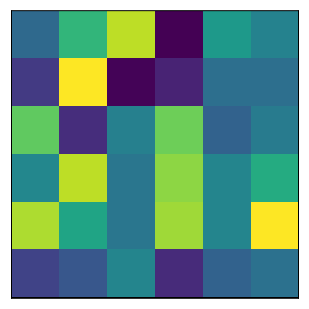

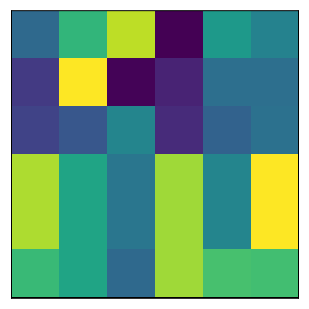

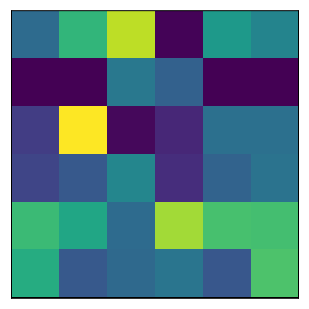

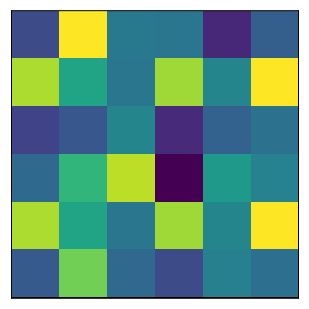

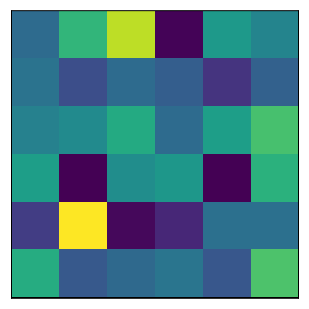

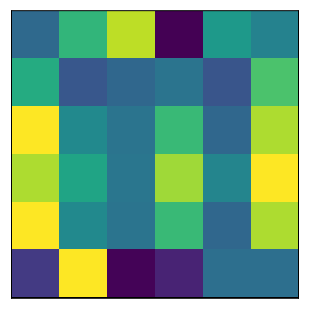

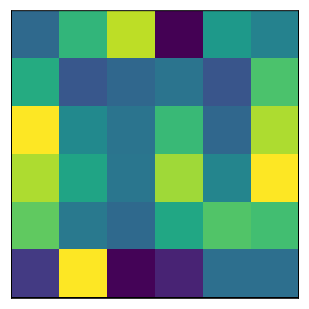

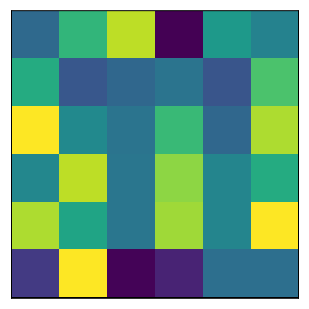

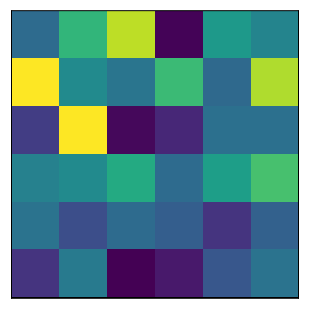

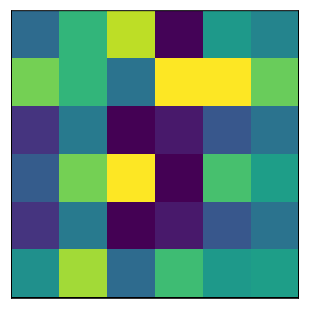

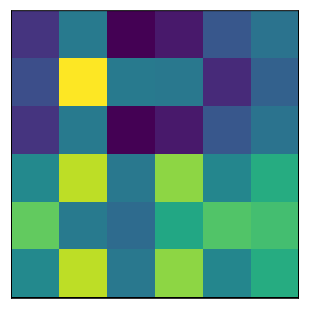

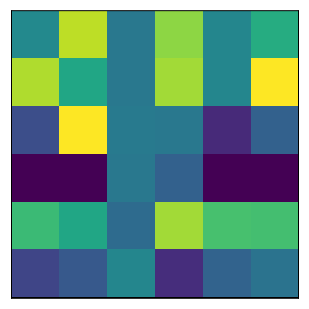

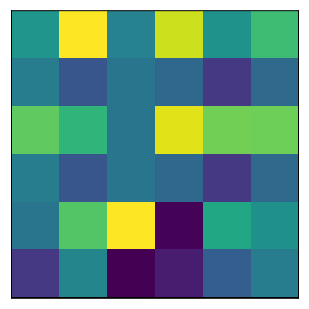

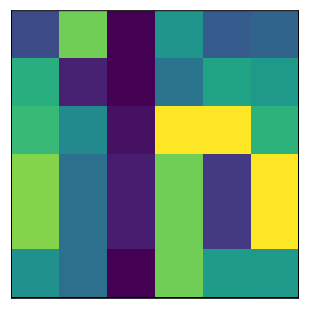

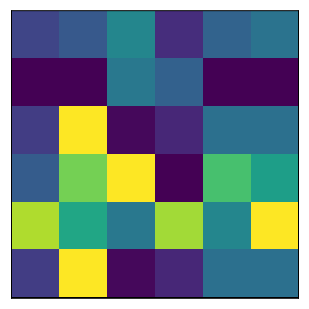

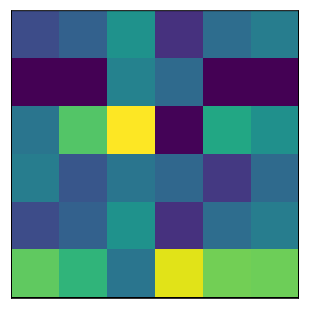

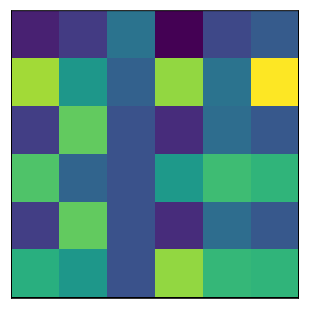

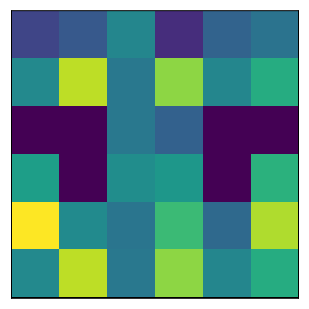

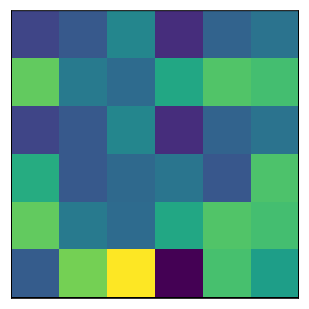

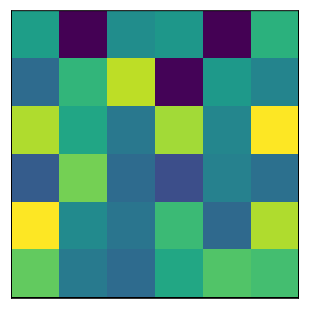

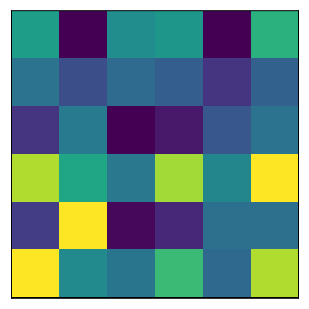

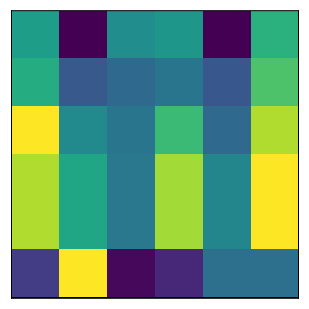

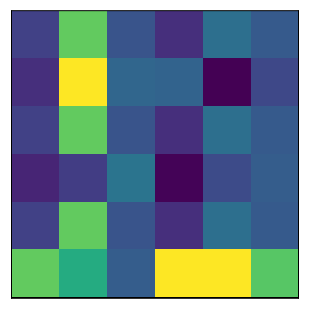

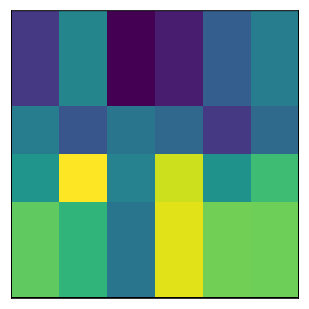

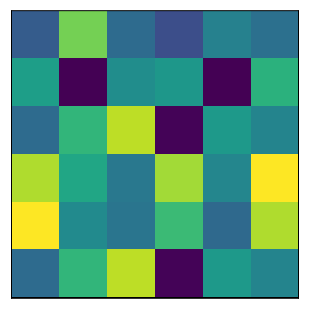

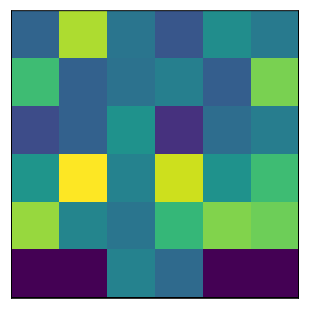

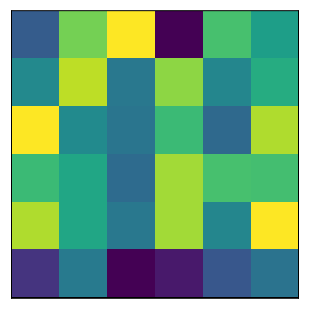

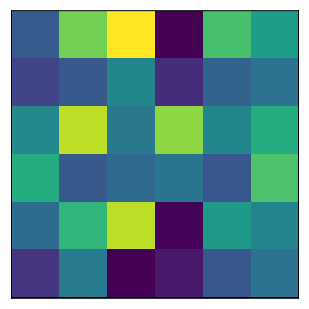

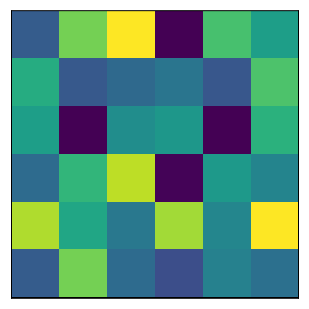

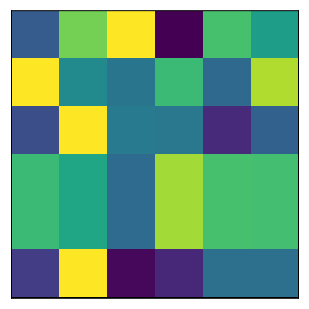

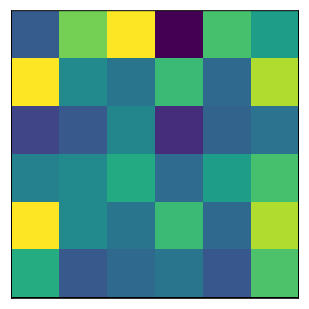

In [24]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Zero/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate90/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.flip(img, 1)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/A_Zero/flipLR_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_0.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_10.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_12.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_13.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_15.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_19.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_2.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_20.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One\matrix_One_21.png
C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Data

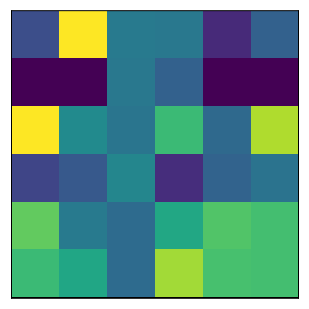

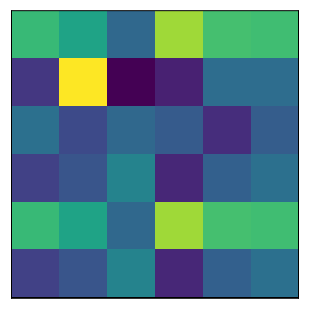

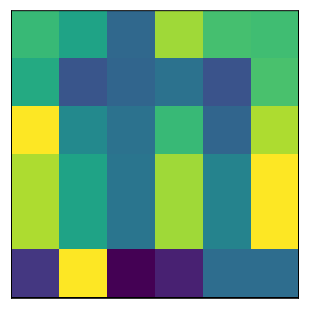

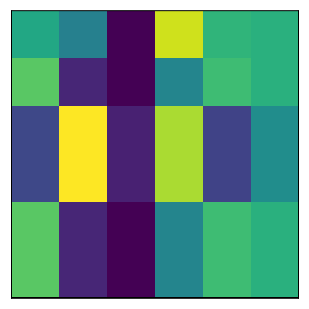

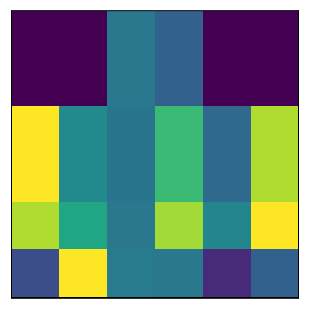

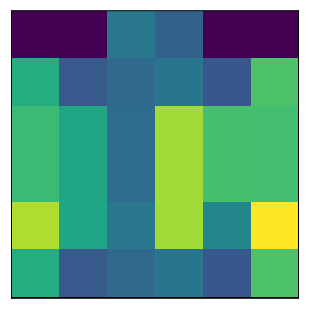

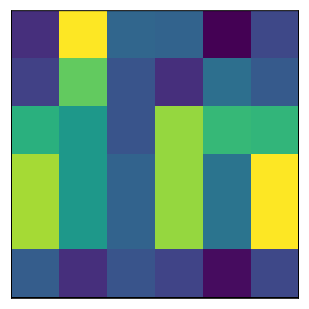

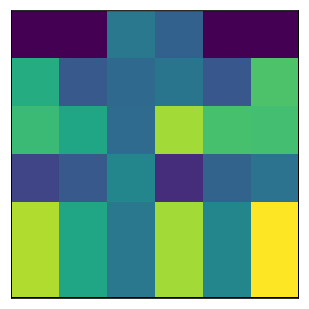

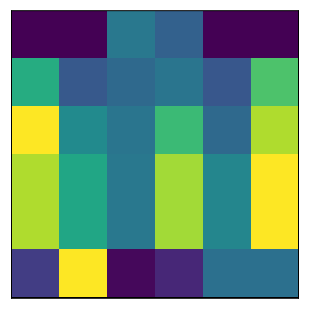

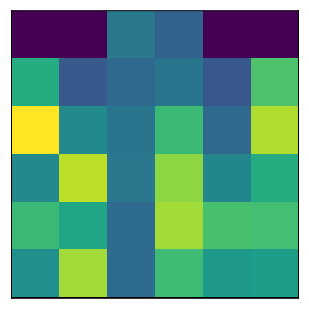

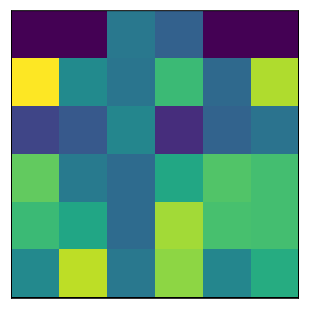

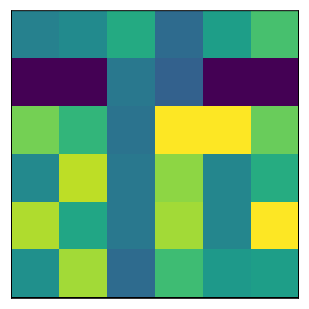

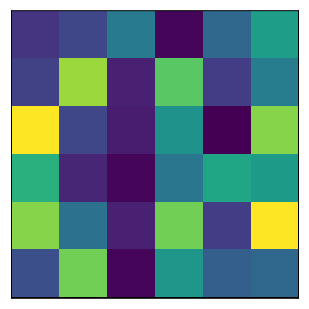

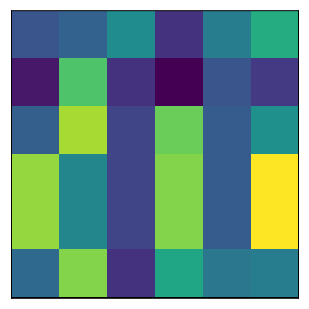

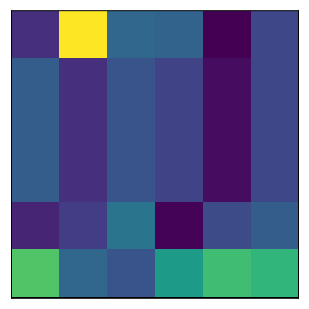

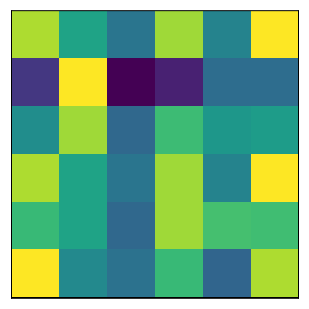

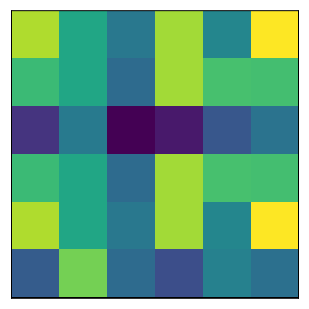

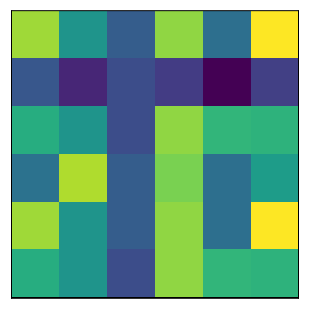

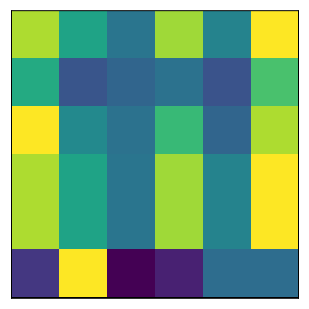

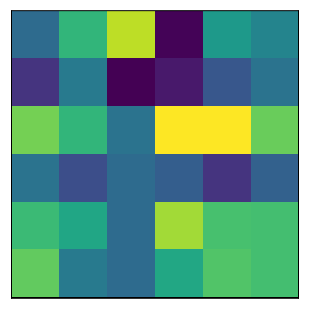

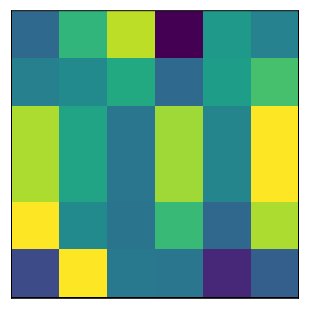

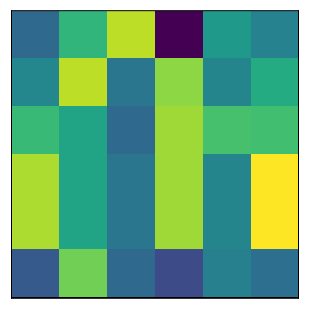

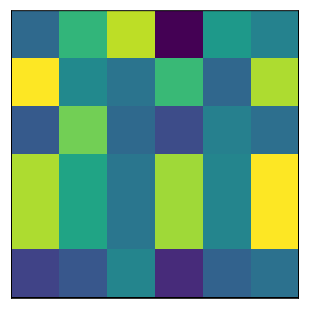

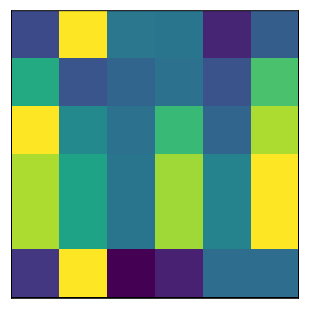

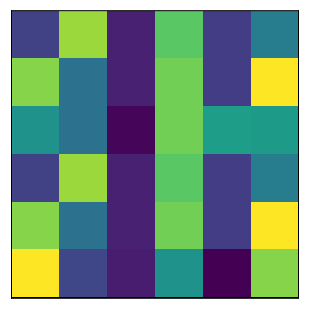

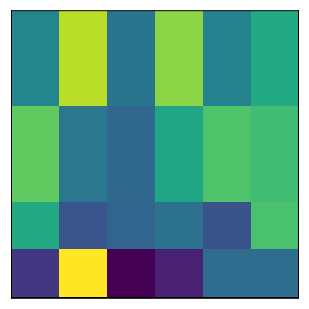

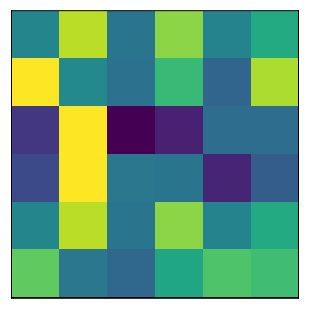

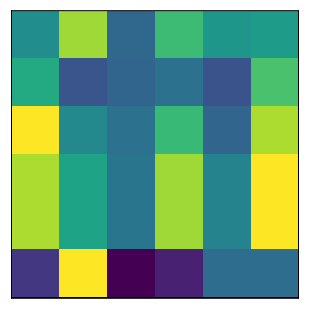

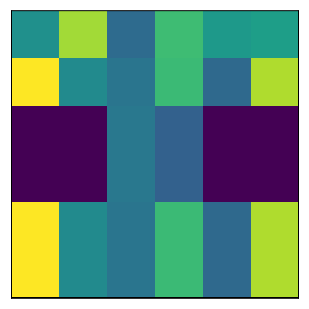

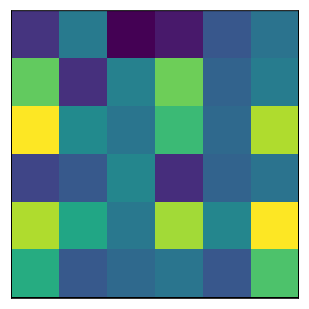

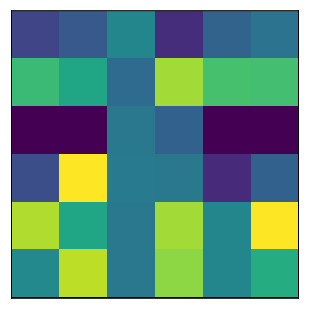

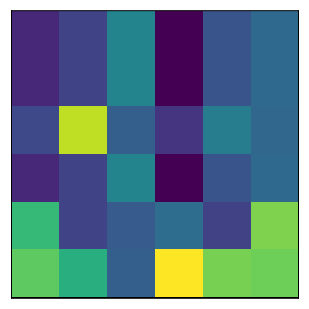

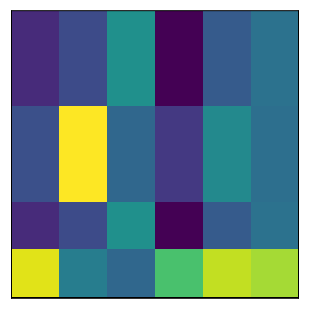

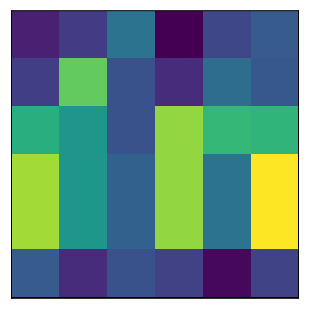

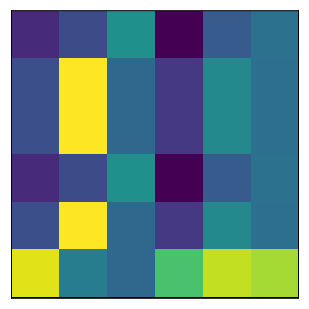

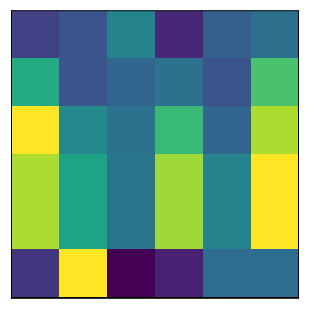

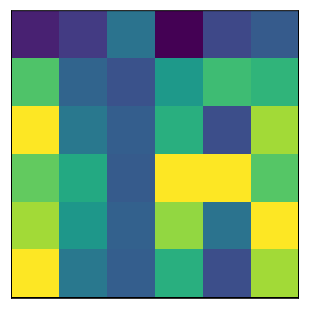

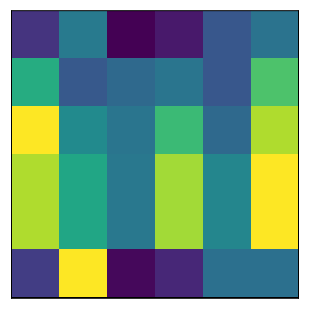

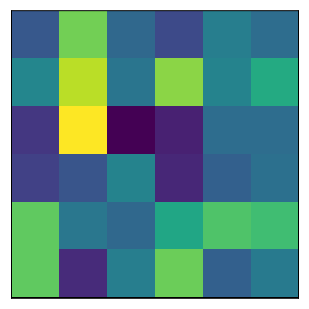

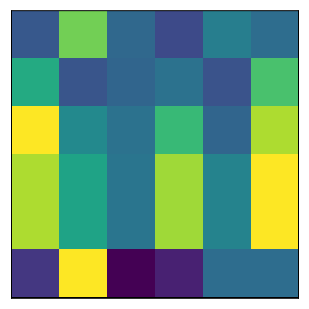

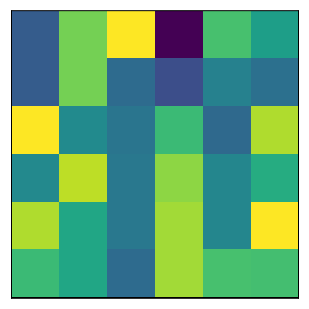

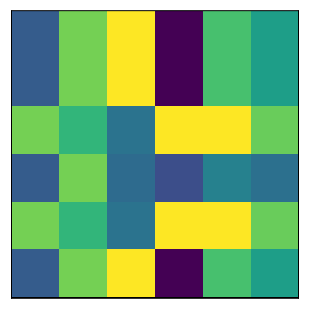

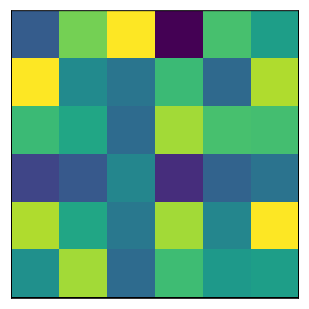

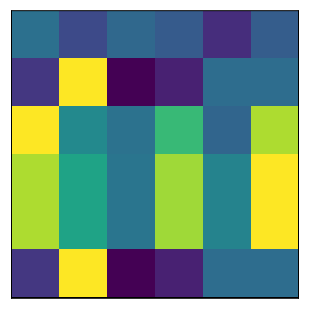

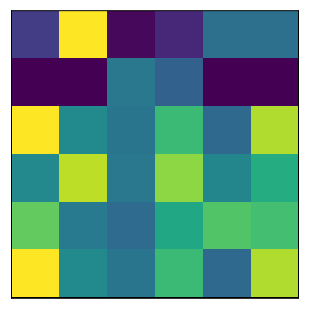

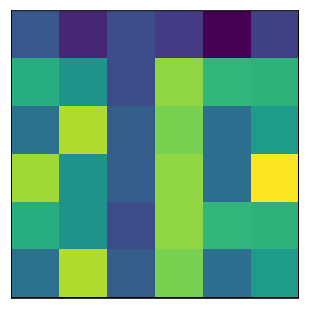

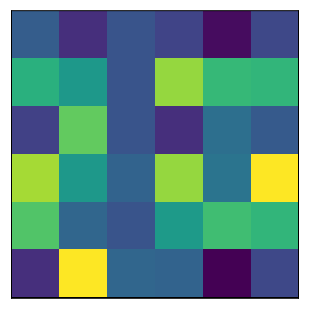

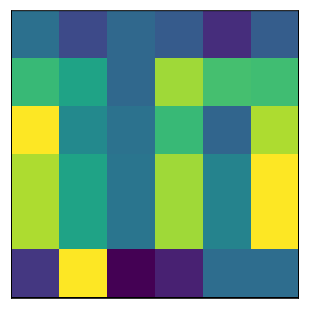

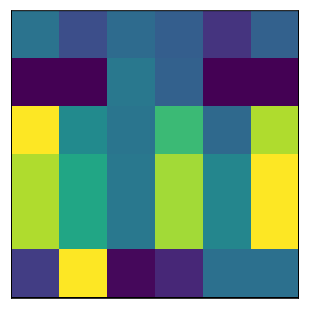

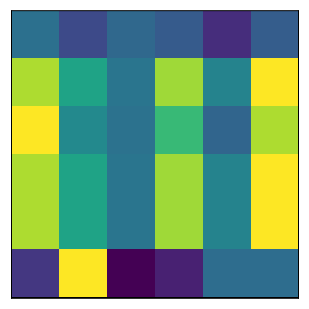

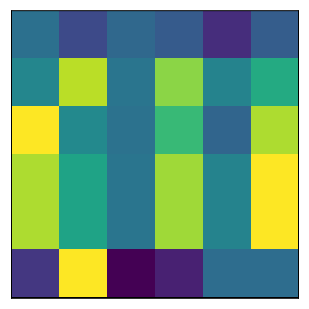

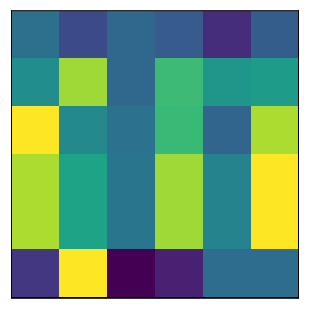

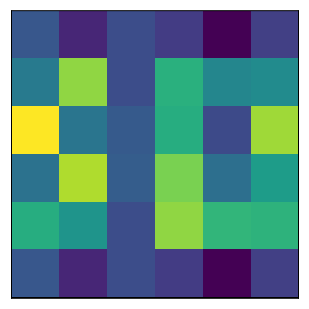

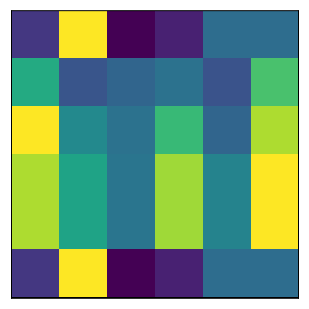

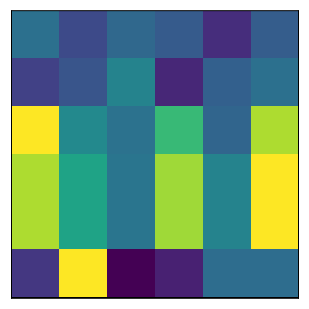

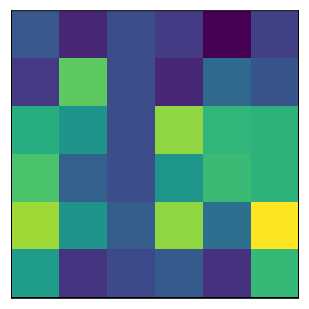

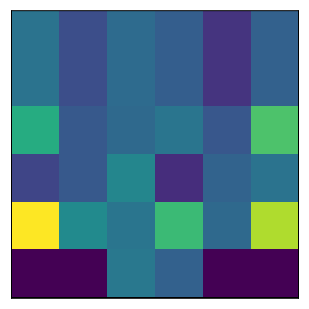

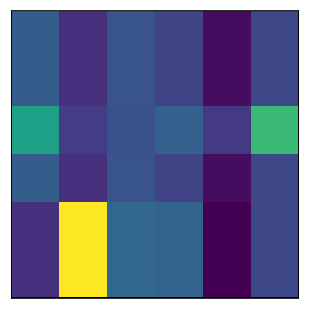

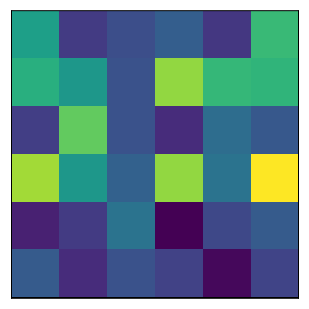

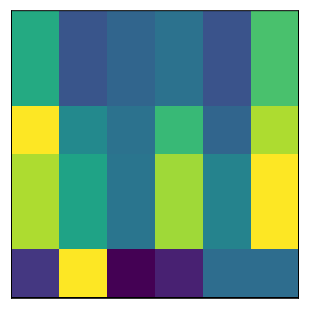

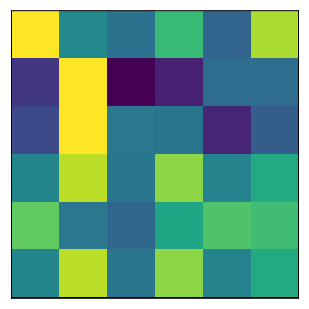

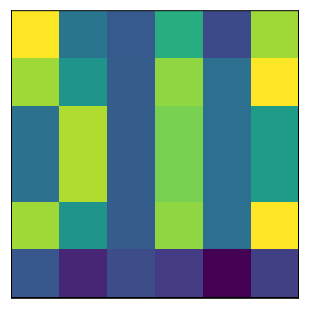

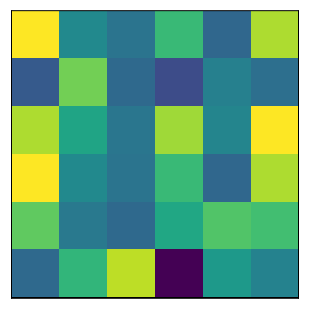

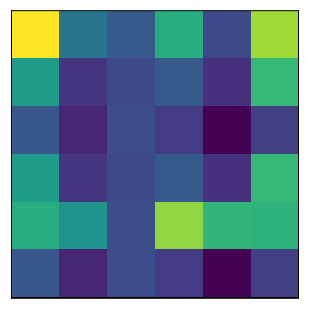

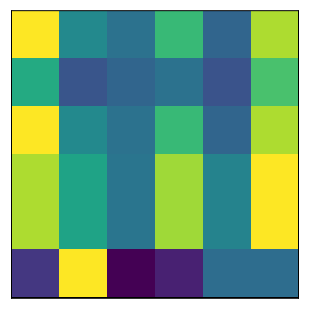

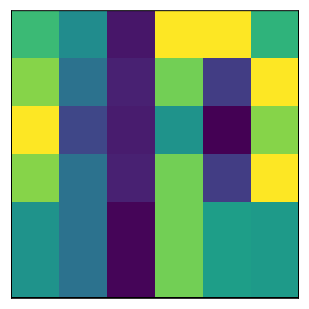

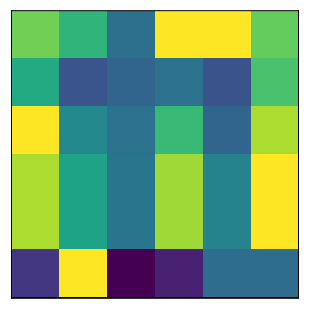

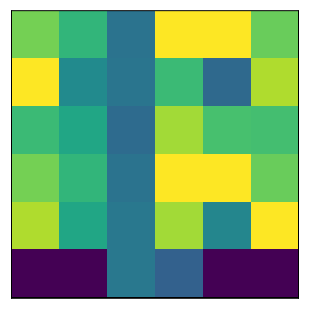

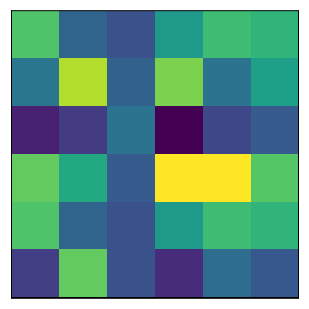

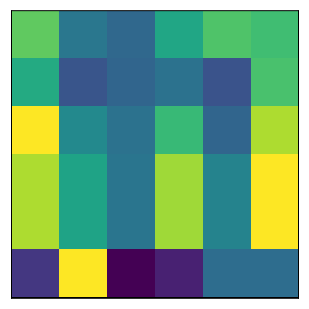

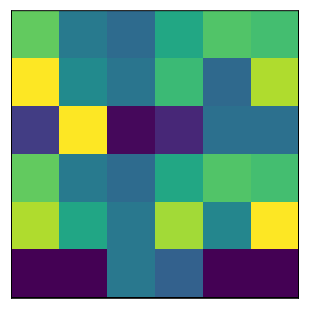

In [25]:
from PIL import Image
import os, glob
import cv2 as cv

dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/One/*.png'
df_list=[]
book_dict = {}
#to_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/rotate90/Zero/'
#os.makedirs(to_dir, exist_ok=True)

for i in glob.glob(dir):
    file_name = os.path.basename(i) #ファイル名を取得
    basename,_=os.path.splitext(file_name) #拡張子名を取得
    book_dict[file_name] = print(i)
    img = cv.imread(i)
    img = cv.flip(img, 1)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    fig,ax = plt.subplots()
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    
    plt.imshow(img)
    #plt.title(basename)
    plt.savefig(f"C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate-flip/B_One/flipLR_{basename}.png", dpi=300, bbox_inches='tight', pad_inches = 0)

In [59]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
from keras import regularizers
from keras.optimizers import rmsprop, adam
from keras.callbacks import TensorBoard, ModelCheckpoint

Using TensorFlow backend.


In [63]:
# dimensions of our images.
img_width, img_height = 6, 6

train_data_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/train/Image/Rotate'
validation_data_dir = 'C:/Users/user/OneDrive/python3/aminomap/Amyloid_prediction/2D_Dataset/validation/Image/Rotate'
nb_train_samples = len(df_train)
nb_validation_samples = len(df_val)
epochs = 100
batch_size = 16 #2^2, 32 is not converged

In [64]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [65]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="same"))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=1, padding="same"))
model.add(Flatten())
model.add(Dense(64, input_dim=64, kernel_regularizer=regularizers.l2(0.01))) #regularizer
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [66]:
model.compile(loss='binary_crossentropy',
optimizer='rmsprop', #rmsprop is better loss data
metrics=['accuracy'])

In [67]:
# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
#zoom_range=0.2, 
vertical_flip=True,
horizontal_flip=True)

In [68]:
# this is the augmentation configuration we will use for testing:
test_datagen = ImageDataGenerator(
#zoom_range=0.2,
vertical_flip=True,
horizontal_flip=True)

In [69]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 668 images belonging to 2 classes.
Found 288 images belonging to 2 classes.


In [70]:
model.fit_generator(
    train_generator,
steps_per_epoch=nb_train_samples // batch_size,
epochs=epochs,
validation_data=validation_generator,
validation_steps=nb_validation_samples // batch_size,
callbacks=[
                TensorBoard(log_dir="./logdir_ald_idg03"),
                ModelCheckpoint(os.path.join("./logdir_ald_idg03",  "model_ald_idg.hdf5"), save_best_only=True)
],
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
10/10 [==============================] - 2s 239ms/step - loss: 7.8874 - acc: 0.5438 - val_loss: 10.1160 - val_acc: 0.4219
Epoch 2/100
10/10 [==============================] - 2s 221ms/step - loss: 6.6487 - acc: 0.6375 - val_loss: 6.5652 - val_acc: 0.6406
Epoch 3/100
10/10 [==============================] - 2s 231ms/step - loss: 8.2113 - acc: 0.5312 - val_loss: 7.0100 - val_acc: 0.6094
Epoch 4/100
10/10 [==============================] - 2s 224ms/step - loss: 7.8346 - acc: 0.5563 - val_loss: 7.2098 - val_acc: 0.5938
Epoch 5/100
10/10 [==============================] - 2s 228ms/step - loss: 8.0834 - acc: 0.5376 - val_loss: 7.4106 - val_acc: 0.5781
Epoch 6/100
10/10 [==============================] - 2s 223ms/step - loss: 7.3388 - acc: 0.5812 - val_loss: 7.8596 - val_acc: 0.5469
Epoch 7/100
10/10 [==============================] - 2s 232ms/step - loss: 7.0766 - acc: 0.5875 - val_loss: 8.8146 - val_acc: 0.4844
Epoch 8/100
10/10 [=